# Trabajo Fin de Máster
## HateSpeech Detection
### Autor: Óscar Toimil Plaza
#### Tutores: Marcos Fernández Pichel y Mario Ezra Aragón Saenzpardo

-------------------------------------------

## Imports

In [1]:
import pandas as pd
!pip install pysentimiento
from pysentimiento import create_analyzer
from collections import Counter, defaultdict
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 15.8 MB/s eta 0:00:00


## Variables globales

In [3]:
DATASETS_NAME = {
    'MISOCORPUS_2020_TRAIN': 'misocorpus2020_train.csv',
    'MISOCORPUS_2020_VAL': 'misocorpus2020_val.csv',
    'MISOCORPUS_2020_TEST': 'misocorpus2020_test.csv',
}

DATASETS_DELIMITERS = {
    'MISOCORPUS_2020': ',',
}
SEED_VALUE = 1

-------------------------------------------

## Lectura datos

-----------------------------------------------

#### MISOCORPUS 2020

In [4]:
df_misocorpus_train = pd.read_csv ( DATASETS_NAME['MISOCORPUS_2020_TRAIN'],
        skiprows=1,
        header=None,
        names = ["tweet", "label"],
        delimiter=DATASETS_DELIMITERS['MISOCORPUS_2020'])

----------------------------

## Irony Analysis


-----------------------------------------------

### Todos los tweets

-----------------------------------------------


In [5]:
df_misocorpus_train.head()

tweet  label
0                  @twominbae cállate puta      1
1                    @Josumovic Puta Greta      1
2  @monasterioR @julia_otero Eres patética      1
3             @GretaThunberg Loca del coño      1
4                     @GretaThunberg cerda      1

In [6]:
irony_analyzer = create_analyzer("irony", lang="es")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/915 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/435M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/435M [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

In [7]:
#Ejemplo
irony_analyzer.predict("¿De qué color es el caballo blanco de Santiago? Obviamente negro")

AnalyzerOutput(output=ironic, probas={ironic: 0.976, not ironic: 0.024})

In [8]:
def analyze_irony(text):
    result = irony_analyzer.predict(text.lower())
    irony = result.output
    probabilities = result.probas

    print("\n-----------------------")
    print(f"Texto analizado: {text}")
    print(f"Ironía detectado: {irony}")
    print(f"Probabilidades: {probabilities}")

    return irony, probabilities, text

In [9]:
text_data = df_misocorpus_train['tweet'].tolist()
results = [analyze_irony(text) for text in tqdm(text_data)]

  0%|          | 4/5034 [00:00<04:04, 20.53it/s]


-----------------------
Texto analizado: @twominbae cállate puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.994785487651825, 'ironic': 0.00521452259272337}

-----------------------
Texto analizado: @Josumovic Puta Greta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8591293692588806, 'ironic': 0.1408705860376358}

-----------------------
Texto analizado: @monasterioR @julia_otero Eres patética
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992074370384216, 'ironic': 0.0007926487596705556}

-----------------------
Texto analizado: @GretaThunberg Loca del coño
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9752563238143921, 'ironic': 0.024743657559156418}

-----------------------
Texto analizado: @GretaThunberg cerda
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9923944473266602, 'ironic': 0.007605595979839563}

-----------------------
Texto analizado: @outmarina Cállate puta de mierda
Ironía detectado: not

  0%|          | 10/5034 [00:00<03:18, 25.36it/s]


-----------------------
Texto analizado: @Valeryth_ Callate puta que te dejo en visto
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9897615313529968, 'ironic': 0.010238468647003174}

-----------------------
Texto analizado: @LaFallaras Deja el alcohol cerda
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9892399311065674, 'ironic': 0.010760121047496796}

-----------------------
Texto analizado: @AdaColau HIJA DE PUTA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9930965304374695, 'ironic': 0.006903484929352999}

-----------------------
Texto analizado: @Cannabianol Greta puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9636697173118591, 'ironic': 0.03633030876517296}

-----------------------
Texto analizado: Ojalá las feminazis no me den palo por subir este video ??????????? #dolar http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.958104133605957, 'ironic': 0.04189585894346237}

------------------

  0%|          | 17/5034 [00:00<02:47, 29.87it/s]


-----------------------
Texto analizado: @drummniatico No se vaya asustar! Ese es el gremio de feminazis... el cuartel de las feas, que si le dices preciosas, se ofenden, xq piensa que te le burlas, pues ellas saben que no lo son! http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.18269813060760498, 'ironic': 0.817301869392395}

-----------------------
Texto analizado: @BetoYr A todas esas feminazis se les acaba todo cuando es de pagar la cuenta ...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9988327622413635, 'ironic': 0.0011671980610117316}

-----------------------
Texto analizado: @LaFallaras Payasa háztelo mirar
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999404788017273, 'ironic': 0.0005951866041868925}

-----------------------
Texto analizado: esta es la loca que se la da de feminazi y al final el marido parece ser que es un violador o abusador http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.99969

  1%|          | 26/5034 [00:00<02:13, 37.51it/s]


-----------------------
Texto analizado: @LaFallaras @TeruelExiste_ Allí te puedes emborrachas loca alcohólica
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0035840943455696106, 'ironic': 0.9964158535003662}

-----------------------
Texto analizado: Ni porque sea feminazi la hdsptm http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995860457420349, 'ironic': 0.0004139363009016961}

-----------------------
Texto analizado: @LaFallaras @publico_es Cerda!!! Enterate!!! Que se lo ha inventado todo la mamarracha esa!! Que no t enteras!! Q no sirves pan nada!! Trozo de carne putrefacta!!!! http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.997322142124176, 'ironic': 0.002677891869097948}

-----------------------
Texto analizado: @AmirSalva @Bell_2803 @LaSiglo21 Exacto, no tiene nada que ver lo académico, es totalmente absurdo y un abuso. Donde queda la libre expresión? Y las feminazis que vandalizan, ahí no dicen nada, que doble m

  1%|          | 34/5034 [00:01<02:24, 34.70it/s]


-----------------------
Texto analizado: @LaFallaras @CristinaSegui_ @alfonso_ussia @bertrandmyd @publico_es Ahí ahí, demostrando que como buena feminazi hembrista la verdad te importa tres cojones. Sabes de sobra que ella es una mentirosa que quiere joderles la vida y aún así te la pela.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9980255365371704, 'ironic': 0.001974483486264944}

-----------------------
Texto analizado: @GermanT00752596 @TmazRsc Ahora me salieron feminazis jajaja http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.024488361552357674, 'ironic': 0.9755116701126099}

-----------------------
Texto analizado: @LaFallaras @populares @CiudadanosCs Deja la botella loca del coño...
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.04899146035313606, 'ironic': 0.9510085582733154}

-----------------------
Texto analizado: @VaneOblitas1 @MilagrosLeivaG Atea y feminazi, ya para que responderle la bestialidad que escribe...
Ironía dete

  1%|          | 42/5034 [00:01<02:29, 33.33it/s]


-----------------------
Texto analizado: @LaFallaras @populares @CiudadanosCs Eres una perra mala....
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9957999587059021, 'ironic': 0.004200023598968983}

-----------------------
Texto analizado: @LaReinaDeNarnia Es que claro, las feminazis no lo hacen con hombres así que eso no se da en la vida real, tortilleras hdp
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995090961456299, 'ironic': 0.0004909561248496175}

-----------------------
Texto analizado: Mostritas #Feminazi amenazando como ellas saben. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999603807926178, 'ironic': 0.0003962372138630599}

-----------------------
Texto analizado: @alexandrahorler Sigue ahí, tienes condiciones. Vas a salir más empoderada que todas las flacas de facultades de sociales juntas, vas a salir con barrio, con calle. Ninguna de estas feminazis tiene eso por eso están refugiadas en sus facus con sus e

  1%|          | 50/5034 [00:01<02:31, 32.98it/s]


-----------------------
Texto analizado: Maldito el día en el que se crearon estas 3 nuevas RAZAS: - Ñengozos. - Feminazis. - Maricones. (Cobardes que abusan y enfrentan a una mujer) Que mundo de mierda en el que estamos viviendo. Hasta mañana "princesos" y "preciosas".✌ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9831847548484802, 'ironic': 0.01681523770093918}

-----------------------
Texto analizado: Para todas ustedes feminazis ridículas hijas de puta. pendejas ! http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9979052543640137, 'ironic': 0.0020947791635990143}

-----------------------
Texto analizado: Cada día vuelvo a ver otro video de las feminazis! Como son tan ridículas y locas vale! La gente pasa pena sola...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9984676241874695, 'ironic': 0.001532306894659996}

-----------------------
Texto analizado: Feminazi enferma, que el infeliz ese ponga primera y arranq

  1%|          | 59/5034 [00:01<02:13, 37.24it/s]


-----------------------
Texto analizado: @LaFallaras Estás loca de remate.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.39280733466148376, 'ironic': 0.6071926355361938}

-----------------------
Texto analizado: @AdaColau Perra!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9515301585197449, 'ironic': 0.04846985638141632}

-----------------------
Texto analizado: @SinEmbargoMX greta la loca
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.4999242126941681, 'ironic': 0.5000757575035095}

-----------------------
Texto analizado: @politikcorrecta @olinguiito Esta niña suena a marioneta feminazi con grabación incluida ?‍♀️
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.974299430847168, 'ironic': 0.025700528174638748}

-----------------------
Texto analizado: @LaReinaDeNarnia Pero las feminazis ni un tweet para el extorsionandor de tweeter
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994189739227295, 'ironic': 0.00058105

  1%|▏         | 70/5034 [00:02<01:50, 44.73it/s]


-----------------------
Texto analizado: Las mujeres en aras de la igualdad, deberían trabajar de linearas en la @CNEL_EP como los hombres. #Feminazis
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997413754463196, 'ironic': 0.00025865467614494264}

-----------------------
Texto analizado: @Josefina_28 Otra feminazi. Creyendo que matando al mensajero arregla el problema. Lástima que el PUCP hicieron pésimo trabajo consigo. Todas tus apostillas tienes millones de apostillas más q las dejan sin piso. Ilústrate , luego critica.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990589022636414, 'ironic': 0.0009411461069248617}

-----------------------
Texto analizado: @kimamoncita @lua_jk @YouTubeMexico @KimberlyLoaiza_ @Juandedios_P Si ya como con esa canción Feminazi se a logrado mucho felicidades ???
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9759933352470398, 'ironic': 0.02400662750005722}

-----------------------
Texto analizado: @LaFal

  2%|▏         | 82/5034 [00:02<01:39, 50.02it/s]


-----------------------
Texto analizado: @LaFallaras No, payasa, lo que te están diciendo que porque no te ofendes con todos por igual??? Solo defiendes el machismo nada más, el resto de víctimas las ignoras, payasa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999670147895813, 'ironic': 0.0003298601368442178}

-----------------------
Texto analizado: @RoloConCulo Aca a las gordas no les gustan que les digan gordas, a las feas que les digan feas, a las feminazis que son feminazis, ahora a los rolos que bailan como momias ¡qué estrés! ?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.626609206199646, 'ironic': 0.3733907639980316}

-----------------------
Texto analizado: @LaFallaras @ContadorAltsasu Ojala sean muchos mas y contigo dentro pa q te manoseen un poco, cerda!!!!! http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9984101057052612, 'ironic': 0.0015898477286100388}

-----------------------
Texto analizado: @WolffWaldo Y alg

  2%|▏         | 88/5034 [00:02<01:45, 46.96it/s]


-----------------------
Texto analizado: EXTRAÑO TANTO A LA FEMINAZIS, sus ESTUPIDECES me hacían reír. No se vieron más.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7770355939865112, 'ironic': 0.22296442091464996}

-----------------------
Texto analizado: Habla por ti cateta!. Que torpes las “Feminazis” de creerse en la legitimidad de hablar por todas las mujeres!. Eres frígida y lo sabes...!? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993784427642822, 'ironic': 0.000621529296040535}

-----------------------
Texto analizado: Las FEMINAZIS buscan "igualdad" dónde ya existe,donde hay VERDADERA DESIGUALDAD los emiratos árabes, Marruecos etc y xq no van allá??NO buscan igualdad sino PRIVILEGIOS y a mi MUJER NO ME REPRESENTAN!! contra las FEMINAZIS.. #TodAsSomosLaResistencia !! http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999297022819519, 'ironic': 0.0007030044216662645}

-----------------------
Texto analizad

  2%|▏         | 99/5034 [00:02<01:40, 49.31it/s]


-----------------------
Texto analizado: @Diameuwu1 CALLATE PUTA ???
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9852949380874634, 'ironic': 0.014705021865665913}

-----------------------
Texto analizado: @ElTurnerCat Argentina esta contratando feminazis hablan cualquier mierda sin sentido solo tienen en cuenta que la mujer es igual que el hombre, no corrijo se creen más que el hombre; y luego andan cantando y la culpa no era mía y no se que mas monda. :D
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9943655729293823, 'ironic': 0.0056344796903431416}

-----------------------
Texto analizado: @xavogomez @mariapaularomo @DNI90637912 @TVCElComercioTv @tctelevision @teleamazonasec @Gamavisionecu @EcuavisaInforma ESO DEBEN PREOCUPARSE NO DE DARLE OIDO A UNA FACISTA FEMINAZI DE SU CIRCULO DE AMISTADES
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992154836654663, 'ironic': 0.0007844371139071882}

-----------------------
Texto analizado: @So

  2%|▏         | 111/5034 [00:02<01:33, 52.65it/s]


-----------------------
Texto analizado: Al parecer para las feminazis hay diferentes tipos de libertad de expresión. Según entiendo está la de ellas que es absoluta y la del resto que no piensa como ellas que no debería existir porque las ofende. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998247027397156, 'ironic': 0.00017535591905470937}

-----------------------
Texto analizado: Ya es probable que tengas 18 @GretaThunberg ¿QUÉ ES ESTA MIERDA? VOY EN CAMISETA Y CHUPA DE CUERO POR LA CALLE, BITCH. EN PUTO FEBRERO. ¿PARA QUÉ TE PAGAN LOS QUE MANTENÍAN A ALBERT RIVERA, GOLFA? TU MENSAJE LE SUDA EL COÑO AL CLIMA, Y YO TE COMPRÉ LOTERÍA, PERRA.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.04350100830197334, 'ironic': 0.9564989805221558}

-----------------------
Texto analizado: @SoniaVivasRive3 @msikusimakusi Pues haz como las feminazis, ponte un lacito, denuncia al Rey y hazte súbdita del mayordomo del chalet del Vicepresidente de "Podemos". 

  2%|▏         | 123/5034 [00:03<01:33, 52.47it/s]


-----------------------
Texto analizado: Mientras las feminazis juzgan Twitter hace su magia http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8707018494606018, 'ironic': 0.129298135638237}

-----------------------
Texto analizado: @Vynylplayer LAS FEMINAZIS MANDAN A DECIR QUE LA AGRESORA ESTABA POSEÍDA POR UN MACHO.....???
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9162067174911499, 'ironic': 0.0837932825088501}

-----------------------
Texto analizado: como te vas a comprar la remera de ansiedad de cazzu jajsak todos los problemitas boee re hater lavirgacha callate puta solo pensas en coger
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9337069392204285, 'ironic': 0.06629309058189392}

-----------------------
Texto analizado: @YehudGD Hasta que dejes de preguntar gilipolleces en Twitter. Venga a fregar coño.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9982587695121765, 'ironic': 0.0017412224551662803}

----

  3%|▎         | 135/5034 [00:03<01:31, 53.42it/s]


-----------------------
Texto analizado: Si a las feministas tanto les molesta Twitter y hombres en general ¡Ellas son sumamente independientes son el alfa y omega de nuestra sociedad¡ pueden crear un red social "FEMINAZI" y así dejan de joder al resto q no compartimos su enfermo pensamiento lleno odio y resentimiento.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9976582527160645, 'ironic': 0.002341733779758215}

-----------------------
Texto analizado: Feminazis ni que hijueputas.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9969108700752258, 'ironic': 0.00308916624635458}

-----------------------
Texto analizado: @Flunitrazepam37 @reginaphalang8 @UninorteCO Feminazis en potencia. Esa carrera las vuelve así conozco muchas
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994215965270996, 'ironic': 0.0005784113891422749}

-----------------------
Texto analizado: La Greta Thunberg vino en un Renfe Intercity, como sabe la cabrona de trenes


  3%|▎         | 147/5034 [00:03<01:37, 50.18it/s]


-----------------------
Texto analizado: @presidenciaperu @MartinVizcarraC @MimpPeru @pcmperu Esas asquerosas feminazis de m...da, ya llegaron al Perú con esa asquerosa moda del pañuelo verde.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992865920066833, 'ironic': 0.000713425106368959}

-----------------------
Texto analizado: @Isabelita123f Después no te estés quejando como las feminazis!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.986524224281311, 'ironic': 0.013475746847689152}

-----------------------
Texto analizado: @LaFallaras @ahorapodemos @iunida @publico_es Eso corre loca que se os acaba el chiringuito
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8131945729255676, 'ironic': 0.18680542707443237}

-----------------------
Texto analizado: @LaFallaras @populares @CiudadanosCs Eres una loca peligrosa, deberías estar internada y muy vigilada. Eres el claro ejemplo de lo que puede hacer el odio y el resentimiento en una persona. 

  3%|▎         | 159/5034 [00:03<01:31, 53.02it/s]


-----------------------
Texto analizado: Lo unico peor que una feminazi es otra feminazi progre y guatona.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9986833930015564, 'ironic': 0.0013166299322620034}

-----------------------
Texto analizado: @drummniatico Es que es amiguis de la mayor incitadora al odio...la mayor feminazi...silvita buenanoche!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7784979343414307, 'ironic': 0.22150202095508575}

-----------------------
Texto analizado: @_SantinoBoy @pampitaoficial Es acoso por qué no le conoces y si le dices preciosa o hermosa es un delito .... así dirían ciertos cojudos o cojudas feminazis correasis ?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9978025555610657, 'ironic': 0.0021974435076117516}

-----------------------
Texto analizado: @pelaogalaz Feminazis loqueando
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9981973767280579, 'ironic': 0.001802622340619564}

---------

  3%|▎         | 171/5034 [00:03<01:28, 54.74it/s]


-----------------------
Texto analizado: - La niña miente más que habla, pero a ella le dejamos ser testigo porque es inmadura. - ¿Vosotros sois idiotas? #InmadurasLerdasyJueces. @elconfidencial: http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5610194802284241, 'ironic': 0.4389805495738983}

-----------------------
Texto analizado: @corbynbb_ @mendezdecadario @engelnava @mujerescreando1 @AgustinLaje @NickyMarquez1 El varón no procrea entonces.... se embarazan por arte de magia. ¡¡¡FEMINAZI te atreves a PROHIBIR MI DERECHO a defender la vida de mis hijos y de mi especie humana!!! ¡¡¡Hagan con su cuerpo lo que quieran pero no se metan con la vida de otro ser!!! Esto defiendes ASESINA!! http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9956313371658325, 'ironic': 0.004368705675005913}

-----------------------
Texto analizado: @OsogordoIntenso Debiese existir el premio Greta, a la pelotuda del año.
Ironía detectado: ironic
Probabilidades

  4%|▎         | 183/5034 [00:04<01:28, 54.92it/s]


-----------------------
Texto analizado: @HelenaTunon @annapratx Que frágil tenés que ser para volverte una feminazi resentida con todos los hombres por una mala experiencia
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9979121088981628, 'ironic': 0.0020878419745713472}

-----------------------
Texto analizado: @pametroya @AndreaRivera_V Eres feminazi de mierda
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993543028831482, 'ironic': 0.0006456621340475976}

-----------------------
Texto analizado: @shittthing callate puta y chupa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9974247217178345, 'ironic': 0.0025752466171979904}

-----------------------
Texto analizado: @carthografo Gestionado por INDRA ???. ¿Qué coño tendrán q votar los españoles sobre la voluntad de los catalanes a independizarse? ¿ Acaso tiene q votar toda la familia cuando un miembro de la pareja se quiere divorciar? Como antiguamente: ¡Ni separación ni ostias y ponte a 

  4%|▍         | 195/5034 [00:04<01:27, 55.33it/s]


-----------------------
Texto analizado: @plaqueta @alereyes_c @kikijp3 @casamoradaEC @mariafernandamp @caathytorres Barcelona termina con tu grupito feminazi ..te metiste co lo que no debías meterte pendeja
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999699592590332, 'ironic': 0.0003003968740813434}

-----------------------
Texto analizado: @Stef_rodri Falta de respeto total para autoridades, compañeros, familares e invitados Feminazis = desubicadas
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996515512466431, 'ironic': 0.00034845375921577215}

-----------------------
Texto analizado: Los comunistas y las feminazis son complices de los asesinos islamicos. Silencio de Europa ante la condena a 55 años de cárcel de tres activistas iraníes por negarse a llevar velo http://t.co/ vía @publico_es
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998854398727417, 'ironic': 0.00011456134961917996}

-----------------------
Texto analizado: calla

  4%|▍         | 208/5034 [00:04<01:29, 53.96it/s]


-----------------------
Texto analizado: @feelzsana @rxusbae @gwstoessel cállate puta trola
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9953458905220032, 'ironic': 0.004654137883335352}

-----------------------
Texto analizado: @CostaGino Cinico, hipócrita, los izquierdistas como tu apoyan a las Feminazis, que odian a los hombres y al estado
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997981190681458, 'ironic': 0.00020185364701319486}

-----------------------
Texto analizado: @Jacobo7elbobo @NacionDigital2 Y la Reinona estafadora millonaria de Greta Thumberg no dice nada no insulta a los moritos, menuda perra amastinada estafadora, que asco de niñata, ladra ahora Princesa Verde ECOLOGreta...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9945959448814392, 'ironic': 0.005404110997915268}

-----------------------
Texto analizado: No todas las lesbianas odian a los hombres, me consta, las que odian a los hombres son solo las feminazis, 

  4%|▍         | 215/5034 [00:04<01:26, 55.88it/s]


-----------------------
Texto analizado: Qué dicen las feminazis cuando una madre le pega a su hija? Si hubiese sido un hombre con el cinto en la mano ya está en cana. Si en cambio fuese una madre contra un niño... http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992746710777283, 'ironic': 0.000725297664757818}

-----------------------
Texto analizado: @LaFallaras @CristinaSegui_ @alfonso_ussia @bertrandmyd @publico_es La pregunta es ¿Por qué os fastidia tanto que se difundan los audios? ¿No será porque desmonta todo vuestro chiringuito feminazi de creer a la mujer porque sí aunque mienta y condenar a inocentes?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.998898983001709, 'ironic': 0.001100942143239081}

-----------------------
Texto analizado: Es una pena que @realDonaldTrump desperdicie un tweet en esa loca. ¿Acaso el presidente Trump no sabe, que Greta sólo quiere llamar su atención? Él debería ignorarla. http://t.co/
Ironía detectado: n

  5%|▍         | 227/5034 [00:04<01:25, 56.43it/s]


-----------------------
Texto analizado: SE ACABA EL COP25, MENOS MAL. RESUMEN PARA DUMMIES: VINA-GRETA Thunberg, un producto de marketing para gilipollas. Efectivamente, la pequeña revolucionaria del clima es un timo. Resulta que zarpa desde Virginia... http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0006779025425203145, 'ironic': 0.9993220567703247}

-----------------------
Texto analizado: Voy hacer tutoriales para enseñarle a las que quieran saber como bañar a un bebé, como hacer el biberon, como ponerle un pañal y como hacer arroz carne y frijoles. Guachito de pollo con culantro y contar los 3 centavos Porque con la generacion "feminazi" Sálvese quien pueda.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.12279503047466278, 'ironic': 0.8772050142288208}

-----------------------
Texto analizado: Feliz año nuevo a todos, excepto a los zurdos, a las feminazis, a los politicos ladrones y a los que no usan direccional. Feliz 2020!
Ironía detectado: not

  5%|▍         | 239/5034 [00:05<01:28, 53.91it/s]


-----------------------
Texto analizado: @dalia_pichel @nats_vega Ustedes las feminazis por norma y por estilo de vida demuestran su odio a los hombres, ya ni lo disimulan, no es la primera vez q tratan de hacerse las graciosas esparciendo su odio contra los hombres. No parecen q hayan venido de un hombre.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994742274284363, 'ironic': 0.0005258216406218708}

-----------------------
Texto analizado: @LucasV75865551 Es lo que te hacen creer, así como las FemiNazi dicen luchar por igualdad pero en realidad buscan supremacía. Los ecologistas destruyen propiedad privada, usan niños y adoctrinan personas en contra de su propia especie
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998031258583069, 'ironic': 0.00019685571896843612}

-----------------------
Texto analizado: @KarinEggersG Ridículas feminazis
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9983976483345032, 'ironic': 0.0016023789066821337

  5%|▌         | 252/5034 [00:05<01:23, 57.00it/s]


-----------------------
Texto analizado: Muy #Feminazi y todo pero en la noche la oyes pidiendole" dame más duro papi" a su opresor??
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8632804155349731, 'ironic': 0.13671962916851044}

-----------------------
Texto analizado: @CaosSuturado @_Freyja23 @alvaroga91 Por eso, te exijo que me borres todos los comentarios que me has enviado porque no paras de decir mentiras y vives en tu propia mentira. Aparte, te recomiendo que dejes de trabajar de Psicologa y empieces a ser ama de casa y a fregar platos.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8671727776527405, 'ironic': 0.13282719254493713}

-----------------------
Texto analizado: @plaqueta @casamoradaEC @mariafernandamp Pendejadas de feminazis ridiculas
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9940085411071777, 'ironic': 0.005991523154079914}

-----------------------
Texto analizado: Acabo de pasar por una marcha feminazi y creo que e

  5%|▌         | 264/5034 [00:05<01:26, 54.93it/s]


-----------------------
Texto analizado: @GretaThunberg Que te calles ya niñata y aproveches tu tiempo en hacer algo productivo aparte de tonta eres fea
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9984948635101318, 'ironic': 0.001505160820670426}

-----------------------
Texto analizado: #ESPejo16D Sois un@s cerd@s feminazis, el caso Arandina es la prueba de que cualquier hombre blanco hetero español puede ir a la cárcel de por vida por una #DenunciaFalsa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996875524520874, 'ironic': 0.0003125017392449081}

-----------------------
Texto analizado: @JUDITHBELANDRIA Jajaja ay Judy la feminazis no saben que es eso?
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.32570794224739075, 'ironic': 0.6742920279502869}

-----------------------
Texto analizado: @unmatedecoca @Cerdubela2 Feminazi Galindo apoya al Zurdo Evo Morales .
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996658563613892,

  5%|▌         | 276/5034 [00:05<01:29, 53.14it/s]


-----------------------
Texto analizado: Ay no te la puedo aguante mi prima la feminazi y el amigue invisible navideño http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.005652096122503281, 'ironic': 0.994347870349884}

-----------------------
Texto analizado: Hoy escuché a una feminazi decir q si te ofende que te digan "violador" es pq tu personalidad está en construccion .. ?Me encantan cuando te dicen como debes pensar sin usar tu inteligencia? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9888893365859985, 'ironic': 0.011110644787549973}

-----------------------
Texto analizado: @elcomercio_peru Y ahora que dirán las féminazis se quedaron sin caballito de batalla!!!
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.44560450315475464, 'ironic': 0.5543954968452454}

-----------------------
Texto analizado: Video gráfico de como se deben tratar a las feminazi violentistas #Peru #Chile #Argentina #FemiNazis http://t.co/
Ironía d

  6%|▌         | 288/5034 [00:06<01:31, 51.97it/s]


-----------------------
Texto analizado: @AlvaroRiera24 Q crack va a ser esta señora tecla brava bloquea mas rapido q bruce lee feminazi de a gaver!!!!!! vayan los giles lamelocus a creer eso
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.017867842689156532, 'ironic': 0.9821321964263916}

-----------------------
Texto analizado: @ghitis Es una de las modernas y malditas feminazis que no debieron nacer.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9780710339546204, 'ironic': 0.021929005160927773}

-----------------------
Texto analizado: Y así comenzaron las primeras feminazis ? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9979076385498047, 'ironic': 0.002092383336275816}

-----------------------
Texto analizado: @gonzaperucarajo Conociendo la forma de vida de Higinio, dudo que él, te haya allanado. Seguro que las feminazis y sus ministerios aliados (mimp, minjus) y la Defensoría LGTB presionaron para quitarles presupuesto.
Iron

  6%|▌         | 300/5034 [00:06<01:32, 51.30it/s]


-----------------------
Texto analizado: @MagalyTvLaFirme @atvpe mantenida de mierda.... en su caso las feminazis que dirán..?? igualdad de genero jaajaj chistosa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9872699975967407, 'ironic': 0.012729975394904613}

-----------------------
Texto analizado: @monasterioR Y además hija de zorra.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9944559931755066, 'ironic': 0.005543974693864584}

-----------------------
Texto analizado: @LaFallaras Firmo lo de "loca, sucia y borracha"
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9215943813323975, 'ironic': 0.07840559631586075}

-----------------------
Texto analizado: @InesArrimadas @CiudadanosCs Se confirma!!!!! GOOOOOOOLLLLL EN LAS GAUNAS, GOOOOOOOLLLLL DE SERGIO RAMOS!!!!!!! QUÉ PATÉTICA ERES CHONI......, NI PERDER CON DIGNIDAD SABES
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.05238278582692146, 'ironic': 0.94761723279953}

-----------

  6%|▌         | 306/5034 [00:06<01:33, 50.55it/s]


-----------------------
Texto analizado: @LaFallaras @iunida @ahorapodemos @perecampscampos PATETICA DESLENGUASA QUE TU TRABAJAS MUCHO. ANDA VETE PA TERUEL PATETICA MAL EDUCADA http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996678829193115, 'ironic': 0.0003321397234685719}

-----------------------
Texto analizado: @InesArrimadas Ahora vosotras enchufais a vuestros colegas. ¿Que os diferencia de otros en tal caso?. Eres cínica y patética, a ver si desapareceis del arco parlamentario que sobradamente habéis demostrado no servir para nada útil.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995577931404114, 'ironic': 0.0004422081692609936}

-----------------------
Texto analizado: @LaFallaras Tu eres virgen xq no hay un ser humano que te meta nada con esa cara de cerda y ese cuerpo escombro que tienes, ......payasa!!!! http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9978117346763611, 'ironic': 0.0021882890723645687}


  6%|▋         | 317/5034 [00:06<01:46, 44.26it/s]


-----------------------
Texto analizado: @LaFallaras @__pbl Queda claro. Estás loca del C
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.17642705142498016, 'ironic': 0.8235729932785034}

-----------------------
Texto analizado: @LaFallaras TU SI QUE ERES COMICA Y PATETICA MUY PATETICA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9960200190544128, 'ironic': 0.003979957662522793}

-----------------------
Texto analizado: @sse30611 pero las feminazis dicen lo contrario
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9985918402671814, 'ironic': 0.001408133888617158}

-----------------------
Texto analizado: Hay una jeva intensa de venezuela que es feminazi a morir y ver que la hicieron famosa me hace pensar que no servimos como población
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9982819557189941, 'ironic': 0.0017180787399411201}

-----------------------
Texto analizado: #FEMINAZI que quiere participar en política ??? Por eso es

  6%|▋         | 323/5034 [00:06<01:40, 46.99it/s]


-----------------------
Texto analizado: No sera por que debe pasar los 82 años Feminazi resentida. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9749600291252136, 'ironic': 0.025039905682206154}

-----------------------
Texto analizado: @LaFallaras Por la edad que tiene señora,le hablaré con http://t.co/ usted tonta????se siente sola?no hay varón que se le acerque????por que no entiendo como puede ser tan patetica!!!conoce usted el cacharrito de moda????ale cómpreselo
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.08651856333017349, 'ironic': 0.9134814739227295}

-----------------------
Texto analizado: @InesArrimadas me hace gracia lo chula que te pones hablando como si tuvieras 50 escaños y no tienes una mierda so payasa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9879307746887207, 'ironic': 0.012069188989698887}

-----------------------
Texto analizado: @24h_tve @GretaThunberg A la tonta histérica ????? ??
Ironía detectado:

  7%|▋         | 328/5034 [00:07<02:00, 39.02it/s]


-----------------------
Texto analizado: @eluniversocom Por fin se pone en marcha esta idea que tuve y por lo cual muchas feminazis me juzgaron.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9978122711181641, 'ironic': 0.0021876757964491844}

-----------------------
Texto analizado: @nataparrag @Veraconce @JuanaSanhuezaR2 @PedroLarach @patricionavia Es usted feminista y apoya la anarquía? Eso encaja en la perfecta definición de feminazi. No respetan pero exigen respeto. Yo seré un lorito pero usted solo es un burdo cliché
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993865489959717, 'ironic': 0.0006134503055363894}

-----------------------
Texto analizado: Sin vergüenza . Feminazi de mierda http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996646642684937, 'ironic': 0.00033534117392264307}

-----------------------
Texto analizado: Se salvan esas feminazis, de yo no estar ahí. Porque me las raspo! Malparias http://t.co/
Ironía

  7%|▋         | 337/5034 [00:07<02:30, 31.21it/s]


-----------------------
Texto analizado: @LaFallaras Eres una CERDA. Lo pillas? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9814841747283936, 'ironic': 0.018515827134251595}

-----------------------
Texto analizado: Ya dejen de publicar noticias, lo que dijo, lo q declaro, la loca esa Greta q no recuerdo el apellido
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9964428544044495, 'ironic': 0.0035571844782680273}

-----------------------
Texto analizado: @YatzeU @mariieFeminist @candeherrera05 Y las feminazis que se creen hombre. Como quedan ahí! ??☺
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9786661863327026, 'ironic': 0.021333744749426842}

-----------------------
Texto analizado: una feminazi deseandote la muerte parte 1000 http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987930059432983, 'ironic': 0.0012069811346009374}

-----------------------
Texto analizado: @LaFallaras Quedate con lo de 

  7%|▋         | 341/5034 [00:07<02:42, 28.92it/s]


-----------------------
Texto analizado: @cayetanaAT Se ve que eres un invento porque no tienes ni puta idea de la derecha en españa. Te limitas a sembrar tormentas. Pero ya te vendrán las tempestades, ya. So fea.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9974707365036011, 'ironic': 0.0025292770005762577}

-----------------------
Texto analizado: @LaFallaras Eres tu, y tu cara cerda!! Tranquila q estos no te tocan ni con un palo. Es q mas fea no se puede ser. ??? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991119503974915, 'ironic': 0.0008879859815351665}

-----------------------
Texto analizado: @LaFallaras @ahorapodemos @iunida @PSOE @Esquerra_ERC @compromis @SofCastanon @Adrilastra @Irene_Montero_ @abrazopartio @AAlvarezAlvarez @gabrielrufian @Pablo_Iglesias_ @agarzon Anda so payasa vete al bar que se te está pasando ya la borrachera y solo sabes decir gilipolleces.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.952

  7%|▋         | 345/5034 [00:07<03:09, 24.79it/s]


-----------------------
Texto analizado: Esto no vende. La dictadura #feminazi si. #stopfeminazis http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996336698532104, 'ironic': 0.00036637260927818716}

-----------------------
Texto analizado: @mfigueres Entonces si se puede insultar a Zozulya, podemos llamarte puta a ti y mandarte a fregar, ¿no? Porque digo yo que si de censurar la violencia verbal se trata, o toda o ninguna.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9859440326690674, 'ironic': 0.014055993407964706}

-----------------------
Texto analizado: @cayetanaAT @GPPopular @populares Anda, callate payasa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9940986633300781, 'ironic': 0.0059013767167925835}

-----------------------
Texto analizado: "Viva el patriarcado" "vuelve a la cocina" "feminazi :v" "el patriarcado ni se inmuta" "hazme un sandwich :vv" http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0

  7%|▋         | 351/5034 [00:08<03:25, 22.78it/s]


-----------------------
Texto analizado: @jsanchezcristo Ahora las femilocas y feminazis, con que van a salir?!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5795177817344666, 'ironic': 0.42048218846321106}

-----------------------
Texto analizado: @Guille_Sero Que paso! Varon... Relájese. Por usted luego las feminazis tienen mil motivos de hacerse más agresivas.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9979521632194519, 'ironic': 0.002047815825790167}

-----------------------
Texto analizado: #Feminazi en acción. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9985015392303467, 'ironic': 0.0014984415611252189}

-----------------------
Texto analizado: @larepublica_pe Manada de cerdas, feminazis
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987254738807678, 'ironic': 0.0012744937557727098}

-----------------------
Texto analizado: Y siguen las feminazis que ya sabemos no tienen sentido común diciendo que 

  7%|▋         | 357/5034 [00:08<03:17, 23.62it/s]


-----------------------
Texto analizado: @LaFallaras Tú no das lecciones de nada, defiendes callándote a LOBBAS ASESINAS de hijos. Como te llamamos entonces puta escoria?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994893074035645, 'ironic': 0.0005106654716655612}

-----------------------
Texto analizado: Man ODIO a Greta Thundercat, anda a rendir las previas pedazo de europea hija de puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9959795475006104, 'ironic': 0.004020417109131813}

-----------------------
Texto analizado: @diariocorreo Y xq acá no salta ni una de esaa feminazis que no se las come ni el óxido???
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9977325201034546, 'ironic': 0.002267502248287201}

-----------------------
Texto analizado: Feminazis, trabajo sí hay. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9081220030784607, 'ironic': 0.0918780192732811}

-----------------------
Texto analiza

  7%|▋         | 363/5034 [00:08<03:19, 23.39it/s]


-----------------------
Texto analizado: @JorgeLinceGYE Ya mismo sale una feminazi a endilgarle algo a tu tatarabuelo...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.992891788482666, 'ironic': 0.0071082753129303455}

-----------------------
Texto analizado: La hija de Lola también es bien áspera, ah, y para peor, feminazi.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.986120343208313, 'ironic': 0.013879641890525818}

-----------------------
Texto analizado: @PanAmPost_es ???? No soy boliviana pero siento que esta mujer sí me representa, no las feminazis que andan por ahí mostrando sus partes íntimas, con pañuelo verde, haciendo espectáculos rídículos para llamar la atención desde Chile hasta Colombia
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9988295435905457, 'ironic': 0.0011704787611961365}

-----------------------
Texto analizado: @InesArrimadas @carrizosacarlos @CiudadanosCs Yo creo que tienes futuro ... siendo lo payasa qué eres

  7%|▋         | 366/5034 [00:08<03:21, 23.13it/s]


-----------------------
Texto analizado: @locacomotumadre Jajaja así esta bien? Feminazi PELOTUDA? http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.3908075988292694, 'ironic': 0.609192430973053}

-----------------------
Texto analizado: @LaFallaras Tu si que eres gilipollas, bastarda de mierda. Eres un despojo.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996916055679321, 'ironic': 0.00030846099252812564}

-----------------------
Texto analizado: @LNRevista @GretaThunberg Dejen de joder mira si la van a poner a esta pendeja zurda como personaje del año.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7665584683418274, 'ironic': 0.23344150185585022}

-----------------------
Texto analizado: @Rcm33Rodolfo Si lo que quieres es crecer en esta red, al menos sé honesto hipócrita, y no te contesto más xq usas mi cuenta para que te vean xq eres invisible. Y para que estes claro te repito: que el #feminismo y el movimiento #Feminazi es Diab

  7%|▋         | 369/5034 [00:08<03:50, 20.21it/s]


-----------------------
Texto analizado: Feminazi al cuete http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.998764157295227, 'ironic': 0.001235841540619731}

-----------------------
Texto analizado: @DanielSamperO Solamente los coritos feminazis huevones y pancartas de culicagados izquierdosos son los que te valen!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996565580368042, 'ironic': 0.0003434931568335742}

-----------------------
Texto analizado: @silvitabuendia Así es, toda la vida serán llamadas Feminazis, y no olviden el desodorante porque ese grajo que despiden en las marchas es tan desagradable como el aborto que desean implantar.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995291233062744, 'ironic': 0.0004708555934485048}

-----------------------
Texto analizado: Ja ja ja eso que hicieron los manifestantes zapatistas a los de lgbt ,es un claro ejemplo de que si a alguna loca feminazi se le ocurre pasarse de verga 

  7%|▋         | 374/5034 [00:09<04:38, 16.72it/s]


-----------------------
Texto analizado: @bolitasdegato @boicoatiara @cherro01 @IvoPompolo @miamicaelagc Por esas cosas es que nunca deberían eliminar lo de la foto ? Imagínate que te toca una mina que en la foto tiene el "flequillo de feminazi" y los diez mil aretes. Jshsjahajajaha
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.023862391710281372, 'ironic': 0.9761375784873962}

-----------------------
Texto analizado: @CarlosFGalan Las feminazis unen a la izquierda y derecha jaja son tan ridículas que pocas les dan bola
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9819121360778809, 'ironic': 0.018087835982441902}

-----------------------
Texto analizado: @LuxAndLan Uy una feminazi ser de Luz que está convencida que todo lo que dice es cierto. Que no acepta críticas pero se cree con todo el derecho de críticar. Estas mas cercana al movimiento Nazi tu que yo. Saludos.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997991919517517, 'ironic': 0

  8%|▊         | 378/5034 [00:09<04:51, 15.97it/s]


-----------------------
Texto analizado: Esperando que las feminazis saquen el éxito: "La asesina eres tú"... http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.010216852650046349, 'ironic': 0.9897831082344055}

-----------------------
Texto analizado: @aleja_zv @CookieOfAvocado @DrBadalassi Vega tía feminazi, la que se mete y busca atención eres tú. ¿Andas necesitada? ?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9986281394958496, 'ironic': 0.0013718432746827602}

-----------------------
Texto analizado: @LaFallaras @cuatroaldia Más bien eres una borrach y loca..
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.524587094783783, 'ironic': 0.47541287541389465}

-----------------------
Texto analizado: @LaFallaras @populares @CiudadanosCs Estás loca!!!!
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.32424864172935486, 'ironic': 0.6757513284683228}


  8%|▊         | 380/5034 [00:09<04:48, 16.16it/s]


-----------------------
Texto analizado: @LaFallaras Tú nunca has sido virgen. Ni inocente. Tú eres una puta yonqui, Fallarás.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9056931734085083, 'ironic': 0.09430680423974991}

-----------------------
Texto analizado: @IrantzuVarela Le sigues comiendo la polla a los HIJOS DE PUTA asesinos a los que loáis!!!! Porque eso bo es Boikot....es Mamada!!! ?#TLHA2M
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989277720451355, 'ironic': 0.0010722209699451923}

-----------------------
Texto analizado: @Maria84974375 @Cristina_H_ Las personas objetivas definimos a un colectivo por sus actos e historial. Las personas tristes y calumniadoras acusan falsamente de delitos a otras personas. Esas son las feminazis.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995995163917542, 'ironic': 0.00040050799725577235}

-----------------------
Texto analizado: Este horrible hecho no deja de ser aprovechado por perso

  8%|▊         | 386/5034 [00:10<04:29, 17.25it/s]


-----------------------
Texto analizado: @jorgewireless @ricval2 Las pendejadas que hacen para ganar votos. Estos políticos son u a miseria. se allanan al teatro creado por feminazis y preparado con anticopacion. A donde va a para nuestra sociedad?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995759129524231, 'ironic': 0.0004240637645125389}

-----------------------
Texto analizado: Woo..woo..Woo.? Detenme ese TREN #FEMINAZI de PREJUICIOS PENDEJOS q NO ayudan en NADA, sólo a hacer esta sociedad más en VERGA y de MIERDA?.Soy una MUJER de 36 años q se rasura porque me da la PUTA GANA, porque QUIERO,porque eso me da picazón tener los vellos muy largos PUNTO? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.997383177280426, 'ironic': 0.002616798272356391}

-----------------------
Texto analizado: @La3EnDiscordia Típico programita feminazi y asqueroso. Aplaudiendo la infidelidad de la esposa hacia el marido. Es un asco que este tipo de programas 

  8%|▊         | 388/5034 [00:10<04:36, 16.81it/s]


-----------------------
Texto analizado: Que asco las feminazis
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993892908096313, 'ironic': 0.0006106924265623093}

-----------------------
Texto analizado: @ZuluagaCamila Estas Feminazis que cualquier broma o cumplido les afecta .Con lo insipida e insulsa que es agradezca que le digan amor bello .Que bobería y lo pública que es aún más ridículo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996182918548584, 'ironic': 0.00038172470522113144}

-----------------------
Texto analizado: 11. Si eres mujer y en la calle te dicen con respeto: señorita buenos días, que hermosa que está, o sonríes y vas de largo o simplemente no le tomes en cuenta. No te escandalices como estas tipejas feminazis simias que ya con mirarlas piensan que las violas te sexualmente.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995613694190979, 'ironic': 0.0004386630025692284}

-----------------------
Texto analizado: De r

  8%|▊         | 392/5034 [00:10<05:21, 14.45it/s]


-----------------------
Texto analizado: @LaFallaras @populares @CiudadanosCs Mira payasa, lo que defiende es la presunción de inocencia y no que tú y otras tantas descerebradas anden haciendo la justicia por su lado con presión mediática y política. Es una chica que les amenazó con mentir si contaban algo y ale, ahí lo tienes.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998089671134949, 'ironic': 0.00019102705118712038}

-----------------------
Texto analizado: @SaulG86 ahorita las feminazis lo culpan por matar a la hija... de seguro alegan que quien monta a una niña de 13 años en un helicóptero... eso va!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9963088631629944, 'ironic': 0.0036911482457071543}

-----------------------
Texto analizado: @LaFallaras Alfinal serás una loca mas
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.41387784481048584, 'ironic': 0.5861221551895142}


  8%|▊         | 396/5034 [00:10<05:07, 15.10it/s]


-----------------------
Texto analizado: @LaFallaras @PeioHR Eres una cerda.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990124702453613, 'ironic': 0.0009875029791146517}

-----------------------
Texto analizado: @LaFallaras Anda mejor te callas que ayer estuviste como el culo en esa puta mierda de programa de la #FemiNazi @sonsolesonega al decir que los accidentes de tráfico tienen un trasfondo político. La culpa la tiene el PP ¿no? QUE TE ACUESTES!! (O mejor te bebes el perfume). http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9784521460533142, 'ironic': 0.021547866985201836}

-----------------------
Texto analizado: Una feminazi "peleando" por sus izquierdos .....(a esto que "ella" hace no se le puede llamar "derechos"!) http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991579055786133, 'ironic': 0.0008421430829912424}

-----------------------
Texto analizado: @rfcolmenero77 @marianalongo11 Nuevo caso de violen

  8%|▊         | 400/5034 [00:10<05:15, 14.69it/s]


-----------------------
Texto analizado: Greta cabrona deja alguna chupaíta pal resto que me llevas las pupilas como la capa de ozono. http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0007712161750532687, 'ironic': 0.999228835105896}

-----------------------
Texto analizado: @LaFallaras Y tu tb te jartas a almejas pero podridas pedazo de cerda.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9984292387962341, 'ironic': 0.0015707758720964193}

-----------------------
Texto analizado: @CamiBelenLagos @Sofi_ter @Bell_2803 @LaSiglo21 Y que sanción le damos a las feminazis que vandalizar y destruyen propiedades??
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994778037071228, 'ironic': 0.0005222579347901046}


  8%|▊         | 402/5034 [00:11<05:30, 14.03it/s]


-----------------------
Texto analizado: @LaFallaras Estas puta enferma de la cabeza... miratelo y habla con un profesional por que estas un poco loca
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993022680282593, 'ironic': 0.0006977540906518698}

-----------------------
Texto analizado: @LaFallaras Seguirás siendo una zorra, por mucho que vayas de intelectual. Que triste que quieras hacer política a base de intentar ofender a alguien inofensivo. Que asco que exista gente tan ruin y mezquina como tú. Esta claro el tipo de sociedad que defiendes... Eres patética.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997287392616272, 'ironic': 0.00027122595929540694}

-----------------------
Texto analizado: Yo pidiéndole a mí hija feminazi que ayude con las cosas de la casa , ella contestandome ni en pedo!! Quema ese pañuelo Mabeeeeel ???? se va a caer cuando maten el machirulo que tienen adentro ? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'no

  8%|▊         | 406/5034 [00:11<05:27, 14.13it/s]


-----------------------
Texto analizado: @josearamire El Papa como toda figura pública mundial tiene serías amenazas de muerte. Y si consideramos los atentados de las feminazis, su reacción es lo mas lógico del mundo.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998019337654114, 'ironic': 0.00019811393576674163}

-----------------------
Texto analizado: @LaFallaras VAYA PERRA AS COGIDO CHICA TE VA DAR ALGO Y TAMBIEN TE DIGO CANSINA CANSINA CANSINA http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990596175193787, 'ironic': 0.0009403375443071127}

-----------------------
Texto analizado: A ver feminazis las veo hablando del tema... http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9437772035598755, 'ironic': 0.05622280389070511}


  8%|▊         | 410/5034 [00:11<05:21, 14.36it/s]


-----------------------
Texto analizado: @vanesavallejo3 Así o más claro así se le habla a los vientres secos,resentidas sociales,que quieren llamar la atención ncion con sus estupidas http://t.co/ imbecilidad factor que domina el mundo de las feminazis.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9981473684310913, 'ironic': 0.0018526016501709819}

-----------------------
Texto analizado: @LaFallaras Borracha,guarra, marrana,cerda , cochina
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9456267952919006, 'ironic': 0.054373160004615784}

-----------------------
Texto analizado: El único sentido que tendría el feminismo en la actualidad sería el de concientizar sobre el daño del machismo en nuestra sociedad, no solo a la mujer sino al mismo hombre. Pero la feminazis, destruyeron cualquier posibilidad de razonar al respecto.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997667670249939, 'ironic': 0.0002332396834390238}

------------------

  8%|▊         | 412/5034 [00:11<05:42, 13.50it/s]


-----------------------
Texto analizado: @LaFallaras @populares @CiudadanosCs Eres de lo más indeseable que hay en este país. Loca de mierda.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991994500160217, 'ironic': 0.0008005584240891039}

-----------------------
Texto analizado: eso me dijo greta thunberg el otro día esta re desubicada la puta http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999123752117157, 'ironic': 0.0008762551005929708}


  8%|▊         | 414/5034 [00:12<06:47, 11.34it/s]


-----------------------
Texto analizado: @elespectador Esta pregunta no es mas que otro atentado Feminazi".
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999762237071991, 'ironic': 0.00023781931668054312}

-----------------------
Texto analizado: @NathyAlarcon1 @Vynylplayer La incoherencia estupida en la cual se manejan. Rayan en lo ridículo las feminazis.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996843338012695, 'ironic': 0.00031567850965075195}

-----------------------
Texto analizado: @LaFallaras Deja de drogarte estupida
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9920827150344849, 'ironic': 0.007917247712612152}


  8%|▊         | 418/5034 [00:12<07:14, 10.62it/s]


-----------------------
Texto analizado: @LaFallaras No se puede ser más payasa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9950043559074402, 'ironic': 0.004995615221560001}

-----------------------
Texto analizado: @LaFallaras Chanel 5 para tí ,como echar margaritas a los cerdos !! Te retratas muy bien eres consciente de que eres una puta ,borracha y ladrona solo me queda mandarte a la MIERDA!!!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9894073605537415, 'ironic': 0.010592649690806866}

-----------------------
Texto analizado: http://t.co/ Dejen de joderlo a Darthés!!! @darthesjuan1 SOMOS MILLONES LOS/AS QUE TE BANCAMOS! PRIMERA VÍCTIMA DE UNA OPERETA BERRETA DE LAS FEMINAZIS! TE BANCAMOS! NO BAJES LOS BRAZOS!!!!!!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992406368255615, 'ironic': 0.000759418006055057}


  8%|▊         | 420/5034 [00:12<07:02, 10.93it/s]


-----------------------
Texto analizado: @LaFallaras @PeioHR lo que tu no haces porque no hay un ser humano que te meta la polla en ese cuerpo escombro de mierda que tienes......payasa!!!!! http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996126294136047, 'ironic': 0.0003874525136779994}

-----------------------
Texto analizado: Entrar a Twitter y ver todo el show de las feminazis por el piropo del policia? cada vez este mundo está peor, que miedo dan estas mujeres, ahora cualquier estupida se aprovecha de su condición de genero ?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991905093193054, 'ironic': 0.0008094577351585031}

-----------------------
Texto analizado: @LaFallaras Quien te ha dicho a ti que no puedan comer lo que les dé la gana o es que tu por ser progre solo comes sopa de ajo y chorizo. Patetica... solo espero que no te hayas llevado la propina ni hayas apurado lo que quedaba del vino.
Ironía detectado: not ironic
Probabilidad

  8%|▊         | 424/5034 [00:13<06:26, 11.93it/s]


-----------------------
Texto analizado: @LaFallaras @voxpopul Y la #ZORRA eres TU
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9680513143539429, 'ironic': 0.03194867819547653}

-----------------------
Texto analizado: @LaFallaras @ContadorAltsasu Hay alguna asquerosidad que no le guste a esta cerda borracha??
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9986802935600281, 'ironic': 0.001319746719673276}

-----------------------
Texto analizado: @LaFallaras ¿Por que no mandas las fotos de las monjas comiendo necoras??? Vaya por delante que a mi me bautizaron y comulgue de niño,y solo voy a la iglesia a bodas y algun entierro . Pero yo me pregunto..... Como puede ser tan puta y asquerosa la zorra esta de la Cristina Fallaras .
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.972794234752655, 'ironic': 0.02720574662089348}


  8%|▊         | 426/5034 [00:13<06:29, 11.84it/s]


-----------------------
Texto analizado: @LaFallaras @elisabeni Otra ZORRA, que diga otra LOBBA. http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.3051140606403351, 'ironic': 0.6948859095573425}

-----------------------
Texto analizado: @LaFallaras @elnacionalcat @ContadorAltsasu Parece mentira que pertenezcas a la raza humana, eres un trozo de carne putrefacta, un puto cancer. Tranquila! Caeras como todos los demas, CERDA!!! http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9978331923484802, 'ironic': 0.0021667915862053633}

-----------------------
Texto analizado: @Adanyelparaiso @magdent09 Ahora los putitos sales en bola como las feminazis
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9966631531715393, 'ironic': 0.0033368244767189026}


  9%|▊         | 430/5034 [00:13<05:46, 13.29it/s]


-----------------------
Texto analizado: @noracheer1 @Khate85 Es que pierdo la paciencia con gente como tu, y es mas facil para mi, mandarte a la casa de la verga, si no te conozco ..y de paso eres una feminazi! Bai
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987809062004089, 'ironic': 0.001219063182361424}

-----------------------
Texto analizado: #Feminazi en acción!! http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9964146614074707, 'ironic': 0.0035853672306984663}

-----------------------
Texto analizado: @eltribuno Y más que eso, intolerantes, destructivas, extremistas... Aplaudo a Suriani... Porque debe callar lo que piensa y las "Feminazis" no.... ??????????????????????
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994624257087708, 'ironic': 0.000537585758138448}


  9%|▊         | 432/5034 [00:13<05:54, 12.98it/s]


-----------------------
Texto analizado: @4521Roberth @Nenasin @PatriciaMoraC Es una feminazi , tanta bola que le dan a esa vieja y a todos se les olvida lo que ella piensa de este país antes de llegar a ese puesto... Mejor se fuera a otro país donde ella crea que si vale...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997027516365051, 'ironic': 0.0002972171059809625}

-----------------------
Texto analizado: @ElMauroCs Ojito llegan las feminazis
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8793168663978577, 'ironic': 0.12068319320678711}

-----------------------
Texto analizado: @Guatemula Netflix es un nido de lavado de cerebros feminazi... todo alli está diseñado para adoctrinar la "ideología de Género...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997088313102722, 'ironic': 0.000291165109956637}


  9%|▊         | 438/5034 [00:13<04:18, 17.76it/s]


-----------------------
Texto analizado: @LaFallaras No eres ni lobby ni lobba ni na ,eres tonta , boba maliciosa , además de manipuladora y patética y mi distante de la verdad no porque no la sepas sino porque si la verdad va contra tus ideas la manipulas muy a lo gobbels , amas de el doble w y la fariña pa amasar
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996927976608276, 'ironic': 0.00030726665863767266}

-----------------------
Texto analizado: @iNnFeR_HD @GretaThunberg Normal si es que es una perra esa que no va el colegio la muy fresca
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.1229822114109993, 'ironic': 0.8770178556442261}

-----------------------
Texto analizado: @LaFallaras ¿Y a tí que te importa payasa?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9963774085044861, 'ironic': 0.0036226147785782814}

-----------------------
Texto analizado: @johanidl Feminazi tenía k ser
Ironía detectado: not ironic
Probabilidades: {'not iro

  9%|▉         | 448/5034 [00:14<02:33, 29.81it/s]


-----------------------
Texto analizado: @LaFallaras @miquinta1 Te han pillado, puta loca. Vete a darte cabezazos contra la pared
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9886298179626465, 'ironic': 0.011370185762643814}

-----------------------
Texto analizado: @LaFallaras Jajaja Patética la #lobba gintonic. Otro chupito,
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.559100329875946, 'ironic': 0.44089967012405396}

-----------------------
Texto analizado: @nataparrag @Veraconce @JuanaSanhuezaR2 @PedroLarach @patricionavia Que argumentos tan sólidos. Ni sabes por qué luchas FEMINAZI
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9982770681381226, 'ironic': 0.0017229089280590415}

-----------------------
Texto analizado: Dedicado con cariño a las mujeres que se han rebajado a sí mismas todo este año en este sinsentido. #Feminazis http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995002746582031, 'ironic': 0.0

  9%|▉         | 456/5034 [00:14<02:16, 33.58it/s]


-----------------------
Texto analizado: @iWasEasy Y las feminazis acusarían a Mcmosca de machista opresor por haber dejado a la novia tirada durmiendo en una banca mientras se largaba con el Doc.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9758896827697754, 'ironic': 0.024110382422804832}

-----------------------
Texto analizado: @LaFallaras @CristinaSegui_ @alfonso_ussia @bertrandmyd @publico_es Tú sigue empinando el codo, patética abuela alcohólica.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9966866374015808, 'ironic': 0.0033133341930806637}

-----------------------
Texto analizado: Ejemplo patéticos de "feminazis". Unas depravadas completas. @NoticiasCaracol @LupeMohawk @Animalogia @merv59 @lbertoortiz @pedrosalazar420 @AndradMendoza @AOR666 @Barreja @IskraOrella @DonPornHoli0 @goyito_sabater7 @Lynx_581 @beatriz77748 @vrom16 @JOHNBOLIVARACOS @ELIHARKONNEN http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.998042464256286

  9%|▉         | 465/5034 [00:14<02:08, 35.64it/s]


-----------------------
Texto analizado: Hay una tuitera cuyo nombre no voy a decir por no hacerle 'famosa' a #Nubianaki, q se ha dado el lujo de estudiar en el extranjero y de ser una mantenida de mierda, a punta del esfuerzo de un ONVRE, su padre. Y aún así tiene el descaro de ser feminazi y quejarse del patriarcado.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995964169502258, 'ironic': 0.0004036204481963068}

-----------------------
Texto analizado: @LaFallaras Gensanta, cuánta loca suelta...
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.006534765474498272, 'ironic': 0.99346524477005}

-----------------------
Texto analizado: @LaFallaras Loca del Coño!!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9891147613525391, 'ironic': 0.0108852693811059}

-----------------------
Texto analizado: @javier2391 @SaninPazC Feminazi es peyorativo a las feministas modernas locas. Esa es la lógica o doctrina que manejan, a toda muerte de una mujer no l

  9%|▉         | 473/5034 [00:14<02:13, 34.11it/s]


-----------------------
Texto analizado: Pregunta seria: Las mamas feminazis le compraran juegos de cocinita a sus hijas bebes?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9942500591278076, 'ironic': 0.005749954842031002}

-----------------------
Texto analizado: Esto proclaman las FemiNazi$ No les importa la Muerte de las Mujeres sino únicamente el ASESINATO DE BEBÉS en el vientre de sus Madres para VENDERLE$ EL ABORTO como solución y luego TRAFICAR CON SUS ÓRGANO$ en el Mercado Negro de las tran$nacionales Farmacéuticas y Cosmetológicas http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990270137786865, 'ironic': 0.0009730468154884875}

-----------------------
Texto analizado: una pregunta seria que se le puede regalar una feminazi que no se ofenda?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9976416826248169, 'ironic': 0.002358393743634224}

-----------------------
Texto analizado: Este es el negocio atrás del aborto (? L

 10%|▉         | 481/5034 [00:15<02:06, 35.93it/s]


-----------------------
Texto analizado: @NuevaTec47 @rafaelhenrikez @VPrimero No hay que ser tan estricta. Al hombre se le asocia con la fuerza y a la mujer con la disuacion y me gustan esos roles aunque a veces yo misma me he catalogado de hombre por mi caracter. Tu comentario es el de una feminazi.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997336268424988, 'ironic': 0.00026633081142790616}

-----------------------
Texto analizado: @sdaquino He de hacer la observación que de todas las empelotadas feminazis esta es la que calculo que pesa menos de 150lbs y si sebastian... ????
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5636924505233765, 'ironic': 0.43630754947662354}

-----------------------
Texto analizado: Vuestro ídolo, feminazis. El jefecito que les paga el sueldo por hacer shows en media calle. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9913564920425415, 'ironic': 0.008643433451652527}

---------------------

 10%|▉         | 492/5034 [00:15<01:47, 42.07it/s]


-----------------------
Texto analizado: @mujerescreando1 Quién es María Galindo? Es una ardida, basta, feminazi machirulo, adefesia y mil peyorativos más! Se rapa una zona de la cabeza, cubre sus ojeras con carbón para parecer un femi-monstruo y ocultar su desgaste psicoemocional de lo q intenta ser pero solo se queda en caricatura.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996510744094849, 'ironic': 0.0003489490773063153}

-----------------------
Texto analizado: @saveriovivas Soy mujer y bla bla bla, soy mujer y bla bla bla, soy mujer y bla bla bla bla bla bla.... LOCAS es lo que son las FEMINAZIS con su bla bla bla Comunista de mierda, FEMINAZIS LOCAS ???
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.36463814973831177, 'ironic': 0.635361909866333}

-----------------------
Texto analizado: Aplaudo las luchas historicas de igualdad de genero por parte de mujeres heroicas, pero lo que no se debe aplaudir hoy dia es ese feminismo radical (feminazi) que

 10%|▉         | 503/5034 [00:15<01:37, 46.54it/s]


-----------------------
Texto analizado: hay tipos y tipas de cuidado en Twitter, muchos son trolls o feminazis que como no tienen léxico, van directo al insulto y a querer dañar y lo peor es que cada día aparecen más...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994379878044128, 'ironic': 0.0005619755829684436}

-----------------------
Texto analizado: Según lógica feminazi, un hombre caballeroso puede ser tildado de acosador. Lo que buscan es que en un futuro la mujer no sepa que es la caballerosidad. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994198083877563, 'ironic': 0.0005802061641588807}

-----------------------
Texto analizado: @Eltio_Concho @pulpitoalagalle Y las feminazis: “el violador eres tú” La realidad: la que abrió las patas fui yo!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9982661604881287, 'ironic': 0.0017338530160486698}

-----------------------
Texto analizado: Cómo duele leer que otras pibas i

 10%|█         | 514/5034 [00:15<01:31, 49.23it/s]


-----------------------
Texto analizado: Que tal si las Feminazis de enlistan en el ejército. No les parece muy machista eso de enviar solo hombres a la guerra?
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.01671575754880905, 'ironic': 0.9832842350006104}

-----------------------
Texto analizado: Uno de los requisitos para ser feminazi es ser feisisimaaaa jajaja
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.009218620136380196, 'ironic': 0.9907813668251038}

-----------------------
Texto analizado: @meiermq Sus tetas cambiaron el mundo jajaja es una feminazi pero discrepo sí es una gran artista, lástima que el neomarxismo la capturó.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9967819452285767, 'ironic': 0.0032180489506572485}

-----------------------
Texto analizado: @DoyletJuan @caathytorres @PoliciaEcuador Buena esa compita?? Todos los emelecistas UNIDOS contra las feminazis @silvitabuendia @LoloMino
Ironía detectado: not ironic
Probabilidad

 10%|█         | 526/5034 [00:15<01:26, 52.10it/s]


-----------------------
Texto analizado: Respuesta ante tanta feminazi #FelizViernesATodos ¡¡¡ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9848373532295227, 'ironic': 0.01516269613057375}

-----------------------
Texto analizado: Reaccionaria #Feminazi. Evo si es lucha ella no es nada cada año mas calva y nunca hizo nada. La conocemos, se sentó siempre del lado de la burguesía #GolpeDeEstadoEnBoliva http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996922016143799, 'ironic': 0.0003077665460295975}

-----------------------
Texto analizado: Pobrecita ella quiere ser feminazi pero hay un macho espesándola en casa ??????
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7324895858764648, 'ironic': 0.26751038432121277}

-----------------------
Texto analizado: @AnabelAngusA Que se rodeen de buenos asesores y no vuelvan a ser tan imbesiles con su imagen política. Que reconozcan que NO son políticos y sean humildes al respe

 11%|█         | 538/5034 [00:16<01:24, 52.92it/s]


-----------------------
Texto analizado: @OEMatias @Mr_Blonde77 @OsogordoIntenso Las mujeres normales si, las féminazis radicales son todas androginos sin culo sin tetas, sin alma...
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.3132730722427368, 'ironic': 0.6867269277572632}

-----------------------
Texto analizado: Feminazi, Asesina. El Abuelito Asesinado por una Feminazi... http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993581175804138, 'ironic': 0.000641935330349952}

-----------------------
Texto analizado: @FalaciasProgres quieren igualdad las feminazis abortistas? pero castigan 1 boludo q se equivocó q tiene muy merecido el repudio social pero de ahí a sancionar se les fue la mano sólo para quedar bien con estúpidas d pañuelo verde q lo + suave q hacen es defecar en iglesias y mostrarse desnudas
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995313882827759, 'ironic': 0.0004686552274506539}

-----------------------
Texto 

 11%|█         | 550/5034 [00:16<01:35, 47.05it/s]


-----------------------
Texto analizado: @morridelagente @BSCkleber Talves kleber puede dar fe a veces tremendo culos pasan por el suburbio y la verdad nadie anda diciéndole mamita que rico sartén para freír este par de huevos está feminazis lo que quiere es llamar la atención
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7815737724304199, 'ironic': 0.21842621266841888}

-----------------------
Texto analizado: ¿Os imagináis a un miembro de La Manada dando una conferencia en una universidad sobre cualquier tema relacionado con la mujer? Pensar el revuelo que eso causaría, sobretodo en el entorno feminazi. Pues eso está pasando en la UPV con la connivencia del gobierno y justicia
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9887189269065857, 'ironic': 0.011281067505478859}

-----------------------
Texto analizado: @AgusFruetWalter @LaSiglo21 Parodia de una feminazi, me extraña que te comas el verso de los medios que ni siquiera dieron derecho a replica,

 11%|█         | 555/5034 [00:16<01:43, 43.28it/s]


-----------------------
Texto analizado: @PapiQuieroVerte @AmordePapa @derechoapapa @A_C_C_A @PadresdeRNyNQN @ninos_rotos Las FEMINAZIS CLAUDIA ROXANA MARTÍNEZ Y LA DELINCUENTE VIGO RESPONSABLES DEL SECUESTRO Y TORTURA DE ESTE CIUDADANO ARGENTINO.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989989399909973, 'ironic': 0.0010011213598772883}

-----------------------
Texto analizado: Más violenta, más feminazi, más cocainómana y más zurda resentida que Marisela Santibañez
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9919753670692444, 'ironic': 0.00802461989223957}

-----------------------
Texto analizado: @lahistoriaec @mariapaularomo @PoliciaEcuador @caathytorres He visto a tantos policias con chicas que son mucho para ellos... Por lo que dudo que uno de ellos le haya dicho preciosa a esa feminazi..
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9971814155578613, 'ironic': 0.002818621462211013}

-----------------------
Texto analizado: 

 11%|█         | 565/5034 [00:16<01:58, 37.58it/s]


-----------------------
Texto analizado: @consuguarni @ASubirath @DafneHuilca Ya no más con esta feminazi atormentada.......!!!!!? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9938289523124695, 'ironic': 0.006171077024191618}

-----------------------
Texto analizado: @KarolCariola Alerta de trolas feminazis para defender a las maniaticas descerebradas y los narco terrormapuchistas..
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994056224822998, 'ironic': 0.0005943336873315275}

-----------------------
Texto analizado: #19DElParoSigue Ayer cambié opiniones con una feminista, porque le dije que muchas eran femiNAZIS. Me dijo: “¿de dónde saca usted que los Nazis eran socialistas?”. Mi respuesta fue: “del nombre Partido «NacionalSOCIALISTA» Obrero Alemán”. Fue extraño cuando me dejó hablando solo.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9721426367759705, 'ironic': 0.02785741351544857}

-----------------------
Texto anali

 11%|█▏        | 576/5034 [00:17<01:39, 44.64it/s]


-----------------------
Texto analizado: @juancasaenz1976 Esa feminazi de la Buendía es un aborto de la cordura
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8145158290863037, 'ironic': 0.18548420071601868}

-----------------------
Texto analizado: Las feminazis se crean un problema y se lo solucionan. Es decir, hago que te sientas indefensa en la sociedad y después te digo cómo te protejo del machismo opresor Aquí haciendo drama, la ridícula eres TU! http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9988762736320496, 'ironic': 0.0011237465078011155}

-----------------------
Texto analizado: @hatebemol ...Vice-presidentA, no...Vice-presidentE...dentro de poco las feminazis empezarán con cantantA por cantantE...sobrevivientA por sobrevivientE...si son niñas las cantantAs y las sobrevi ientAs, claro está...
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0018125338247045875, 'ironic': 0.9981874823570251}

-----------------------
Texto a

 12%|█▏        | 589/5034 [00:17<01:29, 49.90it/s]


-----------------------
Texto analizado: @ldpsincomplejos Esto es una puta falsa y punto que se metan a greta y sus rabietas por el culo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998518228530884, 'ironic': 0.00014816687325946987}

-----------------------
Texto analizado: me toca los cojones que la greta de una conferencia con 5 cientificos, pero quien cojones es ella? y resulta que el titular de la noticia es lo que ha dicho ella si no veis que os estan manipulando mediante ella es que sois ciegos o gilipollas activista y la hostia
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.991576611995697, 'ironic': 0.008423462510108948}

-----------------------
Texto analizado: Greta puta :)
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9498444199562073, 'ironic': 0.05015562102198601}

-----------------------
Texto analizado: [ RT EN ESPAÑOL] Greta Thumberg se convierte en la persona más estúpida del mundo, superando al anterior poseedor del tí

 12%|█▏        | 595/5034 [00:17<01:30, 48.84it/s]


-----------------------
Texto analizado: La Cumbia Feminazi de Renee Goust http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8933758735656738, 'ironic': 0.10662411898374557}

-----------------------
Texto analizado: @hectorbecerrilr Debe ser Feminazi por omitir a "a" "o" Tienen estiércol en el cerebro.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9960188269615173, 'ironic': 0.0039811753667891026}

-----------------------
Texto analizado: Suelen ser en su mayoría feminazis http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9978930354118347, 'ironic': 0.00210699625313282}

-----------------------
Texto analizado: Soy yo o el movimiento #Feminazi odia las familias naturales, a los hombres y todo lo que no sea mujer y/o femenino?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994925260543823, 'ironic': 0.0005074428045190871}

-----------------------
Texto analizado: Mil veces desgraciadas las Feminazis local

 12%|█▏        | 609/5034 [00:17<01:18, 56.52it/s]


-----------------------
Texto analizado: Para estos carnavales amiga feminista o féminazi mejor larguese de PTY porque si no morirá de rabia por la canción de carnaval. XD
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5668755769729614, 'ironic': 0.4331243634223938}

-----------------------
Texto analizado: ?Por un 2020 sin feminazis
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9976569414138794, 'ironic': 0.002343072323128581}

-----------------------
Texto analizado: @GretaThunberg Cállate la puta boca subnormal
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992042183876038, 'ironic': 0.0007957553025335073}

-----------------------
Texto analizado: Su voz es como de una cuaima ligado con feminazi http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.17765013873577118, 'ironic': 0.8223498463630676}

-----------------------
Texto analizado: @quiquex61 @Silvio11914774 @24h_tve @GretaThunberg La histérica está haciendo que 

 12%|█▏        | 622/5034 [00:17<01:29, 49.44it/s]


-----------------------
Texto analizado: La GRETA esta no tiene ni puta idea de nada. 16 años y nos viene a dar lecciones? Yo tengo 3 hoteles, contrato a 20 personas diferentes cada medio año, tengo algún empleado con el sueldo mínimo y me va a venir esta a decir tonterías sobre el cambio climático?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9904078841209412, 'ironic': 0.009592100977897644}

-----------------------
Texto analizado: Por respetar el trabajo de Greta no haces de menos el de ningún otro activista, la tonta del culo esta diciendo que no hagáis caso a una niña que ha hecho oir a los principales líderes mundiales y potenciado enormemente la concienciación es la que hace cero bien a la causa ✖️ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9988202452659607, 'ironic': 0.0011796827893704176}

-----------------------
Texto analizado: @JovenEuropeo La mentira del mundo es @GretaThunberg Yo no se por que le hacen caso a una chiquilla

 12%|█▏        | 628/5034 [00:18<01:35, 46.36it/s]


-----------------------
Texto analizado: Habeis visto la peli de Ali G? Que lo contratan como mono de feria para representar al parlamento y manipularle y dirigir el cotarro todos los hijos de puta? Esa es la Greta, pero en este caso la niña se lo cree. Menos barquitos y atlánticos, y haz algo, pequeña mierda.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8308752775192261, 'ironic': 0.16912470757961273}

-----------------------
Texto analizado: @eslibertario Greta?? Yo creo q sobrevaloras a esa chica. Greta es la "tonta" útil del lobby neocomunista q quiere terminar con la sociedad actual.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9985270500183105, 'ironic': 0.0014729010872542858}

-----------------------
Texto analizado: Y la niñata esa gilipollas de Greta dice que la culpa es tuya por no reciclar el plástico http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9984309077262878, 'ironic': 0.0015691134613007307}

--------------

 13%|█▎        | 639/5034 [00:18<01:36, 45.41it/s]


-----------------------
Texto analizado: @Lady_biela Casi lo q piden las feminazis, matar a un hijo en el vientre ??‍♀️
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9975048899650574, 'ironic': 0.002495070453733206}

-----------------------
Texto analizado: @vanesavallejo3 Has hecho una revuelta de feminazis y gente ignorante en tus comentarios eh. Ya me has ganao mi corazón *_*
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.03899670019745827, 'ironic': 0.9610032439231873}

-----------------------
Texto analizado: La cara de @zaid_solrac cuando ve un tuit de las feminazis http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8763282895088196, 'ironic': 0.12367172539234161}

-----------------------
Texto analizado: @bbcmundo Las enfermedades mentales en la mujeres son más frecuentes en la actualidad la moda y las envidias son parte de esa locura las feminazis son locas por el sexo.
Ironía detectado: not ironic
Probabilidades: {'not ironic

 13%|█▎        | 650/5034 [00:18<01:31, 47.69it/s]


-----------------------
Texto analizado: Cuidado, NO ES LO MISMO: Progreso?que Progresismo? Mujer?que Feminazi? Indio?que Indigenista? Pueblo?que Populismo? Cuidar el Medio Ambiente?que Ambientalismo? Cuidar a los Animales?que Veganismo? #SoyProVida
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.96406489610672, 'ironic': 0.03593512251973152}

-----------------------
Texto analizado: Que extraño que la ADL no se ha pronunciado del saludo Nazi de las FemiNazi en todo el mundo ? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9983910918235779, 'ironic': 0.001608876045793295}

-----------------------
Texto analizado: @EugeniaRolon_ Lo que no me gusta que le.meten al feminazi escondido por ahí.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989558458328247, 'ironic': 0.001044146716594696}

-----------------------
Texto analizado: Que en este #Año2020 desaparezcan las feminazis y la gente que escupe en la calle.
Ironía detectado: not

 13%|█▎        | 663/5034 [00:18<01:20, 54.04it/s]


-----------------------
Texto analizado: Hombres que le dicen "onvrez" a otros, para mi son una puta mierda, vayan con su dueña la feminazi y pídanle una correa y croquetas.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9973435997962952, 'ironic': 0.002656453289091587}

-----------------------
Texto analizado: @claudia04213250 @javierguzmanu @GustavoBolivar @AntanasMockus Ya somos como él... Lea acerca del Neoliberalismo ignorante feminazi
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9974480867385864, 'ironic': 0.0025519949849694967}

-----------------------
Texto analizado: Quisiera que alguna ex feminista, o mejor dicho, ex feminazi (puede seguir siendo feminista) me cuente su experiencia y cómo se dio su despertar, cómo lo identificó y por qué decidió dejar de ser femimarxi.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9975804090499878, 'ironic': 0.0024195993319153786}

-----------------------
Texto analizado: Y las feminazis q dirá

 13%|█▎        | 669/5034 [00:18<01:23, 52.02it/s]


-----------------------
Texto analizado: @WaykaPeru @gonzaperucarajo agárrate que viene el ataque feminazi!
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.07096514850854874, 'ironic': 0.9290348887443542}

-----------------------
Texto analizado: @Vynylplayer Uhmm, la verdad no hay comparación, a pesar de toda la hipocresía y falsedad, el tema religioso tiene buenas intenciones y ayuda a mucha gente entre hospitales, escuelas, etc. Las feminazis no han hecho nada más que joder la existencia a todo el mundo, a TODO el mundo.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992337226867676, 'ironic': 0.0007663293508812785}

-----------------------
Texto analizado: Ahí tienen su "esas feminazis son unas exageradas". http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.942112386226654, 'ironic': 0.057887665927410126}

-----------------------
Texto analizado: @VillamilBMauro Algunas mujeres ya estan al borde fe las ''feminazis'' ..no captan un 

 14%|█▎        | 682/5034 [00:19<01:19, 54.52it/s]


-----------------------
Texto analizado: Yo , desestresándome de tanta feminazi http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.03267468512058258, 'ironic': 0.9673252701759338}

-----------------------
Texto analizado: Estoy siguiendo este caso de cerca, no pongo mis manos al fuego por nadie pero me da muy mala espina la presión que ejercieron las diputadas FemiNazi del MAS y las mentiras q se le descubrieron a la parte acusadora http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998760223388672, 'ironic': 0.00012401682033669204}

-----------------------
Texto analizado: Tristeza. Justo hoy, un día tan special p/ntras amadas, irremplazables y hermosas féminas, constato q la infame semilla del odio feminazi fué sembrada en Pmá. Recién tuve un desagradable intercambio c/ésta promotora del caos. Usa pseudónimo y esta es su inspiradora foto d perfil. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9985456466674805,

 14%|█▍        | 695/5034 [00:19<01:16, 56.88it/s]


-----------------------
Texto analizado: @LesterToledo Ya nadie cree en políticos en Venezuela. Las feminazis están mejor organizadas que la oposición. Se viene una tercera vía no muy prometedores intelectualmente pero si de armas tomar.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9879047870635986, 'ironic': 0.0120951933786273}

-----------------------
Texto analizado: @noyougirlss soy un manojo d nervios pq si m re putea y m dice virga d mierda feminazi etc etc m va a dOLER JAJAJA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5491392016410828, 'ironic': 0.45086079835891724}

-----------------------
Texto analizado: Este caso es un claro ejemplo del poder de las ONG progres y feminazis sobre el sistema de justicia. El hombre no tiene ninguna opción para obtener justicia. Es un puro linchamiento feminazi http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998112320899963, 'ironic': 0.00018882393487729132}

----------------------

 14%|█▍        | 707/5034 [00:19<01:21, 52.91it/s]


-----------------------
Texto analizado: @MadayCalvo Ahorita sale una feminazi y dice que todo eso es gracias a los logros del feminismo y no al intelecto y fuerza de voluntad que tuviste que tener y aplicar para darte cuenta que mujeres y hombres somos seres humanos iguales con las mismas capacidades y oportunidades en la vida
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990242719650269, 'ironic': 0.0009757845546118915}

-----------------------
Texto analizado: @EsLaRadio2 @adri50109203 Ni feminista, ni nada. Una HIJA DE LA GRAN PUTA es lo que es esa puta cabestra.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995618462562561, 'ironic': 0.0004381708859000355}

-----------------------
Texto analizado: @solkgayoso @Walo_FA Jajajaja estas feminazis dan risa.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.4018300473690033, 'ironic': 0.5981699228286743}

-----------------------
Texto analizado: @LaEtxebarria @Alvisepf Lucía "la tonta del culo"

 14%|█▍        | 719/5034 [00:19<01:27, 49.32it/s]


-----------------------
Texto analizado: Ahora entiendo el problema de las Feminazis ...a sido querer ser hombres ...CARAJO!!! http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.012474499642848969, 'ironic': 0.987525463104248}

-----------------------
Texto analizado: Jajajjaajjaajj feminazis en 3 2 1 ...... http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.47900354862213135, 'ironic': 0.5209964513778687}

-----------------------
Texto analizado: Yo quiero saber por qué todas las feminazis tiene la pollina súper corta.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6654270887374878, 'ironic': 0.3345729112625122}

-----------------------
Texto analizado: @el_pais El feminismo en latinoamericano se dividió en feministas y feminazis. Deben uds aclarar a cual movimiento se refiere.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998356103897095, 'ironic': 0.0001643781433813274}

-----------------------
Texto analizado:

 15%|█▍        | 731/5034 [00:20<01:23, 51.58it/s]


-----------------------
Texto analizado: @inesands En algún otro lugar lo dije y aquí lo repito: me cago en el feminismo! ???
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992396831512451, 'ironic': 0.000760289782192558}

-----------------------
Texto analizado: @GirautaOficial @bechoch El feminismo es un club de aspirantes a multiorgásmicas
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.733501136302948, 'ironic': 0.2664988338947296}

-----------------------
Texto analizado: @isaacfcorrales @alonso_dm Efectivamente , que todos recuerden que hay partidos que defienden una justicia no feminista que se inventa abusos sexuales. La menor, a parte de apuntarlos en su chorvoagenda, le dijo a sus amigas que iba a repetir. Ya sabes la típica violada que luego intenta repetir.?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996987581253052, 'ironic': 0.00030128343496471643}

-----------------------
Texto analizado: @TNocturna69 @Vernica44073685 @F

 15%|█▍        | 737/5034 [00:20<01:26, 49.44it/s]


-----------------------
Texto analizado: segundo menosprecia a las amas de casa que no saben nada a comparación de ella que aprendió todo de la calle----&gt; el bailando. y encima después habla de cómo se coge a un tipo casado y encima se le caga de risa a la supuesta esposa como buena sorora feminista
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9928088188171387, 'ironic': 0.007191227748990059}

-----------------------
Texto analizado: @jbonR Qué es 99 mujeres entre 40000000 también hay más de 2000 mujeres asesinas de padres hijos abuelos 3000 hombres se quitan la vida al año en España y tú vienes a hablar de payasadas miserable feminista ponte al dia sinvergüenza qué vienes a hablar tú de payasadas bollera
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997250437736511, 'ironic': 0.00027498925919644535}

-----------------------
Texto analizado: @lore00151923 Como dirian desde tu partido político: A FREGAR LORENA, A FREGAR?
Ironía detectado: not ironic

 15%|█▍        | 754/5034 [00:20<01:05, 65.28it/s]


-----------------------
Texto analizado: @PochoHarb2 Ya vienen en gajo las #Feminazis que no son más un poco de Marimachas, tortilleras con problemas PsicoVaginales a joder por aquí
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9984074234962463, 'ironic': 0.0015925612533465028}

-----------------------
Texto analizado: @Kachkaniraqmi94 @veritatisperu Otra troll pro género y feminazi, a silenciar a la femitroll.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9988112449645996, 'ironic': 0.0011888269800692797}

-----------------------
Texto analizado: @cagento1 @FedericoHaDicho @Slaanesh_Adria Yo pensaba que eran más mayores, he visto el caso por encima solo. Pero vamos, que es lo que nos toca vivir en este totalitarismo feminazi.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9945846199989319, 'ironic': 0.005415425170212984}

-----------------------
Texto analizado: Acá está la feminazi con pelos cagandose d calor???? http://t.co/
Ironía det

 15%|█▌        | 768/5034 [00:20<01:19, 53.57it/s]


-----------------------
Texto analizado: #FEMINAZISMO No tienen nada que ver con las Feministas de los años 50 que consiguieron el derecho al voto. La Feminazi es la criminal que realiza vandalismo impunemente, promueve la Misandria y solo 1 de cada 10 mujeres se sienten representadas por esa ideología http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998575448989868, 'ironic': 0.00014243621262721717}

-----------------------
Texto analizado: Van a armar el ejército feminazi liberal http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9722265601158142, 'ironic': 0.027773410081863403}

-----------------------
Texto analizado: @IsabellaNuques @FiscaliaEcuador @CynthiaViteri6 Esto como mecha y pólvora para que exploten las feminazis y tiren odio hacia los hombres generalizado que todos somos maltratadores, te hubieras guardado tu vida privada y denunciar a la policía (según leí ya lo hiciste. En fin, suerte!
Ironía detectado: not ironic
Pro

 15%|█▌        | 774/5034 [00:20<01:23, 51.31it/s]


-----------------------
Texto analizado: El "inocente" movimiento feminazi http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993205070495605, 'ironic': 0.0006795151275582612}

-----------------------
Texto analizado: @LaLauraGuevara Bueh,eso es un punto de vista.En clases,suelo preguntarle a las feminazis si ellas conocen realmente la historia del feminismo y la mayoría ignora la suma los grandes éxitos de las mujeres a través de la historia. Ellas son feroces y hieren a los hombres sin razón. ¿Equidad,no?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9977752566337585, 'ironic': 0.002224671421572566}

-----------------------
Texto analizado: @BscMiguelacho Tiene pinta de feminazi Nooo la estará violando ?
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.09651864320039749, 'ironic': 0.9034814238548279}

-----------------------
Texto analizado: @Soyunbottfake Amaneciste muy feminazi http://t.co/
Ironía detectado: not ironic
Probabilidad

 16%|█▌        | 786/5034 [00:21<01:23, 50.61it/s]


-----------------------
Texto analizado: Locas feminazis seguidoras de la venenosa de la Lorena Peña http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993429780006409, 'ironic': 0.0006569862016476691}

-----------------------
Texto analizado: @FloresJudith7 Ni la unión de abortistas y feminazis ni la alianza del gran capital me representan.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9973709583282471, 'ironic': 0.002629059599712491}

-----------------------
Texto analizado: Las feminazis q hablan d vivir en un ? sin hombres, son de manual. Salen prácticamente desnudas y para que? Si les encanta llamar la atención, provocar. No jodan! Tener libertad no significa andar mostrando el traste a medio mundo, si queres respeto hacelo a vos misma.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987234473228455, 'ironic': 0.0012765032006427646}

-----------------------
Texto analizado: @valsdelangelus Parece el discurso moral de las fem

 16%|█▌        | 798/5034 [00:21<01:18, 53.80it/s]


-----------------------
Texto analizado: @linaorde No sabe kien es preciosa ? Si es la noticia feminazis del momento
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.12023507058620453, 'ironic': 0.8797649145126343}

-----------------------
Texto analizado: ¿Feminismo? No. Barbarie. Cultura feminazi; delincuentes que agreden a personas por su sexo. Violencia contra semejamtes que como toda violencia merece y debe ser condenada y castigada por ley, tenga su origen en un hombre o en una mujer. Eso es igualdad de genero. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998583793640137, 'ironic': 0.00014157798432279378}

-----------------------
Texto analizado: @descriterio2 Sigan apoyando a las feminazis y progresistas... ?????? la putrefacta y fétida izquierda latinoamericana... con estas imágenes es que mojan sus pantys @petrogustavo y @GustavoBolivar... &amp; toda su orda de orcos, zombies (drogos, piojosos y chiflamicas) de la colombia fumana.
Ironí

 16%|█▌        | 811/5034 [00:21<01:16, 55.06it/s]


-----------------------
Texto analizado: En Manabí acaba de nacer “Julissa de Las Orquídeas Feminazi Puente de Las Américas”??‍♂️?‍♀️
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.03323932737112045, 'ironic': 0.9667607545852661}

-----------------------
Texto analizado: @Rebeca_78 Por que la niña dice "el güebo mío"? Es una feminazi pichona? La vaina está jodida.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989035129547119, 'ironic': 0.0010965154506266117}

-----------------------
Texto analizado: @JJGB1 KJakkajajakajjas..xD..este JJ..verga man..ya con tu post has hecho que 5 FEMINAZIS VOMITEN verde..:"v..y se le quiten 10 años de vida..O__o...es más? Hiciste que la GNAZZO de volverá pelinegra..:v .???
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.04724295437335968, 'ironic': 0.9527571201324463}

-----------------------
Texto analizado: @Willywild6 @lahistoriaec Jajaj díle es a quien la usa y le quita sus dolores, bruta, feminazi y seguramente

 16%|█▋        | 824/5034 [00:21<01:14, 56.19it/s]


-----------------------
Texto analizado: @PublinewsGT Así quieren las feminazis que hayan más mujeres en el congreso?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994269609451294, 'ironic': 0.0005731199053116143}

-----------------------
Texto analizado: Esto es FEMINAZI, no FEMINISTA Háztelo mirar??‍♀️ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9977430105209351, 'ironic': 0.002257024636492133}

-----------------------
Texto analizado: Es cierto: No son feminazis las hembristas de hoy sino femicomunistas. De similar gravedad, el distintivo.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9482000470161438, 'ironic': 0.0517999641597271}

-----------------------
Texto analizado: La feminazi me bloqueó Ahora ¿Cómo le doy las gracias? ?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9962575435638428, 'ironic': 0.003742512781172991}

-----------------------
Texto analizado: Tengo el palito para las feminazis y la

 16%|█▋        | 830/5034 [00:22<01:42, 40.95it/s]


-----------------------
Texto analizado: @Fr4nk0518 A Asia Bibi (condenada por ejercer su derecho a profesar su fe cristiana) la defendió la iglesia, no vi a las feministas ni a los ? decir ni pío...la iglesia sí se pronuncia por las ejecuciones a los homosexuales en estos países...tampoco veo a las feminazis ni al ? hacer NADA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996441602706909, 'ironic': 0.00035583548014983535}

-----------------------
Texto analizado: @tecovasosa Habla mal de un Comunista, una Feminazi o cualquier otro animal de la Fauna Izquierdoza, y te anularán la cuenta...!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994619488716125, 'ironic': 0.0005381018272601068}

-----------------------
Texto analizado: Que tipo de Feminazi resentida, maneja esta cuenta ??? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9977995753288269, 'ironic': 0.0022004314232617617}

-----------------------
Texto analizado: Os est

 17%|█▋        | 842/5034 [00:22<01:29, 46.81it/s]


-----------------------
Texto analizado: Las feminazis sois bastante hipócritas criticando a #PedrocheCampanadas cuando tenéis por bandera a las Femmen siempre con el pecho al aire. Ahí lo dejo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991758465766907, 'ironic': 0.0008240991737693548}

-----------------------
Texto analizado: Él es un trolo y tú una feminazi resentida. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991878867149353, 'ironic': 0.0008121546125039458}

-----------------------
Texto analizado: @EstefaniaVeloz Pero cuando alguien pone algo burlándose de las feminazis sales a llorar
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9966027736663818, 'ironic': 0.0033972500823438168}

-----------------------
Texto analizado: Por un 2020 sin feminazis aborteras que odian al patriarcado, te lo pedimos Señor! #MakeAWish
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9056441783905029, 'ironic': 0.09435581

 17%|█▋        | 854/5034 [00:22<01:23, 50.33it/s]


-----------------------
Texto analizado: Que dicen las feminazis? No que toda mujer es buena y todo hombre es malo? Cc @Vynylplayer @ProfHoax__ @EmmitNx2 http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9664318561553955, 'ironic': 0.03356820344924927}

-----------------------
Texto analizado: @Leiocampo Una flaca feminazi, que su TL es queja absolutamente de todo, y estuvo hablando de la foca, o sea no por defenderlo a el, sino porque en general ya es un exceso.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996440410614014, 'ironic': 0.0003559861215762794}

-----------------------
Texto analizado: Como se iran a componer en la guerra... Sera que exigiran igualdad #GuerraMundial3 #Feminazis #patriacado #machoalfa #maestro_jedi #2020ConTodo http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0316251739859581, 'ironic': 0.9683748483657837}

-----------------------
Texto analizado: @ElianaCabrera9 @luminecter @Vynylplayer @Juli

 17%|█▋        | 865/5034 [00:22<01:26, 48.04it/s]


-----------------------
Texto analizado: @Graciela_Jimena Por que el 99% de estas chicas activistas llamadas Feminazis son FEAS GORDAS Y DESCUIDADAS....alguna respuesta?.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9973300695419312, 'ironic': 0.002669955836609006}

-----------------------
Texto analizado: Feminazis en su máximo esplendor. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6608688831329346, 'ironic': 0.33913111686706543}

-----------------------
Texto analizado: la violencia no tiene genero! Niña de 2 años fue asesinada a puñaladas en Cordova Argentina. La asesina sería su propia madre, quien también se causó heridas, ante la separación de su esposo que recientemente habría abandonado la casa de la pareja. Protestaran las Feminazis? No
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997918009757996, 'ironic': 0.00020819014753215015}

-----------------------
Texto analizado: @tuesta Y si eres troll y quieres ataca

 17%|█▋        | 877/5034 [00:22<01:19, 52.47it/s]


-----------------------
Texto analizado: @Angeelramirez__ No veo a las Feminazi reclamar por querer cambiar una mujer por una puerca camiseta ni a la prensa tarrinera llorando @LoloMino @LTarrineristas
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997144341468811, 'ironic': 0.00028553017182275653}

-----------------------
Texto analizado: @elzorro1903 Sip, muy difícil. Hay hasta feminazis aborteras ?
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.23480409383773804, 'ironic': 0.7651958465576172}

-----------------------
Texto analizado: Que será de la vida de las tóxicas de las feminazis???
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8639320135116577, 'ironic': 0.13606798648834229}

-----------------------
Texto analizado: @UnaAlienada eres alienada o feminazi? xD
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9770914912223816, 'ironic': 0.022908560931682587}

-----------------------
Texto analizado: '@labrujaquevuela Ahí se 

 18%|█▊        | 889/5034 [00:23<01:17, 53.71it/s]


-----------------------
Texto analizado: @radiomitre Me imagino las feminazis revolcándose después de leer esta nota ... ??
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.07096925377845764, 'ironic': 0.9290307760238647}

-----------------------
Texto analizado: @MisiaFernanda Me encantas mis cremas y perfumes, odienme feminazis!
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.29137465357780457, 'ironic': 0.7086253762245178}

-----------------------
Texto analizado: '@Juampibello1 @Lu221b @sarubbibenitez Menos mal que dijiste tierno. Porque si llegabas a insultarla o decirle feminazi, o adoctrinada, o zurda te hace un escrache con "todes les chiques" en donde vivis y trabajas'
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.660753607749939, 'ironic': 0.33924639225006104}

-----------------------
Texto analizado: @jeeanelle23 Esa cipota es intolerante y no entiende el sarcasmo ? a mi me conoce en persona y me bloqueó por burlarme del "y la culpa no era

 18%|█▊        | 901/5034 [00:23<01:17, 53.29it/s]


-----------------------
Texto analizado: Yo no admiro la forma de protestar de Mon Laferte... Ni a nunguna de estas mujeres que forman parte del nuevo lobby feminazi q no tienen claro ni xq pelean ni proponen buscar apoyo o ayuda... La lucha no esta mal, lo que está mal es la manera de luchar... http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997850060462952, 'ironic': 0.0002150248474208638}

-----------------------
Texto analizado: Estoy tan tan agradecida que las películas de The Lord of the Rings salieron hace más de 10 años. Cuando el feminismo no estaba de moda y las feminazis no arruinaban las tramas de las películas. Solo vean lo qué pasó con Star Wars?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9850091934204102, 'ironic': 0.0149907898157835}

-----------------------
Texto analizado: Jajajs dedicado para las feminazis... http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7199304103851318, 'ironic': 0.2800696

 18%|█▊        | 907/5034 [00:23<01:22, 50.02it/s]


-----------------------
Texto analizado: Frases para contrarrestarlas esas locas de pañoleta verde: -No es cuestión de machismo, es cuestión de educación. -Estoy a favor del feminismo, no de las feminazis. -¿ Cual tu proyecto de vida?. - Vas bailar todo dia en plaza pública como un pollo sin cabeza. - ¿Vas ir gimnasio? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9599403738975525, 'ironic': 0.04005960747599602}

-----------------------
Texto analizado: @DafneHuilca Osea q fuiste producto de una violacion de tu padre hacia tu madre? Felizmente no existían las feminazis, sino, no hubieses nacido srta conjunto de células troll.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8008670806884766, 'ironic': 0.19913291931152344}

-----------------------
Texto analizado: El patriarcado no existe !!!! Dale rt hasta q le llegue a una féminazi! ! http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9976710677146912, 'ironic': 0.0023

 18%|█▊        | 913/5034 [00:23<01:32, 44.67it/s]


-----------------------
Texto analizado: @LManchone O sea, que como personas INTELIGENTES debemos dejar que vengan 4 estupidas sin personalidad a dañar un espacio para que sean "escuchadas"? No mijock! de verdad que asco la gente como tu y como las feminazis! si levante arena bueno... no me interesa! razona.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993247985839844, 'ironic': 0.0006752189947292209}

-----------------------
Texto analizado: @TC_Peru #LoÚnico q' han,Conquistado es salir del Closet y mostrar su: -- Lesbianismo, -- Feminismo, -- FemiNAZI, -- Ser golpeadas/asesinadas x mal o falso Empoderamiento, -- Odiar al hombre ? al estilo LILITH (1ra.mujer de Adán). DIOS le dijo a la ?:" Estarás bajo el poder dl hombre"
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7929239869117737, 'ironic': 0.2070760279893875}

-----------------------
Texto analizado: Amazonas: «feminazis» de la antigua Grecia http://t.co/ vía @khronoshistoria
Ironía detectado: n

 18%|█▊        | 926/5034 [00:24<01:29, 45.66it/s]


-----------------------
Texto analizado: @exitosape Feminazis asesinas: http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9981626868247986, 'ironic': 0.0018373269122093916}

-----------------------
Texto analizado: Ahí les hablan feminazis. Y sí como ven esos pañuelos verdes son sinónimo de si al aborto. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9904562830924988, 'ironic': 0.009543742053210735}

-----------------------
Texto analizado: @txbraschi Estupideces de anormales y feminazis
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9667361378669739, 'ironic': 0.03326384723186493}

-----------------------
Texto analizado: @amarielgg @carreragonzalo @GobiernodeChile @aprachile @Coquiangelica @GirealaDerecha @joseantoniokast @FridaSiKahlo @JFCuevasVila @supernova_alive Por lo menos está claro que en el @GobiernodeChile no hay nadie hace un par de meses. Un poco antes los vi bien preocupados tratando de sac

 19%|█▉        | 946/5034 [00:24<01:01, 66.45it/s]


-----------------------
Texto analizado: @elmundoes Anda dedícate a fregar suelos de rodillas ahora que no tienes bulto
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.04999037832021713, 'ironic': 0.9500096440315247}

-----------------------
Texto analizado: [26/12/19 22:29:50] Mar?: Te das cuenta [26/12/19 22:29:52] Mar?: que va a venir [26/12/19 22:29:57] Mar?:Por una pijA [26/12/19 22:30:04] Mar?: Y no por nosotras q somos sus amigas [26/12/19 22:30:10] Mar?: Es una zorra [26/12/19 22:30:17] Mar?: Callate puta es amor
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8967074155807495, 'ironic': 0.10329257696866989}

-----------------------
Texto analizado: Luciana anda a fregar los corotos http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.64145827293396, 'ironic': 0.35854169726371765}

-----------------------
Texto analizado: @lcvelyhiro callate puta, abandonados estamos :(
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.

 19%|█▉        | 965/5034 [00:24<00:52, 77.76it/s]


-----------------------
Texto analizado: SIEMPRE GENIAL BOLSONARO..!!! JA..JA..!!! CLARO QUE ES UNA MOCOSA Y CON UNA CARA DE ODIO QUE NO SE AGUANTA..!!! http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.006415540352463722, 'ironic': 0.9935844540596008}

-----------------------
Texto analizado: @GretaThunberg No es culpa de los Gobiernos o de las corporaciones? Vete a tomar por culo tonta de los cojones.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994860887527466, 'ironic': 0.000513837905600667}

-----------------------
Texto analizado: "Estamos creando una generación de blandengues" -Los blandengues que se ofenden por la pintura de Zapata, por el aborto, por los gays y por la escuincla loca de Greta Thunberg. Hay que joderse, coño!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9584559798240662, 'ironic': 0.04154400900006294}

-----------------------
Texto analizado: @zaidacatalan Pendenjas y estúpidas...es de darle cachetadas...y

 20%|█▉        | 985/5034 [00:24<00:46, 87.41it/s]


-----------------------
Texto analizado: @ades7et7 Cállate puta.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9975818395614624, 'ironic': 0.0024181159678846598}

-----------------------
Texto analizado: @PinkComie A fregar gafa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9740806221961975, 'ironic': 0.025919383391737938}

-----------------------
Texto analizado: @timmyfucker09 @NewsweekEspanol @GretaThunberg La verdad es que si. Esta estúpida no hace nada y se lleva todas las alavanzas de idiotas. No merece ni que le digan "feliz cumpleaños" con lo inútil que es.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9980348944664001, 'ironic': 0.0019650785252451897}

-----------------------
Texto analizado: Ese hombre merece un premio y no la puta Greta http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.28055742383003235, 'ironic': 0.7194425463676453}

-----------------------
Texto analizado: @CNNChile Que porquería es esta

 20%|█▉        | 1005/5034 [00:24<00:46, 87.45it/s]


-----------------------
Texto analizado: @AvionPresidEsp Por favor!! Antes el falcon que la greta majareta!!
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0016997269121930003, 'ironic': 0.9983002543449402}

-----------------------
Texto analizado: Vos puberto, cuando te sientas mal pensa en la malparida de Greta que con la edad que tiene se hizo famosa por hablar al pedo, ni hablar de los dolares que debe tener la mugrienta comunista, sumale el sindrome que tiene, no olvidemos que se romantizan enfermedades hoy día.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9983626008033752, 'ironic': 0.0016373557737097144}

-----------------------
Texto analizado: Greta eres una puta panoli te marean para todos lados
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996809959411621, 'ironic': 0.0003190411371178925}

-----------------------
Texto analizado: @CarlaZambelli17 @GretaThunberg Idiota completa!!!
Ironía detectado: not ironic
Probabilidades: {'not

 20%|██        | 1024/5034 [00:25<00:50, 79.89it/s]


-----------------------
Texto analizado: las bolas llenas tengo de la greta esa cerra el ocote pendeja virga a quien carajo le importa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987435936927795, 'ironic': 0.0012564122444018722}

-----------------------
Texto analizado: Cá puta de greta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9202063083648682, 'ironic': 0.07979372143745422}

-----------------------
Texto analizado: Greta me parece la típica prima GILIPOLLAS que mientras cenas en navidad te suelta una parrafada copiada de el discurso de cualquier orador barato sobre un mundo que solo puede ser utópico y si no le das la razón o das algun matiz se enfada, llora y te llama FASCISTA or whatever.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9967268705368042, 'ironic': 0.003273142734542489}

-----------------------
Texto analizado: @juanjojambrina @montano66 Usted a catamarán, como la loca Greta. O sea a cinco dedos.
Ironía detectado:

 21%|██        | 1033/5034 [00:25<00:54, 73.14it/s]


-----------------------
Texto analizado: de verdad q estoy hasta el coño de la puta Greta y todos los famosos diciendo q tenemos q salvar el planeta como si fuera nuestra culpa y no de las multinacionales
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9974763989448547, 'ironic': 0.002523562405258417}

-----------------------
Texto analizado: @MaMechecastro74 @Martinminguchi @PatricioMery La seuda "Greta" te da lecciones de política, algo que ni leyendo mil veces podrás entender pelotuda..
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9959501028060913, 'ironic': 0.004049938637763262}

-----------------------
Texto analizado: @GretaThunberg Niña títere pendeja
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9758173227310181, 'ironic': 0.02418261207640171}

-----------------------
Texto analizado: BRO ta puta de greta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.878792405128479, 'ironic': 0.12120752036571503}

----------------

 21%|██        | 1049/5034 [00:25<00:55, 71.81it/s]


-----------------------
Texto analizado: Dios es que que mal me cae la puta greta ostia vaya niña mas subnormal gorda gorda puta gorda
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9285567998886108, 'ironic': 0.07144320011138916}

-----------------------
Texto analizado: Greta Thunberg: Un producto de marketing para gilipollas. Efectivamente, la pequeña revolucionaria del clima es un timo. Resulta que zarpa desde Virginia en un catamarán. Hilo:
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.00406693434342742, 'ironic': 0.9959331154823303}

-----------------------
Texto analizado: @jpolancol67 @LazarorijasM @el_pais Caballero, no intente razonar con esta gente, son como una secta. Va usted a comparar a los campesinos asesinados en su país con los sacrificios de "Greta Majareta", viajando en un barquito de millones de euros, en ave primera clase, etc... Hombre, por dios, donde va a parar.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9901982545

 21%|██        | 1065/5034 [00:25<00:54, 72.92it/s]


-----------------------
Texto analizado: Un oceano de distancia entre el joven Slat y la histérica Gr*t* Y "Este vídeo evidencia la manipulación política que se le ha dado al discurso de Greta Thunberg" on YouTube http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9913070797920227, 'ironic': 0.008692894130945206}

-----------------------
Texto analizado: Hablan de la pelotuda de Greta (perdón no me la banco) y no de este chabón que es un genio, y desde los 16 viene desarrollando este proyecto excelente. Jate joder http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7036760449409485, 'ironic': 0.2963239550590515}

-----------------------
Texto analizado: La puta niña Greta Thunberg que vive del cambio climático no se podía ir a tomar por el culo?? E ir al colegio como todos los niños. No habría que mandar a la cárcel a sus padres? No se puede tener a una niñ@ sin escolarizar. Tiene derecho a aprender y no ser una analfabeta.
Ironía detecta

 21%|██▏       | 1081/5034 [00:25<00:57, 68.41it/s]


-----------------------
Texto analizado: Imagina tomar en serio a la pendeja de Greta Thunberg
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9933305382728577, 'ironic': 0.006669388618320227}

-----------------------
Texto analizado: @VidalQuadras @aemartinn O la idiota de la greta tan defensora de todo se acerca hasta Irán.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9346491694450378, 'ironic': 0.06535086035728455}

-----------------------
Texto analizado: @BatGirl_2019 No te equivocas esa greta tiene cara de diabolica.. de loca de desadaptada
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8787897825241089, 'ironic': 0.1212102547287941}

-----------------------
Texto analizado: La Greta esa es una payasa, fin.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999775230884552, 'ironic': 0.00022478170285467058}

-----------------------
Texto analizado: Si es que sois gilipollas.... ala, agradecérselo a Greta y todos los lamecu

 22%|██▏       | 1097/5034 [00:26<00:55, 71.22it/s]


-----------------------
Texto analizado: Anda a estudiar greta hija de puta. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9711892008781433, 'ironic': 0.02881079912185669}

-----------------------
Texto analizado: @eljueves Bien. Sale Greta que puede que sea la más gilipollas de todas.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0034199238289147615, 'ironic': 0.9965800642967224}

-----------------------
Texto analizado: Interesante @GretaThunberg adolecente histerica, ignora Geología basica calla lo mucho que contaminan los volcanes. Y los datos que guarda el árbol de Dalarna de más de 9500 años en su natal Suecia. El clima siempre cambia hay manchas solares y movimiento http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8697733879089355, 'ironic': 0.13022661209106445}

-----------------------
Texto analizado: Greta pendeja pelotuda, ahora no decis nada? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not i

 22%|██▏       | 1113/5034 [00:26<00:54, 71.75it/s]


-----------------------
Texto analizado: @GretaThunberg por payasa ??????????? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7975294589996338, 'ironic': 0.20247052609920502}

-----------------------
Texto analizado: Toma @GretaThunberg En tu puta cara!! @Espball http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9700555801391602, 'ironic': 0.029944440349936485}

-----------------------
Texto analizado: @realCarola2Hope Quisiera ver a La Niña estupida de la Greta ver si pone la misma cara de pupu que con trumph
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8832132816314697, 'ironic': 0.11678671091794968}

-----------------------
Texto analizado: Greta me parece una pendeja, y los otros 3,1 M son mas PENDEJOS QUE ELLA. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9905313849449158, 'ironic': 0.009468668140470982}

-----------------------
Texto analizado: @GretaThunberg No compres uno de raz

 22%|██▏       | 1121/5034 [00:26<00:58, 66.65it/s]


-----------------------
Texto analizado: ¡Creo que Greta Thunberg es una niña histerica! Por momentos ella dice cosas bastante sensatas, pero ¿puede ser un poco menos histérica por todo? ¡Gracias de antemano! http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.3723110258579254, 'ironic': 0.6276889443397522}

-----------------------
Texto analizado: Esta además de loca es enrredadora Malo, malo http://t.co/ http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.08282675594091415, 'ironic': 0.9171732664108276}

-----------------------
Texto analizado: Que facil es hacer feliz a Greta la majareta ? http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.01489938423037529, 'ironic': 0.9851006865501404}

-----------------------
Texto analizado: @LORENT_SALEH Eres um pendejo y la Greta otra pendeja ???
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9852205514907837, 'ironic': 0.01477945689111948}

-----------------------
Texto

 23%|██▎       | 1135/5034 [00:26<00:59, 65.87it/s]


-----------------------
Texto analizado: @GretaThunberg Cállate de una puta vez por dios, que pareces una muñeca programada, ahora la culpa es de la gente, excluyendo empresas y políticos que les firman lo que sea. Esta niña debe dejar de fomentar estas putas barbaridades, espero que le estén dando dinero por lo q suelta de su boca.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995580315589905, 'ironic': 0.00044189547770656645}

-----------------------
Texto analizado: Pregunta en serio, cuando alguien le explique a Greta Thunberg que su propia respiración genera CO2: ¿Le explotará el cerebro y se quedará en coma autista de por vida? ¿Se quemará a lo bonzo, y decenas de miles de gilipollas en todo el mundo seguirán su ejemplo?! http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.005239361897110939, 'ironic': 0.9947606921195984}

-----------------------
Texto analizado: @Luis_I_Gomez @PhilAMellows Cuando Greta majareta entra en escena,la credibilidad

 23%|██▎       | 1149/5034 [00:27<01:03, 60.76it/s]


-----------------------
Texto analizado: GRETA HIJA DE PUTA COGE EL METRO Y DIME QUE NO PREFIERES IR EN UN DIÉSEL.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9783080220222473, 'ironic': 0.021692005917429924}

-----------------------
Texto analizado: De eso Greta no ha dicho nada, valiente zorra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993247985839844, 'ironic': 0.0006752753397449851}

-----------------------
Texto analizado: @el_pais Tanto postureo para acabar viajando en primera clase... Una más del circo de Greta Majareta y compañía
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9983792304992676, 'ironic': 0.0016207927837967873}

-----------------------
Texto analizado: Alguien sabe algo de la Greta?? Se habrá ido a su puta casa en avión disfrazada?
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.07799486815929413, 'ironic': 0.9220051169395447}

-----------------------
Texto analizado: Buena pregunta, contando los bil

 23%|██▎       | 1162/5034 [00:27<01:08, 56.93it/s]


-----------------------
Texto analizado: @ldpsincomplejos @raqueltejero_ Qué se cuenta Greta Majareta?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6383479237556458, 'ironic': 0.36165210604667664}

-----------------------
Texto analizado: Pendeja mentirosa! @GretaThunberg ? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9818482398986816, 'ironic': 0.01815173774957657}

-----------------------
Texto analizado: La Greta en Time y esta loca como una de las que cambió al mundo. Solo por pelarse las tetas. Hay gente que está salvando animales en peligro de extinción, buscando curas para... http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990429282188416, 'ironic': 0.0009571001282893121}

-----------------------
Texto analizado: @elhigadodmarita @jgabelas Quieren convertirla en un ídolo de barro...NO PASA NADA con la MOCOSA GRETA ...!!! Publicidad inflada engañosa y patética, mucha gente llenándose de dinero usándola
Ir

 23%|██▎       | 1176/5034 [00:27<01:02, 62.09it/s]


-----------------------
Texto analizado: @RuidoEnLaRed @eleconomista Le creo más a Malala que a la ESTÚPIDA de Greta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9783740043640137, 'ironic': 0.021626031026244164}

-----------------------
Texto analizado: @quietorl @Esopmonty Seguro que a la Greta majareta le mola mas que a ninguno!!!!!! Jajajajajajajajajaja
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0030654622241854668, 'ironic': 0.9969345331192017}

-----------------------
Texto analizado: @Marbe Al parecer Malala si come, la pendeja de greta está seca
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.07263681292533875, 'ironic': 0.9273631572723389}

-----------------------
Texto analizado: Greta majareta le ha cojido gusto al dinero y la fama está va a por un casoplon http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9359395503997803, 'ironic': 0.06406044214963913}

-----------------------
Texto analizado: Le dije: te r

 24%|██▍       | 1196/5034 [00:27<00:48, 78.57it/s]


-----------------------
Texto analizado: Y despues hay que escuchar a la pelotuda de greta tanberga diciendo que le robaron la infancia http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.992607831954956, 'ironic': 0.007392180617898703}

-----------------------
Texto analizado: @fvvckmomo @GretaThunberg O coger y señalar a quienes de verdad están jodiendo el planeta, la muy cabrona va y te dice que la culpa es tuya Civil medio mierda de a pie que no llegas a fin de mes, venga hasta luego.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9902749061584473, 'ironic': 0.009725114330649376}

-----------------------
Texto analizado: Es q no me canso de encontrarle la razón. Esto, a diferencia del onanismo cerebral del progreizquierdismo, es hablar con datos, con evidencia. Q la pendeja iluminada de Greta, diga q estamos ad portas de una extinción masiva y q haya imbéciles q le rinden culto, preocupa. http://t.co/
Ironía detectado: not ironic
Probabilidade

 24%|██▍       | 1216/5034 [00:27<00:44, 85.98it/s]


-----------------------
Texto analizado: @Anmavital @diego_gon Greta majareta la ecolojeta.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7793523669242859, 'ironic': 0.2206476330757141}

-----------------------
Texto analizado: @EFEverde @GretaThunberg A veces esta escuintla hace unas caras d loca q de verdad dan miedo, asi ni ganas d apoyarla?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993669390678406, 'ironic': 0.0006330762407742441}

-----------------------
Texto analizado: A veces hace falta que te digan que sos una pelotuda. Pero bueno, siempre termino haciendo lo mismo ? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9813334345817566, 'ironic': 0.018666598945856094}

-----------------------
Texto analizado: El Cranko sueco ha llegado a Madrid, eso sí, sin derroche de medios policiales pagados de nuestros bolsillos. Vete a Benidorm a tomar el sol, payasa. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'no

 25%|██▍       | 1234/5034 [00:28<00:44, 85.56it/s]


-----------------------
Texto analizado: @elenepelopolle Otra vez la puta niña intentando llamar la atención me riéndose con la greta tumberta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9428159594535828, 'ironic': 0.05718407779932022}

-----------------------
Texto analizado: @DB_Presse Vamos que la Greta Majareta ha ido de postureo en plan pobre y resulta que la muy jeta iba en 1ª clase.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8564887046813965, 'ironic': 0.14351123571395874}

-----------------------
Texto analizado: @lopezdoriga Está niña tiene una cara de loca y doble personalidad es un títere, engaña con sus rollos. ??. @GretaThunberg
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993403553962708, 'ironic': 0.0006595878512598574}

-----------------------
Texto analizado: @DailyKaffee @GretaThunberg @LordofBoard Eres una tonta útil para aquellos que te manipulan...????????
Ironía detectado: not ironic
Probabilidades: {'not iro

 25%|██▍       | 1253/5034 [00:28<00:42, 88.14it/s]


-----------------------
Texto analizado: Y LO MEJOR GRETA ES QUE VAMOS A MANDAR POR TODO EL MUNDO EN AVIONES TU CARA DE LOCA EN LAS REVISTAS!! -argh avion, malo, mucho, arrrgh __________________________________ Vientos TIMES por poner en su lugar a esta manipulada niña, con un golpe maestro! @Israel_DelMal
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.009729881770908833, 'ironic': 0.9902701377868652}

-----------------------
Texto analizado: Caminé media cuadra solamente para tirar la caja de puchos en un tacho de basura aprendé hija de puta @GretaThunberg
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.48429402709007263, 'ironic': 0.5157060027122498}

-----------------------
Texto analizado: Su condición de Asperger, no la da licencia para odiar al resto del mundo que no tenga sus ideas, no todos tenemos los medios de los que ella dispone, y lo peor es que cada vez la dan más eco. Vaya a estudiar mocosa @GretaThunberg, antes de que te roben más la infancia! http

 25%|██▌       | 1273/5034 [00:28<00:41, 91.09it/s]


-----------------------
Texto analizado: @Dolarizar @GretaThunberg Que cara de futura psicótica hija de remil puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5965907573699951, 'ironic': 0.40340927243232727}

-----------------------
Texto analizado: Prefiero mil veces a la Greta que a esta pendeja ignorante correista que debería irse a Cuba. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9970408082008362, 'ironic': 0.002959138946607709}

-----------------------
Texto analizado: Ahora subirán los precios de los billetes aéreos. será más caro ir a casa a ver a sus familias a millones de personas. Gracias por nada Greta. Tonta útiles de lobbys y los poderosos. #GretaMarioneta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9520372748374939, 'ironic': 0.04796271771192551}

-----------------------
Texto analizado: Que cabrona la Greta que decía que había calentamiento global... Pero calentamiento de que si ESTAMOS A -2 GRADOS. En 

 26%|██▌       | 1293/5034 [00:28<00:40, 93.34it/s]


-----------------------
Texto analizado: @el_pais Que Greta es gilipollas.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9955815672874451, 'ironic': 0.00441847275942564}

-----------------------
Texto analizado: que pendeja forra la greta, igual ella no, los empresarios que la usan http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996813535690308, 'ironic': 0.00031866904464550316}

-----------------------
Texto analizado: Hola @GretaThunberg feliz cumple retrasado. Retrasado como vos gorda cara de tortuga que seguro lo festejó comiendo una lechuga con tofu y con la luz apagada no vaya a ser cosa que una ardilla se encandile y termine abajo de un Dodge 1500 la puta que te parió.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.12908044457435608, 'ironic': 0.8709195256233215}

-----------------------
Texto analizado: @GretaThunberg Pero que PENDEJA TROLA que sos man, deja de romper las bolas y volve al colegio FORRA
Ironía detectado: no

 26%|██▌       | 1313/5034 [00:28<00:39, 93.58it/s]


-----------------------
Texto analizado: Greta es que eres gilipollas dios cállate ya
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9988130331039429, 'ironic': 0.001187008572742343}

-----------------------
Texto analizado: @CarmeBarcelo Vete a fregar y a poner la cena a tus hijos en vez de abler de furbol guarra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9893733859062195, 'ironic': 0.010626585222780704}

-----------------------
Texto analizado: @GretaThunberg Eres una niñata, boba. Ponte a estudiar.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991523027420044, 'ironic': 0.0008476731600239873}

-----------------------
Texto analizado: @skznoir callate puta no llames a tus fanshttps://t.co/8FZFgRmcLh
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9982994198799133, 'ironic': 0.001700600958429277}

-----------------------
Texto analizado: @PODEMOS @IreneMontero Claro y tu pones por eso pones a una tía a fregar tu casoplo

 26%|██▋       | 1323/5034 [00:29<00:42, 87.21it/s]


-----------------------
Texto analizado: La pelotuda de Greta thunberg tiene prensa porque los padres son gente reconocida en Suecia... Dejen de romper las pelotas. Está todo armado
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995811581611633, 'ironic': 0.0004188411694485694}

-----------------------
Texto analizado: @SintesisMexico @rcpenilou @stevenmnuchin1 Greta es una mocosa idiota manipulada por los comunistas reciclados en ongs
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991490840911865, 'ironic': 0.0008508615428581834}

-----------------------
Texto analizado: Greta Thunberg registra su nombre y el de su movimiento como marcas comerciales. ¿Lo notaron? Hasta la loca de Greta admite que el capitalismo es lo que mueve al mundo, aún cuando va en contra de los progresistas que se rasgaron las vestiduras por ella. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995303153991699, 'ironic': 0.0004696928081102669}

-------

 27%|██▋       | 1343/5034 [00:29<00:41, 89.25it/s]


-----------------------
Texto analizado: @GretaThunberg Hija de una gran puta. #2019in5words
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9910995364189148, 'ironic': 0.008900407701730728}

-----------------------
Texto analizado: Y dónde están los ecologistas, naturalista, defensores del medioambiente y demás voceros tipo la loca posesa de @GretaThunberg que no están YA trazando plaes de acción para ayudar en este desastre!? O como no es @jairbolsonaro o #Brasil NO necesitan montar EL SHOW de costumbre!? http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9968967437744141, 'ironic': 0.003103261813521385}

-----------------------
Texto analizado: @CristiLondono @GretaThunberg @TIME Esta puta loca que se está forrando
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8285526633262634, 'ironic': 0.1714472770690918}

-----------------------
Texto analizado: @GretaThunberg Greta es tonta.
Ironía detectado: not ironic
Probabil

 27%|██▋       | 1363/5034 [00:29<00:39, 92.00it/s]


-----------------------
Texto analizado: @mgarcia318 @juanamartinez12 Si el mundo tiene como referente o "líder" a una pendeja sin experiencia en nada y que además posee un claro trastorno del espectro autista. No es más que una clara señal, de lo cagados que estamos como sociedad. @GretaThunberg ?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9988304972648621, 'ironic': 0.0011694601271301508}

-----------------------
Texto analizado: anda greta tonta no mires esto payasa http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9908062815666199, 'ironic': 0.009193728677928448}

-----------------------
Texto analizado: @ManuelMAP Esa es la Greta loca?
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.20710304379463196, 'ironic': 0.7928969860076904}

-----------------------
Texto analizado: Greta Thunberg es una marioneta de la izquierda. Es una mocosa que no sabe nada, solo dar rabiosos discursos sobre el cambio de clima, debería estar en la se

 27%|██▋       | 1383/5034 [00:29<00:38, 94.54it/s]


-----------------------
Texto analizado: @InesArrimadas Pero que dices loca!! ??? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8840280175209045, 'ironic': 0.11597196012735367}

-----------------------
Texto analizado: @InesArrimadas Eres patetica muchachita, no vas conseguir nada más que quemarte chiquilla. Sigue así por favor a ver si sales pronto de la política de una puñeteras vez
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995567202568054, 'ironic': 0.00044325480121187866}

-----------------------
Texto analizado: @InesArrimadas @guardiacivil PATETICA???
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9894602298736572, 'ironic': 0.010539853014051914}

-----------------------
Texto analizado: @InesArrimadas eres la payasa mayor del reino Idiota!!!!!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9791693091392517, 'ironic': 0.020830705761909485}

-----------------------
Texto analizado: @InesArrimadas @Cs_

 28%|██▊       | 1403/5034 [00:29<00:38, 94.07it/s]


-----------------------
Texto analizado: @cayetanaAT @miguelhotero Pobre loca falta de sexo.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.19228854775428772, 'ironic': 0.8077114820480347}

-----------------------
Texto analizado: @InesArrimadas Tía eres patética, quien te crees que eres tú? O tu partido?. No habéis aprendido nada con el ostiazo de las elecciones!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994606375694275, 'ironic': 0.0005394114996306598}

-----------------------
Texto analizado: @InesArrimadas Vete un poquito solo un poquito a la puta MUERDA. DEGENERADA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996505975723267, 'ironic': 0.0003494510892778635}

-----------------------
Texto analizado: @cayetanaAT @libertaddigital Supongo que te refieres a ti Payasa http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8714246153831482, 'ironic': 0.12857535481452942}

-----------------------
Texto analizado: @cay

 28%|██▊       | 1423/5034 [00:30<00:40, 90.00it/s]


-----------------------
Texto analizado: Un incremento de 50 céntimos en el precio del Cercanías, que ya de por sí es caro, por usar una tarjeta de cartón reutilizable, estoy hasta los cojones de la puta Greta Thumberg y el ecologismo neoliberal ?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9880915880203247, 'ironic': 0.011908411048352718}

-----------------------
Texto analizado: Greta Thunberg se queda pendeja comparado a lo que está haciendo esta mujer http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996696710586548, 'ironic': 0.0003303907869849354}

-----------------------
Texto analizado: @surrillo @Proserpinasb @JudgeTheZipper La niña de 15 años tenía un archivo digital con todas sus “conquistas”, donde incluyó a los jugadores del Arandina, y se puso previamente de acuerdo con ellos para tener una orgía
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.13511936366558075, 'ironic': 0.8648806214332581}

-----------------------
T

 29%|██▊       | 1443/5034 [00:30<00:39, 89.87it/s]


-----------------------
Texto analizado: @cayetanaAT Caye, sabes si dan paga de incapacidad por loca?? Es para una amiga...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9941808581352234, 'ironic': 0.005819062702357769}

-----------------------
Texto analizado: @Irene_Montero_ @crazycat__ana Tú eres gilipollas y no te das cuenta.... Tú, que trepas a base de chupar vas a dar lecciones a los demás.... No eres más falsa porque no te entrenas, pero no te entrenas por vaga, no por falta de tiempo, porque hacer no haces nada. Payasa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995143413543701, 'ironic': 0.0004856539308093488}

-----------------------
Texto analizado: @cayetanaAT Perra fascista. Sólo vomitas bilis y odio. Moriras siendo una perra rabiosa peligrosa e indecente. Cuanto mas vivas mas sufriras tu debradacion. Vive
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995098114013672, 'ironic': 0.0004901434294879436}

-------------------

 29%|██▉       | 1463/5034 [00:30<00:38, 92.64it/s]


-----------------------
Texto analizado: @catracalivre Hipócrita apocalíptica histérica (como os petistas) A impostora Greta na revista francesa http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9592877626419067, 'ironic': 0.04071221500635147}

-----------------------
Texto analizado: @FradeCelso @GretaThunberg Tú eres una persona muy tonta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9947007894515991, 'ironic': 0.005299204494804144}

-----------------------
Texto analizado: @20m Pero en el TIMES aparece La Greta... La niña tonta esa! Hay que reconocer a los verdaderos... Los verdaderos HEROES Gracias por su tiempo su ayuda y su amor a la humanidad
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.004099603742361069, 'ironic': 0.9959003329277039}

-----------------------
Texto analizado: Que venga Greta aquí a pasar frío la hija de puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5408536195755005, 'ironic': 0.45914644

 29%|██▉       | 1483/5034 [00:30<00:38, 91.16it/s]


-----------------------
Texto analizado: @LaFallaras Definitivamente la farlopa que te metes te tiene absolutamente descerebrada, fea de cojones,tu si que eres la peste negra cerda!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996504783630371, 'ironic': 0.00034952908754348755}

-----------------------
Texto analizado: @LaFallaras Puta borracha de mierda que no sabe mas que soltar pestes por la boca
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993836879730225, 'ironic': 0.0006162725039757788}

-----------------------
Texto analizado: @LaFallaras Que ha pasado aquí,pues es un claro ejemplo de : Cuando alguien utiliza un escenario estúpido y un argumento estúpido y aparece una estúpida para darle la razón.Las dos estupideces pasan a ser la vida misma y la estúpida lo firma.En un país serio cistitis follaras estaría presa.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9931467175483704, 'ironic': 0.006853241007775068}

-------------------

 30%|██▉       | 1503/5034 [00:31<00:37, 93.34it/s]


-----------------------
Texto analizado: @LaFallaras @sanchezcastejon Os imagináis que esta estúpida devuelva todo lo robado?.... #mindunguis
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.997143566608429, 'ironic': 0.0028564066160470247}

-----------------------
Texto analizado: @LaFallaras @sanchezcastejon Deberías empezar por imaginarte k devuelven (PSOE) todo lo k nos han robado a los andaluces PAYASA. DIsfruta ahora de tú "gloria" k pronto pasarás al ostracismo. Imbécil.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9984570741653442, 'ironic': 0.0015428881160914898}

-----------------------
Texto analizado: @LaFallaras De los 6 casos anteriores desde el mismo 1 que TR he puesto donde la violencia ha sido ejercida por mujeres nada no? Te dan igual? Yo no te maldigo. Yo te escupo a la cara. Cerda
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997765421867371, 'ironic': 0.00022347408230416477}

-----------------------
Texto analizado: @

 30%|███       | 1513/5034 [00:31<00:39, 88.18it/s]


-----------------------
Texto analizado: @LaFallaras Esta nalfollada abre esa boca para señalar a unos presidentes q con sus luces y sombras han conseguido q entre otras cosas esta mamarracha pueda decir libremente sus chorradas, esa boca la debiera tener para otros menesteres más satisfactorios, y dejar de parecer una malfollada
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9800200462341309, 'ironic': 0.01997990347445011}

-----------------------
Texto analizado: @LaFallaras Todo esto es culpa de Más Abuelita hija de la gran puta.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9379118084907532, 'ironic': 0.06208822503685951}

-----------------------
Texto analizado: @LaFallaras Y sin embargo críticas que los demás opinen igual que tú de si mismos. Resultas PATÉTICA!!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999642014503479, 'ironic': 0.0003580152406357229}

-----------------------
Texto analizado: @susanadiaz Eres patética bocachanc

 31%|███       | 1543/5034 [00:31<00:38, 91.71it/s]


-----------------------
Texto analizado: @InesArrimadas PATÉTICA! Ya has hablado con Rosa Díez? Sois tal para cual!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994868040084839, 'ironic': 0.0005132001242600381}

-----------------------
Texto analizado: @Irene_Montero_ Ya empieza ( o continúa) la manipulación estupida y sectaria de la nchufada mujer del jefe!!! ??
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990668892860413, 'ironic': 0.0009331186302006245}

-----------------------
Texto analizado: @InesArrimadas Valiente hay que ser para aguantarte a ti. Loca!!!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9841050505638123, 'ironic': 0.01589488610625267}

-----------------------
Texto analizado: @InesArrimadas Pero quieres dejar de llamar a gente que pasa de ti, que está donde está porque pasa de ti y que se sustentan en votos que pasan de ti, pedazo loca? Eres como un martillo hidráulico, pesada!!
Ironía detectado: not ironic
Proba

 31%|███       | 1553/5034 [00:31<00:39, 87.58it/s]


-----------------------
Texto analizado: @AnabelAlonso_of ¿No te cansas de hacer el ridículo?, patética que eres patética.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999068558216095, 'ironic': 0.0009315166971646249}

-----------------------
Texto analizado: @LaFallaras @678Carmen Pedazo vieja loca
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9972124695777893, 'ironic': 0.002787583274766803}

-----------------------
Texto analizado: @monasterioR @julia_otero Tu si que no as visto uno en tu puta vida desgraciada ven y te enseñaré lo que es el campo desgraciada
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9949948787689209, 'ironic': 0.005005038343369961}

-----------------------
Texto analizado: @LaFallaras Ahora va a ser peor un putero contagiando a una trabajadora sexual que una loca en una manifestación contagiando a miles de personas.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9957072734832764, 'ironic': 0.004292

 31%|███       | 1572/5034 [00:31<00:39, 87.63it/s]


-----------------------
Texto analizado: @cayetanaAT Que te pasa vieja loca.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9881209135055542, 'ironic': 0.011879034340381622}

-----------------------
Texto analizado: @InesArrimadas @cayetanaAT Ponerlo en práctica vosotros y vuestros socios.. Puta necia http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9985947012901306, 'ironic': 0.0014052987098693848}

-----------------------
Texto analizado: @InesArrimadas Patética amoral ni vergüenza de seguir hablando?consigue un terapeuta estás desiquilibrada
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999247670173645, 'ironic': 0.0007523140520788729}

-----------------------
Texto analizado: @InesArrimadas la patética, lastima de silla que podría ser ocupada por una persona inteligente. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6808935403823853, 'ironic': 0.31910645961761475}

-----------------------
Texto a

 32%|███▏      | 1592/5034 [00:32<00:37, 91.33it/s]


-----------------------
Texto analizado: @InesArrimadas Que cansina y patética eres hija, ¿también has convencido ya a tu marido independentista?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994838237762451, 'ironic': 0.0005161421140655875}

-----------------------
Texto analizado: @monasterioR Ideología de mi coño, puta nazi de mierda!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999309778213501, 'ironic': 0.0006902157911099494}

-----------------------
Texto analizado: @InesArrimadas @Susanna8138 De verdad eres tan patética? Montapollos
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989206790924072, 'ironic': 0.0010793909896165133}

-----------------------
Texto analizado: @InesArrimadas Inés la loca del pueblo.....
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.05534656345844269, 'ironic': 0.9446533918380737}

-----------------------
Texto analizado: @cayetanaAT Mira a tu alrededor que tienes miles de ladrones con pulser

 32%|███▏      | 1611/5034 [00:32<00:39, 86.68it/s]


-----------------------
Texto analizado: @InesArrimadas Leerás tú y toda la puta derecha que hay en el congreso, las cartas de María Jáuregui y Josu Elespe?. Cantamañanas
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9767183661460876, 'ironic': 0.023281598463654518}

-----------------------
Texto analizado: @InesArrimadas Eres patética, 10 míseros escaños y anda y que no das por saco con tus ocurrencias surrealistas, te ves fuera, eso es lo que te pasa,en las próximas elecciones no llegáis ni a la mitad que tenéis ahora.Por cierto Bildu es un partido tan respetable como el tuyo,se llama democracia
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996947050094604, 'ironic': 0.00030536786653101444}

-----------------------
Texto analizado: @InesArrimadas Sí,los militares son un orgullo, no como tú, @InesArrimadas , que vas al Congreso a hacer la payasa con el Bazar de Rivera. Vergüenza
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.99955147504

 32%|███▏      | 1630/5034 [00:32<00:37, 90.02it/s]


-----------------------
Texto analizado: @monasterioR @julia_otero Venga rociito te invito a q te vengas a la campaña de aceituna unos días payasa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9624510407447815, 'ironic': 0.037548959255218506}

-----------------------
Texto analizado: @InesArrimadas Tienes el perolo desnutrido. Con 57 diputados NO es NO y ahora con 10 vas de líder de la oposición? Es tu forma permitida por los medios de mejorar tu patética imagen y de un experimento bluff de partido. Enga que es salir de quitar lazos amarillos monta pollos y te quedas en ná.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9986656904220581, 'ironic': 0.001334312604740262}

-----------------------
Texto analizado: @InesArrimadas Eres patética sólo buscas el flash, como política dejas mucho que desear
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996911287307739, 'ironic': 0.00030884466832503676}

-----------------------
Texto analizado: @Ine

 33%|███▎      | 1650/5034 [00:32<00:36, 92.65it/s]


-----------------------
Texto analizado: @susanadiaz @sanchezcastejon @CiudadanosCs Eres patética! Anda y ve a poner el culo a Ferraz, no vaya a ser que te quedes sin sillón, inútil!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.997121274471283, 'ironic': 0.0028786873444914818}

-----------------------
Texto analizado: @InesArrimadas @anacoca58 Simplemente eres patetica y ridícula.... Jodete
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999625563621521, 'ironic': 0.0003744152782019228}

-----------------------
Texto analizado: @AdaColau Acabas de perder otra oportunidad de no demostrar lo realmente estupida que eres, claro que, donde no hay más...
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.08881819993257523, 'ironic': 0.9111817479133606}

-----------------------
Texto analizado: @SuiGnris Siempre las feminazis jalan agua para su molino. En ves de aportar a luchas pendientes, todo lo ideologizan y lo unico que causan es rechazo y repudio d

 33%|███▎      | 1670/5034 [00:32<00:35, 93.56it/s]


-----------------------
Texto analizado: @InesArrimadas Tu atacas los nervios, payasa!!! Lo de la JEC es ilegal, pero como haceis con la “”justicia”” lo que os sale de la polla todavía te crees lista...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995706677436829, 'ironic': 0.000429381150752306}

-----------------------
Texto analizado: @InesArrimadas @elmundoes Y de que eres patética cuando te vas a conveder, http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9538583159446716, 'ironic': 0.04614165425300598}

-----------------------
Texto analizado: @cayetanaAT Estoy segura de que si ETA siguiese matando tu,asquerosa,estarias callada y escondida. Eres la típica hija de puta envalentonada porque sabe que no le puede pasar nada. Se te tenían que aparecer los muertos y pedirte cuentas,so desgracià.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997463822364807, 'ironic': 0.0002536543470341712}

-----------------------
Texto analiz

 34%|███▎      | 1690/5034 [00:33<00:35, 93.60it/s]


-----------------------
Texto analizado: @monasterioR @julia_otero No puedes ser más patética, que más quisieras tú parecerte una milésima parte a Julia, tonta que eres muy tonta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.99562668800354, 'ironic': 0.004373316187411547}

-----------------------
Texto analizado: @InesArrimadas Acabaras com la Rosa Diez, com un llum. LA LOCA LOS GATOS
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.2384728342294693, 'ironic': 0.7615271806716919}

-----------------------
Texto analizado: @cayetanaAT @JOSEOBDULIO No joda señora, háblese con la patética de @saludhernandezm y programen vacaciones para viejas desocupadas, de pronto encuentran al negro del wp...que es lo que les hace falta.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7299355268478394, 'ironic': 0.27006447315216064}

-----------------------
Texto analizado: @cayetanaAT Que mona eres.......cerda
Ironía detectado: not ironic
Probabilidades: {'not iro

 34%|███▍      | 1710/5034 [00:33<00:37, 89.77it/s]


-----------------------
Texto analizado: @Irene_Montero_ Y a la escolta ya le has pagado lo que le debes, zorra? Eres una ZORRA HIPÓCRITA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993802309036255, 'ironic': 0.0006197858019731939}

-----------------------
Texto analizado: @AdaColau Estás completamente loca y eres un topo del separatismo.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9955537915229797, 'ironic': 0.004446167033165693}

-----------------------
Texto analizado: @InesArrimadas @jjrr99 @elmundoes Claro que sí poligonera y tú de ministra de Educación con esa boquita de piñón que tienes loca
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9951999187469482, 'ironic': 0.004800115246325731}

-----------------------
Texto analizado: @AdaColau Hola, eres una puta mierda de alcaldesa y una feminista zurda criminal
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994613528251648, 'ironic': 0.0005386215634644032}

-------

 34%|███▍      | 1730/5034 [00:33<00:35, 92.12it/s]


-----------------------
Texto analizado: El levante destrozado por los efectos de "Gloria". ¿Qué hace nuestro presidente "climático"? ¿Visita las zonas afectadas? ¿Tranquiliza a los afectados prometiendo ayudas? →No Se va de postureo a Suiza con Greta Majareta, que nos salvará a todos del Apocalipsis climático.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.05386718735098839, 'ironic': 0.9461327791213989}

-----------------------
Texto analizado: En algún momento tenían que aparecer los intereses económicos de Greta Majareta... http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.975300133228302, 'ironic': 0.02469988912343979}

-----------------------
Texto analizado: La loca de @GretaThunberg diciendo cosas sin sentido en este #SuperTuesday
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9980427026748657, 'ironic': 0.001957314321771264}

-----------------------
Texto analizado: Greta Thunberg tenía que haber registrado Greta Majareta
Iro

 35%|███▍      | 1750/5034 [00:33<00:34, 94.10it/s]


-----------------------
Texto analizado: @GretaThunberg Solo faltaba la loca esta...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8664252758026123, 'ironic': 0.1335746943950653}

-----------------------
Texto analizado: @WRadioColombia @GretaThunberg A nadie le importa esta niñita boba útil jajajaja
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.3665868043899536, 'ironic': 0.6334131956100464}

-----------------------
Texto analizado: @monasterioR @julia_otero Religión quereis imponer vosotr@s con la puta iglesia, zorra.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990416169166565, 'ironic': 0.0009583620703779161}

-----------------------
Texto analizado: @InesArrimadas @elmundoes La repitemantras, la versión femenina y política de Eduardo Inda compartiendo una noticia del periódico menos fehaciente de España... eres patética!!!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991993308067322, 'ironic': 0.0008006857824511826}


 35%|███▌      | 1770/5034 [00:33<00:34, 93.68it/s]


-----------------------
Texto analizado: @InesArrimadas De vispasidenta a la loca de los gatos en un plisplas
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0012709298171103, 'ironic': 0.9987290501594543}

-----------------------
Texto analizado: @susanadiaz @sanchezcastejon @CiudadanosCs Susanita Díaz lo que tiene que hacer el PSOE es robar menos como ha hecho en Andalucia,¿Tú sabes algo o te haces una Juana la loca?, respuesta que espero me des
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9968994855880737, 'ironic': 0.0031005563214421272}

-----------------------
Texto analizado: @InesArrimadas La loca ,solo trabaja ...o da por culo de lunes a viernes.. Anda loca tomate las pastillas
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9571593999862671, 'ironic': 0.04284060001373291}

-----------------------
Texto analizado: @InesArrimadas, eres patética, ten un poco de dignidad y vete a casa. No hagas mas el ridículo.
Ironía detectado: not ironi

 36%|███▌      | 1790/5034 [00:34<00:34, 93.47it/s]


-----------------------
Texto analizado: @InesArrimadas @CiudadanosCs Realmente eres estúpida,no? O al menos das muchas pistas..
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5835513472557068, 'ironic': 0.4164486527442932}

-----------------------
Texto analizado: @susanadiaz @ParlamentoAnd Que poca vergüenza tienes. Espero que acabes en una cárcel sin ver la luz del sol durante el resto de tu vida, ladrona y payasa.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996885061264038, 'ironic': 0.00031145679531618953}

-----------------------
Texto analizado: @monasterioR Ni dos minutos puedes durar sin ser estúpida madre mía
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8354493379592896, 'ironic': 0.16455064713954926}

-----------------------
Texto analizado: @monasterioR @julia_otero Se refiere al régimen franquista, estupida
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996486902236938, 'ironic': 0.00035127377486787736}

-

 36%|███▌      | 1810/5034 [00:34<00:35, 89.78it/s]


-----------------------
Texto analizado: @IrantzuVarela Puta loca del coño y terrorista lo tienes todo bonita
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9934850335121155, 'ironic': 0.006514960899949074}

-----------------------
Texto analizado: @LaFallaras Tu no eres virgen Tu eres una loca del coño y una amargada. Eso es lo que eres, ademas de una fascista totalitaria que va disfrazada de roja. Ah, y una malfollada.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.998581051826477, 'ironic': 0.0014190011424943805}

-----------------------
Texto analizado: @LaFallaras Una cosa es no ser virgen como mi madre y otra ser una zorra como tu.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8940653204917908, 'ironic': 0.10593468695878983}

-----------------------
Texto analizado: @LaFallaras Te podías ir un poco a la mierda, payasa.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9943559765815735, 'ironic': 0.005643974058330059}

---

 36%|███▋      | 1830/5034 [00:34<00:34, 92.62it/s]


-----------------------
Texto analizado: @LaFallaras Hola asquerosa cada vez que dices 1 palabra por la tele vox sube 10 diputados cochina cerda.....
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996439218521118, 'ironic': 0.000356124946847558}

-----------------------
Texto analizado: @LaFallaras A ver loca, todo lo que dices me lo creo, las locas hacen cosas de locas...Y no digo más porque sólo de pensarlo me entran ganas de vomitar
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5542776584625244, 'ironic': 0.4457222819328308}

-----------------------
Texto analizado: @IrantzuVarela veo entrevistas y charlas tuyas y lo único q demuestras es q no tienes ni puta idea de nada y q solo te aferras a tu supuesta superioridad moral,cada vez os queda menos tiempo de engañar a mujeres y hombres por igual y cuando ese día llegué a ver de q trabajs gorda
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996742010116577, 'ironic': 0.000325756147503852

 37%|███▋      | 1850/5034 [00:34<00:34, 92.79it/s]


-----------------------
Texto analizado: @LaFallaras @populares @CiudadanosCs estas LOCA....y borracha... tienes delirios, ya sabemos todos por ti misma a consecuencia de que «sustancias».....estás llena de odio, y en los programas te tienen por loca sectaria, no por periodista, todo el mundo lo sabe, igual todo el mundo menos tu... pirada...!!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.997312068939209, 'ironic': 0.002687948290258646}

-----------------------
Texto analizado: @LaFallaras @ahorapodemos @iunida @PSOE @Esquerra_ERC @compromis @SofCastanon @Adrilastra @Irene_Montero_ @abrazopartio @AAlvarezAlvarez @gabrielrufian @Pablo_Iglesias_ @agarzon Eres patética, no sabes lo que hacer para tener atención mediática aunque sea haciendo el ridículo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990611672401428, 'ironic': 0.0009388788021169603}

-----------------------
Texto analizado: @LaFallaras Vete a la mierda loca perdidaaa que eres escoria tu que

 37%|███▋      | 1860/5034 [00:34<00:34, 91.30it/s]


-----------------------
Texto analizado: @AdaColau Colau eres patética y vengativa,como tú por tus propios méritos no llegarías a mil eurista te metes con los que más ganan,pues te lo digo claramente yo me voy a empadronar en Madrid
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993910789489746, 'ironic': 0.0006089368835091591}

-----------------------
Texto analizado: @AdaColau PERO VAMOS A VER LOCA...LAS LEYES ESTAN PARA CUMPLIRLAS SIEMPRE,TE GUSTEN O NO TE GUSTEN,Y NO SOLO CUANDO TE GUSTAN A TI...FEMIAZI,QU ERES UNA FEMINAZI
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995899796485901, 'ironic': 0.00041008240077644587}

-----------------------
Texto analizado: @InesArrimadas Con los que no recortan en derechos...estúpida. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996083378791809, 'ironic': 0.0003917332214768976}

-----------------------
Texto analizado: @cayetanaAT Eres patética Cayetana.
Ironía detectado: not iron

 37%|███▋      | 1880/5034 [00:35<00:34, 91.80it/s]


-----------------------
Texto analizado: @InesArrimadas Bocazas, con solo 10 diputados y un sueldo de puta madre, de momento..
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9984283447265625, 'ironic': 0.0015716531779617071}

-----------------------
Texto analizado: @susanadiaz @sanchezcastejon @CiudadanosCs Complicado ser más patética y rastrera
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989686012268066, 'ironic': 0.0010314194951206446}

-----------------------
Texto analizado: @Irene_Montero_ De que cultura hablas, so perra! La única cultura que tú conoces es la de agacharte al pilón del jefe de la cuadrilla de bandoleros neocomunistas pestosos, ese es tu C. V. ?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9963493347167969, 'ironic': 0.0036506669130176306}

-----------------------
Texto analizado: @InesArrimadas Se nota tanto que ni tú te crees lo que dices que empiezas a ser entre penosa y patética.
Ironía detectado: not ironic
P

 38%|███▊      | 1899/5034 [00:35<00:41, 75.43it/s]


-----------------------
Texto analizado: @LaFallaras Estás como una puta cabra, deja ya de beberte la colonia que ya te está jodiendo la media neurona que te queda.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9902111887931824, 'ironic': 0.009788773953914642}

-----------------------
Texto analizado: @LaFallaras Puede que el servicio haya sido nefasto...pero vamos, ir haciendo fotos a las propinas de los demás es de loca de los gatos de los Simpsons!??
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.002882155356928706, 'ironic': 0.9971178770065308}

-----------------------
Texto analizado: @LaFallaras Puta?La gente no está tan desesperada para ir contigo ni pagando
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9975355863571167, 'ironic': 0.002464413410052657}

-----------------------
Texto analizado: @cayetanaAT Si se nota cada vez que tu abres la boca para hechar pestes y miserias a este pais que tanto defiendes para que vivan mejor los rico

 38%|███▊      | 1907/5034 [00:35<00:51, 60.45it/s]


-----------------------
Texto analizado: @LaFallaras Ya se te ha ido la mano otra vez con la medicación, payasa.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.974267303943634, 'ironic': 0.02573271468281746}

-----------------------
Texto analizado: @LaFallaras Eres una puta mentirosa, tú que has dejado...el corcho de la botella o te lo has metido en el culo?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9983774423599243, 'ironic': 0.001622520387172699}

-----------------------
Texto analizado: @LaFallaras Cristina Seguí, ¡dale caña a esta estúpida mal follada
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9626203775405884, 'ironic': 0.0373796671628952}

-----------------------
Texto analizado: @cayetanaAT Patetica!!!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987216591835022, 'ironic': 0.0012783422134816647}

-----------------------
Texto analizado: @monasterioR Estás loca?yo creo que sí
Ironía detectado: not ironic
Pr

 38%|███▊      | 1921/5034 [00:35<00:53, 58.57it/s]


-----------------------
Texto analizado: @_queerdiva_ @JaredLeto Acosoooo! @LeovannaO @jaredleto denunciala y has reuniones sobre acoso de las feminazis
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994303584098816, 'ironic': 0.0005696670268662274}

-----------------------
Texto analizado: @infobae Hay estan las feminazis. Que cualquier hombre les parece violador solo porque se les canto decirle asi
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9988355040550232, 'ironic': 0.0011644556652754545}

-----------------------
Texto analizado: Estamos en una clara lucha para frenar la ya injustificada violencia entre humanos. Las diferencias ya no pueden ser resueltas quitándole el espacio, los derechos y la vida a otro individuo. Grupos y Feminazis son anacrónicas y no se les debe dar cabida en la sociedad.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998683929443359, 'ironic': 0.00013157844659872353}

-----------------------
Texto analizado

 38%|███▊      | 1928/5034 [00:36<00:54, 56.90it/s]


-----------------------
Texto analizado: Y pues la niña terminó en ceiba en plena plaza bailando y cantando a todo pulmón el himno de las feminazis ???
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.837123453617096, 'ironic': 0.16287662088871002}

-----------------------
Texto analizado: Así como los movimientos feminazis deberían aparecer movimientos masculeados (masculinos) para combatir el abuso,el maltrato y la violencia femenina......
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993632435798645, 'ironic': 0.0006368272588588297}

-----------------------
Texto analizado: @libertyceless @sophy_tuetto Fui a colegio de mujeres. Con esa experiencia puedo asegurar q la sororidad no existe. Es un invento feminazi.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9977191090583801, 'ironic': 0.002280817599967122}

-----------------------
Texto analizado: @caathytorres @PoliciaEcuador No queremos feminazis en Ecuador, queremos personas que apren

 39%|███▊      | 1940/5034 [00:36<00:55, 55.64it/s]


-----------------------
Texto analizado: @grisasexual @AgoizS Si los piropos son respetuosos y bonitos bienvenidos sean. Halagar la belleza no debería ser un crimen ni una falta de respeto ni una agresión. Cosas enfermas de las feminazis que todo lo que hacen los hombres les parece malo.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999661922454834, 'ironic': 0.00033811689354479313}

-----------------------
Texto analizado: El problema es como vas a hacer para que una feminazi, que se desnuda en una plaza pública recordandonos a chewbacca, lo entienda? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9984830021858215, 'ironic': 0.0015169739490374923}

-----------------------
Texto analizado: @JorgeMaciel1978 @Ester124en Pero si dibujas a un niño destrosado en el vientre de su madre , un hombre teniendo sexo con otro hombre O una tendencia feminista eres lo máximo te diría esta descerebradas feminazis ???
Ironía detectado: ironic
Probabilidades

 39%|███▉      | 1952/5034 [00:36<00:55, 55.91it/s]


-----------------------
Texto analizado: @LaTostadite Que mal feminazi que no se ha brindado el apoyo requerido. Entiendo que esto no es solo cuestión de mujeres; es cuestión de hombres, niños y niñas. Es cuestión de familia! Hay que reclamar justicia!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997844099998474, 'ironic': 0.00021555896091740578}

-----------------------
Texto analizado: @SeoritaAmargad1 @JhonAngals @alejofabiprieto @alexgranados @SofiGomezU Qué montón de feminazis provoca la mamertería. Deberían ingresar al equipo de la alcaldesa bogotana...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9984084963798523, 'ironic': 0.001591478823684156}

-----------------------
Texto analizado: Una jovencita progre feminazi con problemas existenciales garabatea unas cuantas frases incoherentes, con lo que gana en un mediocre concurso de poesía progre, y enseguida se alucina un referente intelectual con derecho a quemarlo todo porque no valoran su arte

 39%|███▉      | 1964/5034 [00:36<00:57, 53.28it/s]


-----------------------
Texto analizado: @LaFallaras Patética , ya no distinguías ni el plato .
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993895292282104, 'ironic': 0.0006105062202550471}

-----------------------
Texto analizado: @LaFallaras Tranquila PALETA, q a ti no t violaran. Con esa cara de cerda y lo fea que eres no t tocan ni con un palo. Ya no t digo la peste de olor a tabaco que sale de tu bocaza. Eso tumba a un elefante??? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6725797057151794, 'ironic': 0.32742032408714294}

-----------------------
Texto analizado: @LaFallaras Das tanto asco q si te metes a puta, mueres virgen.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9948639273643494, 'ironic': 0.005136111285537481}

-----------------------
Texto analizado: @LaFallaras Ea porque las monjas son muy confiadas , no debieron dejar dinero cuando una roja hija de la gran puta estaba al acecho , sentiste el olor del d

 39%|███▉      | 1976/5034 [00:36<00:58, 52.34it/s]


-----------------------
Texto analizado: @InesArrimadas @jguaido Y a ti qué cojones te importa. SO PAYASA!!!!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996299743652344, 'ironic': 0.0003700463566929102}

-----------------------
Texto analizado: @monasterioR Patética!!. Que pena de señora
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994819760322571, 'ironic': 0.0005180708831176162}

-----------------------
Texto analizado: @monasterioR @vox_es @eldiariomurcia Payasa fascista, vuélvete a Cuba tramposa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995660185813904, 'ironic': 0.0004339188744779676}

-----------------------
Texto analizado: @LaFallaras Estas loca del coño!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9948636889457703, 'ironic': 0.005136330612003803}

-----------------------
Texto analizado: @LaFallaras @cuatroaldia Más bien una zorra.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9696379

 40%|███▉      | 1989/5034 [00:37<00:53, 56.40it/s]


-----------------------
Texto analizado: @darielcalero Me salió un feminazis
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7519699335098267, 'ironic': 0.24803008139133453}

-----------------------
Texto analizado: @AbgMaribelL @mariapaularomo @PoliciaEcuador @caathytorres EXCELENTE BIEN DICHO!!!! y q mejor q Venga de otra mujer pa q no se haga la ofendida....la verdad es q leí el hilo xq pensé q había algo mejorcito pero ha sido feminazi tons lo q ud dijo lo pensé p x respeto no escribí GRACIAS X EXPRESARSE X NOSOTROS LOS ABUSADORES jajajaja
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9959789514541626, 'ironic': 0.00402102479711175}

-----------------------
Texto analizado: @angel2909pe Un tipo se recibió en la Siglo XXI y se disfrazó de feminazi asesinada, un disfraz un poco grotesco quizás, pero lleno de humor negro. Y como no podía ser distinto, las feminazis y sus mascotas quieren que lo azoten en la plaza, le quiten el título y lo adoctrinen.
Iro

 40%|███▉      | 1995/5034 [00:37<00:57, 52.94it/s]


-----------------------
Texto analizado: @LaFallaras @MagdalenaProust @AnagramaEditor Pues hala, que se lo traguen los que quieran.... me recuerdas muchísimo a la loca de la madre de Carrie en la película... fanática hasta los huesos.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8889558911323547, 'ironic': 0.11104418337345123}

-----------------------
Texto analizado: @LaFallaras Creo que eres más #ZORRA #SentenciaERE #PodemosCómplice
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9986182451248169, 'ironic': 0.0013817540602758527}

-----------------------
Texto analizado: @LaFallaras Vaya pedazo de hija de la gran puta eres. Madre mía. Aquí lo que vale no es lo que dejen. Aquí lo que vale es el detalle. Que has dejado tú , amargada? Por donde vas solo dejas un rastro de amargura , quejas , toxicidad , negatividad , defender lo indefendible...Eres basura.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998020529747009, 'ironic': 0.00019802

 40%|███▉      | 2006/5034 [00:37<01:18, 38.81it/s]


-----------------------
Texto analizado: De mi podrán decir que estoy todo pendejo, que valgo verga o lo que les venga a la mente. Pero nunca que compartiré ideas solo porque estan socialmente aceptadas. NO SOY UN PUTO BORREGO. Y AL CHILE ME DA ASCO VER LA FOTO DE MALALA Y LA PENDEJA DE GRETA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992461204528809, 'ironic': 0.0007538903737440705}

-----------------------
Texto analizado: @agro_estadista Y quien putas es esta pende... ya aburren con eso del aborto legal mire que galan lo mas practico asesinemos niños inocentes de plano que a esta gente esa puta ideologia de las feminazis ya les estropeo la mente
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995013475418091, 'ironic': 0.0004985867417417467}

-----------------------
Texto analizado: @InesArrimadas Vuestra democrazi es una basura como la que sacó tu madre al parirte. Puta España payasa.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.

 40%|███▉      | 2011/5034 [00:37<01:26, 35.07it/s]


-----------------------
Texto analizado: @centuriondevox Todas las feminazis, tienen la manía de ir enseñando las tetas por la calle. Debe ser un residuo atávico. ?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9934831261634827, 'ironic': 0.006516872439533472}

-----------------------
Texto analizado: @centuriondevox Estas no son mujeres son carne con tetas y ninguna neurona
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5843603014945984, 'ironic': 0.415639728307724}

-----------------------
Texto analizado: @centuriondevox Una puta psicópata de mierda .
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993290901184082, 'ironic': 0.0006708821747452021}

-----------------------
Texto analizado: @MetalDamned @SoySchMia @Camilo74114443 @DalasReview No conozco ninguna mediática con la que coincido, como dije en otro comentario, está lleno de feministas radicales que dan asco
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999772369

 40%|████      | 2019/5034 [00:38<01:36, 31.35it/s]


-----------------------
Texto analizado: @jeisadler @Leo65Diego @Hunk87804827 @DalasReview Jajaja ESTÚPIDA X1010191919 IGNORANTE X8282828282 No mames si estás bien retrasada.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8705442547798157, 'ironic': 0.12945570051670074}

-----------------------
Texto analizado: Buenos dias a todos. Menos a esta feminazi http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9973370432853699, 'ironic': 0.002662944607436657}

-----------------------
Texto analizado: Esta tia del PSOE es una mal nacida, como puede hacer estas declaraciones tan canallescas de una pobre niña asesinada?. Que rabia e impotencia sentirán los padres ante estas declaraciones tan canallescas sobre su pobre hija. No doy crédito la maldad y la ruindad de esta feminazi http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997842907905579, 'ironic': 0.00021577572624664754}

-----------------------
Texto analizado: Hubo alguna 

 40%|████      | 2023/5034 [00:38<01:40, 29.88it/s]


-----------------------
Texto analizado: @CesarSa30339654 @arielmou @aguirrechely Un bot hablando de lamehuevos en tono de feminazi? Jaja eres bien graciosa.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.926899254322052, 'ironic': 0.0731007382273674}

-----------------------
Texto analizado: @flakka82 @CarlitoS_lim @CabritaRe No existe??? Mmmm entonces todo eso de los trans y los gays y eso... Que es? Feminazi... Abogan a la seleccion de quien vive y quien muere!! Acciones de las mujeres, pues tienen muchos metodos anticonceptivos. Cual es tu metodo abortivo favorito?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9963416457176208, 'ironic': 0.003658323548734188}

-----------------------
Texto analizado: @MouFibo Yo he leído a más de una feminazi diciendo que eran heterosexuales pero se "volvieron" lesbianas por el "feminismo".
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993292093276978, 'ironic': 0.0006708237342536449}

--------------

 40%|████      | 2030/5034 [00:38<01:58, 25.34it/s]


-----------------------
Texto analizado: @annapratx Que inmamables son las feminazis. Tanto así que ni las propias mujeres las aguantan. Si le siguen dando más campaña a estas retrasadas mentales van a seguir subiendoles el ego de que el mundo gira entorno a los a ellas les salga del culo y les parezca.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997897744178772, 'ironic': 0.00021028592891525477}

-----------------------
Texto analizado: @moises_paz @its_yuniikua @arvg093 @iecalderon @GabyGnazzo @flormizrachi @ZulayRL Shhh! Amigo este post esta lleno de feminazis Te van a linchar bro?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7011657357215881, 'ironic': 0.2988342344760895}

-----------------------
Texto analizado: Al igual que los LGTBXYZ, las feminazis solo buscan la depravacion de la sociedad corriempo a los niños. En esta imagen pueden observar abuso infantil, cuando deberia estar jugando, estudiando, y con su inocencia intacta. Depende de nos

 40%|████      | 2038/5034 [00:38<01:43, 28.94it/s]


-----------------------
Texto analizado: @pacoluisj @vox_es Que se a fumado esta feminazi antes de ir la programa?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9988219141960144, 'ironic': 0.0011780603090301156}

-----------------------
Texto analizado: @gemmavillarroel @InesArrimadas @CiudadanosCs Inesno seas feminazis por unos votos de unas radicales.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987659454345703, 'ironic': 0.001234034658409655}

-----------------------
Texto analizado: Y me pregunto; por qe las feminazis mejor no se van a Irán a defender a las pobres mujeres de allá???!!! http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9844273924827576, 'ironic': 0.015572603791952133}

-----------------------
Texto analizado: @aetchebarne Por eso a las feminazi el empoderamiento solo les sirve para generar división social y déficit fiscal.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993070363998413, 'iron

 41%|████      | 2047/5034 [00:39<01:24, 35.36it/s]


-----------------------
Texto analizado: Aplausos a este cabron,sera tigrere pero eso no tiene nada que ver con que dice absolutamente la verdad, saludos a las doblemoralistas piel delgadita millenials feminazis http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9976087808609009, 'ironic': 0.002391253365203738}

-----------------------
Texto analizado: @Mazzinguerzett1 Que nos gobiernan indepes en Cataluña, terroristas e indepes en el Pais Vasco y todos juntos Gobiernan España junto a Comunistas y Perroflautas. Eso ya debería ser motivo para militarizar el país cuando se llene de mas miseria y mas mierda africana, feminazis... Etc.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.3809337615966797, 'ironic': 0.6190662980079651}

-----------------------
Texto analizado: @Gabiii2515 @johnmcclane1900 @Alto_ControlPol Ojalá que tengas razón y acabe con todas las feminazis guarras
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9206964373588562

 41%|████      | 2058/5034 [00:39<01:07, 44.08it/s]


-----------------------
Texto analizado: @camisan75 @JMVivancoHRW No saben cuánto le ha costado y costará al mundo en materia de valores las “desinteresadas” donaciones de este ser: Feminazis, aborto legal, pedofilia, lobbies gay, etc., La familia a punto de desaparecer
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996178150177002, 'ironic': 0.00038218533154577017}

-----------------------
Texto analizado: Si ya creo entenderlo!!!! Es un cartel feminazi prohibiendo el sexo oral? Pregunto, he, he, pregunto. ?????. Es x lo de los contagios creo, Puedes dejar de ser una sirena o una foca para convertirte en una hamburguesa o un chorizo, no se....? creo q x ahí anda el asunto. http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0025803481694310904, 'ironic': 0.9974195957183838}

-----------------------
Texto analizado: Ejemplonde idotez sexoideologica progre feminazi actual. Chiste: _Ese cuadro no me gusta es machista, todo son tios. _No lo entiendes, s

 41%|████      | 2071/5034 [00:39<00:56, 52.10it/s]


-----------------------
Texto analizado: @LaFallaras Callao ya malditas locas del coños comunistas! !!! Por vuestra puta culpa y vuestro gobierno habéis provocado una crisis sanitaria y económica brutal!!! Tened dignidad y desaparecer joder!!!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990098476409912, 'ironic': 0.0009901182493194938}

-----------------------
Texto analizado: @AnabelAlonso_of Estás completamente loca, fuera de control. Enferma de odio. Como el sectarismo puede anteponer seca la lógica?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999761164188385, 'ironic': 0.00023883413814473897}

-----------------------
Texto analizado: @AnabelAlonso_of Cerda, ¿por qué no te retiras ya?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9967650175094604, 'ironic': 0.003235031384974718}

-----------------------
Texto analizado: @AnabelAlonso_of Es simplemente una cerda
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993888

 41%|████▏     | 2083/5034 [00:39<00:58, 50.71it/s]


-----------------------
Texto analizado: @LaFallaras @sanchezcastejon Eres patética, mejor se busca un marido
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9931562542915344, 'ironic': 0.006843731738626957}

-----------------------
Texto analizado: @IrantzuVarela Que pasa que el 90% de las personas en este mundo que su sexo es heterosexual no lo hacen con deseo ? Jajajajaja pobre malfollada.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6857537627220154, 'ironic': 0.314246267080307}

-----------------------
Texto analizado: @LaFallaras @sanchezcastejon Eres patetica Señorona .Imaginais que dejamos de verte vomitar en los medios de comunicacion ? Imaginais ? Eso si Seria Maravilloso.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9622381925582886, 'ironic': 0.03776179626584053}

-----------------------
Texto analizado: @LaFallaras Pues ni te inmutaste la semana pasada cuando una zorra ahogó a su hija de 10 años. Un crimen es un crimen o no?

 42%|████▏     | 2095/5034 [00:39<00:55, 53.22it/s]


-----------------------
Texto analizado: @PSOE Mujeres que hicieron historia, Cleopatra, Isabel, Blanca, Teresa, Curie, Agustina... Mujeres sin historia, Lastra, Montero y agrupaciones de feminazis en búsqueda de cuota o subvenciones.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6933114528656006, 'ironic': 0.3066885769367218}

-----------------------
Texto analizado: a ver, @pnique, que vas de enanomotorizao y no dices más que bobás. La culpa de Pedro Sánchez es no haber tomado medidas antes para evitar el contagio. Prohibiendo actos como la mierda de manifa de feminazis http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9986604452133179, 'ironic': 0.0013394991401582956}

-----------------------
Texto analizado: @IreneMontero 2 Ambulancias en la puerta de tú casa... GETAS... FEMINAZI
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991903901100159, 'ironic': 0.0008096509845927358}

-----------------------
Texto analizado: @PSOE Po

 42%|████▏     | 2110/5034 [00:40<00:45, 64.44it/s]


-----------------------
Texto analizado: @jclpereira Estos que van a reflexionar! Esta es roja,feminazi y proetarras....esperas mucho!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9982882142066956, 'ironic': 0.001711760414764285}

-----------------------
Texto analizado: @LaFallaras pues anda que si a Irene Montero la atiende un médico de VOX, la viola y le mete mano esperando un si es un si, anda payasa callate y duerme la mona
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.981445848941803, 'ironic': 0.018554124981164932}

-----------------------
Texto analizado: @IrantzuVarela @enlafronteratv @publico_es das vergüenza, tu bajo nivel intelectual, tu alta ignorancia, y tus prejuicios demuestran lo patética que eres, tu eres un insulto a la mujer
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996390342712402, 'ironic': 0.000361002457793802}

-----------------------
Texto analizado: @LaFallaras @manuelcerdan @telecincoes A ver, Cretina (up

 42%|████▏     | 2129/5034 [00:40<00:37, 78.11it/s]


-----------------------
Texto analizado: @LaFallaras Es curioso. Yo, hace un ratito, pensaba que tú, cada vez te pareces más a la loca de los gatos de los Simpson!? http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0045603238977491856, 'ironic': 0.9954397082328796}

-----------------------
Texto analizado: @LaFallaras Lo que das, recibes Cristina. Si no haces más que incitar al odio, menospreciando a los hombres y a las mujeres que no pensamos como vosotras, pues pasan estas cosas. Si no lloras, no mamas y por mucho que llores no vas a mamar, eres patética y te mereces lo que te pase. Sorry
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995220899581909, 'ironic': 0.0004778606817126274}

-----------------------
Texto analizado: @cayetanaAT @policia Tu eres imbécil o eres idiota? Fue una pelota de goma de un compañero, ya se demostró, pero tú, hija de puta, mintiendo para fomentar la violencia
Ironía detectado: not ironic
Probabilidades: {'not ironic

 43%|████▎     | 2148/5034 [00:40<00:33, 86.37it/s]


-----------------------
Texto analizado: @InesArrimadas riéndose de las personas que no tenemos estudios universitarios . ERES PATÉTICA! #Supremacista http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996815919876099, 'ironic': 0.0003183753869961947}

-----------------------
Texto analizado: @monasterioR @julia_otero Que payasa eres y tu grupo,de VOX,mas
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995612502098083, 'ironic': 0.0004387905646581203}

-----------------------
Texto analizado: @InesArrimadas ¿Y qué te ha dicho el Rey????????eres patética, ya hasta te tomas la licencia de utilizar los escaños de PP
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993467926979065, 'ironic': 0.0006531712133437395}

-----------------------
Texto analizado: @InesArrimadas Nauseas das tu chica que cabeza loca tienes vive y deja vivir
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995243549346924, 'ironic': 0.00047562914551

 43%|████▎     | 2166/5034 [00:40<00:33, 85.31it/s]


-----------------------
Texto analizado: @InesArrimadas Respeta el resultado de las urnas y trabaja un poco para ganarte el sueldo que te pagamos entre todos, patética!! Hay q saber perder ?, y deberías acostumbrarte porque con lo mediocre q eres y sin el apoyo del Ibex ?? #RepublicaCatalana? #euskalerrepublika
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993461966514587, 'ironic': 0.0006538028246723115}

-----------------------
Texto analizado: @InesArrimadas Patética payasa es inmune cuando salió elegido por sufragio universal.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993459582328796, 'ironic': 0.0006540845497511327}

-----------------------
Texto analizado: @susanadiaz Jeje. Eso de la Igualdad es de coña. Que tu marido comparta, lo que habeis robado, y en proporcionalidad. Eso es igualdad. Partiendo de esa base..... Puta mentirosa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.906000018119812, 'ironic': 0.09400001168251038}

--

 43%|████▎     | 2185/5034 [00:41<00:31, 89.15it/s]


-----------------------
Texto analizado: @cayetanaAT Una loca total y muy mediocre
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994828701019287, 'ironic': 0.000517087581101805}

-----------------------
Texto analizado: @InesArrimadas Una vez mas tu demagogia verdulera hace que des pena. Tu odio a Catalunya viene dado por gran cerebro vacio de contenido racional. Eres patetica.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997221827507019, 'ironic': 0.000277788785751909}

-----------------------
Texto analizado: @monasterioR @24h_tve Eres tonta pa' aburrir además de ignorante y demagogia patética .
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9963458180427551, 'ironic': 0.003654227824881673}

-----------------------
Texto analizado: @InesArrimadas Eres patética, Choni. Estoy deseando ver tu cara mañana. Calienta, que sales.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9981978535652161, 'ironic': 0.0018021255964413285}

 44%|████▍     | 2204/5034 [00:41<00:31, 91.28it/s]


-----------------------
Texto analizado: @canuto6969 @vox_es Yo soy de centro derecha, me obstinan las feminazis, son una ridicules, creo en el libre mercado, pero las características autoritaristas vienen de ambos lados, asi q siempre hay q tener cuidado con eso
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997873902320862, 'ironic': 0.0002126232284354046}

-----------------------
Texto analizado: @JosefaMendo No, feminazi, si estás embarazada, lo estás así no lo hayas elegido.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991040825843811, 'ironic': 0.0008958956459537148}

-----------------------
Texto analizado: @azaelc @SonoraCumplido @c4jimenez @AlcaldiaMHmx @SSP_CDMX @franciscozea @NoticiasImagen @Imagen_Mx @ImagenTVMex @beltrandelrio @ehiramhurtado @YuririaSierra @arnemx @JerrxG13 Ella lo estaba grabando y él le lanzó un manotazo a la mano que tenía el celular, algo como lo que hizo el Papa con la mujer que lo jaloneó. Tanto este señor como el P

 44%|████▍     | 2214/5034 [00:41<00:31, 90.64it/s]


-----------------------
Texto analizado: Ella quiere que la partan sin tener obligaciones "post partiida", Es lo único que quieren las feminazis. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9951924085617065, 'ironic': 0.00480755977332592}

-----------------------
Texto analizado: @florcitaroquera Y cuando yo escucho insultos de feminazis a los hombres. Ah perdón!.. Ustedes son bien educadas y famas nunca dirían palabras altisonantes a los demás por pensar diferente. ? ? ? ? ? ? ? ?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6270061731338501, 'ironic': 0.3729937970638275}

-----------------------
Texto analizado: @Alejand19748507 Creo que estas mujeres “Feminazis”tienen una mezcla de: Exhibicionistas Personalidad border line Bajo Coeficiente Intelectual Manipulables Histéricas....... etc,etc “Mujeres masa”.....??‍♀️ #YoVotoRechazo #YoApoyoACarabinerosDeChile
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9973536729812622,

 44%|████▍     | 2224/5034 [00:41<00:37, 74.03it/s]


-----------------------
Texto analizado: @Irene_Montero_ Mucha cara u mucho dinero,payasa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995094537734985, 'ironic': 0.000490536040160805}

-----------------------
Texto analizado: @InesArrimadas Respira profundo y pídele a San Franco que te ayude a digerir este trauma que amenaza con terminar de volverte loca.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0623185858130455, 'ironic': 0.9376814365386963}

-----------------------
Texto analizado: @susanadiaz @ParlamentoAnd No se puede ser más golfa!!!! Te cabe tela, canalla!!!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9963067770004272, 'ironic': 0.003693245816975832}

-----------------------
Texto analizado: @brass_piss @annapratx Exacto las conocidas como feminazis. Algunas hasta sodomizan a su pareja.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994125366210938, 'ironic': 0.0005874527851119637}

-----------------------
Text

 44%|████▍     | 2232/5034 [00:41<00:48, 57.99it/s]


-----------------------
Texto analizado: @DelOtroLado141 Claro será que hasta ahora todo el colectivo LGTBI ,feminazis ,extranjeros y demás estaban escondidos y oprimidos.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6610603332519531, 'ironic': 0.3389396369457245}

-----------------------
Texto analizado: Las feminazis en el 99% de los casos cuando hablan es para ser ridículas nivel ? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9764334559440613, 'ironic': 0.023566557094454765}

-----------------------
Texto analizado: @bertrandmyd Seguro que es feminazi progre.?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9416377544403076, 'ironic': 0.058362241834402084}

-----------------------
Texto analizado: @LaFallaras @sanchezcastejon Vieja loca
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9678983092308044, 'ironic': 0.03210165351629257}

-----------------------
Texto analizado: @AgustinLaje Y ahí te das cuenta lo

 45%|████▍     | 2245/5034 [00:42<00:57, 48.43it/s]


-----------------------
Texto analizado: @AngeldebritoOk Esta Feminazi desvergonzada por conseguir trabajo fue al departamento de el. Es una MENTIROSA COMPULSIVA que provoca. Por favor dejen de escuchar a estas FEMINAZIS OPORTUNISTAS!! Por favor no malgasten camara!!!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995793700218201, 'ironic': 0.00042059263796545565}

-----------------------
Texto analizado: @MistralS @LaFallaras Y otras a escribir como feminazis descerebradas
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.985268771648407, 'ironic': 0.01473120879381895}

-----------------------
Texto analizado: @BumperCrop1 No quiero pensar las gordas tirapedos feminazis lo que aportaran al efecto invernadero...
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.017750252038240433, 'ironic': 0.9822497367858887}

-----------------------
Texto analizado: @jlalarcon84 uf eso conllevaría a fregar sarten y tapadera y no se yo si me merece la pena por 2 tr

 45%|████▍     | 2257/5034 [00:42<00:54, 50.99it/s]


-----------------------
Texto analizado: *Vengo de Getxo a todo correr con el coche, me pongo a fregar, voy al baño, hago recados de aita, me preparo* Esku: tía me vienes a buscar que aún no he acabado?? Pero bueno chiquillaaaaaaa @esku_eh siempre la mihma cosaaa jajaja
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0006829284247942269, 'ironic': 0.9993170499801636}

-----------------------
Texto analizado: @LeonardoBaffi Le encontraron un video de hace años de cuando hacìa campaña para no callar a las mujeres y se lo reventaron contra el comentario de "señora, vàyase a fregar". Asì que el efecto fue apoteòsico.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9173030257225037, 'ironic': 0.08269698917865753}

-----------------------
Texto analizado: Me trae buenas vibras mis playlist antiguas? alguien que me ayude a fregar y perrear? Lo odio ? http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0369892418384552, 'ironic': 0.9630107879638672}


 45%|████▌     | 2269/5034 [00:42<00:50, 54.34it/s]


-----------------------
Texto analizado: @JLozanoA Que pena que por obtener el poder se haya perdido del poco raciocinio e identidad que tenía este "politico" para volverse un seguidor ciego del presidente, y encima nos pasa a fregar a los poblanos... Grotesco
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994401335716248, 'ironic': 0.0005598221905529499}

-----------------------
Texto analizado: ME MUERO LPM si fuera su amiga le pongo un micrófono en el baño y me voy a la cocina con el parlante, dios que suerte poder escuchar a louis cantando ACAPELLA EN LA DUCHA http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.008581492118537426, 'ironic': 0.9914184808731079}

-----------------------
Texto analizado: Quiero ir por mi rebanada Bimbo a la cocina pero no quiero ser juzgada por mi roomie mientras ella se prepara su comida súper saludable, gluten free, sodium free, cruelty free y suptmfree
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.013

 45%|████▌     | 2281/5034 [00:42<00:50, 54.25it/s]


-----------------------
Texto analizado: r normal en mi casa ir a la cocina y encontrarte en la mesa un clona???
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.006862003356218338, 'ironic': 0.9931380152702332}

-----------------------
Texto analizado: @flavdominguez1 @PinosAlba @poloshhe Si eres tío y stripper, gogo, modelo de ropa interior, etc también tienes que enseñar, si por desgracia no puedes dedicarte a fregar platos, servir copas o mezclar cemento para poder pagar un Alquiler, debes de sacrificarte y aceptar las reglas de ese tipo de profesión no ? ??‍♂️
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.787394642829895, 'ironic': 0.2126053422689438}

-----------------------
Texto analizado: Lo bonito de los sobrinos es que los puedes devolver cuando empiezan a fregar.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.012050037272274494, 'ironic': 0.9879499673843384}

-----------------------
Texto analizado: Pero vas a fregar con esta http://t.co

 45%|████▌     | 2287/5034 [00:42<00:56, 49.00it/s]


-----------------------
Texto analizado: "Querida Greta" !!! Puta el Bastardo mal parido, cuando le conviene es querida.. ? ? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9694939851760864, 'ironic': 0.03050594963133335}

-----------------------
Texto analizado: El presidente de Brasil, @JairBolsonaro criticó a la joven activista sueca Greta Thunberg, a quien llamó “mocosa” y cuestionó el espacio que le dieron los medios de comunicación. Le quiero aclarar que Greta tiene todo el derecho de ser escuchada.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997907280921936, 'ironic': 0.0002093141374643892}

-----------------------
Texto analizado: @observatorio14 @untipoalto Vaya puta cortina de humo para desviar la atención y hacernos culpables a nuestra generación educandonos a reciclar y mientras los petrodólares decojonandose mientras controlan patentes y soluciones que no verán la luz por la codicia de unos pocos. Pobre Greta.
Ironía detectad

 46%|████▌     | 2298/5034 [00:43<00:57, 47.73it/s]


-----------------------
Texto analizado: Las blancas palomas y después se quejan y les hacen algo, son empoderados o víctimas pero ambas? Greta pro tierra disparando metralleta, las mujeres se desnudas y quieren paridad para evitar la discriminación ?‍♀️ nuevo orden mundial me vuelves loca ! http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8879578709602356, 'ironic': 0.1120421290397644}

-----------------------
Texto analizado: greta errejón está de puta madre pero creo que yoda bebé ojos brendan fraser sigue ganando
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.03495468944311142, 'ironic': 0.9650452733039856}

-----------------------
Texto analizado: Hijo de puta y extremista. Igual me tiene bloqueado este tronco de lameculos #Castrista. Cómo se atreve criticar al Gobierno británico? Como diría Greta Thunberg: How dare you?? #RecuerdalaUMAP #CastroFusilóGays #CastroDesterróGays #CastroEncarcelóGays #CastroReprimióGays http://t.co/
Ironía detectad

 46%|████▌     | 2309/5034 [00:43<00:56, 48.35it/s]


-----------------------
Texto analizado: @ChildAncient @MPerfumado @JairoExtre Simplificas. Si enseñas a una generación a fregar, la siguiente no es nazi. Eso es cuando adoctrinas y no enseñas a pensar.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9938204884529114, 'ironic': 0.006179507356137037}

-----------------------
Texto analizado: También he añadido a mi colección de libros el de "Cuando Marja se cabrea: La zumbada del East End" . La historia de una viejoven en Londres que acaba obligando a su compañero de piso a fregar los platos atacándole con una escobilla de váter con restos de caca.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0021063596941530704, 'ironic': 0.9978936314582825}

-----------------------
Texto analizado: Mi hermana quiere responderle a mi mamá con un sticker de perrito y de causalidad le manda un sticker de "Callate puta" JSJAJAJAJAJAJAJA obvio lo elimino pero mi mama ya lo vio NO PUEDO DEJAR DE REIRME JAJAJAJAJAJAJAJAJAJAJAJAJAJ

 46%|████▌     | 2321/5034 [00:43<00:51, 52.31it/s]


-----------------------
Texto analizado: Jair Bolsonaro ‘no se corta’ y arremete contra «la mocosa» Greta Thunberg http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9986899495124817, 'ironic': 0.0013100610813125968}

-----------------------
Texto analizado: En un continente con una historia plagada de violaciones de derechos humanos, dictaduras, conflictos y violencia; expertos, especialistas y periodistas con largo camino en esas áreas, ofrecen consejos para coberturas de calidad sobre el tema. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996870756149292, 'ironic': 0.0003129420801997185}

-----------------------
Texto analizado: La sanción al Rayo espero que se aplique a los campos donde se manda a una mujer a fregar o donde se tiran plátanos a un jugador negro. No sólo deben pagar los bukaneros. No sea que pensemos que dolo se sanciona lo que le molesta s Tebas
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.99971

 46%|████▋     | 2333/5034 [00:43<00:49, 54.13it/s]


-----------------------
Texto analizado: @JonathnCanales4 A fregar la grama del estadio es a lo que van ?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9929465651512146, 'ironic': 0.00705341761931777}

-----------------------
Texto analizado: Con Piltrafa de Violadores hablando de su próximo disco “Carne, Tierras y Sangre” @hobydefino http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.988480806350708, 'ironic': 0.011519204825162888}

-----------------------
Texto analizado: TODO UN CAGON, EL MISERABLE Desde Descubre de Google http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991558790206909, 'ironic': 0.0008441645186394453}

-----------------------
Texto analizado: Me agradan las consecuencias para Pepe Auth, cada día tenemos más conocimiento y pruebas de la responsabilidad el gobierno de Piñera en las violaciones a ddhh. Fue inaceptable que haya votado a favor de un presidente criminal. #sodacaustica #habraconsecuencia

 46%|████▋     | 2339/5034 [00:43<00:54, 49.69it/s]


-----------------------
Texto analizado: Que los chavales del arandina se han caído con todo el equipo lo saben hasta en el polo norte. Haya lo que haya hecho la chavala. Si no sabes torear pa que te metes, Manolete.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.95057213306427, 'ironic': 0.0494278222322464}

-----------------------
Texto analizado: @PJoliCo Pues nada. Homicidio doloso 12 años, caer como un gilipollas en provocaciones de una menor, y swr un degenerado, 38 años, muy proporcional todo. Si la hubieran matado a puñaladas les caen 12 años como mucho..moraleja para criminales....
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9023975133895874, 'ironic': 0.0976024717092514}

-----------------------
Texto analizado: @PJoliCo Siento discrepar, pero mi madre que era tan analfabeta como sabia..., decía : " la que de 15 no es, de 20 no me la des... y que para ser puta y no ganar "na" , mejor ser mujer "honrá"..." Los burros del Arandina se merecen la

 47%|████▋     | 2351/5034 [00:44<00:53, 50.48it/s]


-----------------------
Texto analizado: @Hugo_Gutierrez_ Esto es un gran abuso!!,su poder agresivo contra jóvenes y niñas no se olvida,"el violador eres tu"!!///
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995893836021423, 'ironic': 0.0004105987318325788}

-----------------------
Texto analizado: Quien defiende a violadores es quien guarda silencio tras cada caso de manada extrangera que queda en libertad y encima los apoya. ¿Que defendéis a las mujeres? los cojones. #ArandaNoMeGusta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9975117444992065, 'ironic': 0.002488264348357916}

-----------------------
Texto analizado: Tijuana 2019 Reloaded: El Violador eres tu en Reggaeton en un velorio.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.14972729980945587, 'ironic': 0.8502727150917053}

-----------------------
Texto analizado: @hromeronogales “El estado opresor es un macho violador, el estado opresor es un macho violador...” ?
Ironía detecta

 47%|████▋     | 2364/5034 [00:44<00:49, 53.87it/s]


-----------------------
Texto analizado: Reporte Mundial 2019 @hrw_espanol @hrw:La impunidad x delitos violentos y violaciones d DDHH siguen siendo problemas serios. En Bolivia la admin del (ex) Pdte Evo Morales ha creado 1 ambiente hostil para defensores d los DDHH q socava su capacidad d trabajar d forma independiente
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998120665550232, 'ironic': 0.00018800972611643374}

-----------------------
Texto analizado: Informe de Naciones Unidas por crisis social en Chile: “Se han producido un elevado número de violaciones graves a los derechos humanos” http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999699592590332, 'ironic': 0.0003004409954883158}

-----------------------
Texto analizado: @Buff_Aatrox @qusadacid No estoy en desacuerdo con Rodrigo pero el a "fregar" está de más, respeta un poco más.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993928670883179, 'ironic': 0.0006071571842

 47%|████▋     | 2376/5034 [00:44<00:51, 51.12it/s]


-----------------------
Texto analizado: Hay dos clases de gente los que vinieron a este mundo a sufrir y los que venimos a fregar ?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7142877578735352, 'ironic': 0.28571227192878723}

-----------------------
Texto analizado: @JeanineAnez @DemocratasBo O Lo van a fregar todo el esfuerzo del pueblo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9627169370651245, 'ironic': 0.03728308528661728}

-----------------------
Texto analizado: @PatricioJDiaz @DelfinSC Para que aprendas que nos nos da urticaria de nada con Valencia . Y ojalá acepten que por lo único que se va a fregar los ojos el Esteban Paz es por haber contratado a Valencia
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.1869446188211441, 'ironic': 0.8130553960800171}

-----------------------
Texto analizado: @wbermudezni @MiurelBermudez Quedó super, ya no la va a fregar la sofie jijijiji
Ironía detectado: ironic
Probabilidades: {'not ironic': 

 47%|████▋     | 2388/5034 [00:44<00:51, 51.15it/s]


-----------------------
Texto analizado: Tengo miedo por el coronavirus. No por mi, sino por la gente que ama la vida y esto se las viene a fregar. Me dicen que no me preocupe, que solo un pequeño % se complica. No sabe esa persona que en este país la gente se muere por un uñero.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9972248077392578, 'ironic': 0.0027752236928790808}

-----------------------
Texto analizado: @Jgujvgj1 @Alizeee47514331 Con forzar hablamos de insistir hasta que la otra persona desista con desgana. Yo, he sido "victima" más de una vez de eso, no confundamos con "violación" tampoco
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993317723274231, 'ironic': 0.0006681416998617351}

-----------------------
Texto analizado: Ah pero bien! Se acabaron las violaciones a DDHH!! ?? http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.029095498844981194, 'ironic': 0.9709044694900513}

-----------------------
Texto analizado: #

 48%|████▊     | 2394/5034 [00:45<00:55, 47.19it/s]


-----------------------
Texto analizado: @elmundoes No, ustedes son violadores de menores. Simple. Todo lo demás es hacerse la víctima para intentar reducir la condena. 3 hombres mayores de edad tuvieron sexo con una menor de 15 años. Va en contra de la ley. Punto. Ya basta!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998171925544739, 'ironic': 0.0001828013191698119}

-----------------------
Texto analizado: me carga que los medios reculiaos se encarguen de proteger la identidad de los violadores pero la mejor parte es que muchxs se encargan de poner el nombre de esos conchatumadres por todas parte
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993550181388855, 'ironic': 0.000644973071757704}

-----------------------
Texto analizado: Un condenado por la violación múltiple de Manresa no acude a la vista de ingreso en prisión http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997274279594421, 'ironic': 0.0002725916274357587}

-

 48%|████▊     | 2399/5034 [00:45<01:08, 38.64it/s]


-----------------------
Texto analizado: ¿Es posible decretar duelo nacional por la violación a los Derechos Humanos, al igual que se está haciendo por la tragedia del Hércules C-130?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996852874755859, 'ironic': 0.0003146856906823814}

-----------------------
Texto analizado: La CIDH demanda la creación de un Grupo Internacional de Expertos Independientes, para investigar las graves violaciones a los derechos humanos durante la crisis post electoral que dejó 36 muertos en Bolivia. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997394680976868, 'ironic': 0.00026049348525702953}

-----------------------
Texto analizado: [Lo más leído] Gobierno “agradece” informe ONU, pero pide “validar fuentes de información” sobre denuncias de violación de DD.HH. ➡ http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995033740997314, 'ironic': 0.000496638473123312}

-----------

 48%|████▊     | 2409/5034 [00:45<01:05, 40.04it/s]


-----------------------
Texto analizado: Hoy me desperté con que un ardido bobo hijueputa me metió dizque en una lista de feminazis JAJAJAJAJAJAJAJAJAJA ¿Le dicen ustedes o le digo yo? JAJAJAJAJAJAJAJ
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.3981015086174011, 'ironic': 0.6018985509872437}

-----------------------
Texto analizado: Acá esperamos un feminicidio más para recién actuar, para que las autoridades se movilicen, den castigos y luego para qué, volver a lo mismo... Edúcate amigo machito, no te sientas ofendido cuando te dicen el violador eres tú y tildes de feminazis a quienes luchan por un cambio http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997454285621643, 'ironic': 0.0002545645402278751}

-----------------------
Texto analizado: Tengo a una en facebook que comprarte cosas haciéndose la feminista y a la hora comparte cosas llamando feminazis a las mujeres en marchas y protestas, decídete mamita
Ironía detectado: not ironic
Probab

 48%|████▊     | 2428/5034 [00:45<00:41, 63.24it/s]


-----------------------
Texto analizado: '@Danduarteb @ccabanni @nataliesr14 @ale1nwonderland Usted odia a las feminazis, yo a los pendejos es cuestión de gustos, cada quien a lo suyo, no lo ando juzgando por eso ya que me importa un comino, pero si me decis Feminazi sin leerme siquiera si me molesta.'
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996047616004944, 'ironic': 0.000395275535993278}

-----------------------
Texto analizado: Felices fiestas a la buena gente !! Politicos, feminazis veganos fanaticos, abstenerse
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9952946305274963, 'ironic': 0.004705415572971106}

-----------------------
Texto analizado: Por ahí leí a una que confunde a las feministas con las feminazis, y en función de eso piensa que por pedir oportunidades, respeto y protección para las más vulnerables, queremos que me traten a las patadas y que odiamos a los hombre... NMJ ?
Ironía detectado: not ironic
Probabilidades: {'not ironic

 49%|████▊     | 2447/5034 [00:45<00:33, 76.94it/s]


-----------------------
Texto analizado: @upxitsaria @Jestornu2 Reaccionario, es como cuando supuestos ML dicen que hay 2 millones de catalanes que quieren la independencia, y??? Somos materialistas y no idealistas, lo que ellos se sientan es una cosa y lo que son en realidad es otra. Él feminismo solapa la lucha de clases y convierte a+
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994913339614868, 'ironic': 0.0005086869932711124}

-----------------------
Texto analizado: @LaTCorrupta @Ndemoniado Cultura de la delincuencia y del secuestro de menores es esto? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996434450149536, 'ironic': 0.00035657777334563434}

-----------------------
Texto analizado: Weon ayer le pedi a mi papá que me ayudara a abriri una lata y me dijo "porque lo hago? Si eres feminista, tu puedes hacer todo tu po no necesitan a los hombres" le quería pegar su buen pape
Ironía detectado: not ironic
Probabilidades: {'not ironi

 49%|████▉     | 2465/5034 [00:46<00:32, 79.47it/s]


-----------------------
Texto analizado: El machismo en Venezuela es tal que al programa "Lo que callamos las mujeres" le cambiaron el nombre a "Lo que callan las mujeres" porque el voice over de la presentación la hace un hombre. ?‍♂️
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9959121942520142, 'ironic': 0.0040878658182919025}

-----------------------
Texto analizado: Que patético quedas usando el"feminazi".Que poca historia tenés sino sabrías todo el mal que hicieron los nazis contra los judíos , homosexuales y todas las personas q vayan en contra de ellos. Nosotras nos manifestamos para q nuestras voz se escuche .No matamos a machirulos . http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998008608818054, 'ironic': 0.00019918712496291846}

-----------------------
Texto analizado: El dolor de ser consciente de tu existencia
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9901688098907471, 'ironic': 0.009831159375607967}

----

 49%|████▉     | 2484/5034 [00:46<00:30, 84.08it/s]


-----------------------
Texto analizado: Alexandra Hörler se compromete a luchar contra el machismo: “Tengo una conversación pendiente con Gonzalo” http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995624423027039, 'ironic': 0.00043749992619268596}

-----------------------
Texto analizado: Y bueno si ustedes no se daban cuenta de lo normalizado que estaba la misoginia, el machismo o el racismo, menos lo iba a saber cris morena que crecio con todo ese pensamiento de mierda hasta grande, es solo otra victima.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994534850120544, 'ironic': 0.0005464816349558532}

-----------------------
Texto analizado: @Pippilota_ Es 28 de Diciembre? Sino no se entiende . Feminismo de derecha ,dice.????
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.04072786867618561, 'ironic': 0.9592720866203308}

-----------------------
Texto analizado: @Irene_HH88 @elisabeni Q machista eres, con mujeres como 

 50%|████▉     | 2503/5034 [00:46<00:28, 87.29it/s]


-----------------------
Texto analizado: Don Lengua | La información veraz sin censura : Bolsonaro le dio con todo a Greta y la calificó como una Mocosa http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994901418685913, 'ironic': 0.000509810633957386}

-----------------------
Texto analizado: El mundo terrible en el que vivimos - Histérica, marioneta y majareta: los insultos que hombres dedican a Greta Thunberg en Twitter | Tecnología | EL PAÍS http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993226528167725, 'ironic': 0.0006773271597921848}

-----------------------
Texto analizado: Analizan con #perspectivadegénero las virulentas reacciones en twitter ante #GretaThunberg y lo que defende y representa: Histérica, puta y majareta: los insultos que los hombres españoles dedican a Greta Thunberg http://t.co/ vía @elpais_tec
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997950196266174, 'ironic': 0.00020502372353803366}

 50%|█████     | 2522/5034 [00:46<00:28, 89.23it/s]


-----------------------
Texto analizado: "Múltiples y agravadas son las situaciones que investigamos que constituyen amenazas y violaciones a los derechos humanos, no sólo de la población propiamente detenida, sino de sus familiares" http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997393488883972, 'ironic': 0.0002605933404993266}

-----------------------
Texto analizado: Qué pedo la gente que hizo stickers de el violador eres tú
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9957643747329712, 'ironic': 0.0042356643825769424}

-----------------------
Texto analizado: Muchos medios no están hablando de”agresores”hablan de”los futbolistas”. Me parece muy peligroso socialmente idolatrar profesiones como si te dieran inmunidad moral y legal. Los medios son cómplices de fomentar una cultura que legitima la violación y da la espalda a las víctimas.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997170567512512, 'ironic': 0.0002829163

 50%|█████     | 2541/5034 [00:46<00:27, 89.49it/s]


-----------------------
Texto analizado: @elkrema @BillGates @GretaThunberg @georgesoros tampoco podía ser peruano xq leería las instrucciones y no comprendería ni mierda (PISA). Tampoco argentino xq los peronistas no lo permitirán. Boliviano menos....muy indio. Brasileño tampoco, ocupado probando sus nuevas armas. Veneco ni hablar. Ecuatoriano menos....muy negro.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.019860368221998215, 'ironic': 0.9801396131515503}

-----------------------
Texto analizado: @24h_tve @GretaThunberg Cagon la puta. Mira, pues ya no hago más papers. A tomal pol culo la cencia.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9456431865692139, 'ironic': 0.05435675010085106}

-----------------------
Texto analizado: @maiterico El inefable Inda la "tira por la borda" http://t.co/ No tenía ni puta idea de nada a los 16, a los 50 el progreso es mínimo http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9348260164260864, 

 51%|█████     | 2559/5034 [00:47<00:29, 84.70it/s]


-----------------------
Texto analizado: Bolsonaro se va en contra de Greta Thunberg por denunciar asesinato de indígenas en Brasil. ¿no dizque Greta era agente de Goldman Sachs? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9986528158187866, 'ironic': 0.001347168581560254}

-----------------------
Texto analizado: Lo mejor y lo peor de la humanidad Bolsonaro respondió los dichos de Greta Thunberg sobre las muertes de indígenas: “es una mocosa” http://t.co/ vía @ladiaria
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992756247520447, 'ironic': 0.0007243316504172981}

-----------------------
Texto analizado: Greta Thunberg entre las 10 personas más importantes de la ciencia del 2019. Estamos gilipollas? Que sí, que es una niña que mira muy mal a los políticos y dice que nos vamos a cargar el planeta, nada nuevo. Y la comparamos con físicos y médicos? Dejad la droga porfa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.744260549

 51%|█████     | 2577/5034 [00:47<00:28, 86.38it/s]


-----------------------
Texto analizado: @LaEtxebarria @VicenCornejo Un par de condenas más como ésta y se le quita la tontería a los putos violadores de una vez. Lo que estaba faltando era mano dura con las manadas de violadores.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993137121200562, 'ironic': 0.0006863523158244789}

-----------------------
Texto analizado: #PorSiTeLoPerdiste| Asociación pro derechos humanos de España denuncia sistema represor de la dictadura. http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995922446250916, 'ironic': 0.00040776762762106955}

-----------------------
Texto analizado: #España Anno Domini 2019, #DemocraciaConsolidada donde 3 violadores de una niña de 15 años pasean como héroes con su coro de plañideras mientras la víctima vive encerrada en casa xq esto no es India, pero estamos a un paso de lapidar a las violadas, por http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {

 52%|█████▏    | 2596/5034 [00:47<00:27, 90.19it/s]


-----------------------
Texto analizado: @cayetanaAT Este es el hijo de la gran puta que segun el no deberian nacer no? Me cago en su puta cara enfermo asqueroso
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996927976608276, 'ironic': 0.0003072552790399641}

-----------------------
Texto analizado: @cayetanaAT Traidor hijo de puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994889497756958, 'ironic': 0.0005110205966047943}

-----------------------
Texto analizado: @monasterioR Puede que los que velan por el cumplimiento de la Ley sean juristas de verdad y lo estén haciendo como corresponde, pasa que tú estás acostumbrada a ejercer profesiones sin tener ni puta idea.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9972571730613708, 'ironic': 0.0027428939938545227}

-----------------------
Texto analizado: @LeticiaDolera Lo mejor es “Escucha mis audios, Puta”. Tengo una amiga q me diría exactamente lo mismo ????
Ironía detectado: not iro

 52%|█████▏    | 2616/5034 [00:47<00:26, 91.99it/s]


-----------------------
Texto analizado: @InesArrimadas conoces un hijo de puta que sale en la foto? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989150762557983, 'ironic': 0.0010849683312699199}

-----------------------
Texto analizado: @monasterioR @julia_otero "A los que tienen el toro". No has pisado un prau en la puta vida. Urbanita.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.17862862348556519, 'ironic': 0.8213714361190796}

-----------------------
Texto analizado: @InesArrimadas Anda, pero todavía existí? ???. Los españoles como tú dices, ya os pusieron donde estáis, osea en la Puta irrelevancia. Ale a seguir echando bilis. ???
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7937785983085632, 'ironic': 0.20622135698795319}

-----------------------
Texto analizado: @LaFallaras @elnacionalcat @ContadorAltsasu Que rabien? Que rabie tu puta madre.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.05762424319982529, 

 52%|█████▏    | 2636/5034 [00:48<00:26, 91.89it/s]


-----------------------
Texto analizado: @LeticiaDolera Leticia, supongo q no tienes ni puta idea de batallas y utilitzas esto a tu favor. verdad?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6572882533073425, 'ironic': 0.34271174669265747}

-----------------------
Texto analizado: @monasterioR Deberías mirarte bien la definición de feminista, pq 1 de 2...o no tienes ni puta idea o eres 1 mujer machista 100%...(q ya ha dejado bien clarito tu partidito de q lado se decanta)....
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9950423240661621, 'ironic': 0.004957668017596006}

-----------------------
Texto analizado: @InesArrimadas @begonavillacis Vosotros que podeis, no os de miedo decir las cosas. No empleemos terminologia de lo políticamente correcto. Es una puta vergüenza que nos lleva a 1934, si no peor!!! Es un acto de traicion, rastrero y de intereses egolatras de los picapiedra... Asco!!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.

 53%|█████▎    | 2646/5034 [00:48<00:28, 85.25it/s]


-----------------------
Texto analizado: @InesArrimadas @CiudadanaMartaR Es curioso que cuenta que lleva lazo amarillo ,cuenta que habla sin tener ni puta idea ....
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0350729301571846, 'ironic': 0.964927077293396}

-----------------------
Texto analizado: ‼️ Unidas Podemos lleva a la Fiscalía la difusión en Twitter de los audios de la víctima del 'caso Arandina' http://t.co/ Lo cuenta @ikaitor http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997937083244324, 'ironic': 0.00020632034284062684}

-----------------------
Texto analizado: #UnidasPodemos pide a la Fiscalía que investigue a quienes difundieron por Twitter los audios de la víctima del Arandina http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996635913848877, 'ironic': 0.00033639013417996466}

-----------------------
Texto analizado: "Cosas raras he visto muchas en 38 años vendiendo lotería, pero algo como 

 53%|█████▎    | 2665/5034 [00:48<00:26, 88.75it/s]


-----------------------
Texto analizado: @InesArrimadas Que puta vergüenza
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9978513717651367, 'ironic': 0.0021486692130565643}

-----------------------
Texto analizado: @LaFallaras La Sociedad es mucho más plural de lo que se piensa. Cuándo dejaremos de dar publicidad a estos hijos de puta? Cuándo nos levantaremos y les aplicaremos la muerte civil? Fuera derechos, fuera vivir en Sociedad; al desierto con ellos y que se mueran de asco.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997430443763733, 'ironic': 0.0002569660427980125}

-----------------------
Texto analizado: @InesArrimadas Y tú puta madre de donde es ? Hijo de puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9985865354537964, 'ironic': 0.0014134604716673493}

-----------------------
Texto analizado: @cayetanaAT Caye... No tienes ni puta idea. Tu a lo tuyo, a seguir metiendo cizaña en Cataluña. No sabes ni donde esta León.
Ironía

 53%|█████▎    | 2684/5034 [00:48<00:26, 90.29it/s]


-----------------------
Texto analizado: @FonsiLoaiza A mi no me apalizan. La menor fue a por lana y salio trasquilada. 38 años para el mosso..
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9968916773796082, 'ironic': 0.003108383622020483}

-----------------------
Texto analizado: ?A propósito de la condena por agresión sexual a los jugadores de la Arandina. Los juicios paralelos y la indecencia de humillar a una menor http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997064471244812, 'ironic': 0.0002935368102043867}

-----------------------
Texto analizado: @Flamengo A comunicação é patética! 38 anos sem chegar na merda da competição e vocês só fazem isso? Ah VTNC!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9835010766983032, 'ironic': 0.016498982906341553}

-----------------------
Texto analizado: Sería raro que con 38 años no se acordara el inmediato ingreso en prisión. http://t.co/
Ironía detectado: not ironic
Probabilida

 54%|█████▎    | 2703/5034 [00:48<00:26, 88.57it/s]


-----------------------
Texto analizado: Independentistas, putos rojos, comunistas, ETA, tiro en la nuca, Venezuela, ETA, lobbys feminazis TRAKA TRA PAPÁ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7552677392959595, 'ironic': 0.24473226070404053}

-----------------------
Texto analizado: #ÚLTIMAHORA ? Libertad a la espera de decisión judicial para los tres condenados por el Caso #Arandina. ? @RTVE http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9984028935432434, 'ironic': 0.0015970667591318488}

-----------------------
Texto analizado: @RosellRM_ @wosatleti Que rápido se os escapa lo de feminazi
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.19403043389320374, 'ironic': 0.8059695959091187}

-----------------------
Texto analizado: Los 3 jovenes del caso Arandina: -&gt; 38 años de carcel cada uno Caso de Rodrigo Lanza que asesinó a una persona a puñetazos y patadas, siendo reincidente (había dejado tetrapléjico a un p

 54%|█████▍    | 2722/5034 [00:49<00:25, 89.47it/s]


-----------------------
Texto analizado: ? Se mantiene la libertad provisional para los exjugadores de La Arandina condenados por abuso y agresión sobre una menor ? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991787075996399, 'ironic': 0.0008212880929931998}

-----------------------
Texto analizado: Se “vengó” contando una historia falsa y que se le ha ido de las manos. No estoy a favor ni mucho menos de una agresión sexual/violación, pero creo que es injusta esa condena de 38 años a 3 chicos para los que no hay pruebas de dicho acto. HE DICHO. #CasoArandina
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999854564666748, 'ironic': 0.0001454344019293785}

-----------------------
Texto analizado: El padre de la menor ha denunciado la difusión de los datos personales de su hija mediante una red social. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996312856674194, 'ironic': 0.00036866008304059505}

-------------

 54%|█████▍    | 2740/5034 [00:49<00:27, 84.26it/s]


-----------------------
Texto analizado: 38 anos dps iremos colocar os inglese na roda dnv
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.026688585057854652, 'ironic': 0.9733114242553711}

-----------------------
Texto analizado: @lucasdutrat @ATX_Guimaraes @soberanw @Romenigue7 @globoesportecom sera q cabe 38 anos so em um tweet pra listar?
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.057675499469041824, 'ironic': 0.9423244595527649}

-----------------------
Texto analizado: @rodjard @BlogdoNoblat Nós últimos 38 anos tenho me divertido mais vendo os flamenguistas com cara de bunda chorando
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.07419951260089874, 'ironic': 0.9258005023002625}

-----------------------
Texto analizado: Minha teoria é que: Beyoncé atualmente tem 38 anos, ela posou em frente a máquina N° 40, em 2021 ela terá 40 anos, ou seja, em 2021 ela vai lançar o B7, é isso. http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic'

 55%|█████▍    | 2759/5034 [00:49<00:26, 86.98it/s]


-----------------------
Texto analizado: Estos pederastas no sólo difunden audios sobre la menor violada, además se mofan de la víctima y de quienes lo denunciamos #arandina http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997642636299133, 'ironic': 0.00023570505436509848}

-----------------------
Texto analizado: "Cabezas de turco". Los condenados por agresión sexual en el caso del Arandina siguen negando los hechos. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9974868297576904, 'ironic': 0.0025131122674793005}

-----------------------
Texto analizado: La Asamblea Feminista de Aranda convoca una concentración de apoyo a la víctima del 'caso Arandina' http://t.co/ Lo cuenta @Radio_Aranda http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996793270111084, 'ironic': 0.00032073495094664395}

-----------------------
Texto analizado: @LaikaOrbital Arandina?? ???
Ironía detectado: ironic
Probabilidades: {'not 

 55%|█████▌    | 2778/5034 [00:49<00:25, 89.05it/s]


-----------------------
Texto analizado: La típica de: “es que yo conozco a uno del caso Arandina y sé que no haría eso” me parece tan absurdo como si la madre, el padre o algún familiar de un violador/asesino dijese que su hijo/lo q sea no sería capaz de hacer algo así. POR FAVOR, MIRAD LOS CASOS.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997664093971252, 'ironic': 0.00023358197358902544}

-----------------------
Texto analizado: Depois de 38 anos, tem o Melhor do mundo de volta ao Mundial... VAI PRA CIMA DELES MENGOOOOO ❤?❤?❤?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5274407863616943, 'ironic': 0.4725591838359833}

-----------------------
Texto analizado: 38 años que en la cancha no se notan por el esfuerzo, huevo y corazón que dejas cada domingo en la cancha. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9952999353408813, 'ironic': 0.00470008747652173}

-----------------------
Texto analizado: Con Blasco Ibañez,

 56%|█████▌    | 2797/5034 [00:49<00:25, 89.38it/s]


-----------------------
Texto analizado: Los jugadores del Arandina se quedan tirados, ahora tienen que defender a Zozulia. Los fachas no dan abasto
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9910579919815063, 'ironic': 0.00894206203520298}

-----------------------
Texto analizado: @Mariana48190681 @lavecinadearri3 @Genu31759908 @Marcos19805 @JuanfraEscudero Con todas te incluyes, creo que la chica que denunció a los de Arandina es más madura que tú. Pero me van a salir las Navidades gratis
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.015533756464719772, 'ironic': 0.9844661951065063}

-----------------------
Texto analizado: Que sí...q.yo también tengo mi opinión sobre la sentencia de los jugadores de la #Arandina.... Y sí, efectivamente me la guardo. Principalmente porque creo q no tengo conocimiento suficiente. Y por q esto de no opinar me está gustando.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8340133428573608, 'ironic': 0.165986

 56%|█████▌    | 2815/5034 [00:50<00:26, 83.57it/s]


-----------------------
Texto analizado: Qué casualidad que los violadores del Arandina digan que empezarían a salir cosas y dos días después se filtraran los audios. Yo creo que no hace falta ser Sherlock.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0009716589702293277, 'ironic': 0.9990283250808716}

-----------------------
Texto analizado: Los de “entenderán más los jueces que twitter” en el caso de la Manada, ahora les veo ofendiditos con los 38 años de los del Arandina. Fíjate tú, oye.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.009186750277876854, 'ironic': 0.9908131957054138}

-----------------------
Texto analizado: @Persona_regular @anarob12 @Malequith Mi argumento, ESCUCHA LOS AUDIOS y ten criterio propio. Con las brujas de Salen no hubo AUDIOS y en este caso la hoguera son 38 años, algo totalmente desproporcionado cuando en España, hay condenas de 2 o 5 años en casos de muerte... Si tu argumento es insultar mal vamos ?
Ironía detectado: not ironic

 56%|█████▌    | 2824/5034 [00:50<00:30, 72.77it/s]


-----------------------
Texto analizado: SETENCIA del “CASO ARANDINA” por @AlvaroBernad vía @YouTubeEspanol “LA JUSTICIA HA MUERTO”. VEAN y ESCUCHEN. A C O J O N A N T E. (2/10) http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9974729418754578, 'ironic': 0.0025270069018006325}

-----------------------
Texto analizado: Caso Arandina: por qué te pueden caer años de cárcel si difundes los audios de la víctima http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996095299720764, 'ironic': 0.000390527187846601}

-----------------------
Texto analizado: @LaFallaras De eso sabe mucho la fiscal general..o busca los papeles y audios sobre Cartagena de indias, igual encuentras explicaciones q te sorprendería, deja de meterte con la gente de una puta vez,sinvergüenza.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990787506103516, 'ironic': 0.0009212580625899136}

-----------------------
Texto analizado: @julia_otero Julitaaaaaaa!!

 56%|█████▋    | 2840/5034 [00:50<00:31, 69.89it/s]


-----------------------
Texto analizado: No, cabrones, pagan por que violaron, por eso pagan. Y ustedes, @elmundoes día con día demuestran más su probrísimo periodismo, vergüenza debería darles. #Arandina http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992838501930237, 'ironic': 0.0007161405519582331}

-----------------------
Texto analizado: #FelizMartes Twitter es enorme y seguro que nos hemos tropezado estos días con lumbreras cavernarios que están difundiendo los audios de la MENOR víctima de los tres ex-jugadores del Arandina. Ya sabemos lo que hay que hacer. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9106928110122681, 'ironic': 0.08930719643831253}

-----------------------
Texto analizado: @ElenaBerberana Disculpas. Me despisté con lo del 155 andaluz (no se habla de otra cosa). Con lo de los jugadores de la Arandina, si es posible.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.010089509189128876, 'ironic': 0

 57%|█████▋    | 2855/5034 [00:50<00:33, 64.61it/s]


-----------------------
Texto analizado: @AboGuzmanCubero Esa madre no jugaba en la Arandina
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6765655875205994, 'ironic': 0.32343438267707825}

-----------------------
Texto analizado: @XaviPalauCe @radioactivovel @Virabhadra_1 Un calentón 38 años y el que mató al de los tirantes en 2 años a seguir mstando
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.998573899269104, 'ironic': 0.0014260527677834034}

-----------------------
Texto analizado: A la espera de la vistilla sobre el ingreso en prisión de los exjugadores de la Arandina http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999213695526123, 'ironic': 0.0007863265927881002}

-----------------------
Texto analizado: Cumple 38 años Krysten Ritter. Más allá de #JessicaJones queremos reivindicar #Apartamento23, que nos representa más http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.919303059577941

 57%|█████▋    | 2869/5034 [00:50<00:33, 65.58it/s]


-----------------------
Texto analizado: Excelente hilo. ¿Lo siguiente, querida #España? ¡dejen de votar a @vox_es y a cualquier partido que justifique esto! Super sencillo para que algunas cosas mejoren. #Arandina http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8630229234695435, 'ironic': 0.13697704672813416}

-----------------------
Texto analizado: @_PabloFdez_ Debería haberse cantado hoy en la concentración que va a haber en #Bembibre a favor de los violadores de la arandina. Qué pena.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9357927441596985, 'ironic': 0.06420721113681793}

-----------------------
Texto analizado: estimados @vox_es ¿a que bulo sobre el caso Arandina os estais refiriendo en este hilo? http://t.co/ ¿a este comentario de vuestro diputado?, ¿esto es un bulo o lo que refleja es un desconocimiento absoluto de las leyes?, ha rectificado? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.99927526712

 57%|█████▋    | 2884/5034 [00:51<00:31, 67.57it/s]


-----------------------
Texto analizado: @LaFallaras Tia! Asi de amigui a amigui... no te flipes, q hay una parte q no tienes ni zorra, Puigdemont les salió rana, no queria chuparla a los d ñ a partir de ahí tu teoria se desconjuaringa, vas mal, muuu mal... para hablar de estas teorías empecemos x hablar de Madriz y Pujol...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9673330783843994, 'ironic': 0.0326668955385685}

-----------------------
Texto analizado: Es fa difícil no estranyarse si comparem els casos del exmarit de Mónica Oltra y el dels jugadors del Arandina. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8563669919967651, 'ironic': 0.1436329483985901}

-----------------------
Texto analizado: Unidas Podemos denunciará ante la Fiscalía la difusión de los audios de la víctima de la Arandina Por @beaasuargallego http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997026324272156, 'ironic': 0.0002973429509438574

 57%|█████▋    | 2891/5034 [00:51<00:34, 62.04it/s]


-----------------------
Texto analizado: De la Manada a la Arandina: las posibles condenas por difundir datos privados de una víctima | Newtral http://t.co/, see more http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995250701904297, 'ironic': 0.00047493146848864853}

-----------------------
Texto analizado: Por si quedaba alguna duda, la Justicia en España ha muerto. El caso de los jugadores del Arandina y su escandalosa sentencia nos lo demuestran muy bien. @AlvaroBernad Te lo explica muy bien aquí ?? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993233680725098, 'ironic': 0.0006766271544620395}

-----------------------
Texto analizado: @LaFallaras No sé quien eres, y me da igual la verdad, pero salvo insultos como vieja, loca, guarra, jamás he visto un comportamiento así como que te escupan en la calle. Vives en un barrio de la Edad Media o como va? Agradeceria respuestas normales grax
Ironía detectado: not ironic
Probabilidad

 58%|█████▊    | 2905/5034 [00:51<00:34, 62.45it/s]


-----------------------
Texto analizado: Yo es que paso de comentar el tema del Arandina porque de verdad que algunxs tenéis la capacidad de compresión y el intelecto de un botijo de agua, colega.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.060268551111221313, 'ironic': 0.9397314786911011}

-----------------------
Texto analizado: @CristinaSegui_ Pero tu no eras la que defensabas a los violadores de las Arandina? Que violaron a una niña de 15 años! También defiendes las violaciones en este libro de mierda?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9955370426177979, 'ironic': 0.004462940152734518}

-----------------------
Texto analizado: @LeticiaDolera @CeliaFreijeiro @PremiosFeroz Loca por veros bailar
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.3059568405151367, 'ironic': 0.6940431594848633}

-----------------------
Texto analizado: @_Dharma17 @fstmog Los de la Arandina van a pagar por todos los demás!
Ironía detectado: not ironic
Prob

 58%|█████▊    | 2919/5034 [00:51<00:32, 64.71it/s]


-----------------------
Texto analizado: Diferencias entre la víctima de la Manada y la chica de #Arandina (2/6) * Acudió al centro sanitario con desgarro - Sin un rasguño en la piel * Le destrozaron el móvil, rasgaron la ropa - Móvil y ropa intacta * La abandonaron como un perro en portal desconocido - Conocía entorno
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9988082647323608, 'ironic': 0.001191799296066165}

-----------------------
Texto analizado: @vox_es ¿Esto es un hilo sobre el caso Arandina? Quién lo diría, sí es así, ¿por qué no mencionan al Diputado Ángel López Maraver que pidió cadena perpetua para los chicos sin esperar la sentencia del recurso? Soy de VOX, y mi voto es para VOX, pero esto que se ha hecho es una canallada.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998230338096619, 'ironic': 0.00017696840222924948}

-----------------------
Texto analizado: El ‘negro de Vox’ filtra los audios de la víctima del Arandina en Twitter via @

 58%|█████▊    | 2933/5034 [00:52<00:34, 61.23it/s]


-----------------------
Texto analizado: Las juristas resaltan la utilización de dos conceptos que raramente usan los tribunales inferiores al Supremo: la intimidación ambiental y la cooperación necesaria Por @kohanm http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997269511222839, 'ironic': 0.00027299346402287483}

-----------------------
Texto analizado: Los que apoyáis a los de Arandina haceroslo mirar, porque hasta Girauta ha tenido una postura cabal y correcta. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999588668346405, 'ironic': 0.00041139841778203845}

-----------------------
Texto analizado: @LaFallaras Para se escritora haces una interpretación de una información bastante patética
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9985392093658447, 'ironic': 0.001460780156776309}

-----------------------
Texto analizado: @EnricLopez8 @vox_es La prueba es la Sentencia de la Arandina
Ironía detectado: not iro

 59%|█████▊    | 2947/5034 [00:52<00:35, 59.23it/s]


-----------------------
Texto analizado: Greta cozzolino está acá,me vuelvo loca creo q si la llego a ver me desmayo
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.07849220186471939, 'ironic': 0.9215077757835388}

-----------------------
Texto analizado: A veces tripeo una conversación normal y de la nada alguien sale usando el término “feminazi” o responsabilizando al feminismo poco más de la deuda externa del país. Está bien si quieren ser básicos, pero la falta de empatía extrema no es algo humano.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987874627113342, 'ironic': 0.0012125259963795543}

-----------------------
Texto analizado: Histérica, marioneta y majareta: los insultos que hombres dedican a Greta Thunberg en Twitter http://t.co/ vía @elpais_tec
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998218417167664, 'ironic': 0.00017813399608712643}

-----------------------
Texto analizado: Greta Thunberg, un producto de marketing para g

 59%|█████▉    | 2959/5034 [00:52<00:37, 55.40it/s]


-----------------------
Texto analizado: VÍDEO | Bolsonaro tilda a Greta de "mocosa" y ella lo asume en Twitter http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997656941413879, 'ironic': 0.00023433056776411831}

-----------------------
Texto analizado: 24 de diciembre, he salido esta mañana con solo una sudadera y la chupa y me estaba A S A N D O de puto calor. Pero el calentamiento global es una mentira y Greta un puta manipulada, no? ?‍♀️
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7205045819282532, 'ironic': 0.2794954180717468}

-----------------------
Texto analizado: @JulioARuz @MiguelFrigenti @adara_oficial @GretaThunberg Jajajajajajajajajajaja.... Miguel está más tenso que una cometa
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.002869507297873497, 'ironic': 0.9971305727958679}

-----------------------
Texto analizado: Alberto, cojones. Que a Greta la han puesto ahí para que simpaticemos con el ecocapitalism

 59%|█████▉    | 2965/5034 [00:52<00:40, 51.53it/s]


-----------------------
Texto analizado: #Internacionales | Bolsonaro llama "mocosa" a Greta Thunberg &gt; http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994660019874573, 'ironic': 0.0005340505740605295}

-----------------------
Texto analizado: Bolsonaro llama 'mocosa' a Greta Thunberg http://t.co/ vía @Excelsior
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996610879898071, 'ironic': 0.0003388869808986783}

-----------------------
Texto analizado: Este chico tenía novia (se supone) y keria quedar conmigo xk le parecía una "tía interesante" y le envié a la puta mierda, el otro día me dijo que lo había dejado y le dije ah ok y ahora me responde a una mierda de Greta y me dice algo de hacerme la pelota y hablar de Greta pro k http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990286827087402, 'ironic': 0.0009712859755381942}

-----------------------
Texto analizado: Bolsonaro tilda a Greta de &amp;quot;

 59%|█████▉    | 2983/5034 [00:52<00:29, 68.77it/s]


-----------------------
Texto analizado: El único que resiste a la profeta del Medioambientalismo Catastrofista, una de las máscaras de la Izquierda hoy día. Bolsonaro calificó de "mocosa" a Greta Thunberg y así respondió la joven sueca - 10/12/2019 - EL PAÍS Uruguay http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993537068367004, 'ironic': 0.0006462470046244562}

-----------------------
Texto analizado: Pero la puta madre, 3 veces caí en el video de Greta ya ?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8673702478408813, 'ironic': 0.13262976706027985}

-----------------------
Texto analizado: Está bien que vivimos del hate-click (tanto el odio tan pinches visceral contra Greta como la indignación de lo que dijo ese pedazo de idiota), pero no mamen. Qué pedo. Ya. Suéltennos la manita, como dice el Papa http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9977930784225464, 'ironic': 0.002206965582445264}



 60%|█████▉    | 3001/5034 [00:53<00:26, 77.02it/s]


-----------------------
Texto analizado: Ya lo notaron no? @BillGates puso a @GretaThunberg en inglés. Apuesto mi culo a que esté chibolo tmb está financiado por Gates y @georgesoros ...x q JUSTO ES COLOMBIANO! Donde asesina ambientalistas....le creen todo verdá? http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.4147043228149414, 'ironic': 0.5852957367897034}

-----------------------
Texto analizado: ?Año 12&amp;13? muchos de nuestros temas: el ciberespacio, la influencia de los ídolos, el machismo, la política, el medio ambiente... ? Histérica, marioneta y niñata: los insultos que los hombres españoles dedican a Greta Thunberg http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999609649181366, 'ironic': 0.0003903799515683204}

-----------------------
Texto analizado: Se creía que los alemanes son igual de gilipollas que algunos españoles. 100 millones tirados a la basura, nunca mejor dicho. Greta Thunberg se lleva un zasca de los ferrocarr

 60%|█████▉    | 3019/5034 [00:53<00:24, 82.62it/s]


-----------------------
Texto analizado: @24h_tve @GretaThunberg Estudiar es de gilipollas.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.712783694267273, 'ironic': 0.28721630573272705}

-----------------------
Texto analizado: #LaCafeteraUKexit Los hombres odian a Greta: «Histérica», «estúpida» y «puta» son los insultos que recibe por parte de varones adultos http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9943289160728455, 'ironic': 0.005671063903719187}

-----------------------
Texto analizado: El presidente de #Brasil??, #JairBolsonaro, llamó el #Martes “mocosa” a la joven activista climática #GretaThunberg, quien criticó la creciente violencia tras el asesinato a tiros de dos hombres de una #TribuAmazónica. (@ReutersLatam) http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993897676467896, 'ironic': 0.0006102685583755374}

-----------------------
Texto analizado: Lo de "puta" se lo han inventado los muy hijos de 

 60%|██████    | 3037/5034 [00:53<00:24, 83.00it/s]


-----------------------
Texto analizado: @nicetomeet_Juls Es la puta ama!! A sus pieses!!
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.1002805083990097, 'ironic': 0.8997195363044739}

-----------------------
Texto analizado: El presidente de Brasil, Jair Bolsonaro, ha tildado este martes de "mocosa" a la activista Greta Thunberg por sus críticas ante el aumento de la violencia contra los indígenas. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997164607048035, 'ironic': 0.00028355472022667527}

-----------------------
Texto analizado: ? "Prefiero no aprobar mis exámenes a fallar a mi generación" El perfil de Hilda Nakabuye, la activista que ha puesto en pie a Greta Thunberg http://t.co/ #COP25 http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9988644123077393, 'ironic': 0.0011355987517163157}

-----------------------
Texto analizado: ? DIRECTO | Sigue aquí la rueda de prensa de Greta Thunberg antes de la Marcha por el

 61%|██████    | 3056/5034 [00:53<00:23, 84.54it/s]


-----------------------
Texto analizado: #Actualidad | Al Gore, Greta Thunberg... ¿y para cuándo los científicos? ➡ La activista sueca atraerá hoy todos los focos. Preguntamos a científicos por este fenómeno social que eclipsará, incluso, a la propia cumbre. http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9983946681022644, 'ironic': 0.0016052693827077746}

-----------------------
Texto analizado: Greta Thunberg ya está en Madrid. Esta mañana la activista sueca ha acudido por sorpresa a la Cumbre del Clima, antes de participar en la #MarchaPorElClima de esta tarde http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9976626634597778, 'ironic': 0.002337327692657709}

-----------------------
Texto analizado: #LoMásLeído? Una asociación de vecinos de Talavera ofrece a Greta Thunberg un burro para llegar a Madrid http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.884249210357666, 'ironic': 0.

 61%|██████    | 3075/5034 [00:53<00:22, 87.29it/s]


-----------------------
Texto analizado: ? #EnDirecto | Greta Thunberg ➡ “No podemos permitirnos ni un día más sin que se tomen medidas” ➡ Miles de personas participarán en la concentración que comenzará en Atocha y culminará en Nuevos Ministerios, con Thunberg como principal protagonista. http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991102814674377, 'ironic': 0.0008897319785319269}

-----------------------
Texto analizado: ? #EnDirecto #MarchaPorElClima #GretaThunberg ➡ Los ojos del mundo pendientes de Greta en la Marcha por el Clima. http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9984159469604492, 'ironic': 0.0015840025153011084}

-----------------------
Texto analizado: ? #EnDirecto #MarchaPorElClima #GretaThunberg ➡ Greta recorre la COP25 bajo fuertes medidas de seguridad. http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995173215866089, 'ironic': 0.00048271

 61%|██████▏   | 3094/5034 [00:54<00:22, 88.03it/s]


-----------------------
Texto analizado: @AndinoOkey 'Greta Thunder', qué hijo de puta...
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.1581159234046936, 'ironic': 0.8418840765953064}

-----------------------
Texto analizado: En las estaciones de metro hay basuras donde viene con letra grande envases, residuos y papel, vale pues no va una tía so tonta y tira un vaso de plástico en la de papel estando la de envases al lado de verdad Greta te cortaría la mano
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7325481176376343, 'ironic': 0.26745185256004333}

-----------------------
Texto analizado: Algunos académicos se están quejando porque no entienden las líneas de tiempo de #LittleWomen... Que clase de idiota no le puede seguir el paso, de verdad, no es complicado, están bien distribuidas Greta se aseguro de eso, se entienden rápido y uno le sigue el paso a la historia. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9570106267929077

 62%|██████▏   | 3113/5034 [00:54<00:21, 88.54it/s]


-----------------------
Texto analizado: Bolsonaro llama «mocosa» a Greta Thunberg por denunciar asesinato de indígenas en Brasil http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995508790016174, 'ironic': 0.00044911226723343134}

-----------------------
Texto analizado: Bolsonaro le dijo "mocosa" a Greta Thunberg y la activista le respondió con ironía: El presidente de… http://t.co/ - Argentina
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996609687805176, 'ironic': 0.0003390650963410735}

-----------------------
Texto analizado: acabo de ver mujercitas devuelta y posta me indigna mucho que greta no este nominada la puta madre
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9976039528846741, 'ironic': 0.0023960969410836697}

-----------------------
Texto analizado: Bolsonaro califica de mocosa a la activista climática Greta Thunberg - http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.99947

 62%|██████▏   | 3131/5034 [00:54<00:22, 85.37it/s]


-----------------------
Texto analizado: @Slaanesh_Adria XD jajjajajajajajaj Como molaría ser Greta Thunberg para que me la sudasen las notas de un gilipollas de la categoría que lo eres tu. XD
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.07742012292146683, 'ironic': 0.922579824924469}

-----------------------
Texto analizado: Histérica, puta y majareta: los insultos que hombres españoles dedican a Greta Thunberg en Twitter Un análisis de más de 400.000 tuits muestra cómo hablan los españoles de la activista sueca http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999702513217926, 'ironic': 0.0002975045645143837}

-----------------------
Texto analizado: Hay gente pelotuda, como los que siguen a Greta. Y gente viva, como los padres de Greta. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989232420921326, 'ironic': 0.0010766920167952776}

-----------------------
Texto analizado: La nave termina rozando con la lunas. Un p

 63%|██████▎   | 3150/5034 [00:54<00:21, 87.95it/s]


-----------------------
Texto analizado: Ya discutí con novia pero todavía tengo atragantado a Cabandie y no me vengan con que hace falta un político fiel a CFK por cuestiones de poder porque el medio ambiente NECESITA UN PUTO AMBIENTALISTA, UN ECÓLOGO O PUTA GRETA THUNBERG NO UN BOLUDO (IN)ÚTIL gracias y disculpen.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8663951754570007, 'ironic': 0.13360483944416046}

-----------------------
Texto analizado: - Mira Greta !!! Vino de verdad, no con productos químicos de esos de mierda. - Esa botella es de plástico? - Me cago ya en dios con la puta Ikeanense !!! http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.04514133185148239, 'ironic': 0.954858660697937}

-----------------------
Texto analizado: #Bolsonaro tilda a #Greta de “mocosa” y ella lo asume en #Twitter #CambioClimatico #ambiente http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996930360794067, 'ironic': 0.00030702422372

 63%|██████▎   | 3168/5034 [00:54<00:21, 88.08it/s]


-----------------------
Texto analizado: Esas cosas: Histérica, marioneta y majareta: los insultos que hombres dedican a Greta Thunberg en Twitter | Tecnología | EL PAÍS http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999613344669342, 'ironic': 0.00038674104143865407}

-----------------------
Texto analizado: El presidente brasileño, Jair Bolsonaro, calificó a la activista Greta Thunberg de "mocosa". Dijo eso en respuesta a una publicación en Facebook de un activista climático sueco de 16 años http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994223117828369, 'ironic': 0.0005777620826847851}

-----------------------
Texto analizado: Cómo carajo Greta Thunberg va a ser nombrada una de las personas más influyente en la CIENCIA en 2019? son unos hijos de puta..
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9743756055831909, 'ironic': 0.025624439120292664}

-----------------------
Texto analizado: BOLSONARO : CONTESTA LA

 63%|██████▎   | 3187/5034 [00:55<00:20, 88.21it/s]


-----------------------
Texto analizado: Greta Thunberg elegida como Persona del Año por la revista @TIME. La derecha conservadora, la que la ninguneó, trató de mocosa y mandó a regresar al colegio, debe estar con espuma en la boca en estos momentos. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.970579981803894, 'ironic': 0.02942001074552536}

-----------------------
Texto analizado: Pueden dejar ya de utilizar a la Greta con fines políticos porque no tiene ni puta idea y solo está culpabilizando a los ciudadanos los cuales la mayoría no tienen ni un puto euro y no a los ricos que viajan en aviones privados
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994561076164246, 'ironic': 0.0005439273081719875}

-----------------------
Texto analizado: ¿Qué dirá el pendenciero presidente @jairbolsonaro después de que la revista Time haya escogido a la «mocosa» @GretaThunberg como el personaje del año? http://t.co/
Ironía detectado: ironic
Probabilid

 64%|██████▎   | 3206/5034 [00:55<00:20, 89.05it/s]


-----------------------
Texto analizado: Bolsonaro tilda a activista Greta Thunberg de "mocosa" y ella lo asume en su cuenta Twitter - http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997041821479797, 'ironic': 0.0002958352561108768}

-----------------------
Texto analizado: Nadie: Greta: Cuidad el medio ambiente hijos de puta! http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9331780672073364, 'ironic': 0.06682200729846954}

-----------------------
Texto analizado: @varo_maya que va, ademas asi reciclas que esta de puta madre lo dice greta thunberg
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.2856379449367523, 'ironic': 0.7143620848655701}

-----------------------
Texto analizado: Bolsonaro trató de "mocosa" a Greta Thunberg por una crítica http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994913339614868, 'ironic': 0.0005086637102067471}

-----------------------
Texto

 64%|██████▍   | 3224/5034 [00:55<00:21, 85.39it/s]


-----------------------
Texto analizado: Greta Thunberg, un producto de marketing para gilipollas. Efectivamente, la pequeña revolucionaria del clima es un timo. Resulta que zarpa desde Virginia en un catamarán. Cualquier marino profesional sabe que... http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0017131614731624722, 'ironic': 0.998286783695221}

-----------------------
Texto analizado: #ElSoldeCordoba #Mundo ?♂️?♀️?|El presidente de Brasil, Jair Bolsonaro, trató este martes de "mocosa" a Greta Thunberg http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994372725486755, 'ironic': 0.0005627109785564244}

-----------------------
Texto analizado: Mientras @GretaThunberd, documenta y reclama ciencia y acción en esta emergencia climática: "Histérica, marioneta y niñata: los insultos que los hombres españoles dedican a Greta Thunberg" este es el nivel http://t.co/ vía @elpais_tec
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0

 64%|██████▍   | 3243/5034 [00:55<00:20, 87.46it/s]


-----------------------
Texto analizado: Bolsonaro llama "mocosa" a Greta Thumberg http://t.co/ vía @abc_es
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996745586395264, 'ironic': 0.000325471512041986}

-----------------------
Texto analizado: Greta Thunberg cuando se enteró que Jair Bolsonaro le dijo "mocosa" http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9833207726478577, 'ironic': 0.01667926087975502}

-----------------------
Texto analizado: Jair Bolsonaro, sobre Greta Thunberg: «Es impresionante que la prensa le dé espacio a esa mocosa» http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996501207351685, 'ironic': 0.0003498567675705999}

-----------------------
Texto analizado: No viajo en Avión una puta mierda, el útimo que cogí fue en verano del año pasado. ¿Pero sois conscientes de lo que Greta le está haciendo a la gente de a pie con sus mierdas ecologistas?
Ironía detectado: not ironic
Probabi

 65%|██████▍   | 3262/5034 [00:56<00:20, 87.44it/s]


-----------------------
Texto analizado: Para hacérselo mirar... ¡Què vergüenza! Histérica, marioneta y majareta: los insultos que hombres dedican a Greta Thunberg en Twitter http://t.co/ vía @elpais_tec
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997861981391907, 'ironic': 0.00021387124434113503}

-----------------------
Texto analizado: @GretaThunberg con una sola noche de celebrar, y celebrar una fiesta totalmente estúpida... TODO MEXICO AMANECIÓ BAJO UNA NUBE CONTAMINANTE TERRIBLE... no son los gobiernos los que tienen la culpa de la contaminación... ES LA IGNORANCIA DE LOS PUEBLOS, ahh pos como la tuya
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9861409664154053, 'ironic': 0.01385907270014286}

-----------------------
Texto analizado: Bolsonaro llama «mocosa» a Greta Thunberg y ella lo pone en su perfil de Twitter http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996169805526733, 'ironic': 0.0003829555935226381}

----

 65%|██████▌   | 3281/5034 [00:56<00:19, 88.68it/s]


-----------------------
Texto analizado: Cada vez que Greta Thunberg es TT en Twitter, aparece algún "progresista" que nunca ha hecho nada por el medio ambiente y que solo es el gilipollas permanente que apoya el juego de las grandes trasnacionales más contaminantes que patrocinan este circo. http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987230896949768, 'ironic': 0.0012768899323418736}

-----------------------
Texto analizado: #Brasil: Bolsonaro llama ”mocosa” a @GretaThunberg por condenar el asesinato de indígenas ⬇️ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996585845947266, 'ironic': 0.00034138726186938584}

-----------------------
Texto analizado: La semana pasada nos visitó Greta y la dejamos así de guapa! Greta tiene una cuenta de Instagram muy bonita, por si queréis seguirle, es @thespanishpomeranian #peluqueriacanina #madrid #tetuan #MixPeludos #nochebuena #perra http://t.co/
Ironía detectado: ironic


 66%|██████▌   | 3300/5034 [00:56<00:19, 88.52it/s]


-----------------------
Texto analizado: @CleiTiger @EduardLopezR Algún problema que le siga el coro a @Javier_Ca023.?? Eduard vete a fregar..jajaja ????
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.24752703309059143, 'ironic': 0.752472996711731}

-----------------------
Texto analizado: @publico_es @P_Feminista No hay que opinar aquí, contra los derechos humanos no se puede opinar, siguiente pregunta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997113347053528, 'ironic': 0.0002885976282414049}

-----------------------
Texto analizado: hay tantas razones por las que se puede webear a Camila Flores, que lo del peluche, aparte de machista, es ???
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999453604221344, 'ironic': 0.0005464087007567286}

-----------------------
Texto analizado: @claudiapalacios @AlejandroRia @valeriedomi @YomeLlamo @Valerie_D_Fans Escribes un libro feminista pero criticas la labor d una reina (más allá d su significado,

 66%|██████▌   | 3318/5034 [00:56<00:20, 85.47it/s]


-----------------------
Texto analizado: Si proclama que no hay machismo Si dice que van provocando Si se queja de las feminazis Si te sale con lo de la legislación progre No cabe duda. Es ñordo. Échalo de tu mesa por Navidad.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9809238910675049, 'ironic': 0.01907605677843094}

-----------------------
Texto analizado: El machismo en su máxima expresión con MUJERES presentes, increíble.. •MAÑANA BAILA FLORFACU AL 44644• http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9834627509117126, 'ironic': 0.016537200659513474}

-----------------------
Texto analizado: Si una mujer se suicida, ¿qué es lo primero que dicen? Que seguramente le dejó el novio. Y cuando un hombre se suicida, ¿qué es lo que dicen? Si te formulas esas preguntas te das cuenta del pensamiento machista instalado en todas las personas. Tan normalizado que duele.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996280670166016

 66%|██████▋   | 3337/5034 [00:56<00:19, 87.48it/s]


-----------------------
Texto analizado: Me disponía a fregar y me encuentro con esto. Casualmente este mes me llegó una factura de $60.00 cuando siempre pagaba $20. En un casa que vivimls dos personas y apenas estamos en la casa porque estamos siempre trabajando. @ACUEDUCTOSPR http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9937887787818909, 'ironic': 0.006211182568222284}

-----------------------
Texto analizado: @Artesano77 @perradesatan Pero estamos ahora viendo la investidura y resulta que @perradesatan se fue a fregar los platos por que tiene como pa una boda
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0009457929991185665, 'ironic': 0.9990542531013489}

-----------------------
Texto analizado: @revistavistazo @ecuavisa Todo es en base a fregar al empleado y que de bueno nos dan a cambio ?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9939939379692078, 'ironic': 0.006006034556776285}

-----------------------
Texto analizado

 67%|██████▋   | 3356/5034 [00:57<00:19, 88.19it/s]


-----------------------
Texto analizado: @emiliano_roche @delfiponciano12 Es aliada feminista amigo esta libre de mal esa tipa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9630354642868042, 'ironic': 0.036964498460292816}

-----------------------
Texto analizado: @Nat_Gastelum El tema de la menstruación sí se relaciona con el feminismo, pero existen tipos. Primero, no es lo mismo género, expresión de género, sexo y sexualidad.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996840953826904, 'ironic': 0.00031587868579663336}

-----------------------
Texto analizado: @Diego_Schalper O sea que ese acuerdo era el techo y efectivamente se cagaron a la ciudadanía. Prepárate wn, la ola feminista se volverá TUSUNAMI
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.42092838883399963, 'ironic': 0.5790716409683228}

-----------------------
Texto analizado: @P_Feminista Vaya actitud violenta y fea en contra de las trans. No es feminismo.
Ironía detectado: 

 67%|██████▋   | 3375/5034 [00:57<00:18, 88.67it/s]


-----------------------
Texto analizado: El machismo también es comprar x cosa y pregunten: ¿te lo dio tu novio/papá?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9983794689178467, 'ironic': 0.0016205011634156108}

-----------------------
Texto analizado: El Trece va a pasar un especial de Midachi. Primero: no había cerrado ese antro?, Segundo: algo más machista no había, no? dale atrasas 30 años. Tercero: como odio a Los Midachi
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8699123859405518, 'ironic': 0.13008756935596466}

-----------------------
Texto analizado: Estudiante se burla del feminismo y es sancionado - Agustín Laje http://t.co/ vía @YouTube
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996610879898071, 'ironic': 0.00033887987956404686}

-----------------------
Texto analizado: que mucho se quejan luego de que les metemos a todos en el mismo saco de los violadores pero ellos bien que meten a todas las mujeres en el mismo sa

 67%|██████▋   | 3384/5034 [00:57<00:19, 84.70it/s]


-----------------------
Texto analizado: En México son las FemiNazi y en Bélgica los musulmanes queman arbolitos de Navidad. Cada día aumenta más de odio y repudio a todos los que confesamos nuestra Fe en Jesucristo, Hijo de Dios. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992486834526062, 'ironic': 0.0007512497832067311}

-----------------------
Texto analizado: @AmorporValpo @silvinamariana FEMINAZIS ??X Dios,mas alla de las ideas y el mal accionar de este grupo no sean IGNORANTES AL USAR ESE TERMINO!!FEMINAZIS??ESA PALABRA ES PEOR Q LO QUE HICIERON Y NO ESTOY DE ACUERDO CON ESO *ACLARO*LEAN LA HISTORIA...IGNORANTES AL DECIR ESO OFENDEN A LOS Q SUFRIERON X LOS NAZIS
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995619654655457, 'ironic': 0.00043808005284518003}

-----------------------
Texto analizado: Igual hay que empezar a pensarse lo de feminazi.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9945403933525085, 'iro

 68%|██████▊   | 3401/5034 [00:57<00:20, 78.95it/s]


-----------------------
Texto analizado: Mi esposo es policia y nunca me dijo un piropo pero sus compañeros sí y los odiaba por babosos no por lo que me decian, seria una mentirosa si dijera que alguno me dijo algo denigrante, se imaginan que yo hubiera sido feminazi en esos tiempos ?...??
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996978044509888, 'ironic': 0.0003022827149834484}

-----------------------
Texto analizado: Ya mero le atinaste, casi al apodarme Feminazi pero un detalle te falló: quien camina por las calles con miedo soy yo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995875954627991, 'ironic': 0.0004124301194678992}

-----------------------
Texto analizado: Mujeres diciendo la palabra "feminazi" y burlándose del movimiento feminista y otros wtf? de la vida.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9948610663414001, 'ironic': 0.005138970445841551}

-----------------------
Texto analizado: Cuando no se lee un cara

 68%|██████▊   | 3420/5034 [00:57<00:19, 84.31it/s]


-----------------------
Texto analizado: Me encantan esos tweets de “Venezuela no es machista pero...”osea hay tantas historias de machismo que recuerdo y aun asi se que los machistas dirian ay pero eso no es ser machista vale estas feminazi nojombre vale todo es machismo para ellas
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9345610737800598, 'ironic': 0.06543897837400436}

-----------------------
Texto analizado: Un padre viola y asesina a su hija de 10 años. Luego la cuelga de un árbol del patio de su casa para fingir un suicidio. Este horrible hecho no deja de ser aprovechado para q onvres nos llamen feminazis por decir q las mujeres no estamos a salvo NUNCA, ni en nuestra casa #Basura http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.99979168176651, 'ironic': 0.00020831204892601818}

-----------------------
Texto analizado: @ElChinatlan @nicaclic Les molestó lo relacionado con las feminazis
Ironía detectado: not ironic
Probabilidades: {'

 68%|██████▊   | 3439/5034 [00:58<00:18, 86.31it/s]


-----------------------
Texto analizado: @natalia_velilla @JudgeTheZipper Juraría que es exactamente lo que haces tú misma con el feminismo y la paridad en la carrera judicial jaja http://t.co/ Inventar un problema, convencer a la ciudadanía, tener al congreso de los diputados entero detrás intentando resolver ese problema de paridad
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8148707747459412, 'ironic': 0.18512926995754242}

-----------------------
Texto analizado: Así es como me ve mi vieja después que llego de joda y cae a la cocina. http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.00905140582472086, 'ironic': 0.9909486174583435}

-----------------------
Texto analizado: @burdeosparis @elconfidencial A fregar platos kabron, o largate a Venezuela a comer 3 comidas diarias.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9069188833236694, 'ironic': 0.09308107197284698}

-----------------------
Texto analizado: Me he largado a mi c

 69%|██████▊   | 3458/5034 [00:58<00:18, 87.26it/s]


-----------------------
Texto analizado: Mi tío me dijo feminazi... FEMINAZI
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9875636696815491, 'ironic': 0.012436246499419212}

-----------------------
Texto analizado: @c_escipion Que vergüenza, es absurdo, esto no es ni machismo ni feminismo ni nada, es un equipo que necesita un MÍNIMO, y si es así es porque es imprescindible, la solución de verdad es omitir esa evaluación? Vergüenza e inseguridad en un cuerpo de élite.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999671459197998, 'ironic': 0.00032854106393642724}

-----------------------
Texto analizado: @Llega_Ixtab @RadfemNoEsTerf @P_Feminista @JaumedUrgell Bloqueadores, no hormonas. Ya que difamas aprende de lo que hablas, aunque estonces no serias terfa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8350493907928467, 'ironic': 0.16495060920715332}

-----------------------
Texto analizado: La relatora especial de Naciones Unidas sobre l

 69%|██████▉   | 3477/5034 [00:58<00:17, 88.35it/s]


-----------------------
Texto analizado: Histérica, marioneta y majareta: los insultos que hombres dedican a Greta Thunberg en Twitter http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998015761375427, 'ironic': 0.00019848452939186245}

-----------------------
Texto analizado: ¿Que puede hacer Greta con lo que sucede en Australia? Gente pendeja que la critica y la atacan.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998409748077393, 'ironic': 0.0001590386382304132}

-----------------------
Texto analizado: Patricia Madrid dice que la gente no es tonta... ? Se comieron la pastilla con Greta... los padres están currando como locos y la gurisa ni termina el liceo.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.02187996171414852, 'ironic': 0.9781200289726257}

-----------------------
Texto analizado: El fascista le responde así a una niña:"Una mocosa como esa": Bolsonaro carga contra Greta Thunberg por denunciar asesinato de indígenas

 69%|██████▉   | 3495/5034 [00:58<00:18, 84.99it/s]


-----------------------
Texto analizado: Histérica, puta y majareta: los insultos que los hombres españoles dedican a Greta Thunberg http://t.co/ vía @elpais_tec
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997530579566956, 'ironic': 0.00024688919074833393}

-----------------------
Texto analizado: @GretaThunberg quiero mi verificado niña de 16 años hijos de puta @verified
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9986131191253662, 'ironic': 0.0013868344249203801}

-----------------------
Texto analizado: Impresionante como le dan espacio a una mocosa: Bolsonaro a Greta Thunberg y ella le respondió http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997661709785461, 'ironic': 0.0002338301856070757}

-----------------------
Texto analizado: La activista de tan sólo 16 años, se ha convertido en un ícono de la juventud preocupada con el cambio climático #GretaThunberg #Activista #CambioClimatico http://t.co/ http://t.co/
Ironí

 70%|██████▉   | 3514/5034 [00:59<00:17, 86.87it/s]


-----------------------
Texto analizado: LE QUISO SUBIR LA CALIDAD Y LO TRANSFORMÓ EN GRETA THUNBERG LA PUTA MADRE @frnkssxul http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.11265380680561066, 'ironic': 0.8873462080955505}

-----------------------
Texto analizado: Histérica, puta y majareta: los insultos que los hombres españoles dedican a Greta Thunberg http://t.co/ Yo me quedo con el mensaje, sí, una puta cría Allá cada uno...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9976868629455566, 'ironic': 0.002313134493306279}

-----------------------
Texto analizado: Dice que los críticos de Greta no dan palo al agua y se queda tan ancho el hijo puta este. Currantes que vemos cómo utilizan a una niña para que multinacionales más contaminantes laven la cara no te lo vamos a perdonar. Prefiero a VOX que a una izquierda de derechas. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996925592422485, 'ironic': 0.0003074281266890

 70%|███████   | 3532/5034 [00:59<00:17, 86.75it/s]


-----------------------
Texto analizado: #Greta, la activista que seduce a los paparazzis, llega a Madrid ➡ A sus 16 años, la hija de un actor y una cantante de ópera, se ha convertido en un fenómeno mediático sin precedentes. http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9977325201034546, 'ironic': 0.002267492702230811}

-----------------------
Texto analizado: ?En imágenes: así ha sido la llegada de Greta Thunberg a Madrid http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990512728691101, 'ironic': 0.0009486636845394969}

-----------------------
Texto analizado: ? Greta Thunberg se une a una multitudinaria Marcha por el Clima en Madrid que también denuncia la situación en Chile http://t.co/ Una crónica de @belenremacha con fotos de @OlmoCalvo y vídeos de @Alejandrov_NB, @nandoochando y @joseverdu_ #MarchaPorElClima http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996320009231567, 'ironic':

 71%|███████   | 3550/5034 [00:59<00:16, 87.48it/s]


-----------------------
Texto analizado: @el_pais ¿Pero que tiene que ver el machismo con Greta? Es que si se llamara Manolo se diría lo mismo, que un ser humano de 16 años no tiene ni puta idea de lo que habla, sobre todo si los temas de los que opina son científicos, y que debe estar escolarizado.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990146160125732, 'ironic': 0.0009853743249550462}

-----------------------
Texto analizado: Histérica, puta y majareta: los insultos que los hombres españoles dedican a Greta Thunberg. Sin comentarios :( http://t.co/ vía @elpais_tec
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996179342269897, 'ironic': 0.0003820967976935208}

-----------------------
Texto analizado: gente que se siente amenazada por Greta Thunberg, episodio mil millón: Histérica, puta y majareta: los insultos que los hombres españoles dedican a Greta Thunberg http://t.co/ vía @elpais_tec
Ironía detectado: not ironic
Probabilidades: {'not iron

 71%|███████   | 3569/5034 [00:59<00:16, 88.93it/s]


-----------------------
Texto analizado: Histérica, marioneta y majareta: los insultos que hombres españoles dedican a Greta Thunberg en Twitter http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997962117195129, 'ironic': 0.00020376961037982255}

-----------------------
Texto analizado: Ayer entré por primera vez en mi vida en Primark. Compré. Perdóname Greta ???mañana mismo lo devuelvo. Es basura. (Puta basura como diría aquel)
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0014175194082781672, 'ironic': 0.9985824823379517}

-----------------------
Texto analizado: Bolsonaro tilda a Greta de "mocosa" y ella le responde http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995311498641968, 'ironic': 0.00046885808114893734}

-----------------------
Texto analizado: #MedioAmbiente | Bolsonaro llama ‘mocosa’ a Greta Thumberg ➡ La joven activista había condenado la muerte de dos indígenas en la Amazonia http://t.co/ http://t.co/
I

 71%|███████▏  | 3587/5034 [00:59<00:16, 85.76it/s]


-----------------------
Texto analizado: Esta fue la reacción de @GretaThunberg luego de que el presidente de #Brasil la llamara "mocosa" http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9958685636520386, 'ironic': 0.004131511319428682}

-----------------------
Texto analizado: @serainaya Quienes critican son turcas o del extranjero?? Acaso no lo vieron en BBO donde a pesar de su personaje machista y loco fue ultra amado???
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9966689944267273, 'ironic': 0.0033310125581920147}

-----------------------
Texto analizado: #Internacionales | Un polémico grito interrumpió el performance 'Un violador en tu camino'. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996355772018433, 'ironic': 0.00036438641836866736}

-----------------------
Texto analizado: Llevarme a comer es un peo porque le meto al veganismo y comida sana, si me llevas a bailar y no es merengue/salsa e

 72%|███████▏  | 3606/5034 [01:00<00:16, 87.11it/s]


-----------------------
Texto analizado: ¿El 59% de los españoles son gilipollas, o están alienados por las mentiras de Greta Thumberg, o seguramente, como siempre El País manipula y miente? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9988788962364197, 'ironic': 0.0011210922384634614}

-----------------------
Texto analizado: Hay gente pendeja y los que se inventan conspiraciones de George Soros y Greta Thunberg.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9844595193862915, 'ironic': 0.015540525317192078}

-----------------------
Texto analizado: Mis detractores han iniciado una campaña donde aseguran que yo odio a @GretaThunberg y ataco a los autistas. Hay mucho idiota en Twitter.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991249442100525, 'ironic': 0.0008750970591790974}

-----------------------
Texto analizado: Greta al enterarse de esto: "Me cago en tos tus muertos so desgraciá. ¿Pero tu quién eres peazo puta?" h

 72%|███████▏  | 3625/5034 [01:00<00:16, 87.13it/s]


-----------------------
Texto analizado: Los hombres odian a Greta: «Histérica», «estúpida» y «puta» son los insultos que recibe por parte de varones adultos http://t.co/ a través de @spanishrevorg
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996142387390137, 'ironic': 0.00038575183134526014}

-----------------------
Texto analizado: @RBADUEL @NIMITZCVN68 @GretaThunberg @TIME @andreina @CNNEE @CNNEPrensa @nytimeses @AlbertoRodNews @AmericoDeGrazia @soyfdelrincon @oliverandresfz @NTN24ve No, no lo veo. Bastante porquería que hemos recibido de los traidores, además, deja de usar esos adjetivos. idiota, pendejo etc. están demás "We Salute You " = verb To salute a person or their achievements means to publicly show or state your admiration for them.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992578625679016, 'ironic': 0.0007421018090099096}

-----------------------
Texto analizado: Mandad a Greta a Alemania a ver si organiza lo del reciclaje de una pu

 72%|███████▏  | 3643/5034 [01:00<00:16, 86.89it/s]


-----------------------
Texto analizado: La activista sueca condenó el asesinato a tiros el pasado fin de semana de dos indígenas guajajara en el interior de #Maranhao, noreste de #Brasil http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993751645088196, 'ironic': 0.0006248537101782858}

-----------------------
Texto analizado: @gfcgolf @GretaThunberg Eres un verdadero gilipollas.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991965889930725, 'ironic': 0.0008034310885705054}

-----------------------
Texto analizado: Greta Thunberg inspira a una gran multitud por la lucha climática en Madrid http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999605119228363, 'ironic': 0.00039494159864261746}

-----------------------
Texto analizado: @ecosdetii @V3N3R34 @ragnampaisser @paquet57 @Piaras12 @CristinaSegui_ @LaFallaras @todoesmentiratv Pues el caso no es porque sea extranjero, la sustentacion dice que se absuelve porque la c

 73%|███████▎  | 3662/5034 [01:00<00:15, 88.14it/s]


-----------------------
Texto analizado: "¡Lisboa!": Greta pisa tierra firme en Lisboa y pondrá rumbo a Madrid para la #COP25 http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9936535358428955, 'ironic': 0.006346404552459717}

-----------------------
Texto analizado: Trenes antediluvianos y atascos épicos: la odisea lusa de Greta para llegar a Madrid http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.32708120346069336, 'ironic': 0.6729187369346619}

-----------------------
Texto analizado: "¡Tierra a la vista!": Greta Thunberg atracará esta misma mañana en costas portuguesas http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9917969703674316, 'ironic': 0.00820296723395586}

-----------------------
Texto analizado: @DalasReview El youtuber con menos credibilidad de todo internet, hablando mierda de Dross nuevamente, pensé que ya se había suicidado este pendejo. Ya tardaste en suicidarte, hazte un favor y vuelve a YouT

 73%|███████▎  | 3671/5034 [01:00<00:16, 83.97it/s]


-----------------------
Texto analizado: Greta Thunberg ofrece este viernes una rueda de prensa en Madrid antes de la #marcha por el clima http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9985190033912659, 'ironic': 0.00148102140519768}

-----------------------
Texto analizado: @DalasReview Me gustaría mucho que veas estos vídeos, esta igual la parte uno, me gustaría que dieras tu opinión antes esta situación y la censura en china, muchos saludos desde isla mujeres! http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998102784156799, 'ironic': 0.00018975143029820174}

-----------------------
Texto analizado: Greta Thunberg dará una rueda de prensa antes de la manifestación por el clima http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995368719100952, 'ironic': 0.00046310145989991724}

-----------------------
Texto analizado: Ofrecen a Greta Thunberg un burro para llegar a Madrid sin contaminar en

 73%|███████▎  | 3689/5034 [01:01<00:15, 84.73it/s]


-----------------------
Texto analizado: Greta y su entorno se desplazan por Lisboa en los coches eléctricos que le ofreció el Ayuntamiento http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9986656904220581, 'ironic': 0.0013343379832804203}

-----------------------
Texto analizado: @neupavertmario En ese mismo intervalo tú le habrías explicado la sentencia de la Arandina, el último videojuego con el que te distraes, lo que más te gusta de Ibai, tus tres comidas preferidas y la magnífica novia que tienes. No te quejes. ??
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.001090406090952456, 'ironic': 0.998909592628479}

-----------------------
Texto analizado: Una asociación ofrece a Greta Thunberg un burro para viajar desde Lisboa a la Cumbre del Clima http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9821080565452576, 'ironic': 0.017891990020871162}

-----------------------
Texto analizado: Y no olvidemos de denunciar que quie

 74%|███████▎  | 3707/5034 [01:01<00:15, 85.73it/s]


-----------------------
Texto analizado: Comparar delitos y sus penas, solo por las condenas de más o menos años, es populismo. Lo hagan ahora los críticos de la sentencia de Arandina o lo hagan los críticos de la sentencia del Procés. #Derecho
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997608065605164, 'ironic': 0.00023914243502076715}

-----------------------
Texto analizado: ? VÍDEO | Así han recibido a Greta Thunberg en Lisboa tras 21 días de viaje en Catamarán para llegar a la Cumbre del Clima en Madrid http://t.co/ Por @lucasrohan http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991508722305298, 'ironic': 0.0008491522166877985}

-----------------------
Texto analizado: @LaFallaras O es hablar sin tener ni puta idea en este caso. Salvo que hayas preguntado al entorno más cercano
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989308714866638, 'ironic': 0.0010691252537071705}

-----------------------
Texto analizado: El

 74%|███████▍  | 3726/5034 [01:01<00:14, 87.26it/s]


-----------------------
Texto analizado: Greta Thunberg reivindica la ciencia y la justicia climática ante el plenario de la #COP25: "La política que se necesita no existe en la actualidad", por @JaviSkan http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998108744621277, 'ironic': 0.00018917750276159495}

-----------------------
Texto analizado: @kiosko Portada de Time Magazine | Persona del año: Greta Thunberg, el poder de la juventud http://t.co/ vía @kiosko
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9797934293746948, 'ironic': 0.020206544548273087}

-----------------------
Texto analizado: Ojalá @policia @guardiacivil y/o @fiscal_es entre otros tomen medidas contra todos aquellos que están difundiendo los audios de la menor del caso Arandina http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996194839477539, 'ironic': 0.0003804582229349762}

-----------------------
Texto analizado: La adolescente sue

 74%|███████▍  | 3745/5034 [01:01<00:14, 88.47it/s]


-----------------------
Texto analizado: @Jimbo43462601 @_30Lolarg @EnLuchaMujeres Las de Ted Bundy no??? Y las de los violadores del Arandina sí hay que tomarlas en serio? Esto cómo va, explícamelo que no lo pillo. Solo las excusas que os vienen bien, no? Las que dicen que la mujer tiene la culpa. Claro... ?
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.015805605798959732, 'ironic': 0.9841944575309753}

-----------------------
Texto analizado: Yo follo poco y me da envidia que los de Arandina van a follar como locos en la cárcel
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.013597458600997925, 'ironic': 0.9864025712013245}

-----------------------
Texto analizado: @FlanaganMcPhee El el mismo sitio que la paga feminazi, creo. Si lo encontráis, que rule. Que me interesa pedir la mía ?
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.37373724579811096, 'ironic': 0.6262627840042114}

-----------------------
Texto analizado: La activista ambiental Greta Th

 75%|███████▍  | 3763/5034 [01:01<00:15, 83.11it/s]


-----------------------
Texto analizado: @DalasReview Una pena que el nieto sea gilipollas pobre mujer
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9908291101455688, 'ironic': 0.009170935489237309}

-----------------------
Texto analizado: Greta Thunberg y la causa de todo lo que va mal en el mundo. La opinión de @HdezEsteban http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996243715286255, 'ironic': 0.00037560361670330167}

-----------------------
Texto analizado: El ineptisimo de @DalasReview insultando el físico de Luna Martinez es penosisimo, casi como toda su puta carrera, ojalá se hubiera operado el cerebro y no la nariz, vaya payaso de internet eh, igual de ridículo que su ex
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997254014015198, 'ironic': 0.00027463817968964577}

-----------------------
Texto analizado: @kharlips @SoultanaAiman @MousemallowTV @XhanShu @DalasReview ¿Sabías que las feministas originales eran ho

 75%|███████▌  | 3782/5034 [01:02<00:14, 84.72it/s]


-----------------------
Texto analizado: Greta Thunberg figura en la portada de la revista Time con el título “El poder de la juventud” http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.982454240322113, 'ironic': 0.017545754089951515}

-----------------------
Texto analizado: Nuevo ataque de Donald Trump, nuevo troleo de Greta Thunberg: ahora ha sido después de que el presidente de Estados Unidos mandase a ir al cine y "relajarse" a la activista sueca http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993533492088318, 'ironic': 0.0006466031190939248}

-----------------------
Texto analizado: @centuriondevox @laura01571825 Es el enfrentamiento permanente de la izquierda: izquierda contra derecha, hombres contra mujeres, religiosos contra ateos, gays contra heterosexuales, etc. Nunca construir y siempre destruir
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9985746145248413, 'ironic': 0.0014253569534048438}



 75%|███████▌  | 3800/5034 [01:02<00:14, 86.22it/s]


-----------------------
Texto analizado: Durante la intervención en la #COP25 de Madrid, Greta también acusó a los países ricos que anunciaron ambiciosas metas de reducción de emisiones de "engañar" con promesas y no hacer nada. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992383718490601, 'ironic': 0.0007616850780323148}

-----------------------
Texto analizado: @kharlips @SoultanaAiman @MousemallowTV @XhanShu @DalasReview No son dibujadas sabes? llaman irreales a mujeres que literalmente tienen frente a sus ojos.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9921990036964417, 'ironic': 0.007801045197993517}

-----------------------
Texto analizado: La fama se la han ganado solitos, durante décadas... Igual merito aparte el de que trates de "feminazis" a la sororidad de las mujeres...la cagaste http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993810653686523, 'ironic': 0.0006189561681821942}

------------------

 76%|███████▌  | 3818/5034 [01:02<00:14, 84.81it/s]


-----------------------
Texto analizado: "La conciencia de esta lucha global no puede estar solo en manos de Greta Thunberg" http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996572732925415, 'ironic': 0.00034278264502063394}

-----------------------
Texto analizado: Jajajajaajaj ya a los 15 era feminazi http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8715167045593262, 'ironic': 0.12848323583602905}

-----------------------
Texto analizado: @FelipeM24898154 @MEMEOPERU Votarían los rojos, caviares, ambientalistas, feminazis, LGTB y demás fauna izquierdista
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992584586143494, 'ironic': 0.0007415217696689069}

-----------------------
Texto analizado: @PATRICIOACHURRA @mvacarezza Señor Achurra , usted que hace papel de galán y caballero en las telenovelas rascas ¿así le enseñaron a comportarse ante la opinión de una mujer? y ¿qué dicen las feminazis de este maltrato público da

 76%|███████▌  | 3836/5034 [01:02<00:16, 74.03it/s]


-----------------------
Texto analizado: El BASTARDO de @alfonso_ussia se refiere así a una menor de 15 años, creo que con el BASTARDO me estoy quedando corto. #Arandina http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.09478344768285751, 'ironic': 0.9052165150642395}

-----------------------
Texto analizado: @greta_lo @TheBigBossPutin Jajaja... Te preguntabamos, si tu no eras vegana. (luego me pareció una pregunta tonta)
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.05019998177886009, 'ironic': 0.9498000144958496}

-----------------------
Texto analizado: vamos a lo importante: COMO NO VAN A NOMINAR A GRETA HIJOS DE PUTA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9952059388160706, 'ironic': 0.004794009029865265}

-----------------------
Texto analizado: Activista sí, pero tonta no: @GretaThunberg registra tanto su nombre como el movimiento que fundó como marca http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'

 76%|███████▋  | 3844/5034 [01:02<00:18, 65.98it/s]


-----------------------
Texto analizado: No puede acabar el año sin decir que si Greta Thunberg fuera hombre no sería histérica, sería aguerrido. No estaría loca, estaría convencido de lo quiere.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.015742339193820953, 'ironic': 0.984257698059082}

-----------------------
Texto analizado: Traducción: Greta os recuerda que debéis reciclar. Hijos de puta, que el mundo se está acabando y seguís igual. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9265901446342468, 'ironic': 0.07340982556343079}

-----------------------
Texto analizado: No os gustan los adolescentes de que no dan palo al agua ni muestran ningún interés en nada productivo pero tampoco os gusta la Greta Thunberg que con 16 años lucha para lo que ella cree conveniente. A ver si lo que pasa es que sois gilipollas.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9419828653335571, 'ironic': 0.05801713839173317}

-------------------

 77%|███████▋  | 3858/5034 [01:03<00:18, 63.14it/s]


-----------------------
Texto analizado: @Tebano10 Greta no me cae mal, me cae mal la atención mediática que genera una niña con buenas intenciones pero ni puta idea.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991555213928223, 'ironic': 0.0008444234845228493}

-----------------------
Texto analizado: No puedo probarlo, pero Eduardo Inda sólo califica de escoria humana y de animales a los sentenciados de Arandina para no perder su sueldo en la Sexta. Es menos ofensivo que pensar que de verdad lo cree.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995319843292236, 'ironic': 0.00046803156146779656}

-----------------------
Texto analizado: ¿Es que no lo ves? Ni reconoces la muerte en tu puta cara. el jazmín ahora anda escondido bajo mi solapa, es un alfiler de vieja, lacado con espanto, sí, ese, espanto de faldillas y brasero. Deberías haberlo visto. Ahora en castigo, voy a abrir las fauces y atragantarme, + http://t.co/
Ironía detectado: ironic
Proba

 77%|███████▋  | 3872/5034 [01:03<00:19, 61.02it/s]


-----------------------
Texto analizado: En realidad me ha dejado loca justamente lo que dice Greta. He visto más comentarios de ella y su vida privada que del propio hecho del desastre que fueron las negociaciones en la #COP25 Sociedad basada en el chisme por sobre los verdaderos problemas que existen. Una vergüenza http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998400211334229, 'ironic': 0.00015999902097973973}

-----------------------
Texto analizado: #Mundo ? La activista de tan sólo 16 años, se ha convertido en un ícono de la juventud preocupada con el cambio climático http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.998953104019165, 'ironic': 0.001046833349391818}

-----------------------
Texto analizado: @RataDesletrada "Una niña de 15 años, todas las de nuestras edades hemos sido tales, quiere vivir una aventura. Es una mezcla de ilusión, de ganas de fardar, de inyectarse seguridad en sí misma, estar con unos chicos mayore

 77%|███████▋  | 3887/5034 [01:03<00:17, 65.83it/s]


-----------------------
Texto analizado: #LoMásLeído Los exjugadores de la Arandina se defienden: "No somos violadores, somos unos pardillos que nos quieren joder la vida" http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995014667510986, 'ironic': 0.0004985506529919803}

-----------------------
Texto analizado: Cuando el padre de Marta del Castillo, como tantos otros, vean la sentencia del Caso Arandina qué pensará de la justicia
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9964185953140259, 'ironic': 0.0035813795402646065}

-----------------------
Texto analizado: Veo a gente indignada por la sentencia del “caso Arandina” y flipo. Que se la hubiesen cortado o que se hubiesen ido al congelador a meter el cipote. 3 tíos con una menor de edad.... en fin.....
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9869755506515503, 'ironic': 0.013024522922933102}

-----------------------
Texto analizado: Quien es tan idiota de criticar a 

 77%|███████▋  | 3901/5034 [01:03<00:17, 65.53it/s]


-----------------------
Texto analizado: Me pregunto si los defensores de los jugadores de la Arandina harían tanto ruido de haber sido éstos extranjeros...?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9792015552520752, 'ironic': 0.020798418670892715}

-----------------------
Texto analizado: Una persona como Bolsonaro... ¿De qué forma contrinuiría a promocionar a un líder prefabricado? Porque si lo apoya abiertamente es como denigrarlo. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997773766517639, 'ironic': 0.00022261300182435662}

-----------------------
Texto analizado: La condena del caso Arandina me parece desproporcionada? Sí. Pienso que tendrían que ser menos años de prisión? NO. Pienso que otros delitos (terrorismo, asesinato, homicidio, homicidio imprudente, homicidio involuntario...) se condenan con penas demasiado bajas. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997270703315735, 'ironic': 0.0

 78%|███████▊  | 3915/5034 [01:04<00:17, 63.15it/s]


-----------------------
Texto analizado: @emarinuk Lamentablemente, no se hacen eco no. Hace un mes era Greta y ahora es Venezuela. Al final, somos los gilipollas los que nos preocupamos y no nos cansamos de pedir vías seguras para esta gente . 14 muertos y 2 pateras desaparecidas en Canarias, fijo que algún nigeriano en ellas.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9925008416175842, 'ironic': 0.007499147672206163}

-----------------------
Texto analizado: "Nos gobierna @sanchezcastejon, nos regaña @GretaThunberg y nos instruye la @lysduval". Pues para como anda el mundo en estos tiempos, a mí me parece un plan de puta madre, oigan.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.00046685835695825517, 'ironic': 0.9995331764221191}

-----------------------
Texto analizado: Al Gore observa con alegría el movimiento que lidera en la calle la joven Greta Thunberg. "Soy su mayor fan", dice de ella. "Es un desastre para la política climática", opina, por el 

 78%|███████▊  | 3931/5034 [01:04<00:16, 68.62it/s]


-----------------------
Texto analizado: Tres hilos “para tontos” para entender la sentencia de la Arandina http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.3440149128437042, 'ironic': 0.6559851169586182}

-----------------------
Texto analizado: Guillermina si ves esto tu gato Luno y Greta me tiene podrido los voy a dar en adopción. HACETE CARGO DE TUS GATOS BASURA. TE VAS Y NI CARGO LOCA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9978260397911072, 'ironic': 0.0021739420481026173}

-----------------------
Texto analizado: @elespanolcom Una preguntita tonta! No le han puesto nombre? Es que es muy raro que a mediados de Enero haga frío,nieve,viento,no superamos los 10 grados y ya algo escandaloso es que las temperaturas se desplomen y vengan las heladas!? A rascar el coche! Y en Enero! A Greta le va a dar algo!!
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.01028712559491396, 'ironic': 0.9897128343582153}

-----------------------
Tex

 78%|███████▊  | 3945/5034 [01:04<00:16, 65.43it/s]


-----------------------
Texto analizado: Tirarme todo el hate que queráis pero en tema de los chicos de Arandina muchos conservadores y pseudoliberales habéis metido la pata hasta el fondo. Hay cosas que están mal y son inmorales, aprovecharte de las niñas o niños lo es, no hay discusión. Es de mala persona.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998047947883606, 'ironic': 0.00019517344480846077}

-----------------------
Texto analizado: Pensé que no hacía falta decirlo, pero está visto que la gente es gilipollas (not surprised). Criticar el discurso de Greta, la salvajada que están haciendo sus padres con ella y lo que representa: Necesario ✅✅ Meterse con ella: Eres un trozo de mierda ❌❌
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991058707237244, 'ironic': 0.0008940484840422869}

-----------------------
Texto analizado: Caso Arandina: la psicóloga que atendió a la presunta víctima asegura que le dijo que fue sexo consentido http://t.co/
Iro

 79%|███████▊  | 3952/5034 [01:04<00:16, 64.56it/s]


-----------------------
Texto analizado: @jokin04262750 No estoy empeñado. Es q ERES UN NAZI. Defiendes a nazis como victor lainez y los violadores pederastas de la arandina... Asumelo...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997603297233582, 'ironic': 0.00023969051835592836}

-----------------------
Texto analizado: @miximad8 @Enzo_Galb Que se les condene cuando sean violadores, en el caso arandina supuestamente follaron y se hicieron mamadas pero no hay ninguna prueba de ello, se inspeccionó la casa y no se encontró absolutamente nada y no hay indicios de que limpiaran algo en concreto
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997223019599915, 'ironic': 0.00027769876760430634}

-----------------------
Texto analizado: Twiter obligada a eliminar los audios de la víctima, de los futbolista de Arandina por orden de la AEPD.El expediente de la (AEPD) remitió a twiter las medidas cautelares previstas en la ley y los audios han sido eliminados

 79%|███████▉  | 3966/5034 [01:04<00:18, 59.06it/s]


-----------------------
Texto analizado: El padre de la víctima del caso Arandina: 'Me avergüenza el apoyo que el Ayuntamiento muestra a los que se manifiestan en favor de unos violadores' http://t.co/ vía @laSextaTV
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999858021736145, 'ironic': 0.00014200738223735243}

-----------------------
Texto analizado: Estáis tratando a Greta como haríais con ET. Sois unos hijos de puta.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996665716171265, 'ironic': 0.000333439907990396}

-----------------------
Texto analizado: Unidas Podemos lleva a la Fiscalía la difusión de los audios de la víctima del ‘caso Arandina’ http://t.co/ vía @spanishrevorg
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997929930686951, 'ironic': 0.00020697922445833683}

-----------------------
Texto analizado: @monasterioR @julia_otero A mi estas tonterías que hacéis los políticos para tener razón o mejor imagen me dan un poco d

 79%|███████▉  | 3978/5034 [01:05<00:18, 56.07it/s]


-----------------------
Texto analizado: Necesitamos una Greta o un Revilla. No tenemos ni puta idea de vendernos. Bueno, nosotros, no, la basura política que nos "dirige". http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9871998429298401, 'ironic': 0.012800205498933792}

-----------------------
Texto analizado: Histérica, marioneta y niñata: los insultos que los hombres españoles dedican a Greta Thunberg http://t.co/ vía @elpais_tec
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998227953910828, 'ironic': 0.00017726125952322036}

-----------------------
Texto analizado: Veo incoherente querer reformar el CP para condenar la violación con cadena perpetua y, al mismo tiempo, escandalizarse por la condena de 38 años a los jugadores del Arandina por violación. Va por los salvapatrias de la derecha y ultraderecha que llevan un día escandalizados.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995934367179871, 'ironic': 0.0004065880

 79%|███████▉  | 3990/5034 [01:05<00:19, 54.05it/s]


-----------------------
Texto analizado: Histérica, puta y majareta: los insultos que hombres españoles dedican a Greta Thunbe… http://t.co/ ➜ http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991575479507446, 'ironic': 0.000842442037537694}

-----------------------
Texto analizado: Este idiota sigue el mismo camino que nos llevó al 18 de octubre. Persiste en preocuparse de los delfines y de la greta, cuando la insurrección nos tiene con el agua al cuello. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9045426249504089, 'ironic': 0.09545738250017166}

-----------------------
Texto analizado: Afortunadamente el odio irracional es como el barro, y el tiempo arrancará esa pátina estúpida pintada por los poderosos. El día de mañana recordaremos a Greta Thumberg como la niña que se gritó durante el desfile del emperador que estábamos TODOS desnudos. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.

 80%|███████▉  | 4005/5034 [01:05<00:16, 64.18it/s]


-----------------------
Texto analizado: Me flipa Greta Thumberg. Hijos de la gran puta.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8817341327667236, 'ironic': 0.11826585978269577}

-----------------------
Texto analizado: #Espectáculos ? | "No todos los hombres son violadores y asesinos", responde Rebecca de Alba a feministas http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.99982088804245, 'ironic': 0.00017918902449309826}

-----------------------
Texto analizado: Será que en Bolivia no hay gente digna, intachable..Dios de asesor del comité, ministro tenemos esta gente que que defiende narco, violadores y deli cuentes como Cronenbold..Jerjes Justiniano Atalá, el jurista a la sombra del poder http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.014480534940958023, 'ironic': 0.985519528388977}

-----------------------
Texto analizado: SODA CÁUSTICA en el agua del guanaco, no lo puedo creer !! eso claramente es una violación

 80%|███████▉  | 4022/5034 [01:05<00:14, 71.27it/s]


-----------------------
Texto analizado: @alemany @SuperwomanrojaB Pues no sé en qué podrá quedar teniendo en cuenta que, a uno que asesinó a golpes a otro porque no le gustaban sus tirantes o a la manada de Manresa, les condenaron a 4 años, y a los de la Arandina les han metido 38 sin matar a nadie. Y la petición de Fiscalía no es sentencia...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9943852424621582, 'ironic': 0.005614751949906349}

-----------------------
Texto analizado: Muchas gracias por leer este humilde hilo. Buenas tardes y feliz fin de semana! #Arandina #sentenciaArandina #ArandaDeDuero
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8979129195213318, 'ironic': 0.10208704322576523}

-----------------------
Texto analizado: Lo de los chavales del Arandina no tiene nombre. Lo siento, no lo tiene
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9856714606285095, 'ironic': 0.01432853564620018}

-----------------------
Texto analiza

 80%|████████  | 4039/5034 [01:05<00:12, 77.19it/s]


-----------------------
Texto analizado: #Sociedad Fiscalía ya tiene los nombres de quienes difundieron los audios de la víctima de los jugadores de la Arandina ? @facua envía certificados digitales de la difusión a través de @Twitter de mensajes de la niña de 15 años víctima de violación http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9978916049003601, 'ironic': 0.0021083620376884937}

-----------------------
Texto analizado: Qué puta ama @GretaThunberg No estoy d acuerdo con cómo están haciéndose las cosas pero ha movido a mucha gente para quejarse y creo que tendrá un impacto positivo en el mundo. Me parece bien que esté en la revista esa. Y es muy polémica y todos hablarán de TIME por ponerla ?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9962473511695862, 'ironic': 0.0037526979576796293}

-----------------------
Texto analizado: Se lo hizo a Trump y salió más lista que los hombres del poder luego de que @jairbolsonaro la llamo en forma 

 81%|████████  | 4056/5034 [01:06<00:12, 77.85it/s]


-----------------------
Texto analizado: Histérica, marioneta y niñata: los insultos que los hombres españoles dedican a Greta Thunberg http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997959733009338, 'ironic': 0.00020408131240401417}

-----------------------
Texto analizado: Greta no es ni histérica mi majareta, es solo un títere http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995204210281372, 'ironic': 0.0004795592976734042}

-----------------------
Texto analizado: Puta la huea, el reciclaje es una mentira ???? emosido engañado, greta ven a salvarnos
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.11995340883731842, 'ironic': 0.8800466060638428}

-----------------------
Texto analizado: Greta Thunberg es TT, me meto a leer el motivo y leo desde que ha fallecido hasta que viajará a Marte el próximo año. Pero luego decís que la que está loca es ella.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9204271

 81%|████████  | 4064/5034 [01:06<00:13, 71.73it/s]


-----------------------
Texto analizado: @cayetanaAT Y yo le pido a nuestro señor (que no creo en el y me la sopla), que poco a poco, la UE hunda en la puta miseria a España y que vayáis pasando todos los delincuentes políticos, jueces etc por juicios, que seáis señalados y que acabéis sintiendo vergüenza por vuestro fascismo.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990555644035339, 'ironic': 0.0009444255847483873}

-----------------------
Texto analizado: Llorando porque cobras 6.660 euros limpios al mes "y ahora tienes que vivir". Y el coche, "a poco que sea un Volkswagen" ya gasta mogollón ? Tú lo que eres es un mamón, ponte a fregar platos 10 horas al día por 800 euros al mes y nos cuentas, mamón. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9533994197845459, 'ironic': 0.046600591391325}

-----------------------
Texto analizado: @enriquemoscat En Alemania dicen: "Si en una mesa hay 10 personas y permites que se siente un Nazi ah

 81%|████████  | 4079/5034 [01:06<00:15, 59.70it/s]


-----------------------
Texto analizado: @monasterioR Si los españoles son como tú, a la puta mierda
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992406368255615, 'ironic': 0.0007593734771944582}

-----------------------
Texto analizado: @InesArrimadas A sanchez ahí que dar un escarmiento donde le duela en toda su puta vida ...yo no creo que aguantaría sus tonterías sus manipulaciones que hace mentiroso chulo..al final España no es de el.. Es del pueblo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995428323745728, 'ironic': 0.00045717842294834554}

-----------------------
Texto analizado: @CochiAguilar Ojalá no le toque nunca encontrar a su hija, madre, novia, hermana adentro de una bolsa asesinada y violada Me encantaría saber que clase de trastorno mental tiene este chabon como para que le dé placer burlarse de un tema como este. Me preocupa que se reciban personas así.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990553259849548

 81%|████████▏ | 4092/5034 [01:06<00:17, 54.43it/s]


-----------------------
Texto analizado: @InesArrimadas La llave del gobierno estuvo en vuestras manos y no hicisteis nada, la dejasteis caer porque no tenéis ni puta idea de ha dónde vais, paso vuestro tren
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.993511974811554, 'ironic': 0.0064880079589784145}

-----------------------
Texto analizado: @Shilo56551908 @Mzavalagc @MexLibre_ Tan mediocres que su movimiento tiene que ser lidereado por un extranjero, quién por cierto viola la Constitución.... ¿Eso es respetar a México?, ¿Dejar que la Constitución sea violada por un terrorista español?...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995924830436707, 'ironic': 0.0004074753960594535}

-----------------------
Texto analizado: @monasterioR @julia_otero Eres de puta risa colega ???? http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.4588266611099243, 'ironic': 0.5411733388900757}

-----------------------
Texto analizado: @cayetanaAT D

 82%|████████▏ | 4104/5034 [01:07<00:16, 55.82it/s]


-----------------------
Texto analizado: @InesArrimadas Los de vox si que están contentos con vosotros q habéis hechado tanta gasolina al fuego q al final la gente decidió votar al original. Seguid así y lo único bueno q pasará es q desaparezcais de una puta vez del congreso.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6351296305656433, 'ironic': 0.3648703396320343}

-----------------------
Texto analizado: Todavía me acuerdo cómo nuestro actual presidente mando a una mina "a la cocina" por Twitter; funny times
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.004429984372109175, 'ironic': 0.9955700039863586}

-----------------------
Texto analizado: Llegué rl a casa y me puse a fregar, a ordenar y a lavar los pisos. (Mañana vuelven mis viejos)
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.017424212768673897, 'ironic': 0.9825757741928101}

-----------------------
Texto analizado: @susanadiaz @sanchezcastejon @CiudadanosCs Vaya puta jeta teneis, ap

 82%|████████▏ | 4110/5034 [01:07<00:18, 50.99it/s]


-----------------------
Texto analizado: @Irene_Montero_ Y mucho hijo de puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992212057113647, 'ironic': 0.0007787543581798673}

-----------------------
Texto analizado: @InesArrimadas Mucho se habla de la "casta política", pero también existe la "casta judicial". Individuos intocables, no digas nada sobre ellos ni sus condenas o te condenan a ti. Hay que cambiar las leyes y aplicarlas: juez que le prescriba un caso injustificadamente que vaya a la puta cárcel!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999757707118988, 'ironic': 0.00024223975196946412}

-----------------------
Texto analizado: @Alma_Sham Quedando restillos. No voy a pararme a fregar el tarro de tomate frito o las botellas de la bebida que sea... ??? Creo que llevan algún que otro lavado en el proceso de reciclado. Aunque si alguno de esos elementos se tiene que fundir para ser reciclado, no creo que importe
Ironía detectado: ironic
Prob

 82%|████████▏ | 4121/5034 [01:07<00:19, 47.43it/s]


-----------------------
Texto analizado: @susanadiaz @ParlamentoAnd claro, es que cuando tú gobernabas la sanidad andaluza funcionaba de puta madre, ¿no? ¿Es eso lo que sugieres?
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.01910255290567875, 'ironic': 0.9808973670005798}

-----------------------
Texto analizado: @InesArrimadas Habría que salir a la calle de una puta vez y parar esta barbaridad.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995684027671814, 'ironic': 0.00043162598740309477}

-----------------------
Texto analizado: La menor de edad indicó tanto al doctor como a sus tutores que la pareja sentimental de su madre la agredía. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996377229690552, 'ironic': 0.0003623181255534291}

-----------------------
Texto analizado: General Mario Rozas confirma “responsabilidad de carabineros” en denuncias de violaciones a los DD.HH. ➡ http://t.co/ http://t.co/
Ironía detectado: not i

 82%|████████▏ | 4131/5034 [01:07<00:19, 45.28it/s]


-----------------------
Texto analizado: Legisladoras turcas protestan entonando tema de chilenas Las Tesis contra la violación http://t.co/ vía @infobae
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999691367149353, 'ironic': 0.00030868014437146485}

-----------------------
Texto analizado: @cayetanaAT @GPPopular @populares @pablocasado_ A mí, mientras dejes de llamar hijo de puta al candidato a Presidente del Gobierno ya me sirve.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7480024099349976, 'ironic': 0.25199753046035767}

-----------------------
Texto analizado: @AdaColau Por eso obligas a la gente a comprar coche nuevo no? Haha muy coherente, buena estafa has montado con la puta zbe de mierda. Pero vamos que las mentiras tienen las patas cortas mijita, ya saldrá todo ya
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.20753952860832214, 'ironic': 0.7924605011940002}

-----------------------
Texto analizado: @JairoExtre Ponte a fregar como

 82%|████████▏ | 4141/5034 [01:07<00:20, 44.52it/s]


-----------------------
Texto analizado: @InesArrimadas @alejandroTGN Recuerdo que algunos hijos de puta les acusaron de terrorismo y tenencia de explosivos. Otros (GCivil y Fiscalía) les detuvieron con violencia, amenazaron, maltrataron y encarcelaron. ?? Es maravillosa ?? #ShitState http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.13862738013267517, 'ironic': 0.8613725900650024}

-----------------------
Texto analizado: @Irene_Montero_ Pónganse a trabajar de una puta vez y dejen de jugar al y tu más. Trabajen por el país o váyanse a casa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991549253463745, 'ironic': 0.0008450368186458945}

-----------------------
Texto analizado: 1 like y voy por pastel a la cocina
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.02042030543088913, 'ironic': 0.9795796871185303}

-----------------------
Texto analizado: @InesArrimadas Inés así me gusta. Cargándote lo poco que queda de tu partido. De verdad no 

 82%|████████▏ | 4152/5034 [01:08<00:18, 48.31it/s]


-----------------------
Texto analizado: @Irene_Montero_ @MayoralRafa @Yolanda_Diaz_ @AntonGomezReino @Pam_Angela_ Y por fin han echado a tus amiguetes a la puta calle. ?????? Feliz Navidad!!! http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.09984011948108673, 'ironic': 0.9001598954200745}

-----------------------
Texto analizado: @monasterioR @madrid_vox Menuda puta empanada mental traeis los fascistas españoletes de verde...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9972466230392456, 'ironic': 0.0027534516993910074}

-----------------------
Texto analizado: @susanadiaz @ParlamentoAnd Qué puta vergüenza de tweet. Hay que tenerlos muy muy gordos
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987169504165649, 'ironic': 0.001283069490455091}

-----------------------
Texto analizado: @AdaColau Esto ya es el colmo. Mete a todos los manteros en el Ayuntamiento, y los haces concejales a todos. Ya es lo que faltaba. ¿Donde esta tu put

 83%|████████▎ | 4164/5034 [01:08<00:16, 51.50it/s]


-----------------------
Texto analizado: @InesArrimadas Claro que todos estos años atrás a sido de puta madre , por eso no tenemos ni autovía que una las dos ciudades más grandes de la comunidad ... aunque eso os la pela, se ve que lo que os importa mucho por lo visto es el ave... en 2 años esta usted en vox porque ciudadanos muere
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9882573485374451, 'ironic': 0.011742698028683662}

-----------------------
Texto analizado: @InesArrimadas Está claro que estamos instalados en el reino del disparate. A ver quien tiene la ocurrencia más estúpida. Lo que pasa es que no creo que ciudadanos con sus bandazos y su incoherencia, sea el partido más adecuado para dar lecciones de españolidad
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7211679816246033, 'ironic': 0.27883198857307434}

-----------------------
Texto analizado: #Noticias Asesor del presidente de EE.UU. dijo que ejercerán más presión contra esos regímenes, 

 83%|████████▎ | 4170/5034 [01:08<00:17, 50.78it/s]


-----------------------
Texto analizado: sabe que estoy sola en casa y no soy amante a la cocina, lo amo. http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.07152079045772552, 'ironic': 0.9284791946411133}

-----------------------
Texto analizado: @monasterioR @julia_otero No has estado en el campo en tu puta vida. La gente del campo es la más concienciada con el medio ambiente no como vosotros que lo que hacéis es engañar a la gente para seguir viviendo la vida padre, vendiendo viviendas firmadas sin licencia por ejemplo.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990713596343994, 'ironic': 0.000928611378185451}

-----------------------
Texto analizado: @monasterioR Cuando luchéis por subir los salarios mínimos, abaratar los alquileres, los gastos de servicios básicos... quizás la gente se plantee tener hijos... digo ehh?Que igual es una propuesta así muy loca...
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.3042837381362915, 'ironi

 83%|████████▎ | 4183/5034 [01:08<00:15, 54.79it/s]


-----------------------
Texto analizado: @diego_gon La sentencia de los jugadores de la Arandina envía el terrible mensaje de que los jueces pueden montarse la película que quieran. Que 3 adultos -dos y medio según sentencia judicial- se monten una porno con una chica de quince años ya sabiamos que era repulsivo sin la sentencia.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991408586502075, 'ironic': 0.0008591170771978796}

-----------------------
Texto analizado: @AlmudenaAlonso @geminis1234567 @rosadiezglez Lo llamas machirulo..cuando tu defiendes a los futbolistas de la arandina??? Muy coherente lo tuyo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9981677532196045, 'ironic': 0.001832163892686367}

-----------------------
Texto analizado: @cayetanaAT Lo vivido nos toca pagarlo a nosotros
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993941783905029, 'ironic': 0.0006058707367628813}

-----------------------
Texto analizado: La famil

 83%|████████▎ | 4195/5034 [01:09<00:16, 49.80it/s]


-----------------------
Texto analizado: @InesArrimadas http://t.co/ Mejor llama a @telepizza, alli tu opinión tendrá algo de valor. Una oportunidad de oro desperdiciada en la anterior legislatura, con esa estupida idea de "no vamos a pactar con el PSOE"....y ahora dices que si.... os quedan 2 telediarios
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9903982877731323, 'ironic': 0.009601777419447899}

-----------------------
Texto analizado: Obvio tuve que volver a la cocina para acordarme
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.08077564835548401, 'ironic': 0.9192243814468384}

-----------------------
Texto analizado: @InesArrimadas Valiente hijo de la gran puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995125532150269, 'ironic': 0.0004874955047853291}

-----------------------
Texto analizado: Quiero un trabajo como el de mi coordinador. Solo le pagan por sentarse a hacer horarios que no cuadran y ponerse a fregar alumnos cuando se

 84%|████████▎ | 4207/5034 [01:09<00:16, 50.79it/s]


-----------------------
Texto analizado: — Bien, de dónde está ha soltado un suspiro y ya va bajando a la cocina — Qué sucedió ahora
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.14011216163635254, 'ironic': 0.8598877787590027}

-----------------------
Texto analizado: "Ayer analizamos 440.000 tuits y salió, sorpresa, que los hombres insultan más a Greta. De quienes la llamaron "loca", un 36% fueron mujeres, un 64%, señoros." ¡Ojalá las newsletter de @el_pais sobre la #CumbreClima no acabaran nunca!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8852277994155884, 'ironic': 0.11477219313383102}

-----------------------
Texto analizado: La verdad es que el juicio de la Arandina me ha dejada mareado. No entiendo como se ha llegado a esa sentencia.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9981734752655029, 'ironic': 0.0018264836398884654}

-----------------------
Texto analizado: Es curioso: con el caso Arandina por fin entiendo lo que me ex

 84%|████████▎ | 4213/5034 [01:09<00:16, 50.19it/s]


-----------------------
Texto analizado: Osea, el trato que la derecha y ultraderecha le está dando a la mujer violada en la Arandina es inhumano y que demuestra una falta muy clara de humanidad y como no de empatía. Y ya no hablemos de que se le está causando mucho más daño a la propia víctima del actual
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997639060020447, 'ironic': 0.00023606308968737721}

-----------------------
Texto analizado: @DarioRepublican @vox_es @Santi_ABASCAL @abc_es Acatamiento total y absoluto 100%, al igual que el caso de la Arandina....¿No?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9972020387649536, 'ironic': 0.002798001281917095}

-----------------------
Texto analizado: Las vísceras gritan más fuerte que la razón, y eso lleva a exigir a quienes imparten justicia que lo hagan desde las entrañas, a riesgo de ser señalados. Es una cuesta abajo y sin frenos hacia la demolición del Estado de Derecho. ✍ @Proserpinasb http://t.

 84%|████████▍ | 4224/5034 [01:09<00:17, 47.26it/s]


-----------------------
Texto analizado: “La culpa de una violación nunca es de la víctima” ⁦@alfonsopmedina⁩ ⁦@SextaNocheTV⁩ ??? #Arandina #NoEsNo http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9699878096580505, 'ironic': 0.03001215308904648}

-----------------------
Texto analizado: No te vas a follar a una de 15. El piso de tus padres, a repartir con tus hermanos, no vale más de 2 millones. Y por muchas horas extras que hagas no vas a salir de mileurista, pero sigue creyendo que lo del Arandina, el impuesto de sucesiones y la reforma del IRPF te afectan.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6466415524482727, 'ironic': 0.3533584773540497}

-----------------------
Texto analizado: Feministas consideran "ejemplarizante" la sentencia contra los jugadores de La Arandina: "No hace falta cambiar la ley" http://t.co/ vía @Tfeminista_
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997201561927795, 'ironic': 0.0002798761706

 84%|████████▍ | 4240/5034 [01:09<00:12, 62.63it/s]


-----------------------
Texto analizado: @cayetanaAT Será contigo, su militancia dijo q le iba bien esa coalición. No veo ninguna traicion en un pacto parlamentario con partidos tan legales como el tuyo pero con menos ladrones. Y te diré más, llamar felon a alguien me parece de una pedantería estupida.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997507929801941, 'ironic': 0.0002492011699359864}

-----------------------
Texto analizado: @Irene_Montero_ Vais a hundir el país. Economicamente con la simpleza de quién no ha cotizado en su puta vida y cree que el dinero cae de los árboles. Socialmente, pactando la politización de la neutralidad con quienes quieren someterlas a unas ideas rancias puramente identitarias
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996737241744995, 'ironic': 0.0003262649697717279}

-----------------------
Texto analizado: @InesArrimadas, te sientes despreciada? De puta madre, prueba tu medicina.
Ironía detectado: ironic
Pro

 85%|████████▍ | 4258/5034 [01:10<00:10, 74.54it/s]


-----------------------
Texto analizado: Pues no se quien da mas miedo, si el que las manda a fregar, o las del brazo en alto, en formación paramilitar.... http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5456082820892334, 'ironic': 0.454391747713089}

-----------------------
Texto analizado: @InesArrimadas Este tipejo con Sanchez va a llegar a MINISTRO DEL INTERIOR.....Vaya puta banda!!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9969971179962158, 'ironic': 0.0030029036570340395}

-----------------------
Texto analizado: @Irene_Montero_ Lo único que habéis conseguido es desestabilizar a un país que iba de puta madre con el rollito de la corrupción y ahora os tragáis los sapos de la de PSOE. Sois lo peor, pero lo peor de lo peor.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991216063499451, 'ironic': 0.0008784202509559691}

-----------------------
Texto analizado: El aburrimiento lleva a fregar la cacharrada con los auricul

 85%|████████▍ | 4275/5034 [01:10<00:09, 79.67it/s]


-----------------------
Texto analizado: Nadie: Absolutamente nadie: Yo: Voy a fregar chavales que no sé hacer otra cosa.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.027593864127993584, 'ironic': 0.9724060893058777}

-----------------------
Texto analizado: @susanadiaz @sanchezcastejon Por mirar el lado bueno a la patética situación.. podría estar Vd en el lugar de Sanchez. Eso debe animarnos.. podría ser peor.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9671059250831604, 'ironic': 0.03289413079619408}

-----------------------
Texto analizado: @InesArrimadas León tiene entidad pròpia y seria mas lògica su autonomia q la de la Rioja o Cantabria, però como tu no tienes ni puta idea de nada y solo quieres montar pollos pues ala a hablar por hablar y a crear mal ambiente.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987875819206238, 'ironic': 0.0012123915366828442}

-----------------------
Texto analizado: @AdaColau ya habeis denunciado al

 85%|████████▌ | 4293/5034 [01:10<00:09, 81.52it/s]


-----------------------
Texto analizado: @Jose_AC94 Eso es cierto, aparte muchos factores externos van a fregar todo lo que ficharon.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989535808563232, 'ironic': 0.001046438585035503}

-----------------------
Texto analizado: Situación del teletrabajo desde casa esperando a Sánchez. No me ha dado tiempo a fregar los platos: http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.16623777151107788, 'ironic': 0.8337622880935669}

-----------------------
Texto analizado: @SoyFheer @acastagne Jamás lo hicieron, el fue de los primeros en empezar a fregar
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987201690673828, 'ironic': 0.0012798485113307834}

-----------------------
Texto analizado: Nos vamos a fregar por toda la informalidad. Espero que por una vez en sus vidas hagan lo correcto.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9879041314125061, 'ironic': 0.012095832265913486}

 86%|████████▌ | 4312/5034 [01:10<00:08, 82.67it/s]


-----------------------
Texto analizado: @LeticiaDolera Esto es como cuando te dan algo en papel y intentas ampliarlo con los dedos... una puta locura! ?
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.005010905209928751, 'ironic': 0.9949890971183777}

-----------------------
Texto analizado: @CHermosilla33 @gonsunet @Isabellarulis A eso me refiero cuando digo que el Feminismo no ayuda a solucionar los problemas bases. La violencia es un mal tanto en hombres como en mujeres, como se soluciona si las políticas aplicadas no sirven? Ahí está la tarea y definitivamente ÷con odio no se logrará ese cambio social
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997393488883972, 'ironic': 0.0002606288471724838}

-----------------------
Texto analizado: Cinco formas en que las mujeres protestaron contra la #ViolenciaSexual este año #MeToo #UnVioladorEnTuCamino ... http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999768078327179, 'ironic': 0.000

 86%|████████▌ | 4330/5034 [01:10<00:08, 83.87it/s]


-----------------------
Texto analizado: @PahoCardenas Pues lo mio tambien es reciente, pero la vida siempre esta hay oara cobrar todo, animo y no te sientas mal las terapias van ayudar bastante, y no te preocupes por ese machista.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995889067649841, 'ironic': 0.00041109928861260414}

-----------------------
Texto analizado: En la cena de anoche mi familia se revelo y sacaron su lado machista, conservadora, racista, discriminadora, pro vida y juro que nunca me habia sentido tan rara. Chabon no quiero ser parte de esta familia me da vergüenza ajena, que asco...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994833469390869, 'ironic': 0.0005166138871572912}

-----------------------
Texto analizado: A propósito de JK Rowling, creo que si hay algo interesante en el feminismo es el debate en torno a los trans y las TERF.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9966341853141785, 'ironic': 0.00

 86%|████████▋ | 4348/5034 [01:11<00:08, 83.84it/s]


-----------------------
Texto analizado: @Miguel__Lorente @UGR_Igualdad @CanalUGR Así es y me parece vergonzoso, decepcionante y asquerosamente machista. ¿este es el ejemplo que se les da a los jóvenes? el de que se puede violar y agredir a una mujer y no sólo no pasa nada sino que encima les pueden hacer la ola. Si pudiera me iba a otro planeta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997199177742004, 'ironic': 0.0002800061192829162}

-----------------------
Texto analizado: Tenéis amigos maltratadores que encima se juntan con más maltratadores y violadores pero el feminismo y la sororidad por delante eh comedme el ojete.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.998139500617981, 'ironic': 0.0018604720244184136}

-----------------------
Texto analizado: ¡¡ POR UN 2020 LIBRE DE VIOLENCIA MACHISTA !! http://t.co/ http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6910567283630371, 'ironic': 0.308943212032318

 87%|████████▋ | 4366/5034 [01:11<00:07, 84.02it/s]


-----------------------
Texto analizado: @LaFallaras @ahorapodemos @iunida @PSOE @Esquerra_ERC @compromis @SofCastanon @Adrilastra @Irene_Montero_ @abrazopartio @AAlvarezAlvarez @gabrielrufian @Pablo_Iglesias_ @agarzon Has nombrado a todos los partidos hijos de puta.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992094039916992, 'ironic': 0.0007905573002062738}

-----------------------
Texto analizado: @DonNadieOficial Machista!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9971129894256592, 'ironic': 0.002887004753574729}

-----------------------
Texto analizado: "El violador eres tú": la historia detrás de la canción que se ha convertido en un 'himno' en contra de la violencia machista.Cuatro chilenas crearon la canción 'Un violador en tu camino' para denunciar en un performance la enquistada violencia de género en Chile. Se volvió viral http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992306232452393, 'ironic': 0.000769337

 87%|████████▋ | 4384/5034 [01:11<00:08, 81.21it/s]


-----------------------
Texto analizado: No es gracioso. Es humillante, es absurdo, es ridículo. Esto no es ser ni socialista, ni de izquierdas, ni feminista. El laborismo británico, caricaturizando la izquierda una vez más. Pero tal vez sea algo propio del laborismo británico lo de dar vergüenza ajena. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997655749320984, 'ironic': 0.0002343752421438694}

-----------------------
Texto analizado: Formada al calor de los movimientos sociales de los que también es parte activa, Raquel Gutiérrez Aguilar constata la gran fuerza que han conseguido las rebeliones feministas, siendo en varios de los países masivas y radicales. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.99951171875, 'ironic': 0.0004883200745098293}

-----------------------
Texto analizado: @DalasReview Ambos dieron buenos puntos, pero se notó mucho que tu tienes mucha más experiencia debatiendo. Tienes más control de los n

 87%|████████▋ | 4402/5034 [01:11<00:07, 83.17it/s]


-----------------------
Texto analizado: Alguien dígale al @DalasReview que esta feminista lo invita a debatir.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9188884496688843, 'ironic': 0.08111152797937393}

-----------------------
Texto analizado: estoy en la charla más machista y misógina del mundo me voy a matar
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9889589548110962, 'ironic': 0.011041086167097092}

-----------------------
Texto analizado: #BanmujerRegiones | En #LaGuaira la Red Agrícola de El Junko realizó la Feria Navideña Feminista 2019. Mujeres y hombres ofrecieron al público rubros hortícolas y frutales cultivados por sus propias manos, textiles y artesanías. #MujeresProductivas @AsiaVillegas @NicolasMaduro http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9898673295974731, 'ironic': 0.01013265922665596}

-----------------------
Texto analizado: #LosDesayunos el borrachuzo abalos no tiene desperdicio, vaya cara m

 88%|████████▊ | 4420/5034 [01:12<00:07, 83.39it/s]


-----------------------
Texto analizado: @pavese @vozdelatierra @queirolo @lamula @WaykaPeru @larepublica_pe @jsudaka @elcomercio_peru @diariocorreo @FrenteAmplioPe @fatyl_lima Suave, feminismo como política de estado, pensé que ya era suficiente con el machismo jaja divide y vencerás no es así?
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.07616239786148071, 'ironic': 0.9238376021385193}

-----------------------
Texto analizado: #Maestras ✍️ Las egresadas llevan en sus cuellos un dije con el rostro de #DoraAcosta, la educadora de la villa 31 desaparecida durante la última dictadura cívico-militar a quien le rinde homenaje el profesorado popular y feminista que lleva su nombre. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9874502420425415, 'ironic': 0.01254972442984581}

-----------------------
Texto analizado: @NoraArrubla @arfisica Godo es aquel q no habla de lo q si hay q hablar. Hay q hablar de Aborto,de feminismo, de homosexualidad, de ma

 88%|████████▊ | 4429/5034 [01:12<00:07, 81.93it/s]


-----------------------
Texto analizado: Machismo. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991912245750427, 'ironic': 0.0008087874157354236}

-----------------------
Texto analizado: @AlbertoRavell Se les ha advertido mil veces y desperdician el apoyo popular con diálogos, guaido se mando a fregar el mismo, no les da sospecha q cuando no pudo pasar Ramos Allup lo invitara a la cede de AD para una reunion Y justo en ese momento vino la juramentacion de Parra?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991693496704102, 'ironic': 0.0008306388044729829}

-----------------------
Texto analizado: El feminismo entró a la Casa Rosada http://t.co/ Excelente nota de @raquelvivanco donde explica como el nuevo gobierno tiene en cuenta las necesidades de las mujeres y las transforma en políticas de estado!! #NiUnaMenos #AbortoLegalYa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994767308235168, 'ironic': 0.000523277907632291

 88%|████████▊ | 4448/5034 [01:12<00:06, 85.28it/s]


-----------------------
Texto analizado: Agh, "Colate". Pereza. Me voy a fregar la autovia o yo que se... #lahoradeadara
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8449884057044983, 'ironic': 0.1550116389989853}

-----------------------
Texto analizado: @InesArrimadas Es todo muy fácil el PSOE es un grupo terrorista fascista nazionalcatolico y mafioso como son los hijos de puta de CIU o los hijos de puta del PP Cs VOX y demás ratas que forman esta farsa llamada democracia donde los más honrados son ETA los GRAPO terralliure y el FRAP ml
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993902444839478, 'ironic': 0.0006097109871916473}

-----------------------
Texto analizado: @monasterioR @24h_tve Qué pérdida de perspectiva más atroz. Este tuit es tan aberrante que incluso aunque fuese broma no tendría ni puta gracia.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996438026428223, 'ironic': 0.0003561565245036036}

-----------------------

 89%|████████▊ | 4466/5034 [01:12<00:06, 86.03it/s]


-----------------------
Texto analizado: @paatri_guerrero Salir de la puta España? ???????????????????????????????????
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5870854258537292, 'ironic': 0.412914514541626}

-----------------------
Texto analizado: @LaFallaras @helixx85 @ContadorAltsasu El odio y la rabia vuelven muy loca a la gente, son locura y de la mala. Que impotencia... Espero que puedan afrontarlo y superarlo ❤
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991443157196045, 'ironic': 0.0008556311368010938}

-----------------------
Texto analizado: No entiendo porque una mujer se expresa asi de otra mujer por no estar de acuerdo con sus opiniones. Enserio el peor de una mujer es otra mujer que se esconden en él feminismo para poder insultar,eso no es pedir igualdad es ser grosera y vulgar. En verdad esta aptitud enferma. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998329877853394, 'ironic': 0.000167023928952403

 89%|████████▉ | 4485/5034 [01:12<00:06, 85.39it/s]


-----------------------
Texto analizado: Los drag kings ? que parodian la masculinidad más rancia para enseñarte lo absurda que es tu idea del género ? #Fan #DragKing #ContraElHeteropatriarcado #FelizSábado http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9736279249191284, 'ironic': 0.026372099295258522}

-----------------------
Texto analizado: @fokincamila yo he visto todos sus tik toks, y cha el man es bien machista honestly. amo sus videos cocinando pero cuando vi todo lo demas fue dq -100
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9988161325454712, 'ironic': 0.0011839072685688734}

-----------------------
Texto analizado: Podrían dejar de traer a la misma gente una y otra vez? Encima al machista este http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994838237762451, 'ironic': 0.000516110158059746}

-----------------------
Texto analizado: @Capiloco_ Silencio Machista ._.
Ironía detectado: not ironic
Probabilid

 89%|████████▉ | 4503/5034 [01:12<00:06, 85.08it/s]


-----------------------
Texto analizado: #Estatales Red Feminista solicita mayor presupuesto para atender programas de género. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999184787273407, 'ironic': 0.0008151531219482422}

-----------------------
Texto analizado: @LaFallaras No sé al resto de personas, pero a ni me daria puta vergüenza acercarme a la mesa a sacar una foto a la propina que da la gente. Más aun si de monjas se trata, sabiendo que no nadan en abundancia precisamente...
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.4828462302684784, 'ironic': 0.5171537399291992}

-----------------------
Texto analizado: Boicot de feministas a un profesor universitario en Cataluña: "Me llamaron machista y… http://t.co/ ➜ http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995991587638855, 'ironic': 0.00040081352926790714}

-----------------------
Texto analizado: Ya todo se trata de feminismo.
Ironía detectado: 

 90%|████████▉ | 4521/5034 [01:13<00:06, 83.58it/s]


-----------------------
Texto analizado: @nubiasandovalz @KristelArianaF ¿Y qué con eso? ¿Ser fan de un equipo demuestra algun punto en torno al machismo, ignorancia de género o masculinidades tóxicas? Yo solo digo que dejemos de usar argumentos vacíos y llevemos la discusión por dónde corresponde.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996511936187744, 'ironic': 0.00034885527566075325}

-----------------------
Texto analizado: Comenta y comparte, todo suma. Gab Y La Primera Red Social Feminista ¿cuanta Verdad Hay En Esto? ¿Es cierto? Aquí mi opinión sobre esta ocurrencia. #actualidad También puedes apoyarme, clickando en los anuncios #blog http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9988844990730286, 'ironic': 0.0011155056999996305}

-----------------------
Texto analizado: Iba a fregar los platos de la cena pero he decidido que se van a quedar ahí, no vaya a ser que mañana tengamos un ministro de Hacienda etarra.
Ir

 90%|█████████ | 4540/5034 [01:13<00:05, 85.24it/s]


-----------------------
Texto analizado: @M_Henda_G @guineuIndepe @DisruptivCrypt0 @albertt75 @carlosch_m @vox_es La gente está harta ya de que se le criminalice. La izquierda se ha dedicado en la última década a señalar con el dedo a la clase obrera como responsable de los grandes males del mundo. El lenguaje que usas es machista, la culpa de la destrucción del planeta la tienes TÚ +
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998087286949158, 'ironic': 0.00019129646534565836}

-----------------------
Texto analizado: @monasterioR @julia_otero Te ha faltado cantar "tengo un tractor amarillo", se nota que no has visto un tractor en tu puta vida.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.040396835654973984, 'ironic': 0.9596031308174133}

-----------------------
Texto analizado: @P_Feminista Ya que es toca los pies.! Dejen ,o deje ,de insultar, el unico trastornado es usted, las aberraciones son las suyas.
Ironía detectado: not ironic
Probabilidades: {

 91%|█████████ | 4558/5034 [01:13<00:05, 82.13it/s]


-----------------------
Texto analizado: Las series de Netflix con su feminismo panfletario y mercantilizado se quedan BIEN pendejas al lado de Fleabag y La maravillosa Sra. Maisel. Toda la gente debería verlas, son obras de arte de la talla de mis gatos. &lt;3
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8786566257476807, 'ironic': 0.12134332209825516}

-----------------------
Texto analizado: @LaFallaras A mí, me robo mi virginidad un hijo de puta en los 80,si me lo hace ahora, lo denuncio seguro, pero, éso ya es agua pasada, que le den, yo, vivo ahora muy tranquila, ???
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5542874336242676, 'ironic': 0.4457125663757324}

-----------------------
Texto analizado: @LeticiaDolera FELICIDADES! , van a flipar los franceses con lo loca , divertida y entrañable de tu serie
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.06447860598564148, 'ironic': 0.9355214238166809}

-----------------------
Texto analiz

 91%|█████████ | 4577/5034 [01:13<00:05, 85.08it/s]


-----------------------
Texto analizado: Usar el término feminazi es de ignorantes amigos
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999228835105896, 'ironic': 0.0007711870712228119}

-----------------------
Texto analizado: Menos mal el patriarcado es un invento de las "feminazi" http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.988817572593689, 'ironic': 0.011182427406311035}

-----------------------
Texto analizado: La típica idiotez de "mocosita, hijita, mamita, niña" ??? Detesto la palabra "feminazi" y muchas veces a las personas que la utilizan. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9696781635284424, 'ironic': 0.030321864411234856}

-----------------------
Texto analizado: "No sé dice" feminazi" la palabra es FEMINISTA. También podríamos decirles a los varones machinazis, porque los nazis eran asesinos- violadores y en su mayoría " hombres". Las mujeres no violamos, por el contrario; somos víctimas.

 91%|█████████▏| 4595/5034 [01:14<00:05, 84.71it/s]


-----------------------
Texto analizado: @Katita81078254 @200Sv Tú sigue con tus comentarios, machista de mierd*
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987020492553711, 'ironic': 0.001297876238822937}

-----------------------
Texto analizado: el video de los nenes en el hotel sl me da la necesidad de pararme con un revolver 38 en el techo de la casa de turismo y reventarle la cabeza a 3 tipos al azar q pasen caminando por ahi cada 20 min tipo 20 min pum tres menos otros 20 listo van 6 feminazi?? nono yo soy femihitler
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9437774419784546, 'ironic': 0.0562225803732872}

-----------------------
Texto analizado: Oigan yo ya tenia bien normalizado que los amigos vatos me dijeran feminazi y me criticaran por eso a mis espaldas, conocer a carlitos es de lo mas bonito que me ha pasado
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9615111351013184, 'ironic': 0.03848879411816597}

---------------

 92%|█████████▏| 4613/5034 [01:14<00:05, 84.20it/s]


-----------------------
Texto analizado: Vea, ¿Y usted de dónde saco la "definición" de FEMINAZI?... ¡Ah verdad, la saco de la boca de los machitos y patriarcas de la izquierda que se han sentido amenazados en sus privilegios de lucha!. ??‍♂️ ¿Que pensara #MiMaFeminista @MarthaCMaruland?. ? http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.4317161440849304, 'ironic': 0.5682839155197144}

-----------------------
Texto analizado: Y que me llamen feminazi si quieren por tener empatía, por estar HARTA. Ya el tiempo nos ha dicho que las “buenas formas” no solucionan nada
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993419051170349, 'ironic': 0.0006580363842658699}

-----------------------
Texto analizado: Un wey acaba de usar el término feminazi, será el momento de sacar mi verdadero yo????
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.13887587189674377, 'ironic': 0.8611241579055786}

-----------------------
Texto analizado: @evilflakka Ja

 92%|█████████▏| 4632/5034 [01:14<00:04, 85.81it/s]


-----------------------
Texto analizado: 'Ok boomer' es un 'argumento' ad hominem. Claro que quienes lo usan probablemente no sólo no sepan lo que es, sino que pertenecen a la generación adhominem por excelencia: la del 'señoro', 'feminazi', 'mansplaining', etc. No espero refutación, sólo un: Ok Boomer.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9885276556015015, 'ironic': 0.011472371406853199}

-----------------------
Texto analizado: @AnabelAlonso_of Este hijo de puta debe entrar en la cárcel pero yaaaaa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996299743652344, 'ironic': 0.000369984598364681}

-----------------------
Texto analizado: @LaFallaras Triste que dos gilipollas fachas asquerosos tengan presencia. A la.puta calle....
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997212290763855, 'ironic': 0.0002787026751320809}

-----------------------
Texto analizado: En Tinta Violeta celebramos un año de crecimiento y juntadera con

 92%|█████████▏| 4650/5034 [01:14<00:04, 81.95it/s]


-----------------------
Texto analizado: no voy a olvidar nunca el primer dia de la de fe y cultura que nos dijo (a mi y a mis amigas) feminazis y le pregunte por que comparaba el nazismo con el feminismo cuando son dos cosas completamente diferentes, y no supo que responder y cambio de tema ajajaskskelf
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9078693985939026, 'ironic': 0.09213056415319443}

-----------------------
Texto analizado: Yo soy una feminazi, pero no de las que odia a los hombres, soy de las q cree en la libertad verdadera de la mujer y en la igualdad de derechos, soy de las q ama hacerle desayuno a su esposo, las que ama a sus amigos, y no eso me hace menos, soy de las que ama y ama sin limites!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987303614616394, 'ironic': 0.0012696776539087296}

-----------------------
Texto analizado: @LaFallaras Ya ni aunque asesinen a una niña el día de reyes que es el día más importante para los niños 

 93%|█████████▎| 4668/5034 [01:14<00:04, 83.87it/s]


-----------------------
Texto analizado: Me indigna cómo cualquier tipo se cree con derecho a grabar a una mujer que ha tenido ese percance y compartirlo para burlarse. Le respondo a mi amigo. Ya después me dijo feminazi ??‍♀️ y nos bloqueamos mutuamente. 2/2 http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996984004974365, 'ironic': 0.0003016666159965098}

-----------------------
Texto analizado: @FantasmaLunati1 @Paradox2598 @Elsimbionte1 @telefenoticias @gisebu @lucianapeker @myriambregman @vikidonda @slospennato @juliamengo @lilianahendel No describiste a las "feminazis" les dijiste feminazis a las personas que profesan la corrientes del feminismo radical. De ahí viene el: infórmate antes de hablar que las feministas radicales no plantean eso.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999657392501831, 'ironic': 0.00034263465204276145}

-----------------------
Texto analizado: No hay absolutamente nada racional que debatir sobre femini

 93%|█████████▎| 4677/5034 [01:15<00:04, 82.56it/s]


-----------------------
Texto analizado: @adnradiochile Estamos en un mundo machista y siendo machista no lo notamos, como el pez en el agua. Si obtenemos beneficios por ser tratados como un objeto o por pertenecer a grupo privilegiado, es probable que se defienda la discriminación del machismo. En el fondo... Carencia de Empatía!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999637246131897, 'ironic': 0.00036271504359319806}

-----------------------
Texto analizado: Enésimo ej. de que en #España solo adoctrinan los que, aún por encima, se inventan #adoctrinamientos inexistentes: http://t.co/ , http://t.co/ #adoctrinamiento #derecha
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6297466158866882, 'ironic': 0.37025341391563416}

-----------------------
Texto analizado: Video, un poco de historia del feminismo... Pronto se estarán subiendo más... #feminismo #chile #librepensantes #aborto http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironi

 93%|█████████▎| 4696/5034 [01:15<00:04, 83.26it/s]


-----------------------
Texto analizado: No me quiero poner en defensora de Juangra, pero el título está fuertemente descontextualizado, #infobae, #kesorpresa (de hecho ya cambiaron "feminismo" por "progresismo").
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9985955357551575, 'ironic': 0.001404478563927114}

-----------------------
Texto analizado: #LoMásLeído No continuarán en el América Sub-17 ?? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9945551156997681, 'ironic': 0.005444846581667662}

-----------------------
Texto analizado: @AnabelAlonso_of Vete a la PUTA MIERDA PESTOSO MISERABLE PÚDRETE CERDO CHORIZO FELIPIN DINOSAURIO MOMIA PANCISTA SILLONERO, estás acabadito CHUPÓN estómago agradecido, oportunista carroñero
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995633959770203, 'ironic': 0.00043663629912771285}

-----------------------
Texto analizado: Me predisponía a tener un bello desayuno con mates, tostaditas y un

 94%|█████████▎| 4714/5034 [01:15<00:04, 75.08it/s]


-----------------------
Texto analizado: @OriiOrozco X2 y machista ahre
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9269225001335144, 'ironic': 0.0730774849653244}

-----------------------
Texto analizado: Disculpe? Usted no entiende nada de lo que está pasando, ni tampoco entiende la importancia del feminismo.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996877908706665, 'ironic': 0.00031225362909026444}

-----------------------
Texto analizado: @InesArrimadas Eres la puta ama. Ole tus ovarios!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5335329174995422, 'ironic': 0.46646708250045776}

-----------------------
Texto analizado: ❤ Movimiento Feminista de Albacete, Rozalén y Luis Pastor ,“ex aequo”, y la Asociación por un Acceso Justo al Medicamento, serán reconocidos este jueves con los XI Premios Solidarios del Grupo ‘La Cerca’⤵ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9900797605514526, 'ironic': 0

 94%|█████████▍| 4722/5034 [01:15<00:04, 66.23it/s]


-----------------------
Texto analizado: "El machismo es la fábrica de hombres violentos; asesina el machismo, los machistas sólo ejecutan los mandatos que interpretan a partir de los dictados de una cultura que no sólo no rechaza la violencia contra las mujeres, sino que la normaliza". http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997076392173767, 'ironic': 0.00029236346017569304}

-----------------------
Texto analizado: Uno de cada cinco votantes españoles lo haría por una opción xenófoba, homófoba y machista, que defiende privatizaciones a saco y cuyos referentes son la Reconquista, el odio a catalanes, vascos, belgas y Gibraltar. Y ahora, a los de Teruel. Impresionante. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996819496154785, 'ironic': 0.0003181102219969034}

-----------------------
Texto analizado: @B0dyEl3ctric @JulioARuz Si quieres los mismos derechos entre hombres y mujeres si eres feminista y yo también. La pa

 94%|█████████▍| 4737/5034 [01:15<00:04, 64.92it/s]


-----------------------
Texto analizado: @ElCreadorDtuTL @UnPocoGris1 Que clase de imbécil considera que mearse en la calle es ser feminista? Como dato, los hombres mean en la calle como si nada, sería bueno que otros hombres les peguemos una patada en los huevos por cerdos.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9980664849281311, 'ironic': 0.001933569903485477}

-----------------------
Texto analizado: @ele_burgoa @_ChineseTea O sea a los tíos no nos puede parecer mal el machismo o cómo va esto?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9773516058921814, 'ironic': 0.022648360580205917}

-----------------------
Texto analizado: Esto es MACHISMO de estado. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997099041938782, 'ironic': 0.0002901055559050292}

-----------------------
Texto analizado: @LaFallaras Podemos hablar claro que si..de los puteros medios ,esos que van a club de alterne,o de los puteros hijos de put

 94%|█████████▍| 4751/5034 [01:16<00:04, 65.07it/s]


-----------------------
Texto analizado: @LaFallaras unos hhijos de puta ya andan amenazando y pintorrojeando paredes al pobre diputado de teruel
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997667670249939, 'ironic': 0.00023324791982304305}

-----------------------
Texto analizado: Ustedes me ven toda normal, pero una vez le lloré a mi suegra diciéndole que había criado un gran hijo.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5457383990287781, 'ironic': 0.4542616605758667}

-----------------------
Texto analizado: @LaFallaras A ver, te lo explico facilito: queremos largarnos de la Puta España pero YA. Llamanos como quieras.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9085766077041626, 'ironic': 0.0914234071969986}

-----------------------
Texto analizado: Yo también usé en algún momento el término "feminazi". Qué vergüenza. Ojalá ustedes también puedan evolucionar ?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.99

 95%|█████████▍| 4765/5034 [01:16<00:04, 66.16it/s]


-----------------------
Texto analizado: @1083reasons a lo mejor si que hubiera sido mejor que hubiera explicado el titular en vez de meterse en el tema de feminismo pero tampoco me parece descabellado que piense que a las mujeres se les machaca más por algunos temas que a los hombres
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997610449790955, 'ironic': 0.00023900317319203168}

-----------------------
Texto analizado: "La verticalidad, la informalidad y la falta de estructuras supone para las feministas un gran obstáculo" http://t.co/ Entrevista de @JDSato a @Clara_Serra_
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996916055679321, 'ironic': 0.00030844510183669627}

-----------------------
Texto analizado: @AnabelAlonso_of Joder Anabel...eres la puta ama...sabes de secretarias, estás al día de las noticias de como va el tema del coronavirus y sus muertos, pero es que además dominas el sistema circulatorio ...pfff..increíble
Ironía detectado: iron

 95%|█████████▍| 4780/5034 [01:16<00:03, 64.24it/s]


-----------------------
Texto analizado: Vox denuncia a una asociación feminista de Castellón por unas pintadas de Abascal “con un tiro en la frente” http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997392296791077, 'ironic': 0.00026080539100803435}

-----------------------
Texto analizado: Si me pongo en plan feminista: definitivamente Inés Arrimadas pone en alto a nuestro género.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7572453618049622, 'ironic': 0.24275466799736023}

-----------------------
Texto analizado: ?✏ — No es una rama en particular, pero me gusta lo que plantea el feminismo popular latinoamericano, el feminismo indígena, el feminismo afro ;y el enfoque interseccional de USA http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9947505593299866, 'ironic': 0.005249453708529472}

-----------------------
Texto analizado: @spokstad @anuskabp La friki es Ana ? Sólo nos reimos de la complicación a 

 95%|█████████▌| 4794/5034 [01:16<00:03, 65.89it/s]


-----------------------
Texto analizado: El monarca no mencionó algunas de las principales preocupaciones de los ciudadanos como la sanidad, la corrupción, las pensiones, la violencia machista o la vivienda. #AmbienteRepublicano ❤️?? SyR http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9940536618232727, 'ironic': 0.005946346092969179}

-----------------------
Texto analizado: @Barbijaputa Yo lo que veo es a los hijos de puta de siempre manipulando y dividiendo para terminar con el auge de la LUCHA FEMINISTA que existe en estos momentos a nivel MUNDIAL. Mientras ustedes se atacan ELLOS ganan.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996439218521118, 'ironic': 0.0003561215416993946}

-----------------------
Texto analizado: @IrantzuVarela Ay, ay, ay! Qué desgracia! Joder! Es tan difícil callarse cuando no tienes puta idea? Es que no pueden, tienen que estar en la pomada.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.43824779987

 96%|█████████▌| 4809/5034 [01:17<00:03, 66.66it/s]


-----------------------
Texto analizado: También si usan el termino "feminazi" ni me hablen. Hasta vi a alguien escribirlo "feminaci" ?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.997744083404541, 'ironic': 0.002255986677482724}

-----------------------
Texto analizado: @Maka_Artist a lo del arandina, que supongo que sea el motivo de ese hilo pero que en cualquier caso desmonta lo de que no se puede se puede decir que alguien de más de 21 años o una profesora con un alumno no pueden tener sexo con un chico de 15, pero no se puede decir que no se puede nunca
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.997591495513916, 'ironic': 0.002408580621704459}

-----------------------
Texto analizado: Cuando nos llaman feminazis una parte de mi desea que POSTA FUESEMOS ESO, asi estos bananas cerrarian mas el orto http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.99853515625, 'ironic': 0.0014648331562057137}

-----------------------
Text

 96%|█████████▌| 4824/5034 [01:17<00:03, 67.63it/s]


-----------------------
Texto analizado: @LaFallaras @NeoAngel1984 Lo verdaderamente grave es que todos esos hijos de la gran puta están defendiendo la pederastia si el/la menor por lo que sea quiere o no se opone hasta la muerte. Y hay hasta mujeres, Este país esta podrido de miserables bastardos delincuentes joder.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998384714126587, 'ironic': 0.00016156182391569018}

-----------------------
Texto analizado: Los audios de la menor del caso Arandina: «Si se van de la lengua, incluyo cosas inventadas» http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9925826787948608, 'ironic': 0.007417306303977966}

-----------------------
Texto analizado: @JuanitaCalamid2 @Giliprogre23 @Pasajera73 @RubenSanchezTW @fiscal_es La psicóloga que atendió a la chica asegura que le dijo que le dijo que el sexo fue consentido http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9960903525352478, 'ironi

 96%|█████████▌| 4838/5034 [01:17<00:03, 65.12it/s]


-----------------------
Texto analizado: Comenta y comparte, todo suma. Los Jugadores Del Arandina, Bertrand Ndongo E Isaac Parejo #1 Aquí la primera parte de este post, dónde analizo la sentencia y aporto mi opinión… #varios También puedes apoyarme, clickando en los anuncios #blog http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993131160736084, 'ironic': 0.0006868892232887447}

-----------------------
Texto analizado: Unidas Podemos denunciará ante la Fiscalía la difusión de los audios de la víctima de la Arandina http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996066689491272, 'ironic': 0.00039335055043920875}

-----------------------
Texto analizado: @LaFallaras Diossssss qué puta impotencia, rabia e indignación me da ver esto joder! ?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9958062171936035, 'ironic': 0.0041937935166060925}

-----------------------
Texto analizado: @LaFallaras Punto 1. Si no

 96%|█████████▋| 4852/5034 [01:17<00:02, 61.50it/s]


-----------------------
Texto analizado: @LaFallaras María una virgen, Jesucristo un dios que provino de una paloma, Mª Magdalena, no era esposa de Jesucristo, sino una puta. Es tal odio a la mujer por el hecho de tener la capacidad biológica de dar vida que fueron capaces de crear una religión de un absurdo.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9463209509849548, 'ironic': 0.053679030388593674}

-----------------------
Texto analizado: El mundo debería estar dirigido por Greta Thunberg, James Rhodes y Anabel Alonso. Que no tenéis ni puta idea.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6018016338348389, 'ironic': 0.3981983959674835}

-----------------------
Texto analizado: @LaFallaras Estos machos asesinos tenian que entrar en la carcel para toda su puta vida y a trabajos forzados, mi mas sincero pesame a toda la familia, y los machos de VOX ya codenaron estos asesinatos ?????
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.99

 97%|█████████▋| 4866/5034 [01:17<00:02, 60.45it/s]


-----------------------
Texto analizado: Unidas Podemos reclama ante la Fiscalía la investigación de quienes difundieron los audios de la víctima del caso #Arandina http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995536208152771, 'ironic': 0.0004463442601263523}

-----------------------
Texto analizado: @PuriHB @alons_esther @silviaCB7 @raularo1802 @patulsius @elmundoes http://t.co/ No estabas en el juicio pero con un mínimo esfuerzo puedes leer la sentencia con todas las pruebas que se han tenido en cuenta.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9956108927726746, 'ironic': 0.0043891677632927895}

-----------------------
Texto analizado: Subrayando mi solidaridad con la víctima y mi profundo desprecio a unos degenerados, planteo una obviedad: no es más justo el juez que impone una condena más elevada, sino el que dicta una sentencia más justa y acorde a la ley. #ManadaArandina #Arandina http://t.co/
Ironía detectado: not ironic
Probab

 97%|█████████▋| 4873/5034 [01:18<00:02, 54.83it/s]


-----------------------
Texto analizado: #Sucesos: @facua ha denunciado ante la Agencia Española de Protección de Datos por la difusión de audios de la víctima de violación de los exjugadores del Arandina. Esto es lo que puede pasar con quien lo haya hecho http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999751627445221, 'ironic': 0.0002484296855982393}

-----------------------
Texto analizado: ¿Qué tienen en común una gamer y la escritora que renovó la novela moderna e impulsó el feminismo desde la literatura? La gamer es @nercromina y la escritora es Virginia Woolf. Aprovecho para hablar de violaciones e incredulidad #HermanaYoSiTeCreo @AnaitGames @blissy
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0042802621610462666, 'ironic': 0.9957197308540344}

-----------------------
Texto analizado: Cómo vas a separar el feminismo de la política? Con qué nos quedamos entonces? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.99

 97%|█████████▋| 4885/5034 [01:18<00:03, 47.80it/s]


-----------------------
Texto analizado: @PENI_PLANE @BetoYr @CarlosMiguelFC El término feminazi es despectivo e insensible y lo utilizan onvres que se atacan por un montón de razones q x pereza y espacio no te debería explicar, pero si creen q están en la razón, allá ustedes.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997982382774353, 'ironic': 0.00020183980814181268}

-----------------------
Texto analizado: Terf no existe idiota, lo usas como el nuevo feminazi para mostrar tu misoginia. http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991970658302307, 'ironic': 0.000802922120783478}

-----------------------
Texto analizado: VIDEO URGENTE RESPUESTA A CANALES Y SEGUIDORES DE VOX POR SUS MENTIRAS SOBRE MI POR EL TEMA ARANDINA http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997580647468567, 'ironic': 0.00024192400451283902}

-----------------------
Texto analizado: Me responde un tipo equis diciéndo

 97%|█████████▋| 4902/5034 [01:18<00:02, 63.47it/s]


-----------------------
Texto analizado: Me cuesta tener amigos varones porque en menos de 3 minutos ya expresan su machismo y si les digo porqué están siendo machistas no me toman en serio así que me doy cuenta de que no valen la pena como amistad. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.998101532459259, 'ironic': 0.0018985369242727757}

-----------------------
Texto analizado: @cayetanaAT Pero, ¿qué puta obsesión tienes tú con los reyes, tía?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8135436177253723, 'ironic': 0.1864563673734665}

-----------------------
Texto analizado: Hombres: ay, pinches viejas como exageran el acoso, jajaja, no están persiguiendo jeje feminazis xdzdxsxs Also hombre: hola linda, quieres salir? *mandar mucho mensajes a la misma mujer* *mandar foto del pene al dm* *hacer comentarios en la calle*
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7159445881843567, 'ironic': 0.2840553820133209}

----

 98%|█████████▊| 4920/5034 [01:18<00:01, 74.62it/s]


-----------------------
Texto analizado: Resumen de la Sentencia de los jugadores de la Arandina. Gracias Judge!! ?? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6350677013397217, 'ironic': 0.3649322986602783}

-----------------------
Texto analizado: El zamorano Raúl Calvo condenado a 38 años de prisión por el caso Arandina http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989635944366455, 'ironic': 0.0010364061454311013}

-----------------------
Texto analizado: Cada vez que leo 'Arandina' y luego un 'pero' lo que leo que decis es 'Malditos jueces que se están ensañando con los pobres violadores!'
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.05618423596024513, 'ironic': 0.9438157677650452}

-----------------------
Texto analizado: @napomalaguista Estamos hablando del caso "Arandina". Gracias por decir que tengo la razón. Para el resto de causisticas está el Código Penal. No debato por debatir. Chao.
Ir

 98%|█████████▊| 4937/5034 [01:19<00:01, 78.93it/s]


-----------------------
Texto analizado: yo entrando a la cocina a hacer la decimo octava cena http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0011291740229353309, 'ironic': 0.9988707900047302}

-----------------------
Texto analizado: Me vine a la cocina a armar el mate y por las dudas ya abrí la heladera. Esa costumbre.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.008451174944639206, 'ironic': 0.9915487766265869}

-----------------------
Texto analizado: @avilarcaro Te pusieron a fregar
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6133238673210144, 'ironic': 0.3866761326789856}

-----------------------
Texto analizado: Gilipollas nivel:estar media hora esperando a que se haga la pizza,ir a la cocina y ver que no las has metido en el horno
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.1490245908498764, 'ironic': 0.8509754538536072}

-----------------------
Texto analizado: #ENMundo Greta Thunberg viaja a Madrid para par

 98%|█████████▊| 4955/5034 [01:19<00:00, 79.22it/s]


-----------------------
Texto analizado: Anda rulando por Instagram tres audios supuestamente de la niña violada por los tres jugadores estos de la Arandina. Sólo os puedo decir que terrible y ojo, no defiendo a estos tres energúmenos.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992251396179199, 'ironic': 0.000774879939854145}

-----------------------
Texto analizado: @caathytorres Yo estoy en contra de las feminazis, a favor de la feministas, yo soy pro feminista y creo que los piropos y morbosidades que hombres profieren por las calles a las mujeres es acoso y debe ser penado por la ley, sea quien sea.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998886585235596, 'ironic': 0.00011133391672046855}

-----------------------
Texto analizado: Libertad provisional para los tres exjugadores del Arandina --http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9652059674263, 'ironic': 0.03479404002428055}

---------------

 99%|█████████▊| 4964/5034 [01:19<00:00, 79.75it/s]


-----------------------
Texto analizado: @LaFallaras Vaya hijosdeputa y por qué a ellos no se le corta la puta polla? Q asco!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997710585594177, 'ironic': 0.0002289832482347265}

-----------------------
Texto analizado: Presunción de inocencia para los condenados y presunción de culpabilidad para la víctima. Lo de siempre, los de siempre. #Arandina
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.01742222160100937, 'ironic': 0.9825777411460876}

-----------------------
Texto analizado: @LaFallaras Como acabo de dejar en otro tuit, estamos en manos de hijos de puta, que defienden y justifican a grandísimos hijos de puta. Un fuerte y solidario abrazo con tu lucha, que es la de todos los biennacidos.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997546076774597, 'ironic': 0.00024533391115255654}

-----------------------
Texto analizado: @Cathypaola @kislingerluisa La publicidad te vende una experiencia

 99%|█████████▉| 4983/5034 [01:19<00:00, 82.59it/s]


-----------------------
Texto analizado: #LaCafeteraUKexit Buenos días resistencia. Todos esos que dicen que la condena a los violadores de la Arandina les arruina la vida, ¿tienen idea de cómo una mujer queda marcada y condicionada para SIEMPRE tras un violación? Hay una parte de la sociedad enferma
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993370175361633, 'ironic': 0.0006630085408687592}

-----------------------
Texto analizado: @AnabelAlonso_of como podemos hacerlos CALLAR LA PUTA BOCAZ A ESTOS EX PUTOS PRESIDENTES??? GONZAZNAR que se vayan se vayan que se vayan se vayan de aquí¡¡¡
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6825603246688843, 'ironic': 0.3174397051334381}

-----------------------
Texto analizado: Con la pereza que tengo últimamente voy a poner una silla en la ducha y llevar la cama a la cocina.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.016164636239409447, 'ironic': 0.9838353395462036}

-----------------------


 99%|█████████▉| 5001/5034 [01:19<00:00, 84.73it/s]


-----------------------
Texto analizado: A quién hemos matado? dice el ex jugador de la #Arandina al conocer su sentencia.Con esas palabras deja muy clara su posición :No le parece para tanto que entre 3 tengan sexo oral con una niña de 15 años.Ellos también tuvieron 15 saben la inmadurez de la victima respecto a ellos
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991994500160217, 'ironic': 0.0008005869458429515}

-----------------------
Texto analizado: Está maldita red social es tan tóxica que me están boicoteando el tweet porque no adopte el perro, vayan a fregar
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.997885525226593, 'ironic': 0.0021144726779311895}

-----------------------
Texto analizado: Lo negativo de que estas personas se hagan famosas en Youtube por "destruir" a feministas en debates, es que muchas personas (más que todo hombres machitos que usan la palabra "feminazi"), en vez de tomar argumentos de ambas partes para crear una opinión 

100%|█████████▉| 5019/5034 [01:20<00:00, 84.44it/s]


-----------------------
Texto analizado: Deja de decir 'feminazi': Te explicamos qué es el FEMINISMO Vía @nacion321 http://t.co/ un poco de docencia
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991443157196045, 'ironic': 0.0008556388784199953}

-----------------------
Texto analizado: @21vsg_ Todo bien con tu disertación, pero por favor no cites entes autoritarios que se atreven a validar la palabra "feminazi" como concepto. La RAE vale mondá.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996193647384644, 'ironic': 0.0003806311287917197}

-----------------------
Texto analizado: @acanteo Ya me han dicho chaira, feminazi, izquierdista, comunista y demás "insultos" que me tienen profundamente triste y desconsolada.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987830519676208, 'ironic': 0.0012169325491413474}

-----------------------
Texto analizado: Cientos de personas se concentran en Aranda en apoyo de la víctima de La Arandina http

100%|██████████| 5034/5034 [01:20<00:00, 62.75it/s]


-----------------------
Texto analizado: Realmente en 2019 la gente sigue diciendo "feminazi", qué pena.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987499713897705, 'ironic': 0.001249995082616806}

-----------------------
Texto analizado: Algunas cuentan sus historias de violacion y ahí están hombres e incluso mujeres esperando que algún detalle no cuadre para desbaratar el testimonio. Las que protestan por sus derechos son feminazi y las que no esperan la protección de un hombre son machorras
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999671220779419, 'ironic': 0.0003287616418674588}

-----------------------
Texto analizado: no tomo en serio a nadie q use la palabra terf como no tomo en serio a nadie que use la palabra feminazi es sencillo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994912147521973, 'ironic': 0.0005087851895950735}

-----------------------
Texto analizado: Cuando te dicen feminazi en "modo joda" http://t.co/
I

In [10]:
print(results[67])

('ironic', {'not ironic': 0.07261499762535095, 'ironic': 0.9273849725723267}, 'Soñe que me linchaban 1.000 feminazis jaja Lo hermoso fue haberlas hechos enojar??')


In [11]:
total_irony_counts = Counter()
examples_per_irony = defaultdict(list)

In [12]:
for result in tqdm(results):
  if len(result) == 3:
    irony, probabilities, text = result
  else:
    continue

  total_irony_counts[irony] += 1

  if len(examples_per_irony[irony]) < 10:
    examples_per_irony[irony].append(text)

total_texts = sum(total_irony_counts.values())
overall_irony_percentages = {sent: (count / total_texts) * 100 for sent, count in total_irony_counts.items()}

print("\nDistribución de Ironías en los textos analizados:")
for irony, percentage in overall_irony_percentages.items():
    print(f"{irony}: {percentage:.2f}%")

100%|██████████| 5034/5034 [00:00<00:00, 777569.65it/s]


Distribución de Ironías en los textos analizados:
not ironic: 82.96%
ironic: 17.04%


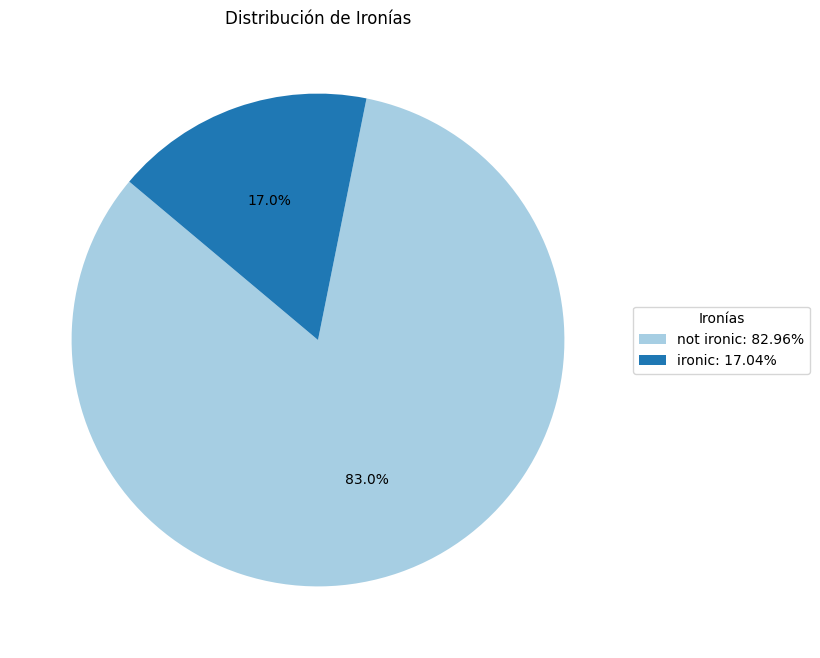

In [13]:
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(overall_irony_percentages.values(), startangle=140, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
ax.set_title("Distribución de Ironías")
legend_labels = [f"{irony}: {percentage:.2f}%" for irony, percentage in overall_irony_percentages.items()]
ax.legend(wedges, legend_labels, title="Ironías", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [15]:
print("\nEjemplos de cada tipo de Ironía:")
for sent_type, example in examples_per_irony.items():
    print(f"{sent_type}: {example}\n")


Ejemplos de cada tipo de Ironía:
not ironic: ['@twominbae cállate puta', '@Josumovic Puta Greta', '@monasterioR @julia_otero Eres patética', '@GretaThunberg Loca del coño', '@GretaThunberg cerda', '@outmarina Cállate puta de mierda', '@Valeryth_ Callate puta que te dejo en visto', '@LaFallaras Deja el alcohol cerda', '@AdaColau HIJA DE PUTA', '@Cannabianol Greta puta']

ironic: ['@drummniatico No se vaya asustar! Ese es el gremio de feminazis... el cuartel de las feas, que si le dices preciosas, se ofenden, xq piensa que te le burlas, pues ellas saben que no lo son! http://t.co/', '@LaFallaras @TeruelExiste_ Allí te puedes emborrachas loca alcohólica', '@GermanT00752596 @TmazRsc Ahora me salieron feminazis jajaja http://t.co/', '@LaFallaras @populares @CiudadanosCs Deja la botella loca del coño...', 'Serán muy feminazis pero bien que arbolitos, regalos para las crías, odian el consumismo pero la foto pal face con ropita nueva y toda la cosa ? http://t.co/', '@ZuluagaCamila Porque sera

--------------------------------------------


-----------------------------------------------

### Tweets de misogyny

-----------------------------------------------


In [16]:
text_misogynous = [text for text in df_misocorpus_train[df_misocorpus_train["label"] == 1]["tweet"].tolist()]
results_irony_analysis_misogynous = [analyze_irony(text) for text in tqdm(text_misogynous)]

  1%|          | 20/2237 [00:00<00:22, 99.01it/s]


-----------------------
Texto analizado: @twominbae cállate puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.994785487651825, 'ironic': 0.00521452259272337}

-----------------------
Texto analizado: @Josumovic Puta Greta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8591293692588806, 'ironic': 0.1408705860376358}

-----------------------
Texto analizado: @monasterioR @julia_otero Eres patética
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992074370384216, 'ironic': 0.0007926487596705556}

-----------------------
Texto analizado: @GretaThunberg Loca del coño
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9752563238143921, 'ironic': 0.024743657559156418}

-----------------------
Texto analizado: @GretaThunberg cerda
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9923944473266602, 'ironic': 0.007605595979839563}

-----------------------
Texto analizado: @outmarina Cállate puta de mierda
Ironía detectado: not

  2%|▏         | 40/2237 [00:00<00:22, 95.54it/s]


-----------------------
Texto analizado: @LaFallaras @TeruelExiste_ Allí te puedes emborrachas loca alcohólica
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0035840943455696106, 'ironic': 0.9964158535003662}

-----------------------
Texto analizado: Ni porque sea feminazi la hdsptm http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995860457420349, 'ironic': 0.0004139363009016961}

-----------------------
Texto analizado: @LaFallaras @publico_es Cerda!!! Enterate!!! Que se lo ha inventado todo la mamarracha esa!! Que no t enteras!! Q no sirves pan nada!! Trozo de carne putrefacta!!!! http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.997322142124176, 'ironic': 0.002677891869097948}

-----------------------
Texto analizado: @AmirSalva @Bell_2803 @LaSiglo21 Exacto, no tiene nada que ver lo académico, es totalmente absurdo y un abuso. Donde queda la libre expresión? Y las feminazis que vandalizan, ahí no dicen nada, que doble m

  3%|▎         | 60/2237 [00:00<00:22, 95.63it/s]


-----------------------
Texto analizado: Esas feminazis son la cagada... ???? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9826075434684753, 'ironic': 0.017392510548233986}

-----------------------
Texto analizado: @fightforkarol GRETA ES UNA PENDEJA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9980522394180298, 'ironic': 0.0019477457972243428}

-----------------------
Texto analizado: @Fercgas ?????remera para volver locas (más de lo que estan) a las feminazis
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.08787735551595688, 'ironic': 0.9121226668357849}

-----------------------
Texto analizado: Bueno. En mi sana, pero discutible opinión, se fue de las manos, y esto ya no es feminismo. 1️⃣ Esto es = propaganda feminazi 2️⃣ Como hombre-feminista, considero q así no se lucha 3️⃣ A los fans años nos ha gustado SW, conociendo de féminas guerridas y ya 4️⃣ Esto aumentaría el odio http://t.co/
Ironía detectado: not ironic
Probabilid

  4%|▎         | 81/2237 [00:00<00:22, 97.64it/s]


-----------------------
Texto analizado: Desde que salio eso.. ninguna feminazi se ha manifestado.. hijepuctas!!! http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994804263114929, 'ironic': 0.0005196306738071144}

-----------------------
Texto analizado: Las mujeres en aras de la igualdad, deberían trabajar de linearas en la @CNEL_EP como los hombres. #Feminazis
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997413754463196, 'ironic': 0.00025865467614494264}

-----------------------
Texto analizado: @Josefina_28 Otra feminazi. Creyendo que matando al mensajero arregla el problema. Lástima que el PUCP hicieron pésimo trabajo consigo. Todas tus apostillas tienes millones de apostillas más q las dejan sin piso. Ilústrate , luego critica.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990589022636414, 'ironic': 0.0009411461069248617}

-----------------------
Texto analizado: @kimamoncita @lua_jk @YouTubeMexico @KimberlyLoaiza_ @Ju

  4%|▍         | 91/2237 [00:00<00:22, 93.43it/s]


-----------------------
Texto analizado: @Alvisepf Vamos, femilocas, que lo del #Arandina se queda corto con esto.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.810662567615509, 'ironic': 0.18933747708797455}

-----------------------
Texto analizado: A todas las locas del color que no son capaces de ir hacer manifestaciones #Manresa en vez de presumir de #Feminismo, deberíais decir que lo único que queréis es #Comunismo. #Mira lo que dijo la psicóloga. + Los audios + ustedes = #DenunciaFalsa a leguas. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999347984790802, 'ironic': 0.0006519783055409789}

-----------------------
Texto analizado: EXTRAÑO TANTO A LA FEMINAZIS, sus ESTUPIDECES me hacían reír. No se vieron más.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7770355939865112, 'ironic': 0.22296442091464996}

-----------------------
Texto analizado: Habla por ti cateta!. Que torpes las “Feminazis” de creerse en la legitimida

  5%|▍         | 111/2237 [00:01<00:22, 95.95it/s]


-----------------------
Texto analizado: Cuidado: Perras Feminazis http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9944584369659424, 'ironic': 0.00554156769067049}

-----------------------
Texto analizado: @GretaThunberg La cara de hija de puta que tenés es tremenda
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9274852871894836, 'ironic': 0.07251471281051636}

-----------------------
Texto analizado: @La_Nuri @luispablob Misógino por qe? Eso no tiene nada qe ver..tu seguro eres una feminazi que si dicen algo en contra o no apoyan la causa de una mujer entonces ya uno es un misógino violador opresor..el hecho de darme cuenta del trasfondo del "movimiento greta" no me hace misógino, te hace crédula
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995844960212708, 'ironic': 0.0004155131464358419}

-----------------------
Texto analizado: esto quieren en Ecuador las silvites #Feminazis http://t.co/
Ironía detectado: not ironic
Proba

  6%|▌         | 131/2237 [00:01<00:22, 92.37it/s]


-----------------------
Texto analizado: La niña rata Greta Thunberg registra su nombre como marca comercial http://t.co/ vía @MediterraneoDGT Menudas piezas,ella y sus padres.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.392831414937973, 'ironic': 0.6071685552597046}

-----------------------
Texto analizado: @PaulinaSofiaTO Que actitud tan feminazi, pensé que éramos iguales ?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9980776309967041, 'ironic': 0.0019223648123443127}

-----------------------
Texto analizado: @FelyArianna @laSextaTV Seguro que ella lo provocó, el no la obligó, le pidió y ella hizo. #arandina #votavox
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9988517761230469, 'ironic': 0.0011481876717880368}

-----------------------
Texto analizado: En el caso del Arandina a cada acusado le ha caído una condena por lo que ha hecho él más otras 2 por lo que han hecho los demás. Si mañana matamos a alguien entre 7 personas ¿Nos caerán

  7%|▋         | 151/2237 [00:01<00:22, 94.76it/s]


-----------------------
Texto analizado: QUE DICEN AHORA LAS FEMINAZIS. QUE POR SER MUJER NO ES CORRUPTA????? @CynthiaViteri6 @alcaldiagye http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9756327867507935, 'ironic': 0.0243672002106905}

-----------------------
Texto analizado: @presidenciaperu @MartinVizcarraC @MimpPeru @pcmperu Esas asquerosas feminazis de m...da, ya llegaron al Perú con esa asquerosa moda del pañuelo verde.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992865920066833, 'ironic': 0.000713425106368959}

-----------------------
Texto analizado: @Isabelita123f Después no te estés quejando como las feminazis!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.986524224281311, 'ironic': 0.013475746847689152}

-----------------------
Texto analizado: @LaFallaras @ahorapodemos @iunida @publico_es Eso corre loca que se os acaba el chiringuito
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8131945729255676, 

  8%|▊         | 171/2237 [00:01<00:21, 96.72it/s]


-----------------------
Texto analizado: @LaFallaras @ContadorAltsasu 38 años de cárcel a los chavales del Arandina por las mentiras de una Lolita.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7901710271835327, 'ironic': 0.20982900261878967}

-----------------------
Texto analizado: @mariodaniel712 @_CarlieYo Las que son mamonas son las feminazis y las politiquillas. Cuando enseñan más el corazón y el día a día no se sienten superiores, son más relax y no andan con cosas. Por eso sigo a gente como @_CarlieYo, tienen los pies sobre la tierra, aunque a veces jueguen a qué no ?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997110962867737, 'ironic': 0.0002889172756113112}

-----------------------
Texto analizado: @lafm Se van a enputar las feminazis
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8827316164970398, 'ironic': 0.11726836860179901}

-----------------------
Texto analizado: - La niña miente más que habla, pero a ella le dejamos 

  9%|▊         | 191/2237 [00:02<00:21, 93.45it/s]


-----------------------
Texto analizado: En #Miraflores un distrito de clase media tradicional, las #Feminazi y su discurso de odio no tienen cabida. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996554851531982, 'ironic': 0.0003445342881605029}

-----------------------
Texto analizado: @Vynylplayer Feminazi mariguanada!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9985004663467407, 'ironic': 0.0014995107194408774}

-----------------------
Texto analizado: @MONICA78321384 @elmundoes María , como te diría uno devox ( vete a fregar ) yo te digo vete a la mierda ...
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.12644696235656738, 'ironic': 0.8735529780387878}

-----------------------
Texto analizado: Sera que las feminazis celebran el nacimiento del hijo de Dios...? Digo por eso de estar de acuerdo en el aborto ? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8193552494049072, 'ironic': 0.1806447654962

  9%|▉         | 211/2237 [00:02<00:21, 95.37it/s]


-----------------------
Texto analizado: @feelzsana @rxusbae @gwstoessel cállate puta trola
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9953458905220032, 'ironic': 0.004654137883335352}

-----------------------
Texto analizado: @CostaGino Cinico, hipócrita, los izquierdistas como tu apoyan a las Feminazis, que odian a los hombres y al estado
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997981190681458, 'ironic': 0.00020185364701319486}

-----------------------
Texto analizado: @Jacobo7elbobo @NacionDigital2 Y la Reinona estafadora millonaria de Greta Thumberg no dice nada no insulta a los moritos, menuda perra amastinada estafadora, que asco de niñata, ladra ahora Princesa Verde ECOLOGreta...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9945959448814392, 'ironic': 0.005404110997915268}

-----------------------
Texto analizado: No todas las lesbianas odian a los hombres, me consta, las que odian a los hombres son solo las feminazis, 

 10%|█         | 231/2237 [00:02<00:22, 90.88it/s]


-----------------------
Texto analizado: Esto si va hacer una película desente no la versión forzada féminazi ??? http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.1735018491744995, 'ironic': 0.8264981508255005}

-----------------------
Texto analizado: ¡El violador eres tú! ¡La feminazi soy yo! ???
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.993165910243988, 'ironic': 0.006834076717495918}

-----------------------
Texto analizado: @mariapaularomo @PoliciaEcuador Felicitaciones pero no pida disculpa por una feminazi
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992844462394714, 'ironic': 0.0007155610364861786}

-----------------------
Texto analizado: SE ACABA EL COP25, MENOS MAL. RESUMEN PARA DUMMIES: VINA-GRETA Thunberg, un producto de marketing para gilipollas. Efectivamente, la pequeña revolucionaria del clima es un timo. Resulta que zarpa desde Virginia... http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 

 11%|█         | 251/2237 [00:02<00:21, 92.11it/s]


-----------------------
Texto analizado: Dioos, anoche soñé que venia Greta Thunberg de intercambio a mi casa y que era una hija de puta y no paraba de joderme, ahora me cae mal
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9328072667121887, 'ironic': 0.06719277799129486}

-----------------------
Texto analizado: "Oh, estás criminalizando a la vícti...". Que sí, que a fregar.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8086840510368347, 'ironic': 0.1913159340620041}

-----------------------
Texto analizado: Que sea por meritocracia. No por tener un sexo u otro. #Feministas #Feminazi http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9984847903251648, 'ironic': 0.0015152815030887723}

-----------------------
Texto analizado: @sheepols @ctxt_es A fregar a tu casa, ¿ verdad mujer liberal y libre?
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.3587222993373871, 'ironic': 0.6412776708602905}

-----------------------
Texto

 12%|█▏        | 271/2237 [00:02<00:20, 94.25it/s]


-----------------------
Texto analizado: @sophyblueblood @DoyletJuan Es que realmente la situación no daba para armar tanto show! Lo que quieren es llamar la atención de su movimiento feminazi
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995678067207336, 'ironic': 0.0004321869055274874}

-----------------------
Texto analizado: @GretaThunberg Que te calles ya niñata y aproveches tu tiempo en hacer algo productivo aparte de tonta eres fea
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9984948635101318, 'ironic': 0.001505160820670426}

-----------------------
Texto analizado: #ESPejo16D Sois un@s cerd@s feminazis, el caso Arandina es la prueba de que cualquier hombre blanco hetero español puede ir a la cárcel de por vida por una #DenunciaFalsa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996875524520874, 'ironic': 0.0003125017392449081}

-----------------------
Texto analizado: @JUDITHBELANDRIA Jajaja ay Judy la feminazis no saben que e

 13%|█▎        | 291/2237 [00:03<00:21, 91.59it/s]


-----------------------
Texto analizado: @LaFallaras @populares Qué patética eres, Fallaras?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989548921585083, 'ironic': 0.0010451055131852627}

-----------------------
Texto analizado: @monasterioR De verdad, ¿Es el momento de hacer política o de arrimar el hombro? Aunque con esa cara y esa sonrisa de estúpida no esperaba mas.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9859222173690796, 'ironic': 0.01407777052372694}

-----------------------
Texto analizado: Las Feminazis andan activas con lo de Kobe Bryant y el caso donde lo denuncio Katelyn Faber por Violacion, y por lo cual le quedo una buena platica, ahora me pregunto, que hacia ella a las 11 de la noche en su cuarto?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9982274174690247, 'ironic': 0.0017725508660078049}

-----------------------
Texto analizado: @AlvaroRiera24 Q crack va a ser esta señora tecla brava bloquea mas rapido q bruc

 14%|█▍        | 311/2237 [00:03<00:20, 91.90it/s]


-----------------------
Texto analizado: Yo no soy muy religioso que se diga pero esto me acerca más a la religión, estas feminazis son unas hijas de puta sin respeto por nada ni por nadie. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998251795768738, 'ironic': 0.00017480281530879438}

-----------------------
Texto analizado: @monasterioR Deja en paz a los nuestros. Bruja perra mala. Asquerosa. Presunta estafadora.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995373487472534, 'ironic': 0.0004626448208000511}

-----------------------
Texto analizado: ¿Incluye la glorificación d las #feminazis? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.998917818069458, 'ironic': 0.001082260045222938}

-----------------------
Texto analizado: @cayetanaAT Yo no dedicaría ni un micro-segundo de mi tiempo a alguien tan insignificante como esta pseudo-ministra ... Nos queda mucho para reírnos con (de) ella ...Es una progre paté

 15%|█▍        | 331/2237 [00:03<00:20, 93.32it/s]


-----------------------
Texto analizado: Hay una jeva intensa de venezuela que es feminazi a morir y ver que la hicieron famosa me hace pensar que no servimos como población
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9982819557189941, 'ironic': 0.0017180787399411201}

-----------------------
Texto analizado: #FEMINAZI que quiere participar en política ??? Por eso estamos con leyes -#PROMUERTE por engendros como éstos #INDIGNANTE http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996472597122192, 'ironic': 0.00035270157968625426}

-----------------------
Texto analizado: @LaFallaras @sanchezcastejon ¿Te imaginas que devuelven el oro que se llevaron a Moscú? O.... ¿Te imaginas que devuelven el tesoro de diamantes, joyas y oro que robaban en la guerra y que se llevaron a Méjico? Eres una puta fanática, espero que te encuentres cara a cara con el odio que desprendes.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.734912097454071, 

 16%|█▌        | 351/2237 [00:03<00:19, 95.84it/s]


-----------------------
Texto analizado: @LaFallaras Eres una CERDA. Lo pillas? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9814841747283936, 'ironic': 0.018515827134251595}

-----------------------
Texto analizado: Ya dejen de publicar noticias, lo que dijo, lo q declaro, la loca esa Greta q no recuerdo el apellido
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9964428544044495, 'ironic': 0.0035571844782680273}

-----------------------
Texto analizado: @YatzeU @mariieFeminist @candeherrera05 Y las feminazis que se creen hombre. Como quedan ahí! ??☺
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9786661863327026, 'ironic': 0.021333744749426842}

-----------------------
Texto analizado: una feminazi deseandote la muerte parte 1000 http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987930059432983, 'ironic': 0.0012069811346009374}

-----------------------
Texto analizado: @LaFallaras Quedate con lo de 

 17%|█▋        | 371/2237 [00:03<00:19, 96.87it/s]


-----------------------
Texto analizado: @LaFallaras Tú no das lecciones de nada, defiendes callándote a LOBBAS ASESINAS de hijos. Como te llamamos entonces puta escoria?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994893074035645, 'ironic': 0.0005106654716655612}

-----------------------
Texto analizado: Man ODIO a Greta Thundercat, anda a rendir las previas pedazo de europea hija de puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9959795475006104, 'ironic': 0.004020417109131813}

-----------------------
Texto analizado: @diariocorreo Y xq acá no salta ni una de esaa feminazis que no se las come ni el óxido???
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9977325201034546, 'ironic': 0.002267502248287201}

-----------------------
Texto analizado: Feminazis, trabajo sí hay. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9081220030784607, 'ironic': 0.0918780192732811}

-----------------------
Texto analiza

 17%|█▋        | 381/2237 [00:04<00:20, 92.19it/s]


-----------------------
Texto analizado: @CarlosFGalan Las feminazis unen a la izquierda y derecha jaja son tan ridículas que pocas les dan bola
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9819121360778809, 'ironic': 0.018087835982441902}

-----------------------
Texto analizado: @LuxAndLan Uy una feminazi ser de Luz que está convencida que todo lo que dice es cierto. Que no acepta críticas pero se cree con todo el derecho de críticar. Estas mas cercana al movimiento Nazi tu que yo. Saludos.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997991919517517, 'ironic': 0.0002008442097576335}

-----------------------
Texto analizado: Esperando que las feminazis saquen el éxito: "La asesina eres tú"... http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.010216852650046349, 'ironic': 0.9897831082344055}

-----------------------
Texto analizado: @aleja_zv @CookieOfAvocado @DrBadalassi Vega tía feminazi, la que se mete y busca atención eres t

 18%|█▊        | 401/2237 [00:04<00:19, 93.26it/s]


-----------------------
Texto analizado: @LaFallaras @populares @CiudadanosCs Mira payasa, lo que defiende es la presunción de inocencia y no que tú y otras tantas descerebradas anden haciendo la justicia por su lado con presión mediática y política. Es una chica que les amenazó con mentir si contaban algo y ale, ahí lo tienes.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998089671134949, 'ironic': 0.00019102705118712038}

-----------------------
Texto analizado: @SaulG86 ahorita las feminazis lo culpan por matar a la hija... de seguro alegan que quien monta a una niña de 13 años en un helicóptero... eso va!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9963088631629944, 'ironic': 0.0036911482457071543}

-----------------------
Texto analizado: @LaFallaras Alfinal serás una loca mas
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.41387784481048584, 'ironic': 0.5861221551895142}

-----------------------
Texto analizado: @LaFallaras @PeioHR Er

 19%|█▉        | 421/2237 [00:04<00:19, 94.14it/s]


-----------------------
Texto analizado: @LaFallaras @populares @CiudadanosCs Eres de lo más indeseable que hay en este país. Loca de mierda.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991994500160217, 'ironic': 0.0008005584240891039}

-----------------------
Texto analizado: eso me dijo greta thunberg el otro día esta re desubicada la puta http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999123752117157, 'ironic': 0.0008762551005929708}

-----------------------
Texto analizado: @elespectador Esta pregunta no es mas que otro atentado Feminazi".
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999762237071991, 'ironic': 0.00023781931668054312}

-----------------------
Texto analizado: @NathyAlarcon1 @Vynylplayer La incoherencia estupida en la cual se manejan. Rayan en lo ridículo las feminazis.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996843338012695, 'ironic': 0.00031567850965075195}

--------------------

 20%|█▉        | 441/2237 [00:04<00:18, 96.57it/s]


-----------------------
Texto analizado: @4521Roberth @Nenasin @PatriciaMoraC Es una feminazi , tanta bola que le dan a esa vieja y a todos se les olvida lo que ella piensa de este país antes de llegar a ese puesto... Mejor se fuera a otro país donde ella crea que si vale...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997027516365051, 'ironic': 0.0002972171059809625}

-----------------------
Texto analizado: @ElMauroCs Ojito llegan las feminazis
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8793168663978577, 'ironic': 0.12068319320678711}

-----------------------
Texto analizado: @Guatemula Netflix es un nido de lavado de cerebros feminazi... todo alli está diseñado para adoctrinar la "ideología de Género...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997088313102722, 'ironic': 0.000291165109956637}

-----------------------
Texto analizado: @LaFallaras No eres ni lobby ni lobba ni na ,eres tonta , boba maliciosa , además de manipul

 21%|██        | 461/2237 [00:04<00:18, 95.79it/s]


-----------------------
Texto analizado: @LaFallaras Calla golfa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9870703220367432, 'ironic': 0.012929732911288738}

-----------------------
Texto analizado: @iWasEasy Y las feminazis acusarían a Mcmosca de machista opresor por haber dejado a la novia tirada durmiendo en una banca mientras se largaba con el Doc.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9758896827697754, 'ironic': 0.024110382422804832}

-----------------------
Texto analizado: @LaFallaras @CristinaSegui_ @alfonso_ussia @bertrandmyd @publico_es Tú sigue empinando el codo, patética abuela alcohólica.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9966866374015808, 'ironic': 0.0033133341930806637}

-----------------------
Texto analizado: Ejemplo patéticos de "feminazis". Unas depravadas completas. @NoticiasCaracol @LupeMohawk @Animalogia @merv59 @lbertoortiz @pedrosalazar420 @AndradMendoza @AOR666 @Barreja @IskraOrella @DonPo

 22%|██▏       | 481/2237 [00:05<00:19, 91.31it/s]


-----------------------
Texto analizado: una pregunta seria que se le puede regalar una feminazi que no se ofenda?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9976416826248169, 'ironic': 0.002358393743634224}

-----------------------
Texto analizado: Este es el negocio atrás del aborto (? Las malditas aborteras venden a los bbs muertos a empresas. Feminazis horribles!!?????✊ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9941830039024353, 'ironic': 0.005817035678774118}

-----------------------
Texto analizado: #OLISBITÁCORA --&gt; CUANDO LES CONVIENE HABLAN DE QUE SON UNA COMUNIDAD..... CUANDO LES CONVIENE HABLAN DE QUE REPRESENTAN A #ECUADOR . DECIDETE @jaimevargasnae ! p.s.: ahora las #feminazis te van a perseguir. #GUAYAQUIL #QUITO @CONAIE_Ecuador #CONAIE http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9667611718177795, 'ironic': 0.03323882818222046}

-----------------------
Texto analizado: Estoy esqivicado,

 22%|██▏       | 501/2237 [00:05<00:18, 93.03it/s]


-----------------------
Texto analizado: Aplaudo las luchas historicas de igualdad de genero por parte de mujeres heroicas, pero lo que no se debe aplaudir hoy dia es ese feminismo radical (feminazi) que esta contribuyendo al deterioro social ( la familia ). Y el estado es complice.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999783456325531, 'ironic': 0.00021661428036168218}

-----------------------
Texto analizado: Feminazis digan lo suyo!!!! http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9954284429550171, 'ironic': 0.004571526776999235}

-----------------------
Texto analizado: Barrer a la feminazi con un argumento SIMPLE y DEMOLEDOR, definitivamente es una destreza adquirida por @JMilei no tenemos todos. Feliz Año Nuevo Javi http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998481273651123, 'ironic': 0.00015179590263869613}

-----------------------
Texto analizado: Nos va a tocar salirles a las feminazi a hace

 23%|██▎       | 522/2237 [00:05<00:17, 95.84it/s]


-----------------------
Texto analizado: Que tal si las Feminazis de enlistan en el ejército. No les parece muy machista eso de enviar solo hombres a la guerra?
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.01671575754880905, 'ironic': 0.9832842350006104}

-----------------------
Texto analizado: Uno de los requisitos para ser feminazi es ser feisisimaaaa jajaja
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.009218620136380196, 'ironic': 0.9907813668251038}

-----------------------
Texto analizado: @meiermq Sus tetas cambiaron el mundo jajaja es una feminazi pero discrepo sí es una gran artista, lástima que el neomarxismo la capturó.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9967819452285767, 'ironic': 0.0032180489506572485}

-----------------------
Texto analizado: @DoyletJuan @caathytorres @PoliciaEcuador Buena esa compita?? Todos los emelecistas UNIDOS contra las feminazis @silvitabuendia @LoloMino
Ironía detectado: not ironic
Probabilidad

 24%|██▍       | 542/2237 [00:05<00:17, 95.59it/s]


-----------------------
Texto analizado: @Colo1905Ok Sì, però solo de las Hdp. ...son las "cosas" más asquerosas de este mundo... algunos las llaman también feminazi ?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993088245391846, 'ironic': 0.0006912203971296549}

-----------------------
Texto analizado: @lilalvsherworld Eso dirán los niños cuando recuerden las marchas feminazis
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9723529815673828, 'ironic': 0.0276469886302948}

-----------------------
Texto analizado: @OEMatias @Mr_Blonde77 @OsogordoIntenso Las mujeres normales si, las féminazis radicales son todas androginos sin culo sin tetas, sin alma...
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.3132730722427368, 'ironic': 0.6867269277572632}

-----------------------
Texto analizado: Feminazi, Asesina. El Abuelito Asesinado por una Feminazi... http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993581175804138, 'iro

 25%|██▌       | 563/2237 [00:05<00:17, 97.31it/s]


-----------------------
Texto analizado: Así se le trata no solo a las #feminazis argentinas sino a los periodistas #progres de corte amarillescos, y así debería de hacerse en España hacia estas desgracias que dicen llamarse mujeres y no sabemos que son porque no tienen sexo definido. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997503161430359, 'ironic': 0.0002497368259355426}

-----------------------
Texto analizado: BRILLANTE RESPUESTA A UNA FEMINAZI!!!!!!! http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9764869809150696, 'ironic': 0.02351302094757557}

-----------------------
Texto analizado: @PapiQuieroVerte @AmordePapa @derechoapapa @A_C_C_A @PadresdeRNyNQN @ninos_rotos Las FEMINAZIS CLAUDIA ROXANA MARTÍNEZ Y LA DELINCUENTE VIGO RESPONSABLES DEL SECUESTRO Y TORTURA DE ESTE CIUDADANO ARGENTINO.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989989399909973, 'ironic': 0.0010011213598772883}

----------------

 26%|██▌       | 583/2237 [00:06<00:17, 92.29it/s]


-----------------------
Texto analizado: Ya asumió Ofelia, la feminazi
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9758403897285461, 'ironic': 0.024159640073776245}

-----------------------
Texto analizado: @Diezum @cristiancrespoj ???. Eso quieren llamar la atención. Igual las feminazis. Nosotros les damos la vida con nuestra publicidad.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9978540539741516, 'ironic': 0.002145921578630805}

-----------------------
Texto analizado: Que le habrá hecho creer el dueño de la ONG RPPACTIVISTAS que se cree que es la dueña pues. Lo bueno es que con esto está feminazi y sus amos ya se terminaron de descarar: son progres / socialistas , pro chavistas light y sobretodo les importa un carajo si el pais explota! http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.995598554611206, 'ironic': 0.004401403479278088}

-----------------------
Texto analizado: Los Nazi de Hitler son niños de pecho al lado 

 27%|██▋       | 593/2237 [00:06<00:18, 88.82it/s]


-----------------------
Texto analizado: @blogcyh @wizagp @Alejandro_muba Solo miren la cara de esa cuatro ojos como lo miraba. Hay Feminazis, por que odian a los hombres?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9978606104850769, 'ironic': 0.002139447722584009}

-----------------------
Texto analizado: @EllaDiarioAM @Tacirupeca @Aquisolomandoyo @hernanmilla72 @JovenEuropeo @67quijote Ay no ya llegaron las feminazi dolidas indignadas a darse golpes de pecho...me aburren... http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9285901784896851, 'ironic': 0.07140980660915375}

-----------------------
Texto analizado: @NairAliaga En estos días de las imposiciones de la ideología de genero y las feminazis, es difícil ver esto. Te felicito, espero que cumplas tu sueño ?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995300769805908, 'ironic': 0.0004699270357377827}

-----------------------
Texto analizado: La Cumbia Feminazi de Rene

 27%|██▋       | 611/2237 [00:06<00:21, 74.94it/s]


-----------------------
Texto analizado: ?Por un 2020 sin feminazis
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9976569414138794, 'ironic': 0.002343072323128581}

-----------------------
Texto analizado: @GretaThunberg Cállate la puta boca subnormal
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992042183876038, 'ironic': 0.0007957553025335073}

-----------------------
Texto analizado: Su voz es como de una cuaima ligado con feminazi http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.17765013873577118, 'ironic': 0.8223498463630676}

-----------------------
Texto analizado: @quiquex61 @Silvio11914774 @24h_tve @GretaThunberg La histérica está haciendo que unos cuantos estén ganando BILLONES con el hoax del calentamiento global; que es cíclico, pero vende mucho. Al Gore estará disfrutando contando ceros en su cuenta Mejor haría ayudando a Swedishtan su país, que ya ha caído y difícilmente se levantará
Ironía detectado: ironic
Probabil

 28%|██▊       | 627/2237 [00:06<00:22, 72.42it/s]


-----------------------
Texto analizado: Por respetar el trabajo de Greta no haces de menos el de ningún otro activista, la tonta del culo esta diciendo que no hagáis caso a una niña que ha hecho oir a los principales líderes mundiales y potenciado enormemente la concienciación es la que hace cero bien a la causa ✖️ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9988202452659607, 'ironic': 0.0011796827893704176}

-----------------------
Texto analizado: @JovenEuropeo La mentira del mundo es @GretaThunberg Yo no se por que le hacen caso a una chiquilla con pedos existenciales a los 9. Mejor que se ponga a jugar como los demás niños. No puede, le robaron su niñez, che niña patética
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9980114698410034, 'ironic': 0.0019885150250047445}

-----------------------
Texto analizado: @lajose Es que greta es tan estupida que ya ni la toman en serio de las babosadas que dice
Ironía detectado: not ironic
Probabi

 29%|██▊       | 643/2237 [00:07<00:21, 72.81it/s]


-----------------------
Texto analizado: Buenos días preciosas!!!! *Todas las feminazis se ofenden *
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7779545783996582, 'ironic': 0.22204546630382538}

-----------------------
Texto analizado: @Lady_biela Casi lo q piden las feminazis, matar a un hijo en el vientre ??‍♀️
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9975048899650574, 'ironic': 0.002495070453733206}

-----------------------
Texto analizado: @vanesavallejo3 Has hecho una revuelta de feminazis y gente ignorante en tus comentarios eh. Ya me has ganao mi corazón *_*
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.03899670019745827, 'ironic': 0.9610032439231873}

-----------------------
Texto analizado: La cara de @zaid_solrac cuando ve un tuit de las feminazis http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8763282895088196, 'ironic': 0.12367172539234161}

-----------------------
Texto analizado: @bbcmundo Las 

 29%|██▉       | 659/2237 [00:07<00:22, 69.64it/s]


-----------------------
Texto analizado: A ver a ver Carmen dejá de andar violando maldita feminazi te vas a morir
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.911303699016571, 'ironic': 0.08869626373052597}

-----------------------
Texto analizado: Las mujeres nunca mienten segun la ley feminazi. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989545345306396, 'ironic': 0.0010454057483002543}

-----------------------
Texto analizado: @mpilartroyaf @ramirogarciaf @GretaThunberg Otra vieja blanca feminazi que se traga todas las mentiras de una pseudo activista
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991582632064819, 'ironic': 0.0008417419157922268}

-----------------------
Texto analizado: @urievictorious Exclamó la desconocida! Rubius, tiene el derecho de vender lo que quiera, cuando quiera. Además que tiene el dinero para comprarse todas las putas del mundo y no pajearse. Saludos feminazi.
Ironía detectado: ironic
Pr

 30%|██▉       | 667/2237 [00:07<00:22, 70.56it/s]


-----------------------
Texto analizado: @VinuezaCristin1 @seejaycuervo Benny Hill las feminazis estarían con ataque masivo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9751666784286499, 'ironic': 0.024833304807543755}

-----------------------
Texto analizado: Deberían reportarla spam y darle Unfollow y se le terminó todo a la loca feminazi ?️
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993226528167725, 'ironic': 0.0006773219793103635}

-----------------------
Texto analizado: La iniciativa es buena, generó ruido y ya todo el mundo se sabe la canción, pocos entienden el porqué, solo que aquí si no estoy de acuerdo en algo, miráme a la chica que está en cuquitos, no va a ser un motivo para que digan "degenerada, feminazi que incita a la violación"? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996417760848999, 'ironic': 0.00035816506715491414}

-----------------------
Texto analizado: @BerenDagor ??? Sin una IDIOTAS !!!!

 30%|███       | 682/2237 [00:07<00:23, 65.53it/s]


-----------------------
Texto analizado: @holasoyvitico @PedroMCasals Y sin dar lástima ni exigir cuotas mínimas solo por ser mujer. Ella sola con su talento personal puede alcanzar cualquier meta q se ponga. Nada de influencias malsanas de resentidas feminazis. Gloria de mujer!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989374279975891, 'ironic': 0.0010625902796164155}

-----------------------
Texto analizado: Manual de supervivencia con utensilios, tan necesarios e imperdibles, como un glosario y una descripción, exhaustiva y divertida, de los diferentes tipos de “feminazis”. #FeministInternet #cristinaseguí http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.014709540642797947, 'ironic': 0.9852904081344604}

-----------------------
Texto analizado: Yo , desestresándome de tanta feminazi http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.03267468512058258, 'ironic': 0.9673252701759338}

-----------------------
Texto analizad

 31%|███       | 696/2237 [00:07<00:23, 65.23it/s]


-----------------------
Texto analizado: Hasta ahorita no escucho el dichoso "himno feminazi", al parecer es muy pegajoso y el hit del verano... No, no quiero escucharlo.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5898964405059814, 'ironic': 0.41010352969169617}

-----------------------
Texto analizado: @LesterToledo Ya nadie cree en políticos en Venezuela. Las feminazis están mejor organizadas que la oposición. Se viene una tercera vía no muy prometedores intelectualmente pero si de armas tomar.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9879047870635986, 'ironic': 0.0120951933786273}

-----------------------
Texto analizado: @noyougirlss soy un manojo d nervios pq si m re putea y m dice virga d mierda feminazi etc etc m va a dOLER JAJAJA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5491392016410828, 'ironic': 0.45086079835891724}

-----------------------
Texto analizado: Este caso es un claro ejemplo del poder de las ONG progres

 32%|███▏      | 710/2237 [00:08<00:26, 58.34it/s]


-----------------------
Texto analizado: @Bravisimanature @leisysiel @leisy la critica va hacia el movimiento feminista... no a las feministas... leisy es feminista. en el sentido a que se defiende como mujer... creo que lo dijo una vez... pero no esta a favor de las tonterias que estan manifestando ultimamente.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995803236961365, 'ironic': 0.0004197283124085516}

-----------------------
Texto analizado: @MadayCalvo Ahorita sale una feminazi y dice que todo eso es gracias a los logros del feminismo y no al intelecto y fuerza de voluntad que tuviste que tener y aplicar para darte cuenta que mujeres y hombres somos seres humanos iguales con las mismas capacidades y oportunidades en la vida
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990242719650269, 'ironic': 0.0009757845546118915}

-----------------------
Texto analizado: @EsLaRadio2 @adri50109203 Ni feminista, ni nada. Una HIJA DE LA GRAN PUTA es lo que es

 32%|███▏      | 716/2237 [00:08<00:59, 25.44it/s]


-----------------------
Texto analizado: @Singularidad_86 @marianalongo11 Seguro que no le debe costar mucho conseguir tal fin. Las feminazis parecen una parodia de la mujer.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9472694396972656, 'ironic': 0.05273056402802467}

-----------------------
Texto analizado: @iceldaperez Las feminazis se enojarán. Porque siembran arboles que es sl símbolo fálico del patriarcado y no siembran ostiones con galletitas? jajaja
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0010253359796479344, 'ironic': 0.9989746809005737}

-----------------------
Texto analizado: @isabelmarti Jajajajs psicóloga de pacotilla en contra de evidencias reales y objetivas. Oiga no nos tomen el pelo q eso ha sido una orgia en toda regla. La justicia feminista apesta ?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989677667617798, 'ironic': 0.0010322930756956339}


 32%|███▏      | 721/2237 [00:09<01:22, 18.39it/s]


-----------------------
Texto analizado: @camilabellota Si fuera feminista, seria "zorrora" y te tendría un poco de compasión por ser tan weona. No sigo ideologias, guacha. Por lo demás, facil dedicarse a la prostitución, pero lo encuentro riesgoso e indigno, no quiero actuar como alguien que ya tiene neurosifilis como tú.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.998874843120575, 'ironic': 0.0011251887772232294}

-----------------------
Texto analizado: +1 a mi mo me representan, desde su amargura y frustración escudadas de feminismo http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995563626289368, 'ironic': 0.00044367226655595005}

-----------------------
Texto analizado: @inesands En algún otro lugar lo dije y aquí lo repito: me cago en el feminismo! ???
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992396831512451, 'ironic': 0.000760289782192558}

-----------------------
Texto analizado: @GirautaOficial @bechoch El fe

 32%|███▏      | 725/2237 [00:09<01:37, 15.56it/s]


-----------------------
Texto analizado: @ActualidadRT el día que alexa me pueda masturbar me compraré una. Mientras tanto sigue siendo menos inútil una mujer. Este comentario machista fue patrocinado por #BolasPatriarcalesSAdeCV
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0634147897362709, 'ironic': 0.9365852475166321}

-----------------------
Texto analizado: @Nissan_ESP @RAEinforma Si las mujeres necesitan una vocal para ser visibles estan jodidas, o mejor dicho, no la necesitan es propaganda progre, de feminazis. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994214773178101, 'ironic': 0.0005785506218671799}


 33%|███▎      | 728/2237 [00:09<01:49, 13.81it/s]


-----------------------
Texto analizado: @jazminmespino No jaz, cuando me refiero a feminazis es porque conozco feministas moderadas. Y no es como vos decís, no buscan igualdad para todos. Bardean al hombre e incluso q la mujer que piensa distinto. Si eso es feminismo, no lo quiero nunca.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994298815727234, 'ironic': 0.0005700396141037345}

-----------------------
Texto analizado: Ya no se puede opinar de nadie ni hacer un comentario por culpa de las feminazis q se creen superman compartiendo un video E aqui la diferencia entre feminista y feminazi http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994096755981445, 'ironic': 0.0005903220735490322}

-----------------------
Texto analizado: Yo,que tengo hijas inteligentes,bonitas,bondadosas contemplo con cierta arrecherita a las locas feminazis cuando salen a coñacear a los hombres,a decirnos de todo porque,según ellas,los culpables de que sean tan fea

 33%|███▎      | 731/2237 [00:10<01:53, 13.31it/s]


-----------------------
Texto analizado: Lo que pasó en el Sambil demuestra cómo de jodida está la sociedad venezolana. Pero mientras esto pasa, estúpidos dicen que todo está bien porque "hay Nutella en los negocios" y hay estúpidas queriendo meter el feminismo en venezuela. ¿Qué?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987879395484924, 'ironic': 0.0012121041072532535}

-----------------------
Texto analizado: @cuueevaaas @baadayez @gioofernandez @UC_oficial @MeTooDeLaUC_ Gracias por asumir mi género y sobretodo mi clase social. Con un tuit acabas de dejar claro que vuestro 'feminismo' únicamente es una lucha de unas pocas que discriminan y rechazan a las que no piensan como vosotras. En fin.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993614554405212, 'ironic': 0.0006385018350556493}

-----------------------
Texto analizado: segundo menosprecia a las amas de casa que no saben nada a comparación de ella que aprendió todo de la calle----&gt; el

 33%|███▎      | 735/2237 [00:10<01:59, 12.61it/s]


-----------------------
Texto analizado: @jbonR Qué es 99 mujeres entre 40000000 también hay más de 2000 mujeres asesinas de padres hijos abuelos 3000 hombres se quitan la vida al año en España y tú vienes a hablar de payasadas miserable feminista ponte al dia sinvergüenza qué vienes a hablar tú de payasadas bollera
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997250437736511, 'ironic': 0.00027498925919644535}

-----------------------
Texto analizado: @lore00151923 Como dirian desde tu partido político: A FREGAR LORENA, A FREGAR?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6460004448890686, 'ironic': 0.353999525308609}

-----------------------
Texto analizado: @pllmclsr @M_artisa @mariodella @noticias24 Porque ver a la mujer de tachable y culpable no esta de moda en estos asuntos, cuando tiene toda la culpa. Al igual que todas las declaraciones de abusos y maltratos hacía los hombres por mujeres (datos oficiales), no salen a la luz porque culpar a l

 33%|███▎      | 739/2237 [00:10<01:51, 13.48it/s]


-----------------------
Texto analizado: Estaba en el café comiendo...cuando llego un chico pidió un smoothie de fresa espero un rato y llego una chica...en moto pidió una malteada y dejó su casco en la mesa de al lado Eso es feminismo no sus mamadas de enseñar las chichis
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.11537566035985947, 'ironic': 0.8846243619918823}

-----------------------
Texto analizado: Por un nuevo año sin violencia contra las mujeres; salvo con Rosa Bartra, keiko, sus hijas, su abogada, martha chavez y todas esas brujas apañadoras del fujiaprismocorrupto ¿Asi, o mas comprometidas con la causa feminista? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.973450243473053, 'ironic': 0.026549730449914932}

-----------------------
Texto analizado: Hoy me dijeron que tenia cara de feminista, qué vergüenza
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9841516017913818, 'ironic': 0.01584840938448906}

-----------------

 33%|███▎      | 741/2237 [00:11<01:56, 12.86it/s]


-----------------------
Texto analizado: @maytela70 @PrinzessinAdora @ladymadrizfree @AveryanovArtiom @HuhConH Osea que 4 locas si pueden decirle al resto de mujeres lo que pueden y no pueden hacer y eso es feminismo... Ya veo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9840474724769592, 'ironic': 0.01595251075923443}

-----------------------
Texto analizado: @albertomedina71 Bueno pero ese movimiento que llaman ahora "feminismo", pero que no tienen nada que ver con la reivindicacion de los derechos de las mujeres,,, se ponen en ridiculo ellas solas, y el esquema este de mesclar ideologias politicas con derechos femeninos es la muestra.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997192025184631, 'ironic': 0.00028078327886760235}


 33%|███▎      | 743/2237 [00:11<02:15, 11.04it/s]


-----------------------
Texto analizado: El Feminismo Actual es señalar al varón como el más criminal y violento y a la mujer como una eterna víctima.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991129040718079, 'ironic': 0.0008870565798133612}

-----------------------
Texto analizado: @nachomaturana @ACambiarlos ?||Femen: Emputecedora.!! "Cuales son sus pensamientos intimos tal es EL (Ella)...". ? La siembra del "pensamiento feminazi va tomando forma en la mentalidad juvenil, facil de manipular y PENETRAR. Y es pretexto para desnudarse...?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9771146178245544, 'ironic': 0.02288544736802578}

-----------------------
Texto analizado: @PochoHarb2 Ya vienen en gajo las #Feminazis que no son más un poco de Marimachas, tortilleras con problemas PsicoVaginales a joder por aquí
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9984074234962463, 'ironic': 0.0015925612533465028}


 33%|███▎      | 747/2237 [00:11<01:53, 13.11it/s]


-----------------------
Texto analizado: @Kachkaniraqmi94 @veritatisperu Otra troll pro género y feminazi, a silenciar a la femitroll.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9988112449645996, 'ironic': 0.0011888269800692797}

-----------------------
Texto analizado: @cagento1 @FedericoHaDicho @Slaanesh_Adria Yo pensaba que eran más mayores, he visto el caso por encima solo. Pero vamos, que es lo que nos toca vivir en este totalitarismo feminazi.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9945846199989319, 'ironic': 0.005415425170212984}

-----------------------
Texto analizado: Acá está la feminazi con pelos cagandose d calor???? http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.3534301519393921, 'ironic': 0.6465699076652527}


 34%|███▎      | 751/2237 [00:11<01:40, 14.78it/s]


-----------------------
Texto analizado: @PedroMCasals Que dicen las feminazis? Violencia de género o discusión entre hembras?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9737043380737305, 'ironic': 0.026295708492398262}

-----------------------
Texto analizado: @caathytorres ANDA A HACERTE COGER BIEN FEMINAZI DE MIERDA, luego xq hacen chiste de su puta canción
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994900226593018, 'ironic': 0.000509963312651962}

-----------------------
Texto analizado: @a_arevalosilva Totalmente cierto. Lo más gracioso es que cuando los de la Colombia Humana, las feminazis o los adalides de la defensa de los DD HH, cuando me van a insultar siempre comienzan diciéndome "viejo".
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9474163055419922, 'ironic': 0.052583664655685425}

-----------------------
Texto analizado: @Barbiebarbz6 No se q me da mas pena ... Que aplaudas al personaje de una solterona q no peleo po

 34%|███▍      | 756/2237 [00:12<01:22, 18.06it/s]


-----------------------
Texto analizado: @CalatoPerro Para las feminazis eso sería acoso y ya estarías purgando carcel
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996716976165771, 'ironic': 0.0003283475525677204}

-----------------------
Texto analizado: @celee61 Vos sos tan pelotuda como una feminazi, muy cheta para no cagás soretes con olor a fresas
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.862765908241272, 'ironic': 0.1372341513633728}

-----------------------
Texto analizado: La feminazi con novio. Vaya vaya!!
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.4628966152667999, 'ironic': 0.5371033549308777}

-----------------------
Texto analizado: NOCHE DE REYES Dejaré mis zapatitos con una Carta como cada 5 de enero Solo voy a pedir que: Las feminazis no pretendan asesinarlos Los Nac y Pop no tiren las cartitas de sus hijos Alberto no les cobre 30% a juguetes importados Que los hijos de los zurdos les dejen pastito y agua http://t.co

 34%|███▍      | 762/2237 [00:12<01:13, 20.11it/s]


-----------------------
Texto analizado: Que ni se enteren la Feminazis que el Delfin quedó campeón xq son capaces de llevarseles a todas la burritas ??
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.008243540301918983, 'ironic': 0.9917564392089844}

-----------------------
Texto analizado: @InstitutoCato Si te das cuenta, donde hay más feminazis y estúpidos comunistas, es en donde hay mayor índice de falta de comprensión de textos. Jajajajajajaja.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.001070408383384347, 'ironic': 0.9989295601844788}

-----------------------
Texto analizado: #FEMINAZISMO No tienen nada que ver con las Feministas de los años 50 que consiguieron el derecho al voto. La Feminazi es la criminal que realiza vandalismo impunemente, promueve la Misandria y solo 1 de cada 10 mujeres se sienten representadas por esa ideología http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998575448989868, 'ironic': 0.00014243621262721

 35%|███▍      | 775/2237 [00:12<00:36, 39.93it/s]


-----------------------
Texto analizado: @andresgarcia_y Si brother, Las feminazis andan como locas buscando cualquier webada para inventarse acoso.. ?‍♂️
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9954160451889038, 'ironic': 0.004583957605063915}

-----------------------
Texto analizado: Por eso no respeto a los zurdos y feminazis, pues en sus delirios afectan a terceros
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998120665550232, 'ironic': 0.00018797065422404557}

-----------------------
Texto analizado: Cómo reconocer a una #feminazi: No entienden la diferencia entre una #feminista y una feminazi (Y piensan que por postear esto, soy violador o misógino) Lean, estudien e infórmense, para que en unos años se den cuenta de lo pendejas/os que eran. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9815296530723572, 'ironic': 0.018470313400030136}

-----------------------
Texto analizado: A propósito que dirán de esto las fe

 35%|███▌      | 793/2237 [00:12<00:23, 60.98it/s]


-----------------------
Texto analizado: @Lenin Usted tiene una Feminazi de ministra @mariapaularomo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996683597564697, 'ironic': 0.00033168093068525195}

-----------------------
Texto analizado: A las Feminazi les encantará esta bellezura! así se admira la vida! No se aborta! http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9020057320594788, 'ironic': 0.09799427539110184}

-----------------------
Texto analizado: @ivonne6800 Que fàcil es generalizar. Despuès como siempre, se contradicen criticando a las feminazis con que todos somos violadores?????????????????
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9725990891456604, 'ironic': 0.02740085870027542}

-----------------------
Texto analizado: Locas feminazis seguidoras de la venenosa de la Lorena Peña http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993429780006409, 'ironic': 0.0006569862016476691}

----

 36%|███▋      | 813/2237 [00:12<00:18, 77.95it/s]


-----------------------
Texto analizado: Las feminazi en acción. Jamás una mujer que haga eso tendrá más allá de mi indiferencia y secreto desprecio. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997041821479797, 'ironic': 0.00029580536647699773}

-----------------------
Texto analizado: O sacr la silla en un restaurant? Ah pero las FEMINAZIS dirán que no somos caballeros si no lo hacemos. http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.21668069064617157, 'ironic': 0.7833192944526672}

-----------------------
Texto analizado: @StarWarsSpain Aquí teníais a un fan incondicional de la saga que incluso ha defendido el episodio VIII. No pienso ir a ver la nueva por estas mamarrachadas. No me puedo creer que a algo tan grande como es Disney lo llegan a manejar las putas locas feminazis. ASCO.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996387958526611, 'ironic': 0.0003611909050960094}

-----------------------
Texto anal

 37%|███▋      | 833/2237 [00:13<00:16, 86.22it/s]


-----------------------
Texto analizado: Alguna otra feminazi por ahí???
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9927817583084106, 'ironic': 0.007218205835670233}

-----------------------
Texto analizado: @PublinewsGT Así quieren las feminazis que hayan más mujeres en el congreso?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994269609451294, 'ironic': 0.0005731199053116143}

-----------------------
Texto analizado: Esto es FEMINAZI, no FEMINISTA Háztelo mirar??‍♀️ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9977430105209351, 'ironic': 0.002257024636492133}

-----------------------
Texto analizado: Es cierto: No son feminazis las hembristas de hoy sino femicomunistas. De similar gravedad, el distintivo.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9482000470161438, 'ironic': 0.0517999641597271}

-----------------------
Texto analizado: La feminazi me bloqueó Ahora ¿Cómo le doy las gracias? ?
Ironía 

 38%|███▊      | 853/2237 [00:13<00:15, 89.55it/s]


-----------------------
Texto analizado: @phillipkra1 Sería un regalo estupendo ver que le arrimen un cachuchazo como ese a las feminazis que faltan el respeto a la autoridad
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.14239059388637543, 'ironic': 0.8576094508171082}

-----------------------
Texto analizado: Las feminazis sois bastante hipócritas criticando a #PedrocheCampanadas cuando tenéis por bandera a las Femmen siempre con el pecho al aire. Ahí lo dejo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991758465766907, 'ironic': 0.0008240991737693548}

-----------------------
Texto analizado: Él es un trolo y tú una feminazi resentida. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991878867149353, 'ironic': 0.0008121546125039458}

-----------------------
Texto analizado: @EstefaniaVeloz Pero cuando alguien pone algo burlándose de las feminazis sales a llorar
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9966

 39%|███▉      | 873/2237 [00:13<00:14, 92.06it/s]


-----------------------
Texto analizado: Que bueno que su mamá jugó con muñecas y no era féminazi! http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9216748476028442, 'ironic': 0.07832513749599457}

-----------------------
Texto analizado: Yo No puedo creer la cantidad de comentarios de Feminazis pidiendo la renuncia del Papa, fue una mujer la que agarro la mano del Papa un Sr. mayor y no conforme con eso lo apretaba y no lo soltaba ? Qué les pasa??? ?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997093081474304, 'ironic': 0.0002907066373154521}

-----------------------
Texto analizado: ¡Han cantado Bingo señores! #ElVioladorEresTu #Feminazi http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9958568215370178, 'ironic': 0.004143205471336842}

-----------------------
Texto analizado: Las #Feminazis agrediendo a otras mujeres y así exigen no ser más violentadas. ?
Ironía detectado: not ironic
Probabilidades: {'not ironic'

 39%|███▉      | 883/2237 [00:13<00:15, 90.16it/s]


-----------------------
Texto analizado: '@labrujaquevuela Ahí se convierte en la feminazi más letal del mercado boyacense.'
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.2821342647075653, 'ironic': 0.7178657650947571}

-----------------------
Texto analizado: @josejimenezr6 Fastidiosas y las feminazis!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990200996398926, 'ironic': 0.0009799172403290868}

-----------------------
Texto analizado: @barvak Cada día están más locas las feminazis.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9816529154777527, 'ironic': 0.018347132951021194}

-----------------------
Texto analizado: @Daniescox @25Laconte No es novedad todas las feminazis son tortillera por eso odian tanto al varón.??
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9815073013305664, 'ironic': 0.01849275827407837}

-----------------------
Texto analizado: @ladelmar_ @2000DeComapan Señora feminazi calmese
Ironía detectado: n

 40%|████      | 902/2237 [00:13<00:16, 82.26it/s]


-----------------------
Texto analizado: No me representan locas #Feminazis #cuandoteconvienesi http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.998323380947113, 'ironic': 0.0016766174230724573}

-----------------------
Texto analizado: @Daniel_McDean Esperemos que cierto grupito de feminazis como @NataliaDeLaV, no nos dañe la alegría de recordar viejos tiempos.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8702088594436646, 'ironic': 0.12979114055633545}

-----------------------
Texto analizado: Yo no admiro la forma de protestar de Mon Laferte... Ni a nunguna de estas mujeres que forman parte del nuevo lobby feminazi q no tienen claro ni xq pelean ni proponen buscar apoyo o ayuda... La lucha no esta mal, lo que está mal es la manera de luchar... http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997850060462952, 'ironic': 0.0002150248474208638}

-----------------------
Texto analizado: Estoy tan tan agradecida que la

 41%|████      | 922/2237 [00:14<00:14, 88.40it/s]


-----------------------
Texto analizado: @Isabelita123f @lennerap Carolina...para entender a las feminazis tendrias que hacerte el mismo brain wash que le hacen a ellas...y quedarias igualita...0 glamourous look, llena de odio y amargada...no veo sonrisas en esas mujeres.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9027211666107178, 'ironic': 0.09727885574102402}

-----------------------
Texto analizado: Me encanta paisalandia porque es homofriendly y no hay feminazis.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.36361584067344666, 'ironic': 0.636384129524231}

-----------------------
Texto analizado: @TC_Peru Que también difundan las audiencias en las 47 lenguas indígenas que hay en el Perú e incluyan el lenguaje inclusivo para las féminazis
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994789958000183, 'ironic': 0.0005210308008827269}

-----------------------
Texto analizado: @Log0ss Esa me engañó por un rato. Creí que era normal, pero

 42%|████▏     | 941/2237 [00:14<00:14, 90.27it/s]


-----------------------
Texto analizado: @eljueves @Karlostentador Es un ensayo, en breve se suspenden por puta, te violo a fregar....
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7650273442268372, 'ironic': 0.23497267067432404}

-----------------------
Texto analizado: @DraGoogle @toi_fa Y tu con la tuya y mas siendo mujer ,x cuantos vas ya ,tienes la camada ? Pues animo y a x la siguiente y en un paron ve a a trabajar a una fabrica de costurera y a fregar a casa ??‍♂️??‍♂️??‍♂️??‍♂️??‍♂️ de verdad que estas muyyyy ?
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.043332163244485855, 'ironic': 0.9566678404808044}

-----------------------
Texto analizado: @ViVaFranCoSex69 Las mujeres a fregar
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7469635605812073, 'ironic': 0.2530364394187927}

-----------------------
Texto analizado: @El_Goordon @eve_caravallo Que tal mi hermano, Si te cojo coqueteándole a otro Ya verás que trompa' te voy a pegar Si 

 43%|████▎     | 961/2237 [00:14<00:13, 92.40it/s]


-----------------------
Texto analizado: @JeanineAnez @jguaido @AsambleaVE Cállate puta asesina, el único presidente de Bolivia es Evo no tu, ridula
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995802044868469, 'ironic': 0.0004198031092528254}

-----------------------
Texto analizado: OTRO PODEMITA PANIAGUADO, PONTE A FREGAR, MAMARRACHO. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996440410614014, 'ironic': 0.00035597762325778604}

-----------------------
Texto analizado: @zukaritas__ callate puta el mio tienr gd y bts
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9933046698570251, 'ironic': 0.006695285905152559}

-----------------------
Texto analizado: Chicas, que si estudiáis psicología no valéis una puta mierda. Mejor a fregar o yo qué sé. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9662059545516968, 'ironic': 0.03379405289888382}

-----------------------
Texto analizado: Mugres cucara

 44%|████▍     | 981/2237 [00:14<00:14, 88.59it/s]


-----------------------
Texto analizado: @alexaqb_ Cállate, puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9927305579185486, 'ironic': 0.0072693852707743645}

-----------------------
Texto analizado: @paatri_guerrero Patri, leer es para los hombres, tú a fregar.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.708545982837677, 'ironic': 0.291454017162323}

-----------------------
Texto analizado: @SebasGar__ Ya cállate, puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9916443228721619, 'ironic': 0.008355648256838322}

-----------------------
Texto analizado: @FinaOstia A fregar escaleras la ponía yo en Año Nuevo. A la guapita de cara.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0012845075689256191, 'ironic': 0.9987155199050903}

-----------------------
Texto analizado: @mayracupolo_ VOS CALLATE PUTA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9929452538490295, 'ironic': 0.007054787594825029}

----------

 45%|████▍     | 1001/2237 [00:15<00:13, 91.69it/s]


-----------------------
Texto analizado: @la_patilla Esta Greta es una loca de Carretera
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.05059612914919853, 'ironic': 0.9494038820266724}

-----------------------
Texto analizado: @DanielValderrey Pues yo me he comprado 50 cápsulas de @nespressoES hoy. Que venga a por mí la Greta Majareta ?
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0002865190035663545, 'ironic': 0.9997134804725647}

-----------------------
Texto analizado: @LORENT_SALEH ya entendemos por qué tu llamas imbécil el presidente de los Estados Unidos @realDonaldTrump, y porque tu indignación cuando Trump le dice mocosa a GRETA, ? la niña BOBA manipulada por los liberales y la izquierda. ?? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7082836031913757, 'ironic': 0.29171639680862427}

-----------------------
Texto analizado: @GretaThunberg duchate cerda
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.996860980

 46%|████▌     | 1021/2237 [00:15<00:13, 93.23it/s]


-----------------------
Texto analizado: Me descojono ? todo esto para decir que algunos la tienen pequeña ... no eres seria mujer, anda vete un rato a fregar a ver si se te pasa la angustia ? http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.2969314754009247, 'ironic': 0.7030684947967529}

-----------------------
Texto analizado: callate puta o te secuestro tu celular http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9858365058898926, 'ironic': 0.014163521118462086}

-----------------------
Texto analizado: @noyougirlss callate puta q te pwnsas q sigo siento tu pasiva? no mi amor areodillate y chupame la pija
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9953120946884155, 'ironic': 0.004687933251261711}

-----------------------
Texto analizado: MUJER | Un caso de cara dura machuna de tantos es el futbol ... !es que las mujeres no juegan tan bien al futbol que los hombres! Dicen LOS CERDOS ... !claro que si guapis! Mientras

 46%|████▌     | 1031/2237 [00:15<00:13, 92.59it/s]


-----------------------
Texto analizado: no soporto a la puta Greta y sé que no tiene culpa de nada xq es un producto pero el enfoque lo pongo en ella y AAAA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994823932647705, 'ironic': 0.0005175836849957705}

-----------------------
Texto analizado: @NellyRosas67 @jo52170739 @JesusSeade @CarlosLoret Cállate puta infeliz
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9966525435447693, 'ironic': 0.0033474916126579046}

-----------------------
Texto analizado: Al chile me caga Greta Thunberg, me super mega caga solo de verla estoy hasta la madre de verla. Me emputa verle su puta cara. ✌?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.997219443321228, 'ironic': 0.002780577400699258}

-----------------------
Texto analizado: Lo que me faltaba, que una pendeja me diga lo que tengo que consumir o dejar de hacer. No me rompas las pelotas, yo hago lo que quiero yo "Greta Thunberg en la Cumbre del Clima

 47%|████▋     | 1041/2237 [00:15<00:21, 55.73it/s]


-----------------------
Texto analizado: Greta Thunberg: Un producto de marketing para gilipollas. Efectivamente, la pequeña revolucionaria del clima es un timo. Resulta que zarpa desde Virginia en un catamarán. Hilo:
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.00406693434342742, 'ironic': 0.9959331154823303}

-----------------------
Texto analizado: @jpolancol67 @LazarorijasM @el_pais Caballero, no intente razonar con esta gente, son como una secta. Va usted a comparar a los campesinos asesinados en su país con los sacrificios de "Greta Majareta", viajando en un barquito de millones de euros, en ave primera clase, etc... Hombre, por dios, donde va a parar.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9901982545852661, 'ironic': 0.009801705367863178}

-----------------------
Texto analizado: Greta Thunberg niña rata
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9979301691055298, 'ironic': 0.00206982484087348}

-----------------------
Text

 47%|████▋     | 1049/2237 [00:16<00:30, 39.16it/s]


-----------------------
Texto analizado: Que VERGÜENZA DE PREGUNTA ES ESTA??? QUE LE FOLLEN AL PUTO ÁRBOL DE MIERDA A GREENPEACE A GRETA TUS MUERTOS Y A SU PUTA MADRE. YODITA I LOVE YOU MADAFAKIN PEQUEÑO❤️ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9663360714912415, 'ironic': 0.03366387262940407}

-----------------------
Texto analizado: @hermanntertsch La izquierda ya no sabe que hacer para convertir a Greta Majareta en su Madame Curie.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.05901927873492241, 'ironic': 0.9409807324409485}

-----------------------
Texto analizado: @GretoThunberg @GretoThunberg no peques más, ve a la Iglesia Climática de los Últimos Días más cercana, reza cuarenta Ave Greta que estás Majareta y veinte Sánchez Nuestro que estás en la ONU y leete el catecismo climático de LoPaís hasta te que lo aprendas. ¡Pecador! http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.00035272716195322573, 'ironic': 0.99

 47%|████▋     | 1055/2237 [00:16<00:36, 32.37it/s]


-----------------------
Texto analizado: Porque @GretaThunberg es tan jodidamente gilipollas y está tan asquerosamente politizada...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997145533561707, 'ironic': 0.00028540604398585856}

-----------------------
Texto analizado: @capitanspauldi1 @BulnesUno La Greta majareta no va a esos paises diciendo que contaminan.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997063279151917, 'ironic': 0.00029367199749685824}

-----------------------
Texto analizado: @GretaThunberg estúpida. Has visto que hay un incendio de grandes proporciones en Australia. . me pregunto algo. Porque np has salido de bocona a decir algo?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9902601838111877, 'ironic': 0.009739838540554047}

-----------------------
Texto analizado: @24h_tve @GretaThunberg Un loca de carretera más!!!! Tanto científico real, estudiando e investigando, y es a este ser a quién van a premiar (con inclu

 47%|████▋     | 1060/2237 [00:16<00:38, 30.73it/s]


-----------------------
Texto analizado: Hablan de la pelotuda de Greta (perdón no me la banco) y no de este chabón que es un genio, y desde los 16 viene desarrollando este proyecto excelente. Jate joder http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7036760449409485, 'ironic': 0.2963239550590515}

-----------------------
Texto analizado: La puta niña Greta Thunberg que vive del cambio climático no se podía ir a tomar por el culo?? E ir al colegio como todos los niños. No habría que mandar a la cárcel a sus padres? No se puede tener a una niñ@ sin escolarizar. Tiene derecho a aprender y no ser una analfabeta.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9943826198577881, 'ironic': 0.005617404356598854}

-----------------------
Texto analizado: No puedo creer que me voy a tener que fumar a la pelotuda de Greta thunberg en año nuevo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9266915917396545, 'ironic': 0.07330843806266785}


 48%|████▊     | 1070/2237 [00:16<00:34, 33.44it/s]


-----------------------
Texto analizado: La Greta le dice a su mami que se hagan una fotico en el sofá de su casa en Suecia y no se le ocurre usar uno de diseño exclusivo Italiano de más de 8000 mil pavos,de piel de zorra.Tocate los huevos http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.045035526156425476, 'ironic': 0.9549643993377686}

-----------------------
Texto analizado: @Argote_gelehter @BoPunto Esa Greta pendeja está informando acerca de #australia desde hace muchos dias. Ella tiene 17 años y consiguió más que tu en 100 vidas. Parece que tu eres la P E N D E J A y envidiosa http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995244741439819, 'ironic': 0.00047555865603499115}

-----------------------
Texto analizado: @MousemallowTV @XhanShu @DalasReview En todo casi estaría hablando de la MAYORÍA, y si la mayoría de "feministas" son así de gilipollas, normal que pensemos que el movimiento es una burla al feminismo que fue en el S. 

 48%|████▊     | 1075/2237 [00:16<00:35, 32.87it/s]


-----------------------
Texto analizado: @VidalQuadras @aemartinn O la idiota de la greta tan defensora de todo se acerca hasta Irán.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9346491694450378, 'ironic': 0.06535086035728455}

-----------------------
Texto analizado: @BatGirl_2019 No te equivocas esa greta tiene cara de diabolica.. de loca de desadaptada
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8787897825241089, 'ironic': 0.1212102547287941}

-----------------------
Texto analizado: La Greta esa es una payasa, fin.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999775230884552, 'ironic': 0.00022478170285467058}

-----------------------
Texto analizado: Si es que sois gilipollas.... ala, agradecérselo a Greta y todos los lameculos de la COP25 http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9985678195953369, 'ironic': 0.0014321506023406982}

-----------------------
Texto analizado: Ese es el problema de es

 48%|████▊     | 1083/2237 [00:17<00:39, 29.29it/s]


-----------------------
Texto analizado: @Lega_Fernando Lo que estoy diciendo que ese puesto de un ACTOR y un CANTANTE no sirve para nada frente a un CIENTÍFICO, y ahora no me saques a la puta Greta, que ha hecho más que estos dos.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9981104135513306, 'ironic': 0.0018895549001172185}

-----------------------
Texto analizado: @GretaThunberg Esta es tonta perdida
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7180309891700745, 'ironic': 0.2819690406322479}

-----------------------
Texto analizado: Greta Majareta persona de ciencia. Te cagas
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9984402060508728, 'ironic': 0.0015598180470988154}

-----------------------
Texto analizado: Greta Thunberg es una hija de re mil puta.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994142055511475, 'ironic': 0.0005858023068867624}

-----------------------
Texto analizado: Como que tu racismo, simpl

 49%|████▊     | 1087/2237 [00:17<00:49, 23.43it/s]


-----------------------
Texto analizado: Anda a estudiar greta hija de puta. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9711892008781433, 'ironic': 0.02881079912185669}

-----------------------
Texto analizado: @eljueves Bien. Sale Greta que puede que sea la más gilipollas de todas.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0034199238289147615, 'ironic': 0.9965800642967224}

-----------------------
Texto analizado: Interesante @GretaThunberg adolecente histerica, ignora Geología basica calla lo mucho que contaminan los volcanes. Y los datos que guarda el árbol de Dalarna de más de 9500 años en su natal Suecia. El clima siempre cambia hay manchas solares y movimiento http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8697733879089355, 'ironic': 0.13022661209106445}

-----------------------
Texto analizado: Greta pendeja pelotuda, ahora no decis nada? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not i

 49%|████▉     | 1093/2237 [00:17<00:50, 22.57it/s]


-----------------------
Texto analizado: Greta vete a la puta mierda guapa. Normal que los medios te esten cubriendo continuamente en vez de odiandote si te han manipulado tan facilmente como para decir que la culpa es nuestra y no de las grandes corporaciones http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987260699272156, 'ironic': 0.0012739166850224137}

-----------------------
Texto analizado: Puta de greta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.980792224407196, 'ironic': 0.019207768142223358}

-----------------------
Texto analizado: @BNChile @Culturas_RM @culturas_cl @IntendenciaRM @BPDigital_cl @Consuelovaldesc @carlos_maillet @BibliotecasSNBP @ANdeChile @injuvrm Después del paseo por la @BNChile, te puedes dirigir al @ANdeChile y recorrer la exposición "Brujería en Chile colonial", con piezas fabricadas por las loceras, Greta Cerda y Marta Contreras y dibujos de la ilustradora Marcela Trujillo, #Maliki. DE l. A V. de 9:00 a 17

 49%|████▉     | 1096/2237 [00:18<00:54, 20.89it/s]


-----------------------
Texto analizado: @torradora con esa puta ni de coña @GretaThunberg maricona
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993504881858826, 'ironic': 0.0006495140260085464}

-----------------------
Texto analizado: tio me están entrando ganas de ahogar a Greta con una puta bolsa de plástico
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0526173859834671, 'ironic': 0.9473826289176941}

-----------------------
Texto analizado: @Manu_Litoo Puta Greta ajaja
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.3392701745033264, 'ironic': 0.6607298851013184}

-----------------------
Texto analizado: @AgustinRosety y la estúpida de Greta será feliz!
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.014735438860952854, 'ironic': 0.9852645993232727}


 49%|████▉     | 1099/2237 [00:18<00:54, 20.80it/s]


-----------------------
Texto analizado: La gula es un pecado y yo soy un pecador Greta majareta me la pone prieta #alfredgarcía 2019
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.00899339746683836, 'ironic': 0.9910065531730652}

-----------------------
Texto analizado: @GretaThunberg por payasa ??????????? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7975294589996338, 'ironic': 0.20247052609920502}

-----------------------
Texto analizado: Toma @GretaThunberg En tu puta cara!! @Espball http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9700555801391602, 'ironic': 0.029944440349936485}

-----------------------
Texto analizado: @realCarola2Hope Quisiera ver a La Niña estupida de la Greta ver si pone la misma cara de pupu que con trumph
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8832132816314697, 'ironic': 0.11678671091794968}


 49%|████▉     | 1105/2237 [00:18<00:53, 21.27it/s]


-----------------------
Texto analizado: Greta me parece una pendeja, y los otros 3,1 M son mas PENDEJOS QUE ELLA. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9905313849449158, 'ironic': 0.009468668140470982}

-----------------------
Texto analizado: @GretaThunberg No compres uno de raza, adopta uno sin casa...... Boba malparida.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9958682060241699, 'ironic': 0.004131866618990898}

-----------------------
Texto analizado: Dudu es el verdadero heroe activista que necesitamos y no a la puta greta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9956140518188477, 'ironic': 0.004385937470942736}

-----------------------
Texto analizado: Greta Thunberg es una pinche niñita mimada. No ha hecho nada productivo con su perra vida y solo gente tan pendeja como los progres podrían seguirla, al menos el buen Trump la devolvió al suelo.
Ironía detectado: not ironic
Probabilidades: {'not ironic':

 50%|█████     | 1123/2237 [00:18<00:22, 48.83it/s]


-----------------------
Texto analizado: ¡Creo que Greta Thunberg es una niña histerica! Por momentos ella dice cosas bastante sensatas, pero ¿puede ser un poco menos histérica por todo? ¡Gracias de antemano! http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.3723110258579254, 'ironic': 0.6276889443397522}

-----------------------
Texto analizado: Esta además de loca es enrredadora Malo, malo http://t.co/ http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.08282675594091415, 'ironic': 0.9171732664108276}

-----------------------
Texto analizado: Que facil es hacer feliz a Greta la majareta ? http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.01489938423037529, 'ironic': 0.9851006865501404}

-----------------------
Texto analizado: @LORENT_SALEH Eres um pendejo y la Greta otra pendeja ???
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9852205514907837, 'ironic': 0.01477945689111948}

-----------------------
Texto

 50%|█████     | 1129/2237 [00:18<00:23, 46.99it/s]


-----------------------
Texto analizado: @Luis_I_Gomez @PhilAMellows Cuando Greta majareta entra en escena,la credibilidad de esta milonga pasa a bajo cero.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9828762412071228, 'ironic': 0.017123708501458168}

-----------------------
Texto analizado: Si la jeta de Greta Thunberg no tiene ni puta idea sobre medio ambiente, ¿os imagináis la idea que tiene el Bardem, aprendiz de la Greta? ¿Por qué será que los rojos vomunistas que mejor viven, son los que más se quejan y reubinfican? ¿Miedo a perder el chollo? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7533277869224548, 'ironic': 0.24667218327522278}

-----------------------
Texto analizado: El mundo está jodido desde que los medios sólo le dan difusión a cualquier imbécil que promueva el odio como @JulianRoman la pendeja Greta, @petrogustavo @EpaColombia1 o @JuanManSantos
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995154142379

 51%|█████     | 1140/2237 [00:19<00:27, 40.16it/s]


-----------------------
Texto analizado: @DarthVaderATM Tu puta madre Greta, déjame en Paz!..
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9907065033912659, 'ironic': 0.009293513372540474}

-----------------------
Texto analizado: "Habéis ido menos a la escuela que Greta Thunberg" Gervais se carga dos pájaros de un chiste: los famosos de Hollywood, en su cara, y la histérica climática sueca. http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.040713079273700714, 'ironic': 0.9592868685722351}

-----------------------
Texto analizado: @GretaThunberg Ojalá te agarre cáncer hija de puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9958898425102234, 'ironic': 0.004110239911824465}

-----------------------
Texto analizado: @24h_tve @GretaThunberg A ver gilipollas de TVE...tontos del culo de Mature y tú, Greta, salida de un aborto de mejillón escandinavo, cuando os vais a enterar que nos pasamos vuestra profética visión del mundo por el fo

 51%|█████▏    | 1152/2237 [00:19<00:22, 47.51it/s]


-----------------------
Texto analizado: @GretaThunberg Payasa. Deja de burlarte de la gente normal, que sí hemos tenido que ir así, muchas veces. Ricachona, ¡Basta ya de abroncar a las personas humildes, con tus locuras disparatadas!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9967593550682068, 'ironic': 0.0032406020909547806}

-----------------------
Texto analizado: @GretaThunberg MOCOSA MENTIROSA!!! MASCOTA D SOROS VIAJA EN PRIMERA CLASE!!! MASCOTA D SOROS ES ALIMENTADA COMO CERDA!!! Q CLASE D PADRES TIENE ESTA MASCOTA?? ??????
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9972618818283081, 'ironic': 0.002738109789788723}

-----------------------
Texto analizado: tengo un asperger que ni la puta greta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6403012275695801, 'ironic': 0.3596987724304199}

-----------------------
Texto analizado: Greta tuitea sobre su viaje en "tren abarrotado"; empresa ferroviaria responde que lo hizo en prim

 52%|█████▏    | 1164/2237 [00:19<00:20, 51.30it/s]


-----------------------
Texto analizado: @Famelica_legion @navedelmisterio @GretaThunberg Greta es una niña histérica y manipulada.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9976232647895813, 'ironic': 0.0023767517413944006}

-----------------------
Texto analizado: @elEconomistaes Preguntadle a Greta Majareta.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6885343194007874, 'ironic': 0.31146568059921265}

-----------------------
Texto analizado: Esta tía es gilipollas. ¿No entiende que hay gente cuyo único medio de transporte a la península o a cualquier otro sitio es coger un puto avión? ¿Qué pretende, que los que vivimos en una isla vayamos en un bonito catamarán como Greta hasta la otra orilla? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9692431092262268, 'ironic': 0.030756935477256775}

-----------------------
Texto analizado: @YolandaRuizCe Malala es una buena mujer la greta es una loca que predica pero no aplica


 53%|█████▎    | 1176/2237 [00:19<00:19, 53.65it/s]


-----------------------
Texto analizado: @OsogordoIntenso @MaceWinduRIGHT @RussianVolga @NicoTorn1 Pero pondría de los pelos a la hija de puta de Greta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.994890570640564, 'ironic': 0.0051093935035169125}

-----------------------
Texto analizado: @ELTIEMPO Greta loca, la quiero ver en el polo norte en un barco de greenpeace haciendo algo, a cambio deviajar en primera clase
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.001167591311968863, 'ironic': 0.9988324046134949}

-----------------------
Texto analizado: @todonoticias se lo pasan a la histérica de los anteojos de murciélago q no sé como se llama Greta Thunberg registra su nombre y el de su movimiento como marcas comerciales http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.01602601632475853, 'ironic': 0.9839739203453064}

-----------------------
Texto analizado: @EUCouncil @GretaThunberg Pero y ésta pava quién coño se cree que es para estar

 53%|█████▎    | 1187/2237 [00:20<00:23, 44.17it/s]


-----------------------
Texto analizado: Es q no me canso de encontrarle la razón. Esto, a diferencia del onanismo cerebral del progreizquierdismo, es hablar con datos, con evidencia. Q la pendeja iluminada de Greta, diga q estamos ad portas de una extinción masiva y q haya imbéciles q le rinden culto, preocupa. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9962860345840454, 'ironic': 0.003713983343914151}

-----------------------
Texto analizado: Hay Presidentes como el de México, que ha sacado el avión presidencial a subasta porque va en contra de su moral usarlo. Y Presidentes como el de España, que declaran la emergencia climática y cogen su jet privado rumbo a Suiza para hacerse la foto postureta con Greta Majareta.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9908549785614014, 'ironic': 0.00914499070495367}

-----------------------
Texto analizado: @Patrikcs1 Esta payasa se ha querido marcar un Greta Thunberg pero le ha salido cutre.

 53%|█████▎    | 1192/2237 [00:20<00:24, 41.89it/s]


-----------------------
Texto analizado: @dlacalle Hasta mismísimos güevos de Greta Majareta.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9881590008735657, 'ironic': 0.011840990744531155}

-----------------------
Texto analizado: @MRethatcher @FrayJosepho El postureo de Greta la majareta es infinito
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993273019790649, 'ironic': 0.000672758964356035}

-----------------------
Texto analizado: @GretaThunberg Porque hacen famosa a gente estúpida?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.981092095375061, 'ironic': 0.01890791393816471}

-----------------------
Texto analizado: una opinión clara sobre greta y es que no voy a idolatrar a una niñata histérica que nos echa la culpa a todos de “no haber tenido infancia” cuando vive entre fajos de dinero y hay niños rompiéndose el culo trabajando a kilometros para que su familia pueda comer un plato de arroz
Ironía detectado: not ironic
Probabilida

 54%|█████▍    | 1203/2237 [00:20<00:24, 42.85it/s]


-----------------------
Texto analizado: @GretaThunberg @estefi_cam Pinche pendeja.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9875877499580383, 'ironic': 0.012412229552865028}

-----------------------
Texto analizado: Puedo entender que Greta Thunberg haya conseguido que los gobiernos se percaten del cambio climático . Pero esta ni es científica ni es nada. Es una puta cria que no ha terminado la ESO y no debe encontrarse en el puesto con científicos de verdad. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9960291385650635, 'ironic': 0.003970864694565535}

-----------------------
Texto analizado: @Anmavital @diego_gon Greta majareta la ecolojeta.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7793523669242859, 'ironic': 0.2206476330757141}

-----------------------
Texto analizado: @EFEverde @GretaThunberg A veces esta escuintla hace unas caras d loca q de verdad dan miedo, asi ni ganas d apoyarla?
Ironía detectado: not ir

 54%|█████▍    | 1216/2237 [00:20<00:20, 50.78it/s]


-----------------------
Texto analizado: Mocosa : Greta tiene gripa ? http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.2694333493709564, 'ironic': 0.7305666208267212}

-----------------------
Texto analizado: La persona del año tiene que ser el dueño de guaymallen no Greta la pendeja activista denuncien a la Time
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7815284729003906, 'ironic': 0.2184714525938034}

-----------------------
Texto analizado: La Greta Thunberg como la gran puta viendo como gastas en auto hoteles en vez de chimar ecológicamente en el monte. http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.007459181826561689, 'ironic': 0.9925408363342285}

-----------------------
Texto analizado: @elespectador @GretaThunberg @RevistaCromos Esa pendeja no hace nada no mueve masas solo habla como cotorra no hace nada no dice cosas coherentes X eso genera odio
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.99969

 55%|█████▍    | 1229/2237 [00:20<00:18, 55.91it/s]


-----------------------
Texto analizado: @lopezdoriga Está niña tiene una cara de loca y doble personalidad es un títere, engaña con sus rollos. ??. @GretaThunberg
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993403553962708, 'ironic': 0.0006595878512598574}

-----------------------
Texto analizado: @DailyKaffee @GretaThunberg @LordofBoard Eres una tonta útil para aquellos que te manipulan...????????
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9336758852005005, 'ironic': 0.06632411479949951}

-----------------------
Texto analizado: @monerohernandez Greta la loca ?
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.33913078904151917, 'ironic': 0.6608692407608032}

-----------------------
Texto analizado: @CNNEE Esa Greta no me agrada, parece una loca y su rostro de drogada.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9819948077201843, 'ironic': 0.01800522953271866}

-----------------------
Texto analizado: @GretaThunberg Niñ

 55%|█████▌    | 1235/2237 [00:21<00:20, 48.90it/s]


-----------------------
Texto analizado: Greta esta LOCA http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7856541275978088, 'ironic': 0.21434594690799713}

-----------------------
Texto analizado: @niniaexorcista @mejoreszasca @DB_Presse @GretaThunberg @MoonsSailor @diego_gon Mejor que la niña boba no vaya a la India porque lo lleva claro.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0017182610463351011, 'ironic': 0.998281717300415}

-----------------------
Texto analizado: @JuanManuelSalin Si entre ellos está la loca de Greta Thunberg
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.00930206011980772, 'ironic': 0.9906979203224182}

-----------------------
Texto analizado: Y LO MEJOR GRETA ES QUE VAMOS A MANDAR POR TODO EL MUNDO EN AVIONES TU CARA DE LOCA EN LAS REVISTAS!! -argh avion, malo, mucho, arrrgh __________________________________ Vientos TIMES por poner en su lugar a esta manipulada niña, con un golpe maestro! @Israel_DelMal
Ir

 55%|█████▌    | 1241/2237 [00:21<00:23, 41.74it/s]


-----------------------
Texto analizado: Elon Musk ha hecho más por el medio ambiente que la mocosa de Greta Thunberg, se tenía que decir y se dijo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8801131248474121, 'ironic': 0.11988689005374908}

-----------------------
Texto analizado: @GretaThunberg Niña cállate de una puta vez
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9975570440292358, 'ironic': 0.0024429825134575367}

-----------------------
Texto analizado: JAJAJA AAYY GRETA...QUE TE CREES QUE SOMOS GILIPOLLAS! PONTE A ESTUDIAR! http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.25987595319747925, 'ironic': 0.7401240468025208}

-----------------------
Texto analizado: La Greta esa sí q es lista con 15 años no va al instituto, quejándose de cosas que no tiene ni puta idea, cobrando 500.000 por cada charla y encima dice que le hemos quitado la infancia y yo aquí estudiando como un matao
Ironía detectado: ironic
Probabilidades: {'

 56%|█████▌    | 1246/2237 [00:21<00:32, 30.04it/s]


-----------------------
Texto analizado: @ElAguijon_ Greta Majareta tiene una jetaaaa....
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5304978489875793, 'ironic': 0.46950212121009827}

-----------------------
Texto analizado: @usethesonic @ThxGabriDiary NO. ES HORRIBLE. PEOR QUE GRETA MAJARETA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9972087740898132, 'ironic': 0.0027911828365176916}

-----------------------
Texto analizado: @CristinaSegui_ Ok vete a fregar suelos y wc...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7470026612281799, 'ironic': 0.25299736857414246}


 56%|█████▌    | 1250/2237 [00:21<00:38, 25.86it/s]


-----------------------
Texto analizado: Esa Greta Thunberg tiene cara de loca?
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.21169798076152802, 'ironic': 0.7883020043373108}

-----------------------
Texto analizado: @_esther_sanz @harryelsocio Ostras! El novio ideal de Greta Majareta! Un First Dates ya, por favor. Pero con subtítulos, o solo le entenderán en su pueblo.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.00033812448964454234, 'ironic': 0.999661922454834}

-----------------------
Texto analizado: PERO QUE CALOR HERMANO AL FINAL LA PENDEJA TROLA ESA DE GRETA TENIA RAZÓN, TENGO LOS HUEVOS AL PLATO
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8597970008850098, 'ironic': 0.14020301401615143}

-----------------------
Texto analizado: Al menos de Greta ya no se acuerda ni la loca de su madre.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.09035304933786392, 'ironic': 0.9096469879150391}

-----------------------
Texto analizado: @

 56%|█████▌    | 1254/2237 [00:22<00:44, 22.03it/s]


-----------------------
Texto analizado: GRETA CALLATE LA PUTA BOCA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9980410933494568, 'ironic': 0.0019589795265346766}

-----------------------
Texto analizado: @Dito782 Greta la majareta, ejemplo de niña sobreexplotada por el lobby medioambiental. La caída será en el psiquiátrico
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8746199607849121, 'ironic': 0.12537997961044312}

-----------------------
Texto analizado: @Dolarizar @GretaThunberg Que cara de futura psicótica hija de remil puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5965907573699951, 'ironic': 0.40340927243232727}

-----------------------
Texto analizado: Prefiero mil veces a la Greta que a esta pendeja ignorante correista que debería irse a Cuba. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9970408082008362, 'ironic': 0.002959138946607709}


 56%|█████▋    | 1260/2237 [00:22<00:45, 21.32it/s]


-----------------------
Texto analizado: Ahora subirán los precios de los billetes aéreos. será más caro ir a casa a ver a sus familias a millones de personas. Gracias por nada Greta. Tonta útiles de lobbys y los poderosos. #GretaMarioneta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9520372748374939, 'ironic': 0.04796271771192551}

-----------------------
Texto analizado: Que cabrona la Greta que decía que había calentamiento global... Pero calentamiento de que si ESTAMOS A -2 GRADOS. En fin hipocresía...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9884047508239746, 'ironic': 0.011595208197832108}

-----------------------
Texto analizado: @GretaThunberg Hay que ser inútil e idiota, para creer a una niñata, que no le falta de nada. Pasate por África o por muchos países de Asia, vive como ellos, y después nos dices si es más importante el cambio climático, o los niños que se mueren de hambre.
Ironía detectado: not ironic
Probabilidades: {'not ironic':

 56%|█████▋    | 1263/2237 [00:22<00:43, 22.32it/s]


-----------------------
Texto analizado: Teoría: Greta y Naomi son la misma pendeja pelotuda.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9602933526039124, 'ironic': 0.03970663622021675}

-----------------------
Texto analizado: A ver si después de la mierda del #COP25 decae la murga y Greta se va a su casa a hibernar de una puta vez.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.047472767531871796, 'ironic': 0.9525272250175476}

-----------------------
Texto analizado: @Espball Punto 4.Efectivamente Greta es una puta marioneta,un juguete roto por culpa de sus padres y las empresas "renovables" como Acciona,General Electric(guiño,guiño).Lo único que hace es gritar y hacerse la víctima desde una familia rica y con los gobiernos arrodillándose ante ella.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995019435882568, 'ironic': 0.0004980628145858645}

-----------------------
Texto analizado: Tengo que ir al Xanadú, pero el clima sigue sin que

 57%|█████▋    | 1269/2237 [00:22<00:48, 20.15it/s]


-----------------------
Texto analizado: Pero de esto no se hablará, es mas importante la gilipollas de la Greta http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9979350566864014, 'ironic': 0.002064913045614958}

-----------------------
Texto analizado: Toda la progresía temerosa del "Apocalipsis" de Greta Majareta y acojonados porque, en el momento más frío del invierno, nieva, llueve y hay mala mar. Si es que hay que sentir lástima por ellos.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.044691797345876694, 'ironic': 0.955308198928833}

-----------------------
Texto analizado: @VOX_Europa_ @CoqueMalagueno @DavidSassoli Pero esa Greta que cojones ha hecho aparte de ser una impertinente y no ir a clase? Porque no llevan a Boyan Slat, creador de Ocean Clean Up. Él sí que está poniendo remedios de verdad por un planeta más limpio. Que puta injusticia. ? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8544063568115234, 'iro

 57%|█████▋    | 1272/2237 [00:22<00:48, 19.92it/s]


-----------------------
Texto analizado: Alguien la vio a la hija de mil puta (como vas a ser autista man, no lo seas y listo) de Greta thurnberg (como concha sea) decir algo de Australia? O ya le quitaron la fama y todos felices?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9967517852783203, 'ironic': 0.0032482168171554804}

-----------------------
Texto analizado: @GreenpeaceCL @FLagos_Neumann Greenpeace pesa un paquete de cabritas...con cuea. Llega una pendeja como la greta y los vuela del mapa
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.005096843931823969, 'ironic': 0.9949032068252563}

-----------------------
Texto analizado: @alonso_dm @hermanntertsch Oh no, la Greta Majareta otra vez no!!
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.2020827829837799, 'ironic': 0.7979172468185425}

-----------------------
Texto analizado: @RevistaSemana @GretaThunberg @SosSemana Pendeja no se baña y hablando guevonadas http://t.co/
Ironía detectado: no

 57%|█████▋    | 1277/2237 [00:23<00:53, 18.07it/s]


-----------------------
Texto analizado: que pendeja forra la greta, igual ella no, los empresarios que la usan http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996813535690308, 'ironic': 0.00031866904464550316}

-----------------------
Texto analizado: Hola @GretaThunberg feliz cumple retrasado. Retrasado como vos gorda cara de tortuga que seguro lo festejó comiendo una lechuga con tofu y con la luz apagada no vaya a ser cosa que una ardilla se encandile y termine abajo de un Dodge 1500 la puta que te parió.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.12908044457435608, 'ironic': 0.8709195256233215}

-----------------------
Texto analizado: @GretaThunberg Pero que PENDEJA TROLA que sos man, deja de romper las bolas y volve al colegio FORRA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9980981945991516, 'ironic': 0.0019018359016627073}


 57%|█████▋    | 1281/2237 [00:23<00:58, 16.45it/s]


-----------------------
Texto analizado: @sallelorier "la violada ". No tiene límites ninguno . Toda la cabeza llena de materia fecal
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9435470700263977, 'ironic': 0.0564529150724411}

-----------------------
Texto analizado: @MGavian @LuchoXBolivia callate puta del orto, analfabeta!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999289870262146, 'ironic': 0.0007100451621226966}

-----------------------
Texto analizado: Callate il Ylenia cállate puta asquerosa. No tienes ni protagonismo sucia #TentacionesDBTFinal1
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996953010559082, 'ironic': 0.0003047416976187378}

-----------------------
Texto analizado: Ah pinches micos imbeciles, que les hacen los pobres mariconsitos, a nadie le afecta esa pinche pintura, al contrario se ve con madre, esta gente junto con las feministas extremistas, machistas y violador@s,y deberían ser erradicados del mundo http:

 57%|█████▋    | 1283/2237 [00:23<01:12, 13.13it/s]


-----------------------
Texto analizado: @r0minx Quien a comparado eso con la violacion? Simplemente que las feministas intentan agredir a los hombres alegando sobre el tamaño de su pene.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997565150260925, 'ironic': 0.00024344351550098509}

-----------------------
Texto analizado: ingles o te cojo o te violo
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.32216811180114746, 'ironic': 0.6778318881988525}

-----------------------
Texto analizado: @lonchesbv Cállate puta, tu te quieres coger a mi perro
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9941697120666504, 'ironic': 0.00583029817789793}


 58%|█████▊    | 1289/2237 [00:24<00:51, 18.31it/s]


-----------------------
Texto analizado: Alacama que mañana tengo que hacer cosas de mujer Es decir Levantarme tarde y ponerme a fregar los platos a la velocidad de la luz
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0024673587176948786, 'ironic': 0.9975326061248779}

-----------------------
Texto analizado: @FCristales @nayibbukele CÁLLATE PUTA OPORTUNISTA CURSI!!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991751313209534, 'ironic': 0.0008248628582805395}

-----------------------
Texto analizado: @CaroFerrez_ @OsogordoIntenso Callate puta, anda abortar a la puta que te pario, boluda
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9974887371063232, 'ironic': 0.002511275000870228}

-----------------------
Texto analizado: @Gissell42198726 @ZYTJavier Señora callese y larguese a fregar pinche bicth.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9928979873657227, 'ironic': 0.007101960480213165}

-----------------------
Texto a

 58%|█████▊    | 1297/2237 [00:24<00:34, 27.23it/s]


-----------------------
Texto analizado: Greta puta y calva
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9252651929855347, 'ironic': 0.07473479211330414}

-----------------------
Texto analizado: @GretaThunberg Gilipollas
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.776789128780365, 'ironic': 0.223210871219635}

-----------------------
Texto analizado: Querida Greta, si dejas de leer los papeles que te ponen delante, lees por tu cuenta y maduras un poco, en unos pocos años la dicotomía "corporaciones-gobiernos" vs. "gente" te parecerá pueril, simplista, muy estúpida y sobre todo falsa. Date tiempo, Greta. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9982433319091797, 'ironic': 0.0017566551687195897}

-----------------------
Texto analizado: Greta es que eres gilipollas dios cállate ya
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9988130331039429, 'ironic': 0.001187008572742343}

-----------------------
Te

 58%|█████▊    | 1307/2237 [00:24<00:29, 31.26it/s]


-----------------------
Texto analizado: Greta Thurnberg es una malparida boba hijueputa. Tarde o temprano se torcerá.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996079802513123, 'ironic': 0.00039200158789753914}

-----------------------
Texto analizado: Me tienen q dar el Oscar al hombre q mejor le hace al planeta porq meo todos los días mientras me baño ? en tu cara Greta estupida http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.005618677474558353, 'ironic': 0.9943813681602478}

-----------------------
Texto analizado: Ya faltaba la puta greta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9510504007339478, 'ironic': 0.048949554562568665}

-----------------------
Texto analizado: @Richi1078 @WRadioColombia @GretaThunberg Por lo menos hace mucho más que tú y tu puta madrecita.... http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9584940671920776, 'ironic': 0.04150595888495445}

-----------------------
T

 59%|█████▉    | 1317/2237 [00:24<00:23, 39.63it/s]


-----------------------
Texto analizado: Voy a raidear con una pajita de plástico jodete hija de puta @GretaThunberg http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9769967198371887, 'ironic': 0.02300328016281128}

-----------------------
Texto analizado: Porque me resultaría un coñazo llegar a Nueva York tardando 8 días en barco. Mi dinero y tiempo son limitados, que le vamos a hacer ??‍♂️ http://t.co/ La opción del catamarán se la cedo a Greta Majareta. http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.003518725512549281, 'ironic': 0.9964812994003296}

-----------------------
Texto analizado: ¿Os acordáis de Greta Thunberg? ¿Dónde estará esa hija de puta?
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.07087957113981247, 'ironic': 0.9291203618049622}

-----------------------
Texto analizado: @GretaThunberg @Malala Q asco das puta niña de mirrda
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9984667897224426, 'i

 59%|█████▉    | 1328/2237 [00:24<00:19, 46.66it/s]


-----------------------
Texto analizado: @gagaloga @RedIndignada @GretaThunberg Ah, ese 'hijo' es la comunidad científica del mundo, pendeja.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.16465504467487335, 'ironic': 0.8353449702262878}

-----------------------
Texto analizado: Tengo como paragüero la vaina de un obús de 120mm. Me va a enseñar a reciclar Greta la majareta por los cohones... Hoy no... MAÑAAAANAAA!! ?? http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.00026982519193552434, 'ironic': 0.9997301697731018}

-----------------------
Texto analizado: @bonilcaricatura Muerte a todos los pobres, que alguien reviva a LFC, alguien debe poner mano dura o perdemos el planeta, que la puta de Greta mo hace lo suficiente y no dirige correctamente su campaña. -Bonil.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8420021533966064, 'ironic': 0.15799786150455475}

-----------------------
Texto analizado: ¿Por cierto donde está Greta Majareta

 60%|█████▉    | 1342/2237 [00:25<00:16, 55.31it/s]


-----------------------
Texto analizado: Hasta cuándo con la muchacha ignorante y enriquecida por la izquierda internacional? Greta es sólo una TONTA ÚTIL.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993036985397339, 'ironic': 0.0006963100167922676}

-----------------------
Texto analizado: @GretaThunberg Hija de una gran puta. #2019in5words
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9910995364189148, 'ironic': 0.008900407701730728}

-----------------------
Texto analizado: Y dónde están los ecologistas, naturalista, defensores del medioambiente y demás voceros tipo la loca posesa de @GretaThunberg que no están YA trazando plaes de acción para ayudar en este desastre!? O como no es @jairbolsonaro o #Brasil NO necesitan montar EL SHOW de costumbre!? http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9968967437744141, 'ironic': 0.003103261813521385}

-----------------------
Texto analizado: @CristiLondono @GretaT

 61%|██████    | 1354/2237 [00:25<00:15, 55.82it/s]


-----------------------
Texto analizado: No puedo creer que la pendeja de Greta Thunberg nos rompa los huevos hasta en los oscares, alguien que la mande a terminar el secundario por favor
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9828316569328308, 'ironic': 0.017168257385492325}

-----------------------
Texto analizado: #11Dic Greta Thunberg es nombrada como persona del año, porque le robaron su infancia, pobre de los niños que no saben lo que es una infancia feliz... Es una mocosa comunista que no sabe lo que es pasar trabajo. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9335013031959534, 'ironic': 0.06649867445230484}

-----------------------
Texto analizado: Bolsonaro llamó mocosa a la Greta y lo apoyo #NotSorry
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9985092282295227, 'ironic': 0.0014906922588124871}

-----------------------
Texto analizado: Hace demasiado calor que venga la joven que se cree la salvodara del 

 61%|██████    | 1366/2237 [00:25<00:15, 54.49it/s]


-----------------------
Texto analizado: @LORENT_SALEH La perfecta idota es la nena boba Greta. Que paseo le dio Trump. Segui llorando zurdita.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.997093677520752, 'ironic': 0.0029063245747238398}

-----------------------
Texto analizado: Una feminazi quejandose por todo. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990220069885254, 'ironic': 0.0009779548272490501}

-----------------------
Texto analizado: @InesArrimadas te va a saltar el contestador hija de puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9932636022567749, 'ironic': 0.006736379116773605}

-----------------------
Texto analizado: @InesArrimadas No trabajéis tanto!! Que lo mismo un día de estos empezáis a cotizar!! Para eso yastamos el pueblo!! Por cierto hay que acatar las sentencias o no?? Vete ya estúpida y deja de rallarnos!!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7871058583259583, 'iro

 62%|██████▏   | 1379/2237 [00:25<00:14, 57.40it/s]


-----------------------
Texto analizado: @monasterioR Cállate payasa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9986336827278137, 'ironic': 0.0013662590645253658}

-----------------------
Texto analizado: @monasterioR @julia_otero Tienes mucha pinta tu de agricultora... Tienes mas pinta de cerda que de ganadera.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.017650581896305084, 'ironic': 0.9823494553565979}

-----------------------
Texto analizado: @InesArrimadas @carrizosacarlos ???? Sois la inmensa mayoría para pedir eso. La mayoría silenciosa!! Payasa! http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9972359538078308, 'ironic': 0.0027641081251204014}

-----------------------
Texto analizado: @InesArrimadas Acuéstate payasa!!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9982603192329407, 'ironic': 0.0017396333860233426}

-----------------------
Texto analizado: @InesArrimadas Pero que dices loca!! ??? http://t.

 62%|██████▏   | 1385/2237 [00:25<00:16, 52.71it/s]


-----------------------
Texto analizado: @monasterioR @julia_otero Esta señora no ha ido a vendimia en su puta vida. Ni a podar. Ni a sacar borde. Ni siquiera a recoger manzanas. Que no hay que agacharse. Asco, es poco.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9976651668548584, 'ironic': 0.0023348783142864704}

-----------------------
Texto analizado: @InesArrimadas Abstente Zorra y no pasaria, MALPARIDA.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9988007545471191, 'ironic': 0.0011992302024737}

-----------------------
Texto analizado: @InesArrimadas Si no fueras tan estúpida no pondrías al descubierto, mirando para otros, lo quepretendes tú, afortunadamente eres tan lerda e inútil que no lo has conseguido, ni siquiera has conseguido un golpe de efecto, más bien te has un martillazo en los dedos.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9955658316612244, 'ironic': 0.004434154834598303}

-----------------------
Texto analizad

 62%|██████▏   | 1397/2237 [00:26<00:17, 47.45it/s]


-----------------------
Texto analizado: @monasterioR Un secreto. Es ficción. No te vuelvas loca dándole muchas vueltas anda.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.4055262804031372, 'ironic': 0.5944737195968628}

-----------------------
Texto analizado: @cayetanaAT @miguelhotero Pobre loca falta de sexo.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.19228854775428772, 'ironic': 0.8077114820480347}

-----------------------
Texto analizado: @InesArrimadas Tía eres patética, quien te crees que eres tú? O tu partido?. No habéis aprendido nada con el ostiazo de las elecciones!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994606375694275, 'ironic': 0.0005394114996306598}

-----------------------
Texto analizado: @InesArrimadas Vete un poquito solo un poquito a la puta MUERDA. DEGENERADA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996505975723267, 'ironic': 0.0003494510892778635}

-----------------------
Texto analizado: @c

 63%|██████▎   | 1411/2237 [00:26<00:14, 57.32it/s]


-----------------------
Texto analizado: @cayetanaAT Mi sentimiento hacia vosotros no solo es de odio también me produces una gran repulsión, como los de tu calaña. Te deseo lo peor para este nuevo año y si puede ser tu fin mejor que mejor "políticamente" claro, como dice la estúpida de tu compañera Ayuso cuando insulta. ??
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997797608375549, 'ironic': 0.00022029801039025187}

-----------------------
Texto analizado: @Irene_Montero_ Una hija de la gran puta es lo que eres, además de una puta traidora y una vende humos.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996663331985474, 'ironic': 0.0003336516674607992}

-----------------------
Texto analizado: @Irene_Montero_ Jajajajajaja jajajaJJjJajjajaaj y tú ministra!!!!!! Hay q joderse!!! Jajajajaja has superado a la de “relaxin cap in café con leche”, y mira q era palurda!!!! Lo q es ser “mujer de....”, jajajajjaa caguen mi puta vida!!!!!
Ironía detectado: i

 64%|██████▍   | 1428/2237 [00:26<00:11, 70.79it/s]


-----------------------
Texto analizado: El cambio climático no existe unga unga. La puta Greta nos tiene engañados unga unga Maldita sociedad consumista que nos hace pagar por bolsas de papel unga unga -ambientólogos issues
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.05475961044430733, 'ironic': 0.9452404379844666}

-----------------------
Texto analizado: @tvnnoticias La impostora greta dice la portada. Hipócrita, apocaliptica, histérica.Ya se le cayó la máscara al inscribir su nombre como una marca comercial. Ahora va a vender una diversidad de artículos solo poniendo su rostro.Sus intenciones eran esas.Crear su propia marca y ganar dinero? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994701743125916, 'ironic': 0.0005298230680637062}

-----------------------
Texto analizado: La hija de puta de Greta me cambió la temperatura y en vez de 16 grados con fan al máximo me lo puso en calor a 26 grados sin mover aire. Esto es personal.
Ironía de

 65%|██████▍   | 1447/2237 [00:26<00:09, 80.89it/s]


-----------------------
Texto analizado: @InesArrimadas no le llegas a Lastra ni a la suela del zapato maja! Te gana en dignidad, en educación, discurso y en prácticamente todo, enhorabuena por tu irrelevancia, patética ?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999377429485321, 'ironic': 0.0006226559053175151}

-----------------------
Texto analizado: @cayetanaAT Lo haremos cada vez que nos salga de la punta la polla. No de la que tienes en la garganta, si no de la nuestra. Que tengas una puta nefasta entrada de año.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9988139867782593, 'ironic': 0.0011860381346195936}

-----------------------
Texto analizado: @monasterioR @julia_otero Déjelo ya sra. Monasterio ¿No ha tenido bastante con el zasca que le han dado? Es usted patética.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993083477020264, 'ironic': 0.0006916089914739132}

-----------------------
Texto analizado: @InesArrimadas 10 es

 66%|██████▌   | 1467/2237 [00:27<00:08, 87.11it/s]


-----------------------
Texto analizado: @cayetanaAT Tu si que eres cursi además de mala persona y estúpida. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9562103748321533, 'ironic': 0.04378964751958847}

-----------------------
Texto analizado: @InesArrimadas Y tu eres una mala puta amargada, mal follada y fracasada. Cuelgate por ahí y revienta.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999563992023468, 'ironic': 0.0004359620506875217}

-----------------------
Texto analizado: Que puto monstruo sin alma le ha dado rt a Greta majareta http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9922677874565125, 'ironic': 0.007732174824923277}

-----------------------
Texto analizado: @LaFallaras @publico_es La estúpida de siempre....
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5237289667129517, 'ironic': 0.47627103328704834}

-----------------------
Texto analizado: @AnabelAlonso_of actriz vintage que te

 66%|██████▋   | 1486/2237 [00:27<00:08, 89.82it/s]


-----------------------
Texto analizado: @AnabelAlonso_of Valiente payasa estás hecha... http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9988669157028198, 'ironic': 0.0011331631103530526}

-----------------------
Texto analizado: @AnabelAlonso_of Eres una hija de la gran puta, miseria humana. Escoria.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999578058719635, 'ironic': 0.0004219216061756015}

-----------------------
Texto analizado: @LaFallaras Veo que continúas fallando. Un terrorista que se saca un ojo el mismo al tirar un valla contra la policía y un víctima de la brutalidad de los mossos al servicio de tus amiguetes golpistas. Patética.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997697472572327, 'ironic': 0.0002302896900800988}

-----------------------
Texto analizado: @LaFallaras chica, eres patética.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990257024765015, 'ironic': 0.0009742721449583769}



 67%|██████▋   | 1506/2237 [00:27<00:07, 91.79it/s]


-----------------------
Texto analizado: @LaFallaras No sólo eres tonta de cojones, eres mala y bicha; tú eres un virus en si mismo, CERDA!!!!!!!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990425705909729, 'ironic': 0.0009574618306942284}

-----------------------
Texto analizado: @LaFallaras Se lo ha pagado él, so estúpida. Hace con su dinero lo que le sale de los huevetes, como si quiere comprar una mansión en Galapagar. Ahí está el meollo de la basura como tú
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996191263198853, 'ironic': 0.00038090100861154497}

-----------------------
Texto analizado: @LaFallaras @agarzon @populares @elpce @iunida Con los asesinos de niños te te refieres. Quien apoya a asesinos de niños es cómplice de esos asesinatos. Aplícatelo cerda
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993543028831482, 'ironic': 0.0006456726114265621}

-----------------------
Texto analizado: @LaFallaras Tu ni para puta vale

 68%|██████▊   | 1526/2237 [00:27<00:07, 90.13it/s]


-----------------------
Texto analizado: @InesArrimadas patética como siempre. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992263317108154, 'ironic': 0.0007737145060673356}

-----------------------
Texto analizado: @cayetanaAT Tómate la puta pastilla de una puta veeeeeeeeeezzzzzzzzz
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6583624482154846, 'ironic': 0.3416375517845154}

-----------------------
Texto analizado: @InesArrimadas No se ha enterado la pobre. Te acuerdas de Rivera y su bolsillo mágico?????Pue eso.... Ves ahora donde está tu colega ????? Eres patética y ya ves el resultado que tienes en las urnas, aprende educación que brilla x tu ausencia
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.4601364731788635, 'ironic': 0.5398635268211365}

-----------------------
Texto analizado: @InesArrimadas Pero que palurda ignorante franquista y odiosa eres chica ahhhhh y muy repetitiva y cansina uffffff PATETICA
Ironía detectado

 69%|██████▉   | 1546/2237 [00:27<00:07, 92.19it/s]


-----------------------
Texto analizado: @InesArrimadas No puedes ser más patética! ! No has aprendido nada después del batacazo que os habéis llegado en ciudadanos sigue así y no queda nada para que desaparezca C's , te lo aseguro
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990047812461853, 'ironic': 0.0009952376130968332}

-----------------------
Texto analizado: @cayetanaAT Tú sabes mucho de ultras. Tu família apoyo a la junta militar argentina, asesina de miles de ciudadanos y te deleitas jodiendo a la ciudadanía de Catalunya, perra fascista. Me cago en tu calavera
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995468258857727, 'ironic': 0.0004531455342657864}

-----------------------
Texto analizado: @InesArrimadas grande maduro?? a los golpistas los defiendes ahora? tu puta estupidez es un orizonte infinito.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9961183071136475, 'ironic': 0.0038816584274172783}

-----------------------


 70%|███████   | 1566/2237 [00:28<00:07, 93.93it/s]


-----------------------
Texto analizado: @AnabelAlonso_of Hola, hija de puta.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8622713088989258, 'ironic': 0.13772867619991302}

-----------------------
Texto analizado: @LaFallaras Bueno, lo de malfollada si puede ser.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.060559891164302826, 'ironic': 0.9394400715827942}

-----------------------
Texto analizado: @Barbijaputa @melaniarf Cuanto más se generaliza y se vomita tonterías más estúpida se vuelve una.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9981840252876282, 'ironic': 0.00181598961353302}

-----------------------
Texto analizado: @AnabelAlonso_of Qué vergueza de tuit, payasa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995383024215698, 'ironic': 0.00046171300346031785}

-----------------------
Texto analizado: @LaFallaras Menuda payasa estas echa.. ??
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991459846

 71%|███████   | 1586/2237 [00:28<00:06, 93.02it/s]


-----------------------
Texto analizado: @InesArrimadas Perra #Arrastrada
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9884430766105652, 'ironic': 0.011556968092918396}

-----------------------
Texto analizado: @Irene_Montero_ Cocainómana, mala madre e hija de puta son algunas de las lindezas que le dijo a la mujer a la que agredió, ¿juntas, codo con codo, democracia? ¿DÓNDE?. Es imposible dar más vergüenza.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999467670917511, 'ironic': 0.0005323921795934439}

-----------------------
Texto analizado: @cayetanaAT Anda a hacer pupu estúpida.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9604961276054382, 'ironic': 0.039503902196884155}

-----------------------
Texto analizado: @InesArrimadas Eres tan PATÉTICA !!!!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.998981773853302, 'ironic': 0.0010182044934481382}

-----------------------
Texto analizado: @InesArrimadas @CiudadanosCs T

 71%|███████▏  | 1596/2237 [00:28<00:06, 92.06it/s]


-----------------------
Texto analizado: @InesArrimadas En su intervención.. mentiras y más mentiras.. patética.. no se da cuenta de que la.población con sus votos ya no cree sus mentiras?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993683695793152, 'ironic': 0.0006316936924122274}

-----------------------
Texto analizado: @cayetanaAT te quedaste loca? cuidado que si te muerdes con tanta rabia, te matas
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.025471610948443413, 'ironic': 0.974528431892395}

-----------------------
Texto analizado: @cayetanaAT Ja, ja, ja, ja, está loca.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.006468976382166147, 'ironic': 0.9935310482978821}

-----------------------
Texto analizado: @InesArrimadas ¿De que le sirve su currículo, si la lleva a convertirse en las "payasa de la clase"? Seguro que a su lexico, le falta un sustantivo en la h, Humildad. Tuve un alumno al que payasas como usted ridiculizaban a diario.
Iro

 72%|███████▏  | 1616/2237 [00:28<00:06, 90.02it/s]


-----------------------
Texto analizado: @InesArrimadas es entre penosa y patética...todavía no he decidido ...unineuronal seguro...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.997223973274231, 'ironic': 0.0027760087978094816}

-----------------------
Texto analizado: @Irene_Montero_ Libertad de expresión???? Perfecto. Eres una HDP vale eso??? Derechos??? Aver payasa vete a sacar una carera y luego ven a darnos clases. A ti nadie te voto......., soys unos arrastrados que lo único que os importa es el poder. Que el país dirá basta algún día
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991303086280823, 'ironic': 0.0008696992299519479}

-----------------------
Texto analizado: @InesArrimadas Ya no pintas nada y sabes que sin montar un pollo, nadie os mira. Patética
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996906518936157, 'ironic': 0.00030935718677937984}

-----------------------
Texto analizado: @InesArrimadas Otra nazi que se va

 73%|███████▎  | 1636/2237 [00:28<00:06, 92.09it/s]


-----------------------
Texto analizado: @AdaColau @openarms_fund Estás hablando a niños maldita loca ,no dando un mitin,ellos solo quieren jugar ,no cambiar el mundo .eres una acomplejada
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998138546943665, 'ironic': 0.00018614978762343526}

-----------------------
Texto analizado: @InesArrimadas Jajjajajaja.Patetica .Cómprate unos Escaños golpista
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9985765218734741, 'ironic': 0.0014234890695661306}

-----------------------
Texto analizado: @monasterioR ¿De verdad? ¿Eres así de estúpida normalmente o es puro postureo? Por qué en serio tu nivel de estupidez es alarmante.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9854878783226013, 'ironic': 0.014512109570205212}

-----------------------
Texto analizado: @cayetanaAT Calla ya payasa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992857575416565, 'ironic': 0.0007143220864236355}

---

 74%|███████▍  | 1656/2237 [00:29<00:06, 91.40it/s]


-----------------------
Texto analizado: @InesArrimadas Eres patética,lo tuyo no tiene cura,cuanto más #MontesElPollo, más ridícula eres.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987428784370422, 'ironic': 0.0012571627739816904}

-----------------------
Texto analizado: @cayetanaAT Eres patética. Patética, sí.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8893676400184631, 'ironic': 0.11063234508037567}

-----------------------
Texto analizado: @cayetanaAT Estás muy loca. Pero de encerrar
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.2057694047689438, 'ironic': 0.794230580329895}

-----------------------
Texto analizado: @InesArrimadas No decias que puigdemont no seria eurodiputado? Malfollada feliz navidad.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9874042272567749, 'ironic': 0.012595797888934612}

-----------------------
Texto analizado: @cayetanaAT Vete al pedo, payasa en funciones.
Ironía detectado: not ironic
P

 75%|███████▍  | 1676/2237 [00:29<00:06, 92.96it/s]


-----------------------
Texto analizado: @InesArrimadas No tienes ni puta idea!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.98842853307724, 'ironic': 0.011571471579372883}

-----------------------
Texto analizado: @Irene_Montero_ PUTA LOCA Como se nota q estaa ahi x compartir cama eh
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9412145018577576, 'ironic': 0.05878554284572601}

-----------------------
Texto analizado: @InesArrimadas Espero que a ningún diputado del @PSOE se le ocurra escuchar a una "loca montapollos" de su calibre... ¡Vaya demostración de ignorancia, mala educación y estupidez ha dado usted en dos días! Pensaba que la lección de las urnas le haría recapacitar pero veo que es irresponsable .
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997257590293884, 'ironic': 0.000274212216027081}

-----------------------
Texto analizado: @InesArrimadas @CelaaIsabel Hija mía...más hija de puta no la paren...
Ironía detectado: not i

 76%|███████▌  | 1696/2237 [00:29<00:05, 93.24it/s]


-----------------------
Texto analizado: @InesArrimadas Cerda, Junqueras esta en prisión. Contento???
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9647407531738281, 'ironic': 0.03525921329855919}

-----------------------
Texto analizado: @Irene_Montero_ Y quieres ser ministra. Qué Dios nos coja confesados!!! Por cierto a la otra mujer, a la que llamó cocainómana, mala madre, hija de puta, a esa ni mu. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9867369532585144, 'ironic': 0.013263024389743805}

-----------------------
Texto analizado: @Irene_Montero_ @cristo01313 Eres patética tienes una cara durisima cada día das más nauseas
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996315240859985, 'ironic': 0.0003685188421513885}

-----------------------
Texto analizado: @monasterioR @julia_otero Qué patética eres... ridícula, das vergüenza ajena...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994986057281494, 'i

 77%|███████▋  | 1716/2237 [00:29<00:05, 91.07it/s]


-----------------------
Texto analizado: @monasterioR @julia_otero Mira SOPLAPIJAS: Tu, eres la última Mierda que cagó la hiena para andar dando el sermón a los demás. además de Estafadora y Sinvergüenza, eres facha y retrógrada, eres inútil para la sociedad y muy repugnante. eres muy venenosa y putrefacta...anda a la Puta????????
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995636343955994, 'ironic': 0.0004363878397271037}

-----------------------
Texto analizado: @monasterioR Madre mía Rocío,,,MADRE MÍA!! QUE PUTA RIDÍCULA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8148703575134277, 'ironic': 0.18512959778308868}

-----------------------
Texto analizado: @InesArrimadas @CiudadanosCs hija de puta, deja de joder. Los perdedores se meten la lengua al culo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990594983100891, 'ironic': 0.0009405190357938409}

-----------------------
Texto analizado: @Irene_Montero_ @MayoralRafa @Yolanda_Diaz

 78%|███████▊  | 1736/2237 [00:30<00:05, 92.07it/s]


-----------------------
Texto analizado: @AntonioRoura @Guilleneuve Y tú eres es un ignorante y un clasista de mierda. Para empezar. Y me reitero, ni puta idea tienes de etología, pero NI PUTA IDEA. Vete a zurrir mierdas Greta Thunberg.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995868802070618, 'ironic': 0.0004130688903387636}

-----------------------
Texto analizado: @Mr_floG @todoesmentiratv @Aymar_mtb puta Greta y puto feminismo.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.894601047039032, 'ironic': 0.10539887845516205}

-----------------------
Texto analizado: @cayetanaAT A cagar la vía, estúpida ignorant!!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9962066411972046, 'ironic': 0.003793352749198675}

-----------------------
Texto analizado: @InesArrimadas Funciona?!!!!!, para quién??!!!! Da gracias a que te haya recibido, yo no lo hubiera hecho por bocaclanclas y estupida¡!
Ironía detectado: not ironic
Probabilidades: {'not 

 78%|███████▊  | 1756/2237 [00:30<00:05, 92.00it/s]


-----------------------
Texto analizado: @InesArrimadas llorando para que uno de los 120 diputados del PSOE haga decaer la investidura. Chica, ya basta, eres patética.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993113279342651, 'ironic': 0.0006887087947688997}

-----------------------
Texto analizado: @InesArrimadas Estás loca, el odio te ha trastornado. La buena noticia es que tiene tratamiento.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0573355033993721, 'ironic': 0.9426644444465637}

-----------------------
Texto analizado: @Irene_Montero_ Como la derecha lo mostró hoy???????? Loca!!’n
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9981593489646912, 'ironic': 0.0018406951567158103}

-----------------------
Texto analizado: @InesArrimadas Cuando ya no sabes qué más hacer para dar más vergüenza ajena. Inés, de verdad, déjalo. Estás a un cuarto de hora de ser la nueva loca de los gatos de tuiter, la nueva Rosa Díez.. Déjalo.
Ironía det

 79%|███████▉  | 1776/2237 [00:30<00:05, 89.42it/s]


-----------------------
Texto analizado: @susanadiaz @sanchezcastejon @CiudadanosCs Más socialistas vende España y ladrones de los eres en la cárcel y menos en la redes sociales payasa.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997403025627136, 'ironic': 0.00025970020215027034}

-----------------------
Texto analizado: @cayetanaAT Esperando que vengan tres y se vayan cuatro. Payasa.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9935240745544434, 'ironic': 0.006475875154137611}

-----------------------
Texto analizado: @monasterioR @julia_otero Patética ! Indecente y muy ridícula!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992695450782776, 'ironic': 0.0007304270984604955}

-----------------------
Texto analizado: @InesArrimadas @CiudadanosCs ESTAS ACABADA, YA LO QUE TE FALTABBA ES MANIPULAR DIPUTADOS DE OTROS PARTIDOS, PATETICA NO, LO SIGUIENTE.....
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997166991233826, '

 80%|███████▉  | 1786/2237 [00:30<00:05, 89.75it/s]


-----------------------
Texto analizado: @monasterioR Ni dos minutos puedes durar sin ser estúpida madre mía
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8354493379592896, 'ironic': 0.16455064713954926}

-----------------------
Texto analizado: @monasterioR @julia_otero Se refiere al régimen franquista, estupida
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996486902236938, 'ironic': 0.00035127377486787736}

-----------------------
Texto analizado: @monasterioR @madrid_vox Pero que payasa más grande!!!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9986419081687927, 'ironic': 0.0013580743689090014}

-----------------------
Texto analizado: @InesArrimadas Patética!! Vete a freír pollos. Te quedan dos telediarios, sigues sin aprender
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993932247161865, 'ironic': 0.0006067227222956717}

-----------------------
Texto analizado: @InesArrimadas que pedazo de perra mala estas hecha v

 81%|████████  | 1806/2237 [00:30<00:04, 89.89it/s]


-----------------------
Texto analizado: @LaFallaras Una cosa es no ser virgen como mi madre y otra ser una zorra como tu.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8940653204917908, 'ironic': 0.10593468695878983}

-----------------------
Texto analizado: @LaFallaras Te podías ir un poco a la mierda, payasa.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9943559765815735, 'ironic': 0.005643974058330059}

-----------------------
Texto analizado: @LaFallaras Las que si matan son las LOBBAS a sus hijos. Menuda puta lacra de PUERCAS.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9986615180969238, 'ironic': 0.001338465604931116}

-----------------------
Texto analizado: @LaFallaras Buf, estás to loca, yo que te veía más resultona estos dias. Ya en serio, por humanidad, un consejo, estás a un clic de autodestruirse, tomate unas vacaciones.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.13925911486148834, 'ironic': 0.8607409000396

 82%|████████▏ | 1826/2237 [00:31<00:04, 91.90it/s]


-----------------------
Texto analizado: @LaFallaras Paga la coca, bastarda. Primer aviso
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9947296380996704, 'ironic': 0.005270388443022966}

-----------------------
Texto analizado: @LaFallaras @voxpopul Y la puta eres tú...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8774035573005676, 'ironic': 0.12259647995233536}

-----------------------
Texto analizado: @LaFallaras LOCA, Cristina, lo tuyo se llama LOCA
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.2932310998439789, 'ironic': 0.7067688703536987}

-----------------------
Texto analizado: @LaFallaras @voxpopul El violador lo será tu puta madre, que ya está bien hombre, hartita tenéis a la sociedad ya, no sabéis más que sembrar odio por que sólo proyectáis el que sentís por vosotras mismas.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994173049926758, 'ironic': 0.0005826611304655671}

-----------------------
Texto analizado: @

 83%|████████▎ | 1846/2237 [00:31<00:04, 92.68it/s]


-----------------------
Texto analizado: @LaFallaras @PeioHR Tú ni con el perro! Eres una cerda.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995583891868591, 'ironic': 0.0004415872390381992}

-----------------------
Texto analizado: @LaFallaras @elnacionalcat @ContadorAltsasu Aquí la perra ladradora, poco mordedora y mucho bebedora... ¡Solo hay una eh!
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.010995293036103249, 'ironic': 0.9890046715736389}

-----------------------
Texto analizado: @LaFallaras Lo de puro puta lo has dicho tú. Lo de poner el culo me cuesta creer que alguien lo acepte. Engáaaaa, otro chupito.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9911222457885742, 'ironic': 0.008877743035554886}

-----------------------
Texto analizado: @LaFallaras @PeioHR Si folla es puta, ya lo sabes. Además, no sería virgen.., bueno sí, seguiría siendo la Virgen pero una virgen desvirtuada, es decir, una madre zorra, como la de todos por el

 83%|████████▎ | 1866/2237 [00:31<00:04, 92.37it/s]


-----------------------
Texto analizado: @susanadiaz @AmaliaTesoro2 @sanchezcastejon @CiudadanosCs Usted sí que necesita revisar su salud mental. Es una sectaria, totalitaria y anti demócrata de libro. Desprecia y humilla a otras mujeres (Nani p.e. y familias dándoselas de superioridad moral o intelectual. Es usted chusma prepotente, mala y enferma, loca por chupar del bote. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994632601737976, 'ironic': 0.0005367742851376534}

-----------------------
Texto analizado: @monasterioR ¿Para qué arquitecto si ser una payasa se te da mejor?
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.018587728962302208, 'ironic': 0.9814122915267944}

-----------------------
Texto analizado: @monasterioR Estás como una puta regadera.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7560804486274719, 'ironic': 0.24391956627368927}

-----------------------
Texto analizado: @cayetanaAT No sea estúpida! Nadie está

 84%|████████▍ | 1886/2237 [00:31<00:03, 88.88it/s]


-----------------------
Texto analizado: @InesArrimadas Que patética eres, Inés... Llamando golpe de estado a un referéndum (eso sí, ilegal) y llamando democracia a un golpe de estado. Que pena de verdad... Ponerse al lado de los corruptos, terroristas narcotraficantes y ricos y dejando de lado a los CIUDADANOS de a pie.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993997812271118, 'ironic': 0.0006001993315294385}

-----------------------
Texto analizado: @InesArrimadas ¿Arrimadas, dóndes estabas en la anterior legislatura, cuando pudisteis formar gobierno con Sánchez y tu jefe, Rivera, prefirió ser famosete con Malú? Eres todavía más patética y fracasada que Rivera. @CiudadanosCs #debatedeinvestidura
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995686411857605, 'ironic': 0.00043131376150995493}

-----------------------
Texto analizado: @Irene_Montero_ ????? no puedes ser más miserable, más sinvergüenza y más golfa. Somos más dice????? si estáis en 

 85%|████████▌ | 1906/2237 [00:31<00:03, 91.11it/s]


-----------------------
Texto analizado: @InesArrimadas que patética eres!!!!!! http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992651343345642, 'ironic': 0.0007348568178713322}

-----------------------
Texto analizado: @cayetanaAT Si te parece cantaremos el cara al sol. Además de patética eres de lo mas ridículo, por decirlo suave
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9951417446136475, 'ironic': 0.004858263302594423}

-----------------------
Texto analizado: @cayetanaAT Y tiene que venir una extranjera a explicarnos lo que no pasa en nuestro país, . ¿Por qué no te dedicas al criticar al tuyo? Cierra la boca ante el pais que te da de comer, estupida.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996349811553955, 'ironic': 0.0003650362486951053}

-----------------------
Texto analizado: @AdaColau @IdiazAyuso Díaz Ayuso padece un claro trastorno histriónico de la personalidad (THP) que es la dependencia en exceso de ex

 86%|████████▌ | 1926/2237 [00:32<00:03, 92.52it/s]


-----------------------
Texto analizado: No hay peor enemigo de una mujer, que otra mujer... y si encima es feminazi, que Dios se apiade de tu alma. Tanto que hablan de patriarcado y violencia de género, uds necesitan mirarse un poco al espejo primero.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989548921585083, 'ironic': 0.0010450363624840975}

-----------------------
Texto analizado: Mayra Couto: He perdido trabajo por decir lo que pienso.http://t.co/ con las justas llega a feminazi, alguien q le preste un sencillo para un tinte decente
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9342115521430969, 'ironic': 0.06578841805458069}

-----------------------
Texto analizado: @lauracamilavs Para las putas feminazis todo es violación
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.998927891254425, 'ironic': 0.0010720447171479464}

-----------------------
Texto analizado: Que respondan "las damas" de la gavilla periodística . Será que están 

 87%|████████▋ | 1946/2237 [00:32<00:03, 91.43it/s]


-----------------------
Texto analizado: Después el escándalo es un pibe que se disfraza de feminazi http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992378950119019, 'ironic': 0.0007621144759468734}

-----------------------
Texto analizado: @grisasexual @AgoizS Si los piropos son respetuosos y bonitos bienvenidos sean. Halagar la belleza no debería ser un crimen ni una falta de respeto ni una agresión. Cosas enfermas de las feminazis que todo lo que hacen los hombres les parece malo.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999661922454834, 'ironic': 0.00033811689354479313}

-----------------------
Texto analizado: El problema es como vas a hacer para que una feminazi, que se desnuda en una plaza pública recordandonos a chewbacca, lo entienda? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9984830021858215, 'ironic': 0.0015169739490374923}

-----------------------
Texto analizado: @JorgeMaciel1978 @Ester124en

 88%|████████▊ | 1965/2237 [00:32<00:03, 85.56it/s]


-----------------------
Texto analizado: A esas hijueputas feminazis deberían mandarlas a la guerra, no se las aguanta ni la madre.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993901252746582, 'ironic': 0.0006098237354308367}

-----------------------
Texto analizado: @Rosario_Sasieta Por fin alguien que tiene los ojos puestos en la realidad ???. Si alguna feminazi Lee tu tuit seguro que te manda a la horca ?
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.3252093195915222, 'ironic': 0.674790620803833}

-----------------------
Texto analizado: @saveriovivas Dónde es , no puede ser tanta crueldad de las FEMINAZIS ese recién nacido salió de una mujer.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9986798167228699, 'ironic': 0.001320208073593676}

-----------------------
Texto analizado: @adrescala @SoniaVivasRive3 Una perfecta idiota .. ese discurso de una feminazi prácticamente nos no dieron a los buenos hombres que ni pensamos en eso.
Ironía

 89%|████████▊ | 1984/2237 [00:32<00:02, 85.42it/s]


-----------------------
Texto analizado: @InesArrimadas @jguaido Y a ti qué cojones te importa. SO PAYASA!!!!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996299743652344, 'ironic': 0.0003700463566929102}

-----------------------
Texto analizado: @monasterioR Patética!!. Que pena de señora
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994819760322571, 'ironic': 0.0005180708831176162}

-----------------------
Texto analizado: @monasterioR @vox_es @eldiariomurcia Payasa fascista, vuélvete a Cuba tramposa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995660185813904, 'ironic': 0.0004339188744779676}

-----------------------
Texto analizado: @LaFallaras Estas loca del coño!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9948636889457703, 'ironic': 0.005136330612003803}

-----------------------
Texto analizado: @LaFallaras @cuatroaldia Más bien una zorra.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9696379

 90%|████████▉ | 2003/2237 [00:33<00:02, 87.10it/s]


-----------------------
Texto analizado: @NoticiasRCN Ja! Marxistas, anarquistas y feminazis participando de la eucaristia. Como dicen por ahi: el chiste se cuenta solo.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.011912103742361069, 'ironic': 0.9880878329277039}

-----------------------
Texto analizado: resentidos sociales feminazis pro abortos veronika mendoza acomplejados ideología de género porquerías marxistas dejen a los reyes comer pastel en paz quien los manda a ser pobres http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9730507135391235, 'ironic': 0.02694922685623169}

-----------------------
Texto analizado: Estas locas feminazis van a lograr lo que nadie ha logrado jamás. Llegan aquí a quemar banderas de #Bsc #Cse y #LDU y van a lograr que las 3 barras bravas se unan en un objetivo común. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9957958459854126, 'ironic': 0.004204137716442347}

----------------------

 90%|████████▉ | 2012/2237 [00:33<00:02, 83.29it/s]


-----------------------
Texto analizado: @centuriondevox Mas que de odio, de hija de la gran puta.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9983596205711365, 'ironic': 0.0016403173794969916}

-----------------------
Texto analizado: @caathytorres @DalasReview por fa, un nuevo video para esta payasa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9762204885482788, 'ironic': 0.023779530078172684}

-----------------------
Texto analizado: @matiasmirandas1 @rocanlovergdl @matt231105 @Tomas_17_Fer @s21318564 @SoyTorete @DalasReview @eldiariodedross no no quiero ir obligame perra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9840778112411499, 'ironic': 0.015922140330076218}

-----------------------
Texto analizado: @centuriondevox Todas las feminazis, tienen la manía de ir enseñando las tetas por la calle. Debe ser un residuo atávico. ?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9934831261634827, 'ironic': 0.0065168724395

 91%|█████████ | 2032/2237 [00:33<00:02, 87.70it/s]


-----------------------
Texto analizado: @MouFibo Yo he leído a más de una feminazi diciendo que eran heterosexuales pero se "volvieron" lesbianas por el "feminismo".
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993292093276978, 'ironic': 0.0006708237342536449}

-----------------------
Texto analizado: Elena con lo que ha dicho ha cavado ella solita su tumba por ir de feminazi #TierraDeNadie3
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9903846979141235, 'ironic': 0.009615272283554077}

-----------------------
Texto analizado: @nbg__ Todas se parecen, muy democrático todo. Todas cincuentonas feminazis aborteras odiahombres con anteojos horribles para acentuar más sus horribles rostros.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.015284329652786255, 'ironic': 0.9847157001495361}

-----------------------
Texto analizado: @VoaLiivre @Eva_Victoria__ Cuidado mejor ni contestes que esta es medio feminazi, seguro dice que le violaste algún der

 92%|█████████▏| 2051/2237 [00:33<00:02, 87.63it/s]


-----------------------
Texto analizado: @Mazzinguerzett1 Que nos gobiernan indepes en Cataluña, terroristas e indepes en el Pais Vasco y todos juntos Gobiernan España junto a Comunistas y Perroflautas. Eso ya debería ser motivo para militarizar el país cuando se llene de mas miseria y mas mierda africana, feminazis... Etc.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.3809337615966797, 'ironic': 0.6190662980079651}

-----------------------
Texto analizado: @Gabiii2515 @johnmcclane1900 @Alto_ControlPol Ojalá que tengas razón y acabe con todas las feminazis guarras
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9206964373588562, 'ironic': 0.07930351048707962}

-----------------------
Texto analizado: @EvilChuckBeast @TIGRIDIA10 Cuando hice la carrera (93-97) las chicas nos sacaban una proporción de 5-1, o algo así. Alguna de ellas es hoy feminista radical o "feminazi", que proclama que todos somos malos malísimos y que ella no tuvo oportunidades (ha trabajado

 93%|█████████▎| 2070/2237 [00:33<00:01, 87.55it/s]


-----------------------
Texto analizado: @LeticiaDolera Real es echar a trabajadoras embarazadas..... tekisya payasa.....
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994658827781677, 'ironic': 0.0005341480718925595}

-----------------------
Texto analizado: @AnabelAlonso_of Cada vez que hablas sube el pan.... PAYASA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992570281028748, 'ironic': 0.0007429856923408806}

-----------------------
Texto analizado: @LaFallaras Callao ya malditas locas del coños comunistas! !!! Por vuestra puta culpa y vuestro gobierno habéis provocado una crisis sanitaria y económica brutal!!! Tened dignidad y desaparecer joder!!!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990098476409912, 'ironic': 0.0009901182493194938}

-----------------------
Texto analizado: @AnabelAlonso_of Estás completamente loca, fuera de control. Enferma de odio. Como el sectarismo puede anteponer seca la lógica?
Ironía detectado: no

 93%|█████████▎| 2089/2237 [00:33<00:01, 89.20it/s]


-----------------------
Texto analizado: @LaFallaras Pues ni te inmutaste la semana pasada cuando una zorra ahogó a su hija de 10 años. Un crimen es un crimen o no?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996241331100464, 'ironic': 0.0003758837701752782}

-----------------------
Texto analizado: @LaFallaras Maldita tú y tú Puta raza.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.998428225517273, 'ironic': 0.001571767614223063}

-----------------------
Texto analizado: @LaFallaras @sanchezcastejon Te imaginas si nos devuelven el oro robado, las obras de arte...coño! Y los millones de los Eres? Te imaginas? Pá qué te vas a imaginar eso....pá qué!! Payasa.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.006373271346092224, 'ironic': 0.9936267137527466}

-----------------------
Texto analizado: @LaFallaras Si estas con bildu eres una etarra... y por consiguiente una hija de la gran puta.
Ironía detectado: not ironic
Probabilidades: {'not ir

 94%|█████████▍| 2107/2237 [00:34<00:01, 86.61it/s]


-----------------------
Texto analizado: @jclpereira Estos que van a reflexionar! Esta es roja,feminazi y proetarras....esperas mucho!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9982882142066956, 'ironic': 0.001711760414764285}

-----------------------
Texto analizado: @LaFallaras pues anda que si a Irene Montero la atiende un médico de VOX, la viola y le mete mano esperando un si es un si, anda payasa callate y duerme la mona
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.981445848941803, 'ironic': 0.018554124981164932}

-----------------------
Texto analizado: @IrantzuVarela @enlafronteratv @publico_es das vergüenza, tu bajo nivel intelectual, tu alta ignorancia, y tus prejuicios demuestran lo patética que eres, tu eres un insulto a la mujer
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996390342712402, 'ironic': 0.000361002457793802}

-----------------------
Texto analizado: @LaFallaras @manuelcerdan @telecincoes A ver, Cretina (up

 95%|█████████▍| 2124/2237 [00:34<00:01, 73.40it/s]


-----------------------
Texto analizado: Y las féminas, ni te cuento. ¿Y estas zurupetas, analfabetas funcionales y mentales, es lo q mejor q tiene España. ¡No me jodas, la d Colonia Marconi más decentes, dignas q este puti-club-feminazi q nos invaden. ¡Pero si no saben ni hablar!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9663892984390259, 'ironic': 0.03361070156097412}

-----------------------
Texto analizado: @LaFallaras Es curioso. Yo, hace un ratito, pensaba que tú, cada vez te pareces más a la loca de los gatos de los Simpson!? http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0045603238977491856, 'ironic': 0.9954397082328796}

-----------------------
Texto analizado: @LaFallaras Lo que das, recibes Cristina. Si no haces más que incitar al odio, menospreciando a los hombres y a las mujeres que no pensamos como vosotras, pues pasan estas cosas. Si no lloras, no mamas y por mucho que llores no vas a mamar, eres patética y te mereces lo que t

 95%|█████████▌| 2132/2237 [00:34<00:01, 71.07it/s]


-----------------------
Texto analizado: @cayetanaAT Loca del coño.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9722609519958496, 'ironic': 0.027739014476537704}

-----------------------
Texto analizado: @InesArrimadas @jguaido Esta vendiendo a su pueblo, so payasa!!!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996622800827026, 'ironic': 0.0003376782697159797}

-----------------------
Texto analizado: @cayetanaAT Que tía más patética
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9982447624206543, 'ironic': 0.001755240955390036}

-----------------------
Texto analizado: @InesArrimadas Envidiosa ,payasa , chaquetera, Albert tuvo la inteligencia de retirarse, tú no sé a qué esperas no vales para nada, solo para meter mierda
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997346997261047, 'ironic': 0.00026529276510700583}

-----------------------
Texto analizado: @InesArrimadas Callate de una puta vez niña pija. ? ? ? ?
I

 96%|█████████▌| 2148/2237 [00:34<00:01, 67.14it/s]


-----------------------
Texto analizado: @InesArrimadas Callate de una puta vez si eres residual montapollos
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996340274810791, 'ironic': 0.00036590168019756675}

-----------------------
Texto analizado: @InesArrimadas Y lo dices tu payasa, que vives del cuento!! ?? Hay q ser hdp.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995861649513245, 'ironic': 0.00041379567119292915}

-----------------------
Texto analizado: @InesArrimadas Lo de hoy no es ser Mal educada, es de perra sarnosa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9981022477149963, 'ironic': 0.0018977291183546185}

-----------------------
Texto analizado: @cayetanaAT @policia Fue fuego Amigó payasa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9984896183013916, 'ironic': 0.0015103230252861977}

-----------------------
Texto analizado: @susanadiaz Callada como una perra, traidora a España
Ironía detectado: not ir

 97%|█████████▋| 2163/2237 [00:35<00:01, 67.33it/s]


-----------------------
Texto analizado: @InesArrimadas Patética payasa es inmune cuando salió elegido por sufragio universal.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993459582328796, 'ironic': 0.0006540845497511327}

-----------------------
Texto analizado: @susanadiaz Jeje. Eso de la Igualdad es de coña. Que tu marido comparta, lo que habeis robado, y en proporcionalidad. Eso es igualdad. Partiendo de esa base..... Puta mentirosa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.906000018119812, 'ironic': 0.09400001168251038}

-----------------------
Texto analizado: @Irene_Montero_ Serás payasa...emoción de qué...de no obtener ni un puto voto y gobernar .,
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.99687260389328, 'ironic': 0.0031273807398974895}

-----------------------
Texto analizado: @LaFallaras En tu línea, loca del c..... y encima xlcólica. Vaya tela
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.99856477975

 97%|█████████▋| 2177/2237 [00:35<00:00, 66.65it/s]


-----------------------
Texto analizado: @cayetanaAT @sanchezcastejon @QuimTorraiPla Un poco hija de puta sí que lo es.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9016347527503967, 'ironic': 0.09836521744728088}

-----------------------
Texto analizado: @cayetanaAT Una loca total y muy mediocre
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994828701019287, 'ironic': 0.000517087581101805}

-----------------------
Texto analizado: @InesArrimadas Una vez mas tu demagogia verdulera hace que des pena. Tu odio a Catalunya viene dado por gran cerebro vacio de contenido racional. Eres patetica.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997221827507019, 'ironic': 0.000277788785751909}

-----------------------
Texto analizado: @monasterioR @24h_tve Eres tonta pa' aburrir además de ignorante y demagogia patética .
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9963458180427551, 'ironic': 0.003654227824881673}

--------------

 98%|█████████▊| 2192/2237 [00:35<00:00, 67.40it/s]


-----------------------
Texto analizado: @Cesarsvlla La paja se la está hacemiendo en privado. El vídeo es un delito que saldriera a la luz. Me de vergüenza tu comentario feminazi. Si son losaudios de una niña a la@que le gusta joder la vida a tres Ríos todos quería protegerla. Pero si uno se pajes en su casa le jodeis la vida
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998519420623779, 'ironic': 0.0001480198698118329}

-----------------------
Texto analizado: @KarlSeta5 Ayer vi en Hipercor que ha sacado un libro de cocina. Será para enseñar a cocinar a las feminazis, que no saben freír un huevo!!!
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.00035518809454515576, 'ironic': 0.9996447563171387}

-----------------------
Texto analizado: @paatri_guerrero Jo tía patri tía, cuanto sabes tía Patri presidenta! Bueno, no presidente, que presidenta es de feminazis. Viva españa! ??
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.010266329161822796, 'iro

 99%|█████████▊| 2206/2237 [00:35<00:00, 67.87it/s]


-----------------------
Texto analizado: @Kokkurii_ @DaviSurez jajaja Ahora va a ser que todas las manifestaciones de feminazis con banderas, pancartas, vestimentas, y demás las costean ellas. Y los presupuestos de los gobiernos mienten cuando destinan fondos a asociaciones de feminazis que destinan un 10 por ciento a las mujeres maltratadas
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.46368592977523804, 'ironic': 0.5363141298294067}

-----------------------
Texto analizado: @DanielUrresti1 rospigliodi toene razon. mucho rollo para algo infimo, estan con la moda feminazi... toooodo es agresion a las feminas... toooodo es victomizarse. x cierto SN es una porqeria contenedora de basura.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9980518817901611, 'ironic': 0.0019481288036331534}

-----------------------
Texto analizado: @FonsiLoaiza A ésta infraser si le podríamos llamar feminazi.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.00415767077356576

 99%|█████████▉| 2220/2237 [00:35<00:00, 61.15it/s]


-----------------------
Texto analizado: @InesArrimadas Analfabeta mental y jurídica. Vuelve al cole estupida niñata y no@hables de temas que desconoces que causas vergüenza incluso entre los tuyos.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999686598777771, 'ironic': 0.0003133869031444192}

-----------------------
Texto analizado: @InesArrimadas Estamos todos contigo Inés!! Sabemos que tú puedes!! Ves a llamar al telefonillo de la Moncloa hasta que te contesten!! ESTÁS MUY LOCA INÉS!! LO DE SACARLE JUGO A LA TARIFA PLANA INÉS!! NO TE SALTES MÁS LA MEDICACIÓN INÉS!! TÚ Y AYUSO, LAS GRECAS DE LA DEMOCRACIA INÉS!!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9682190418243408, 'ironic': 0.03178095445036888}

-----------------------
Texto analizado: @monasterioR Vaya que patética! Queriendo dar lecciones de moral cuando ni usted ni su partido la tiene Ud cree que mentir,estafar y ser corrupto se limpia con un Ave María e ir a misa? Pues siento decirle q

100%|█████████▉| 2234/2237 [00:36<00:00, 61.06it/s]


-----------------------
Texto analizado: @InesArrimadas Respira profundo y pídele a San Franco que te ayude a digerir este trauma que amenaza con terminar de volverte loca.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0623185858130455, 'ironic': 0.9376814365386963}

-----------------------
Texto analizado: @susanadiaz @ParlamentoAnd No se puede ser más golfa!!!! Te cabe tela, canalla!!!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9963067770004272, 'ironic': 0.003693245816975832}

-----------------------
Texto analizado: @brass_piss @annapratx Exacto las conocidas como feminazis. Algunas hasta sodomizan a su pareja.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994125366210938, 'ironic': 0.0005874527851119637}

-----------------------
Texto analizado: @AgustinLaje Eso ya es enfermizo. La ventaja será del Trans. En verdad las feminazis luchan por la mujer o porque se le humille hasta en el deporte.
Ironía detectado: not ironic
Probabilidad

100%|██████████| 2237/2237 [00:36<00:00, 61.69it/s]


-----------------------
Texto analizado: @AngeldebritoOk Esta Feminazi desvergonzada por conseguir trabajo fue al departamento de el. Es una MENTIROSA COMPULSIVA que provoca. Por favor dejen de escuchar a estas FEMINAZIS OPORTUNISTAS!! Por favor no malgasten camara!!!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995793700218201, 'ironic': 0.00042059263796545565}

-----------------------
Texto analizado: @MistralS @LaFallaras Y otras a escribir como feminazis descerebradas
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.985268771648407, 'ironic': 0.01473120879381895}

-----------------------
Texto analizado: @BumperCrop1 No quiero pensar las gordas tirapedos feminazis lo que aportaran al efecto invernadero...
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.017750252038240433, 'ironic': 0.9822497367858887}


In [17]:
total_irony_counts_misogynous = Counter()
examples_per_irony_misogynous = defaultdict(list)

In [18]:
for result in tqdm(results_irony_analysis_misogynous):
  if len(result) == 3:
    irony, probabilities, text = result
  else:
    continue

  total_irony_counts_misogynous[irony] += 1

  if len(examples_per_irony_misogynous[irony]) < 10:
    examples_per_irony_misogynous[irony].append(text)

total_texts_misogynous = sum(total_irony_counts_misogynous.values())
overall_irony_percentages_misogynous = {sent: (count / total_texts_misogynous) * 100 for sent, count in total_irony_counts_misogynous.items()}


print("\nDistribución de Ironías en los textos de misogynous:")
for irony, percentage in overall_irony_percentages_misogynous.items():
    print(f"{irony}: {percentage:.2f}%")

100%|██████████| 2237/2237 [00:00<00:00, 484191.25it/s]


Distribución de Ironías en los textos de misogynous:
not ironic: 83.50%
ironic: 16.50%


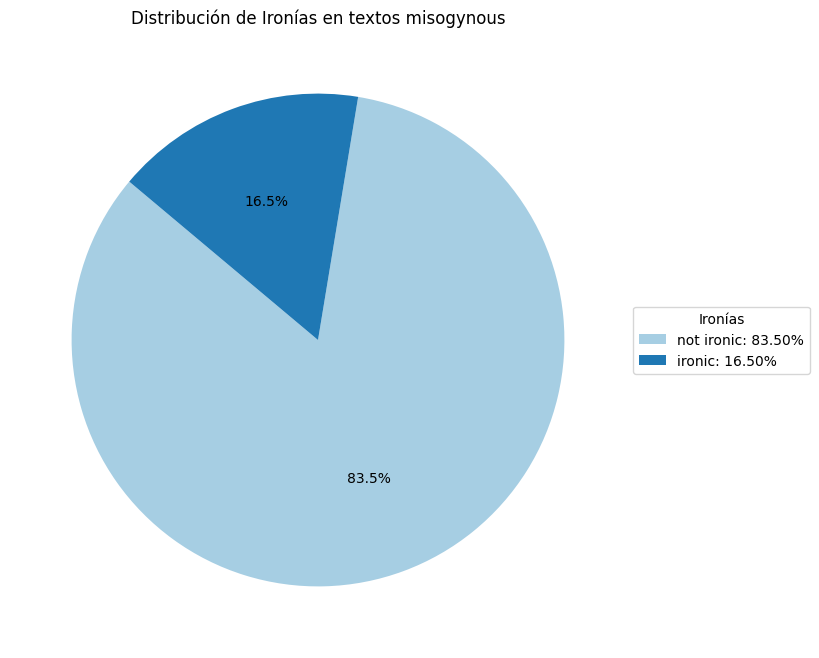

In [19]:
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(overall_irony_percentages_misogynous.values(), startangle=140, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
ax.set_title("Distribución de Ironías en textos misogynous")
legend_labels = [f"{irony}: {percentage:.2f}%" for irony, percentage in overall_irony_percentages_misogynous.items()]
ax.legend(wedges, legend_labels, title="Ironías", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [20]:
print("\nEjemplos de cada tipo de sentimiento en textos misogynous:")
for sent_type, example in examples_per_irony_misogynous.items():
    print(f"{sent_type}: {example}\n")


Ejemplos de cada tipo de sentimiento en textos misogynous:
not ironic: ['@twominbae cállate puta', '@Josumovic Puta Greta', '@monasterioR @julia_otero Eres patética', '@GretaThunberg Loca del coño', '@GretaThunberg cerda', '@outmarina Cállate puta de mierda', '@Valeryth_ Callate puta que te dejo en visto', '@LaFallaras Deja el alcohol cerda', '@AdaColau HIJA DE PUTA', '@Cannabianol Greta puta']

ironic: ['@drummniatico No se vaya asustar! Ese es el gremio de feminazis... el cuartel de las feas, que si le dices preciosas, se ofenden, xq piensa que te le burlas, pues ellas saben que no lo son! http://t.co/', '@LaFallaras @TeruelExiste_ Allí te puedes emborrachas loca alcohólica', '@GermanT00752596 @TmazRsc Ahora me salieron feminazis jajaja http://t.co/', '@LaFallaras @populares @CiudadanosCs Deja la botella loca del coño...', 'Serán muy feminazis pero bien que arbolitos, regalos para las crías, odian el consumismo pero la foto pal face con ropita nueva y toda la cosa ? http://t.co/', '


-----------------------------------------------

### Tweets no misogynous

-----------------------------------------------


In [21]:
text_not_misogynous = [text for text in df_misocorpus_train[df_misocorpus_train["label"] == 0]["tweet"].tolist()]
results_irony_analysis_not_misogynous = [analyze_irony(text) for text in tqdm(text_not_misogynous)]

  0%|          | 12/2797 [00:00<00:49, 56.65it/s]


-----------------------
Texto analizado: @jlalarcon84 uf eso conllevaría a fregar sarten y tapadera y no se yo si me merece la pena por 2 trozos de pizza ?
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.005643642041832209, 'ironic': 0.9943563342094421}

-----------------------
Texto analizado: Yo a mi jefe: yo vuelvo al restaurante pero no a fregar platos. Disney: toma, 7 meses pa fregar que se ve que no te hemos insistido suficiente con el contrato anterior que rechazaste.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.029028519988059998, 'ironic': 0.9709714651107788}

-----------------------
Texto analizado: @ElKillBulls @omarFermoselle @MariaMonte_16 A fregar todos
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9110881090164185, 'ironic': 0.08891183137893677}

-----------------------
Texto analizado: @Hammonyorkdista Estoy yendo a fregar para hacerle sitio al príncipe del infierno a las hordas del terror
Ironía detectado: ironic
Probabilidades: 

  1%|          | 24/2797 [00:00<00:48, 57.06it/s]


-----------------------
Texto analizado: Por dios quiero mil, seguro sale una casa la porqueria esta,, a fregar con Zorro nomas :c http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.010064398869872093, 'ironic': 0.989935576915741}

-----------------------
Texto analizado: @madeinmartinez1 Yo aviso. Les digo a mis chicos, no bajéis que voy a fregar. Pues uno de mis dos hijos tiene que bajar ?‍♀
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.011320268735289574, 'ironic': 0.9886797070503235}

-----------------------
Texto analizado: A fregar los platos muy fumada escuchando Hannah Montana best of both worlds
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0038398962933570147, 'ironic': 0.9961600303649902}

-----------------------
Texto analizado: @LuisFerCamachoV Evo Costas no le dejará ir a la Títere de Jeanine, co no se frego esa mujer. Camacho haber si no vuelve a fregar, con eso es su acabose en la política. Ojalá mañana salga humo blanco para

  1%|▏         | 37/2797 [00:00<00:46, 59.05it/s]


-----------------------
Texto analizado: Te das cuenta que estas vieja cuando te vas a fregar y terminas lavando la nevera
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.07359552383422852, 'ironic': 0.9264044165611267}

-----------------------
Texto analizado: @robertbourdain1 Jajajaja todos y hasta las ? cara de tortilla que no conectan sus dos neuronas vienen a fregar con sus tweets faltos de intento cuando deberían estar corriendo en la barranca, así solo estarían estupiditos y no ? y estupiditos.??‍♀️
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6896575689315796, 'ironic': 0.310342401266098}

-----------------------
Texto analizado: A alguien se le a pasado algunas vez por la mente colgarse de algun polin bueno a mi si pero como estoy todo gordo siento que voy a tumbar el techo ????? y a fregar el columpio
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.06983110308647156, 'ironic': 0.930168867111206}

-----------------------
Texto analizado: S

  2%|▏         | 52/2797 [00:00<00:40, 67.62it/s]


-----------------------
Texto analizado: estoy en la cocina buscando una playlist bien chingona para ponerme a fregar porque EN ESTA CASA NADIE SIRVE PARA UNA VERGA COÑOELAMADREMEQUIEROIR DESESTAMIERDA
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.026487400755286217, 'ironic': 0.973512589931488}

-----------------------
Texto analizado: “¿Cómo pueden dar espacio a una mocosa?” así se refirió Bolsonaro a Greta Thunberg http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993671774864197, 'ironic': 0.000632844225037843}

-----------------------
Texto analizado: @24h_tve @GretaThunberg ????? siii ha inventado una central electrica que funciona con aire. Que pensais la gente somos gilipollas o que ?
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.07696350663900375, 'ironic': 0.9230364561080933}

-----------------------
Texto analizado: “Es impresionante que la prensa le dé espacio a una mocosa como ella”: Bolsonaro sobre Greta Thun

  3%|▎         | 72/2797 [00:01<00:33, 82.57it/s]


-----------------------
Texto analizado: Las blancas palomas y después se quejan y les hacen algo, son empoderados o víctimas pero ambas? Greta pro tierra disparando metralleta, las mujeres se desnudas y quieren paridad para evitar la discriminación ?‍♀️ nuevo orden mundial me vuelves loca ! http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8879578709602356, 'ironic': 0.1120421290397644}

-----------------------
Texto analizado: greta errejón está de puta madre pero creo que yoda bebé ojos brendan fraser sigue ganando
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.03495468944311142, 'ironic': 0.9650452733039856}

-----------------------
Texto analizado: Hijo de puta y extremista. Igual me tiene bloqueado este tronco de lameculos #Castrista. Cómo se atreve criticar al Gobierno británico? Como diría Greta Thunberg: How dare you?? #RecuerdalaUMAP #CastroFusilóGays #CastroDesterróGays #CastroEncarcelóGays #CastroReprimióGays http://t.co/
Ironía detectad

  3%|▎         | 91/2797 [00:01<00:30, 88.74it/s]


-----------------------
Texto analizado: NOTAS 2019 pelearse por internet: empieza a saber a poco Greta Thunberg: meme Cataluña: fútbol con esteroides disney: nazis ultracapitalistas lo del clima: nazis con datos isis: quién se acuerda tener razón: el reservado de los gilipollas BREAKTHROUGH DEL AÑO: ser nazi en público
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.00036314045428298414, 'ironic': 0.9996368885040283}

-----------------------
Texto analizado: Jair Bolsonaro ‘no se corta’ y arremete contra «la mocosa» Greta Thunberg http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9986899495124817, 'ironic': 0.0013100610813125968}

-----------------------
Texto analizado: En un continente con una historia plagada de violaciones de derechos humanos, dictaduras, conflictos y violencia; expertos, especialistas y periodistas con largo camino en esas áreas, ofrecen consejos para coberturas de calidad sobre el tema. http://t.co/
Ironía detectado: not ironi

  4%|▍         | 110/2797 [00:01<00:29, 89.84it/s]


-----------------------
Texto analizado: El Gobierno Nacional conoció el caso Furukawa en 2018. Hasta hoy ha tolerado que la empresa opere en impunidad. Demandamos la violación a los #DDHH de miles de personas sometidas a #EsclavitudModerna y exigimos #JusticiaYReparación #FurukawaNuncaMas @mariapaularomo @CecyChaconC http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998646974563599, 'ironic': 0.0001352903200313449}

-----------------------
Texto analizado: Junto a las personas asesinadas, violadas y vejadas sexualmente por agentes del Estado, los ciudadanos mutilados en sus ojos, son la representación más feroz e imperecedera de las sistemáticas violaciones a los DDHH, a partir del 18 de octubre, en #Chile http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996997117996216, 'ironic': 0.0003003364836331457}

-----------------------
Texto analizado: Que el videoclip de Y Raffella es mía/E Raffaella è mia de Tiziano Ferro no esté disponi

  5%|▍         | 130/2797 [00:01<00:28, 93.65it/s]


-----------------------
Texto analizado: @COntalvilla @rouco64 38 años de prisión (José Bretón 40 años) considerando que ha sido agresión sexual, cuando ella continuamente defiende que ni intimidación, ni nada, voluntario,es abuso sexual(menor aunque consienta,abuso). Se critica la desproporción. Si eres extranjero: 10 años (manada Manresa)
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995182752609253, 'ironic': 0.0004817601584363729}

-----------------------
Texto analizado: Informe de Alta Comisión de la ONU: "Se han producido un elevado número de violaciones graves a los derechos humanos" http://t.co/ vía @latercera
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996645450592041, 'ironic': 0.0003355138760525733}

-----------------------
Texto analizado: @NBAMEX @KingJames @Lakers Por eso le permiten hacer violación......?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.992875337600708, 'ironic': 0.007124689873307943}

------------------

  5%|▌         | 150/2797 [00:01<00:27, 96.03it/s]


-----------------------
Texto analizado: @PatricioJDiaz @DelfinSC Para que aprendas que nos nos da urticaria de nada con Valencia . Y ojalá acepten que por lo único que se va a fregar los ojos el Esteban Paz es por haber contratado a Valencia
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.1869446188211441, 'ironic': 0.8130553960800171}

-----------------------
Texto analizado: @wbermudezni @MiurelBermudez Quedó super, ya no la va a fregar la sofie jijijiji
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0015627958346158266, 'ironic': 0.998437225818634}

-----------------------
Texto analizado: @mirifeidetriana @obrote1 Eso sí, a fregar tanto cacharro, los demás
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.25162845849990845, 'ironic': 0.7483716011047363}

-----------------------
Texto analizado: @yyyr4f4yyyy @FranciscaXavie2 @FernandoAmandi O globalista o es que lo tienen acorralado con negocios muy turbios. Bien poco le sirve salvarse por un par de añ

  6%|▌         | 170/2797 [00:02<00:27, 94.99it/s]


-----------------------
Texto analizado: me carga que los medios reculiaos se encarguen de proteger la identidad de los violadores pero la mejor parte es que muchxs se encargan de poner el nombre de esos conchatumadres por todas parte
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993550181388855, 'ironic': 0.000644973071757704}

-----------------------
Texto analizado: Un condenado por la violación múltiple de Manresa no acude a la vista de ingreso en prisión http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997274279594421, 'ironic': 0.0002725916274357587}

-----------------------
Texto analizado: ONU reitera que en Chile se han producido un elevado número de violaciones graves a los derechos humanos. El informe apunta directamente a la responsabilidad de Carabineros de Chile. http://t.co/ → BBC / LVT http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997780919075012, 'ironic': 0.00022196130885276943}

--------------

  7%|▋         | 190/2797 [00:02<00:27, 95.19it/s]


-----------------------
Texto analizado: No tengo nada en contra de nadie ni nada pero neta aveces me saca de onda que TODO lo vean como machismo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994521737098694, 'ironic': 0.0005478083621710539}

-----------------------
Texto analizado: Artivismo feminista http://t.co/ vía @levante_emv
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987038373947144, 'ironic': 0.0012962002074345946}

-----------------------
Texto analizado: Por favor, está Navidad no contribuyais a esto y levantad el culo. Que luego a los hombres se nos llena la boca de apoyar al feminismo y cosas tan simples como esta dejamos que ocurran. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9928370118141174, 'ironic': 0.007162930443882942}

-----------------------
Texto analizado: Miedo a perder el apoyo d las feminazis??? Dejen de MENTIR #NSB http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9

  8%|▊         | 210/2797 [00:02<00:27, 93.63it/s]


-----------------------
Texto analizado: Bolsonaro califica de &amp;laquo;mocosa&amp;raquo; a Greta Thunberg http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9886012673377991, 'ironic': 0.011398682370781898}

-----------------------
Texto analizado: El presidente brasileño se expresó luego de que Thunberg denunciara el asesinato de dos indígenas en el amazonas. Thunberg respondió a través de sus redes sociales http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996364116668701, 'ironic': 0.0003635713364928961}

-----------------------
Texto analizado: @aroa8barcelona Buenos días, ¡¡¡jajajaja!!! a... fregar.☕️??☕️ http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.003101461101323366, 'ironic': 0.9968985319137573}

-----------------------
Texto analizado: Jair Bolsonaro tildó de “mocosa” a Greta Thunberg y cuestionó a la prensa por darle tribuna - RPP http://t.co/
Ironía detectado: not ironic
Probabilidad

  8%|▊         | 230/2797 [00:02<00:26, 95.70it/s]


-----------------------
Texto analizado: Este es el feminismo que me gusta ? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9855931401252747, 'ironic': 0.014406866393983364}

-----------------------
Texto analizado: Estaba viendo tele con mi abuelita y pues el término "féminazi" ya llegó a "Cómo dice el dicho"... quiero desaparecer.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6517277956008911, 'ironic': 0.3482722043991089}

-----------------------
Texto analizado: @peliradfem @ProfesorQuantum Y también es una manifestación de esa manía de esperar a que el feminismo sea una suerte de mesías que arregle todos los problemas del mundo, que si no están las feministas de chile echando baldes de agua a los incendios en Australia, es que son feminazis o terfs o algo asi
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9882476925849915, 'ironic': 0.011752273887395859}

-----------------------
Texto analizado: Message to: 1. Ya no ponga

  9%|▉         | 250/2797 [00:02<00:26, 94.77it/s]


-----------------------
Texto analizado: Los hombres diciéndome q no es machista que esq es asiático y no entiende el español?????????????????
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9167166352272034, 'ironic': 0.08328332751989365}

-----------------------
Texto analizado: Jajajaja, es neta amiga? Castre tú novio que se la pasa molestando a mi prima, castre tú qué marchas por la igualdad, por eliminar el machismo, por nombrarte feminista y te burlas de alguien que te mando todo lo que tú novio habla de ti, hasta inventó que estabas embarazada y... http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9981451034545898, 'ironic': 0.0018549151718616486}

-----------------------
Texto analizado: Bravooo morenooo!!! Pues claro q si! http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.25857916474342346, 'ironic': 0.7414208054542542}

-----------------------
Texto analizado: @maritzaesterqm A mí quienes me dan lástima son las muje

 10%|▉         | 270/2797 [00:03<00:26, 95.13it/s]


-----------------------
Texto analizado: @madrid_malonso @raquelmad16_97 @dynodrilo @RadClaudia Para acabar con este hilo vengo a recordarte que tal vez en libros que están en contra del feminismo encontrarás tus mismos argumentos, la diferencia es que tú eres con las mujeres trans. Si tu discurso comparte pensamientos con uno fascista, el problema no es nuestro
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987645149230957, 'ironic': 0.0012355014914646745}

-----------------------
Texto analizado: @borizSEV @vcavia1 @pnique ¿Eres socialista y en serio prefieres a VOX que a ERC? ¿Se supone que eres de izquierdas o de centro izquierda? ¿Prefieres a un partido de ultraderecha machista, racista, que recortaría en derechos sociales para invertir en religión, toros y caza?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996805191040039, 'ironic': 0.0003195440222043544}

-----------------------
Texto analizado: Don Lengua | La información veraz sin censura : B

 10%|█         | 290/2797 [00:03<00:26, 95.40it/s]


-----------------------
Texto analizado: #CosasDelPatriarcado (lectura recomendada) La Sociedad que no ve el delito de violación http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9986536502838135, 'ironic': 0.0013462962815538049}

-----------------------
Texto analizado: "Múltiples y agravadas son las situaciones que investigamos que constituyen amenazas y violaciones a los derechos humanos, no sólo de la población propiamente detenida, sino de sus familiares" http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997393488883972, 'ironic': 0.0002605933404993266}

-----------------------
Texto analizado: Qué pedo la gente que hizo stickers de el violador eres tú
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9957643747329712, 'ironic': 0.0042356643825769424}

-----------------------
Texto analizado: Muchos medios no están hablando de”agresores”hablan de”los futbolistas”. Me parece muy peligroso socialmente idola

 11%|█         | 300/2797 [00:03<00:27, 90.42it/s]


-----------------------
Texto analizado: @elkrema @BillGates @GretaThunberg @georgesoros tampoco podía ser peruano xq leería las instrucciones y no comprendería ni mierda (PISA). Tampoco argentino xq los peronistas no lo permitirán. Boliviano menos....muy indio. Brasileño tampoco, ocupado probando sus nuevas armas. Veneco ni hablar. Ecuatoriano menos....muy negro.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.019860368221998215, 'ironic': 0.9801396131515503}

-----------------------
Texto analizado: @24h_tve @GretaThunberg Cagon la puta. Mira, pues ya no hago más papers. A tomal pol culo la cencia.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9456431865692139, 'ironic': 0.05435675010085106}

-----------------------
Texto analizado: @maiterico El inefable Inda la "tira por la borda" http://t.co/ No tenía ni puta idea de nada a los 16, a los 50 el progreso es mínimo http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9348260164260864, 

 11%|█▏        | 320/2797 [00:03<00:26, 92.32it/s]


-----------------------
Texto analizado: Lo mejor y lo peor de la humanidad Bolsonaro respondió los dichos de Greta Thunberg sobre las muertes de indígenas: “es una mocosa” http://t.co/ vía @ladiaria
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992756247520447, 'ironic': 0.0007243316504172981}

-----------------------
Texto analizado: Greta Thunberg entre las 10 personas más importantes de la ciencia del 2019. Estamos gilipollas? Que sí, que es una niña que mira muy mal a los políticos y dice que nos vamos a cargar el planeta, nada nuevo. Y la comparamos con físicos y médicos? Dejad la droga porfa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7442605495452881, 'ironic': 0.2557394206523895}

-----------------------
Texto analizado: @elmundoes Sois unos violadores grupales,no tenéis perdón ni justificación posible. Animales...puercos HDP.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997034668922424, 'ironic': 0.00029654233367182314}

-

 12%|█▏        | 340/2797 [00:03<00:26, 94.22it/s]


-----------------------
Texto analizado: Dos condenados de 'La Manada' de Manresa se saltan la vista de ingreso en prisión http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997010231018066, 'ironic': 0.00029901109519414604}

-----------------------
Texto analizado: @pepequilla @erioerioerio @esRadio_CyL @Carmen06755533 Yo estaba frente al Ministerio de Justicia en apoyo a la víctima de la violación de Manresa. ¿Dónde estabas tú? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9981484413146973, 'ironic': 0.0018515869742259383}

-----------------------
Texto analizado: O SEA QUE LA BELLA DURMIENTE FUE VIOLADA POR EL PRÍNCIPE CUANDO CAYÓ DORMIDA, TUVO DOS HIJOS Y SE DESPERTÓ CUANDO ESCUCHÓ EL LLANTO DE UNO DE ELLOS, POR DIOS QUE MIERDA ME HACÍAN VER CUANDO ERA PEQUEÑA AUXILIO
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.4776636064052582, 'ironic': 0.5223364233970642}

-----------------------
Texto analizado: fui con mi cuñ

 13%|█▎        | 360/2797 [00:04<00:25, 95.35it/s]


-----------------------
Texto analizado: @InesArrimadas QUE HIJO DE LA GRAN PUTA! PERO NO PODRANNNNNNNNNNNNNNNNNNNNNNNNNNN!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991294741630554, 'ironic': 0.0008705743821337819}

-----------------------
Texto analizado: @Irene_Montero_ La propia Isabel Serra dirigiéndose a una agente de la Policía Municipal le gritó "eres una cocainómana", "mala madre, hija de puta, con todo los que hemos luchado las mujeres contigo se pierde todo, no te quieren ni tus propios compañeros".
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997077584266663, 'ironic': 0.0002922071435023099}

-----------------------
Texto analizado: @InesArrimadas @elmundoes que cabecita más loca tienes
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.47340649366378784, 'ironic': 0.5265935063362122}

-----------------------
Texto analizado: @InesArrimadas Ese es un hijo de puta y el periodista que lo anima un cabrón
Ironía detectado: not iron

 13%|█▎        | 370/2797 [00:04<00:29, 82.03it/s]


-----------------------
Texto analizado: Nuevo vídeo en el canal La Guarida del Zorro, por @rfgisbert SENTENCIA CASO ARANDINA (Análisis y Reflexión) #RevillaEH #SonPerroflautismosSanos http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9555968046188354, 'ironic': 0.04440322145819664}

-----------------------
Texto analizado: @toros_gyn @RubenSanchezTW Disculpa, el que llama orgía a lo que sea condenado con 38 años de cárcel por violación eres tú. Yo no soy manager de nadie y Rubén no ha dicho nada de cobrar por certificar tweet. A buen entendedor pocas palabras bastan. Y si por favor, cierra porque hace corriente
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997298121452332, 'ironic': 0.00027022167341783643}

-----------------------
Texto analizado: 38 anos nas costas e mais criança que meu irmão kkkkk chacota
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.40806645154953003, 'ironic': 0.59193354845047}

-----------------------
Texto 

 14%|█▎        | 379/2797 [00:04<00:37, 64.08it/s]


-----------------------
Texto analizado: @monasterioR Tú no tienes ni puta idea de para qué va la gente al cine, hulio
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9931315779685974, 'ironic': 0.006868423894047737}

-----------------------
Texto analizado: @LaFallaras Ne cago en la puta, los tíos, y alguna mujer también, somos imbeciles? Por qué he de sentir vergüenza de que me cuelgue un trocito? Estamos enfermos cuando no podemos respetar a la mitad del planeta. ???
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9963861703872681, 'ironic': 0.0036138819996267557}

-----------------------
Texto analizado: @AdaColau YO NO OS BASTA CON TENER A UN PISTOLERO MUNICIPAL QUE SE DEDICA A ASESINAR PERROS A TIROS EN LA CALLE COMO EL ASESINO DE SOTA AHORA LA EMPRENDEIS CON GATOS DE LA CALLE , SOIS PUTA GENTUZA Y ESPERO QUE REVENTEIS DE MIERDA ASQUEROSOS http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996342658996582, 'ironic': 0.00036573

 14%|█▍        | 394/2797 [00:04<00:41, 57.65it/s]


-----------------------
Texto analizado: @Barreto06_ @marcxlxh @erickcbfarias @lfernandescrf @clifradin @CornetaSantosFC @DoentesPFutebol Depois de 38 anos? Kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk o dinheiro q gastou não era mais que obrigação
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.09513238817453384, 'ironic': 0.9048676490783691}

-----------------------
Texto analizado: - Anthony Stark-Potts. - 38 anos. - Sua família vem acima de qualquer coisa. - A Wanda é a única que ainda aguenta ver High School Musical com ele, mas só porque ela também adora. - "Cuidado que eu posso processar você". || Foto || Conta normal || Wallpaper || http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.06981504708528519, 'ironic': 0.9301849603652954}

-----------------------
Texto analizado: Eu: UFA, vou finalmente dormir Cérebro: Sábado tem a final do mundial, Flamengo e Liverpool dps de 38 anos Eu: Não pfv, agora n Cérebro: "Em dezembro de 81..."
Ironía detectado: ironi

 15%|█▍        | 408/2797 [00:05<00:40, 59.47it/s]


-----------------------
Texto analizado: @InesArrimadas @CiudadanaMartaR Es curioso que cuenta que lleva lazo amarillo ,cuenta que habla sin tener ni puta idea ....
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0350729301571846, 'ironic': 0.964927077293396}

-----------------------
Texto analizado: ‼️ Unidas Podemos lleva a la Fiscalía la difusión en Twitter de los audios de la víctima del 'caso Arandina' http://t.co/ Lo cuenta @ikaitor http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997937083244324, 'ironic': 0.00020632034284062684}

-----------------------
Texto analizado: #UnidasPodemos pide a la Fiscalía que investigue a quienes difundieron por Twitter los audios de la víctima del Arandina http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996635913848877, 'ironic': 0.00033639013417996466}

-----------------------
Texto analizado: "Cosas raras he visto muchas en 38 años vendiendo lotería, pero algo como 

 15%|█▌        | 422/2797 [00:05<00:40, 58.19it/s]


-----------------------
Texto analizado: @monasterioR @julia_otero La ganadería y agricultura son algunas de las actividades que más contaminan (sobre todo la primera) y vienes aquí a decir la mierda que dices. No tienes ni puta idea. Ve a ponerle unas velitas a Franco y a levantar la manita, que es para lo que servís.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9963849782943726, 'ironic': 0.00361502543091774}

-----------------------
Texto analizado: @monasterioR @julia_otero Tú sí q no tienes ni puta idea de lo q es el campo. Ven y te explico yo como es, con clases prácticas...ya verás q pronto se te quita esa sonrisa de la cara...
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.3940765857696533, 'ironic': 0.6059234142303467}

-----------------------
Texto analizado: @InesArrimadas @EFEnoticias Venga ya Ines, fundios con UPyD de una puta vez, y te escucharemos desde el grupo mixto ???
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.4224315583705

 16%|█▌        | 434/2797 [00:05<00:42, 56.19it/s]


-----------------------
Texto analizado: Solicitamos de su colaboración para localizar a JUAN MANUEL JAIMES MENESES de 38 años de edad. #Morelos http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9961638450622559, 'ironic': 0.0038361921906471252}

-----------------------
Texto analizado: ojala Mabel dejara de llamarme "infante" solo porque ella tiene 38 años
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7315783500671387, 'ironic': 0.26842164993286133}

-----------------------
Texto analizado: En enero serán 38 años que me encontraste, curaste, cambiaste mi lamento en baile, me vestiste de alegría, me amaste, me diste identidad y soy para siempre Dios...tuya. Cada día ¡Gracias!?? http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.05222292244434357, 'ironic': 0.9477770924568176}

-----------------------
Texto analizado: Lo que más me quedó de lo q vi de la nota es q este Luksic tiene 32 años. Ya no quiero cargos de alta respons

 16%|█▌        | 446/2797 [00:05<00:42, 54.72it/s]


-----------------------
Texto analizado: @abc_es Una golfilla se lia con tres golfos, a ella la indemnizan y a ellos les caen 38 años. Podria ser un delito de abuso sexual, ya que ella es menor de 16 años, pero no de agresion sexual habiendo tantas evidencias de que la chica estaba de acuerdo.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.998933732509613, 'ironic': 0.0010662985732778907}

-----------------------
Texto analizado: @FonsiLoaiza A mi no me apalizan. La menor fue a por lana y salio trasquilada. 38 años para el mosso..
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9968916773796082, 'ironic': 0.003108383622020483}

-----------------------
Texto analizado: ?A propósito de la condena por agresión sexual a los jugadores de la Arandina. Los juicios paralelos y la indecencia de humillar a una menor http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997064471244812, 'ironic': 0.0002935368102043867}

-----------------------
T

 16%|█▋        | 459/2797 [00:05<00:40, 57.72it/s]


-----------------------
Texto analizado: @juanrga @felixregueiro1 @ManuelVilas2 @GirautaOficial La mayoría de periódicos que he leído ponen violación , uno de ellos http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.995283305644989, 'ironic': 0.004716707859188318}

-----------------------
Texto analizado: @LaFallaras Estás muy loca ??
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5175355076789856, 'ironic': 0.4824645221233368}

-----------------------
Texto analizado: 38 anos depois, estamos na final do mundial contra o mesmo adversário. Que Deus esteja ao nosso lado!!!! Voltaremos voltaremos, a ser o número 1... ?⭐️⚫️
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.3830668032169342, 'ironic': 0.6169331669807434}

-----------------------
Texto analizado: Engraçado os antis dizendo que estamos empolgados. Não me venha com hipocrisia. Esperamos 38 anos por isso. Não sabemos o que rolará no sábado, então o momento é pra ser desfrutado. Se

 17%|█▋        | 471/2797 [00:06<00:40, 58.09it/s]


-----------------------
Texto analizado: So, seré doctora en literatura de crimen feminazi. Mi tesis la escribiré por fuera de la estructura heteropatriarca, o sea, para que TODES lo entiendan, y mis directoras son brujas de alto rendimiento. Colombia será mi target. Gracias bitches! #feminismo
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.014243179000914097, 'ironic': 0.9857568144798279}

-----------------------
Texto analizado: @Paterbubo @Cazafalacias1 @roslightnovels @NextIGuess Precisamente. Lo irónico de todo esto es eso, q los más fachas son los q más braman con la sentencia de La Arandina. Con la legislación q proponía la izquierda no habría habido caso ??? Ahora a acatar vuestra propia ley. A mí me parece VOMITIVO, pero es mi opinión personal ?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987601041793823, 'ironic': 0.0012398655526340008}

-----------------------
Texto analizado: ?ÚLTIMA HORA?Los condenados del caso Arandina, en libertad en espera

 17%|█▋        | 483/2797 [00:06<00:41, 55.99it/s]


-----------------------
Texto analizado: Jajajaja con 38 años de cárcel los dejan libres. Poco debe confiar el Tribunal que se vaya a ratificar la pena en instancias superiores. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7374594807624817, 'ironic': 0.2625405490398407}

-----------------------
Texto analizado: ? Se mantiene la libertad provisional para los exjugadores de La Arandina condenados por abuso y agresión sobre una menor ? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991787075996399, 'ironic': 0.0008212880929931998}

-----------------------
Texto analizado: Se “vengó” contando una historia falsa y que se le ha ido de las manos. No estoy a favor ni mucho menos de una agresión sexual/violación, pero creo que es injusta esa condena de 38 años a 3 chicos para los que no hay pruebas de dicho acto. HE DICHO. #CasoArandina
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999854564666748, 'ironic': 0.000145434

 18%|█▊        | 495/2797 [00:06<00:41, 55.68it/s]


-----------------------
Texto analizado: @NeurologaenSAS El tema es muy complejo, si no se está en el acto del plenario, desde la lectura de la sentencia es complicado juzgar “ la apreciación conjunta de la prueba”.De todos modos 38 años para esa conducta es excesiva. Y dejando al margen la imagen que retrata de los tiempos modernos.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997296929359436, 'ironic': 0.00027034382219426334}

-----------------------
Texto analizado: La Asamblea Feminista de Aranda pide colaboración y difusión para contrarrestar el apoyo a los violadores d un sector del pueblo. ♀️♀️♀️! La cita tendrá lugar en la Plaza del Trigo de la localidad burgalesa, este sábado día 21 a las 19:00 horas http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997416138648987, 'ironic': 0.0002584195462986827}

-----------------------
Texto analizado: @susanadiaz 38 años de pobreza, miseria, enchufismo y choriceo..... Pena de mi Andalucía
Ironí

 18%|█▊        | 507/2797 [00:06<00:40, 56.33it/s]


-----------------------
Texto analizado: @LukasAlonso @Gremio Eu não te conheço, mas seja verdadeiro, apague 2019 e os carioquinha você comemorou o que? Kkkkkkk Vcs nunca ganharam nada . 38 anos é a minha idade
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.4969296455383301, 'ironic': 0.5030703544616699}

-----------------------
Texto analizado: La familia de Víctor Rodriguez Ramos, uno de los condenados por el Caso Arandina, ha hecho pública una carta el día antes del posible ingreso en prisión del joven http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993495345115662, 'ironic': 0.0006504507036879659}

-----------------------
Texto analizado: Aos 38 anos de idade, goleiro morre em Alagoas após internação por infarto http://t.co/ via @YouTube
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.967424213886261, 'ironic': 0.03257578983902931}

-----------------------
Texto analizado: Ultraderecha reaccionaria filofascista que defendía a lo

 18%|█▊        | 513/2797 [00:06<00:41, 54.52it/s]


-----------------------
Texto analizado: ? ¡Hermana, yo sí te creo! Convocan concentración el próximo sábado dedicada a la víctima del Arandina http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9981556534767151, 'ironic': 0.001844329060986638}

-----------------------
Texto analizado: Estos pederastas no sólo difunden audios sobre la menor violada, además se mofan de la víctima y de quienes lo denunciamos #arandina http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997642636299133, 'ironic': 0.00023570505436509848}

-----------------------
Texto analizado: "Cabezas de turco". Los condenados por agresión sexual en el caso del Arandina siguen negando los hechos. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9974868297576904, 'ironic': 0.0025131122674793005}

-----------------------
Texto analizado: La Asamblea Feminista de Aranda convoca una concentración de apoyo a la víctima del 'caso Arandina' http://t.co/

 19%|█▉        | 525/2797 [00:07<00:45, 50.47it/s]


-----------------------
Texto analizado: Yo diria que los que consintieron fueron los tres de la arandina. http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.002057525562122464, 'ironic': 0.9979425072669983}

-----------------------
Texto analizado: Yo no. Ya tenía plan. Pero qué se pide exactamente? #l@H0rc@ para los jugadores? 38 años no son suficientes? A Lanza por @ses1nat0 le cayeron 5. Por qué? La #víctima era hombre? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9823274612426758, 'ironic': 0.0176725871860981}

-----------------------
Texto analizado: @artskenma se você tem 19 anos você não pode casar com um homem de 38 anos pois ele é muito velho pra você mesmo esse homem sendo o tom hiddleston
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.23230277001857758, 'ironic': 0.767697274684906}

-----------------------
Texto analizado: @AntonnyXD5 @AlfaroAndate @Libertadores @FIFAcom @Alhilal_EN @Flamengo @RiverPlate @RiverLP

 19%|█▉        | 542/2797 [00:07<00:34, 66.07it/s]


-----------------------
Texto analizado: Depois de 38 anos, tem o Melhor do mundo de volta ao Mundial... VAI PRA CIMA DELES MENGOOOOO ❤?❤?❤?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5274407863616943, 'ironic': 0.4725591838359833}

-----------------------
Texto analizado: 38 años que en la cancha no se notan por el esfuerzo, huevo y corazón que dejas cada domingo en la cancha. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9952999353408813, 'ironic': 0.00470008747652173}

-----------------------
Texto analizado: Con Blasco Ibañez, decir que en España se aborrece siempre el sexo, cuando son otros los que lo practican. La condena a los jugadores de la #Arandina devuelve a España a sus épocas más oscuras, luego os quejais si desde Flandes os recordamos la Leyenda Negra que forjais.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995096921920776, 'ironic': 0.0004902826622128487}

-----------------------
Texto analizado: Susana

 20%|██        | 562/2797 [00:07<00:28, 77.80it/s]


-----------------------
Texto analizado: Que sí...q.yo también tengo mi opinión sobre la sentencia de los jugadores de la #Arandina.... Y sí, efectivamente me la guardo. Principalmente porque creo q no tengo conocimiento suficiente. Y por q esto de no opinar me está gustando.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8340133428573608, 'ironic': 0.16598664224147797}

-----------------------
Texto analizado: En cuanto a lo de la Arandina: la pena es un poco desmedida pero acostarse con una menor es siempre violación, y más teniendo un estatus como futbolista y algo de dinero
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996249675750732, 'ironic': 0.0003750694449990988}

-----------------------
Texto analizado: Ala Cristina, empieza a buscar abogado, notas la angustia? A lo mejor ahora empatizas un poquito. http://t.co/ http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.00061886350158602, 'ironic': 0.9993810653686523}

------------

 21%|██        | 581/2797 [00:07<00:26, 85.07it/s]


-----------------------
Texto analizado: Caso #Arandina: Un pueblo partido por la banda http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9961502552032471, 'ironic': 0.0038497457280755043}

-----------------------
Texto analizado: Caso Arandina: por qué te pueden caer años de cárcel por difundir los audios de la víctima http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995119571685791, 'ironic': 0.00048803340177983046}

-----------------------
Texto analizado: La Audiencia Provincial de Burgos dicta hoy sentencia sobre el caso Arandina http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996378421783447, 'ironic': 0.000362172577297315}

-----------------------
Texto analizado: ?#ÚLTIMAHORA Los exjugadores del caso Arandina, culpables de agresión sexual a una menor http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995354413986206, 'ironic': 0.00046453793765977025}

---------

 21%|██▏       | 601/2797 [00:08<00:24, 89.79it/s]


-----------------------
Texto analizado: ?Video de @IsaacParejo sobre el caso: http://t.co/ ?Video de @aitor13023985 sobre el caso: http://t.co/ ?Hilo sobre el caso: http://t.co/ ?Firmas contra la sentencia: http://t.co/ #Aranda
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8122905492782593, 'ironic': 0.1877095103263855}

-----------------------
Texto analizado: @Kike94M @SanchoSomalo @jonathanmartinz Discutir por ejemplo la sentencia de la Arandina te parece odio? Por poner un ejemplo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989410042762756, 'ironic': 0.001059043686836958}

-----------------------
Texto analizado: @Joel9182 @MaxJovenGay "Los acusados han sido condenados a 14 años por agresión a menor + 2 delitos x cooperación en agresión 14 + 12 + 12 = 38 años". Es nuestro ordenamiento jurídico, si no te gusta, vuelve a 1211 o a Mingorrubio.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9824632406234741, 'ironic': 0.01753674633800

 22%|██▏       | 621/2797 [00:08<00:24, 90.35it/s]


-----------------------
Texto analizado: @XaviPalauCe @radioactivovel @Virabhadra_1 Un calentón 38 años y el que mató al de los tirantes en 2 años a seguir mstando
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.998573899269104, 'ironic': 0.0014260527677834034}

-----------------------
Texto analizado: A la espera de la vistilla sobre el ingreso en prisión de los exjugadores de la Arandina http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999213695526123, 'ironic': 0.0007863265927881002}

-----------------------
Texto analizado: Cumple 38 años Krysten Ritter. Más allá de #JessicaJones queremos reivindicar #Apartamento23, que nos representa más http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9193030595779419, 'ironic': 0.08069701492786407}

-----------------------
Texto analizado: Goleiro Dias morre aos 38 anos após passar mal em jogo de society - http://t.co/ http://t.co/
Ironía detectado: not ironic
Probab

 23%|██▎       | 641/2797 [00:08<00:23, 90.96it/s]


-----------------------
Texto analizado: Hablan los tres ex jugadores de La Arandina condenados: «Es una vergüenza, la denuncia es falsa» http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.99968421459198, 'ironic': 0.0003158058098051697}

-----------------------
Texto analizado: Uno de los exjugadores de la Arandina: "¿38 años de qué? ¿A quién he matado?" http://t.co/ Informa @lauracorama http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9267308115959167, 'ironic': 0.07326916605234146}

-----------------------
Texto analizado: La sentencia contra los jugadores de La Arandina muestra lo que pudo haber sido la condena contra #LaManada, por @SabelaRulinha http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9961345195770264, 'ironic': 0.0038655316457152367}

-----------------------
Texto analizado: La «disparidad de versiones» de la víctima por «aparentar experiencia sexual» http://t.co/
Ironía detectado:

 24%|██▎       | 661/2797 [00:08<00:23, 89.12it/s]


-----------------------
Texto analizado: ?️ Una cuarta mujer denuncia que el descuartizador de Marta Calvo la intoxicó. La desaparición de Wafa, la joven de Pobla Llarga, podría no haber sido un accidente. Además, las reacciones a la sentencia del caso Arandina. @elprogramadear en 'A la carta' http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993705153465271, 'ironic': 0.0006295528146438301}

-----------------------
Texto analizado: As 500 peroas, se é que son 500, que se manifestan en favor dos violadores da Arandina, merecen todo o desprezo como cómprices dunha violación en grupo a unha menor. En que carallo de mundo viven?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9834844470024109, 'ironic': 0.0165155790746212}

-----------------------
Texto analizado: @AlxandraGil Listado de todos los periódicos que hicieron el copia-pega: @elperiodico: http://t.co/ @lavozdegalicia: http://t.co/ @20m: http://t.co/ @LaVanguardia: http://t.c

 24%|██▍       | 681/2797 [00:08<00:23, 90.40it/s]


-----------------------
Texto analizado: @OscarZamarreno @ElGlitchArt @PhilAMellows Y que pruebas hay en el caso del Arandina a parte de la declaración de la chica y de los chicos?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9952599406242371, 'ironic': 0.004740031901746988}

-----------------------
Texto analizado: @Barbijaputa Si lo ha dicho al final, que yo tengo una perra de 8 meses y estaba muy preocupada por el tema, y lo he escuchado
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9910823106765747, 'ironic': 0.008917639963328838}

-----------------------
Texto analizado: @ibarweb @MAbolicion @TFeminista_ Cultura puede ser, jueces u policía lo pongo más en duda. A la sentencia de la Arandina me remito
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999136745929718, 'ironic': 0.0008633190882392228}

-----------------------
Texto analizado: @eraseuncactus @mbasmiles Pedíais? Tú sabes lo que YO he pedido en cada caso? Vaya, no estarás ac

 25%|██▌       | 701/2797 [00:09<00:22, 92.09it/s]


-----------------------
Texto analizado: @SorianoEdu @tonyfollonero @monontse1970 @elisabeni Los presuntos agresores de Manresa amenazaron con la pistola a todo el mundo para "que no se fueran de la lengua". En el caso Arandina no recuerdo muy bien quien realizaba estas mismas amenazas...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9931080341339111, 'ironic': 0.00689194118604064}

-----------------------
Texto analizado: Los vecinos de Aranda de Duero se movilizan en defensa de los exjugadores de la Arandina condenados por violación http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996280670166016, 'ironic': 0.00037196389166638255}

-----------------------
Texto analizado: Convocan una manifestación de apoyo a los exfutbolistas condenados en el caso Arandina http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997904896736145, 'ironic': 0.0002095773525070399}

-----------------------
Texto analizado: VÍDEO @EspejoPubli

 26%|██▌       | 721/2797 [00:09<00:22, 91.96it/s]


-----------------------
Texto analizado: Jair Bolsonaro (@jairbolsonaro) llamó "mocosa" a Greta Thunberg (@GretaThunberg) http://t.co/ #11Dic http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9975312352180481, 'ironic': 0.0024687943514436483}

-----------------------
Texto analizado: "Los insultos a @GretaThunberg los hacen en su mayoría #hombres y muchos son machistas: "histérica", "puta", "niñata". Currazo de @jordipc, @borjandrinot y @ruben_casa en @el_pais analizando 400.000 tuits". http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994596838951111, 'ironic': 0.0005403297836892307}

-----------------------
Texto analizado: Histérica, marioneta y niñata: los insultos que los hombres españoles dedican a Greta Thunberg. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997947812080383, 'ironic': 0.0002051844639936462}

-----------------------
Texto analizado: @24h_tve @GretaThunberg Pues permíteme decir que l

 26%|██▋       | 741/2797 [00:09<00:21, 93.47it/s]


-----------------------
Texto analizado: Most #viral News Now: Histérica, marioneta y niñata: los insultos que los hombres españoles dedican a Greta .. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990596175193787, 'ironic': 0.0009404478478245437}

-----------------------
Texto analizado: #Internacionales | Bolsonaro llama "mocosa" a Greta Thunberg &gt; http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994660019874573, 'ironic': 0.0005340505740605295}

-----------------------
Texto analizado: Bolsonaro llama 'mocosa' a Greta Thunberg http://t.co/ vía @Excelsior
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996610879898071, 'ironic': 0.0003388869808986783}

-----------------------
Texto analizado: Este chico tenía novia (se supone) y keria quedar conmigo xk le parecía una "tía interesante" y le envié a la puta mierda, el otro día me dijo que lo había dejado y le dije ah ok y ahora me responde a una mi

 27%|██▋       | 751/2797 [00:09<00:22, 89.92it/s]


-----------------------
Texto analizado: “Es impresionante que la prensa le dé espacio a una mocosa como ella, una mocosa” dijo @jairbolsonaro sobre @GretaThunberg. http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995656609535217, 'ironic': 0.00043428546632640064}

-----------------------
Texto analizado: nosotras: hola somos fleteras mutual: ?????? nosotras: fleteras llora pija gc de greta mutual: ... nosotras: queremos chuparle la pija a un kiszka mutual: ahhh filho da puta agora sim entendo
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.007713725790381432, 'ironic': 0.9922863245010376}

-----------------------
Texto analizado: ¡Jair Bolsonaro llama "mocosa" a Greta Thunberg! Toda la información en #ImagenNoticas con @YuririaSierra http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999534010887146, 'ironic': 0.0004660660051740706}

-----------------------
Texto analizado: @katymarin_ @Malala @GretaThunberg Q 

 28%|██▊       | 771/2797 [00:09<00:22, 91.50it/s]


-----------------------
Texto analizado: ⚡ Presidente de Brasil llama “mocosa” a Greta Thunberg http://t.co/ #América http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9958964586257935, 'ironic': 0.004103546030819416}

-----------------------
Texto analizado: El País últimas: Histérica, marioneta y niñata: los insultos que los hombres españoles dedican a Greta Thunberg http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996547698974609, 'ironic': 0.0003451787924859673}

-----------------------
Texto analizado: El presidente de Brasil, Jair Bolsonaro, llamó "mocosa" a la activista sueca Greta Thunberg, de 16 años, después que la joven denunciase la violencia contra los pueblos indígenas en la Amazonía. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996507167816162, 'ironic': 0.00034933583810925484}

-----------------------
Texto analizado: Cada vez que alguna persona adulta dice que Greta debería

 28%|██▊       | 791/2797 [00:10<00:21, 93.07it/s]


-----------------------
Texto analizado: Pregunta en serio, cuando alguien le explique a Greta Thunberg que su propia respiración genera CO2: ¿Le explotará el cerebro y se quedará en coma autista de por vida? ¿Se quemará a lo bonzo, y decenas de miles de gilipollas en todo el mundo seguirán su ejemplo?!! http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.00596170499920845, 'ironic': 0.9940383434295654}

-----------------------
Texto analizado: No haceis ni puta gracia haciendo chistes de que si la Greta Thunberg se mete cosas colega que es una puta cría
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9982153177261353, 'ironic': 0.0017847133567556739}

-----------------------
Texto analizado: Bolsonaro llama "mocosa" a #GretaThunberg por denunciar la muerte de indígenas en la lucha contra la deforestación de la Amazonia. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994161128997803, 'ironic': 0.0005839081713929772}

------

 29%|██▉       | 811/2797 [00:10<00:21, 92.78it/s]


-----------------------
Texto analizado: @Josep75031556 @CarlotaSegui @PabloIglesias Claro, Greta también canta de puta madre. http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.015289777889847755, 'ironic': 0.9847102761268616}

-----------------------
Texto analizado: MUJERCITAS (2019) Por fin la he visto y puedo gritarlo: que Greta Gerwig no esté nominada a mejor directora es una puta barbaridad, pero aún más injusto es que no haya nominación para tremenda fotografía. Y Saoirse Roman está maravillosa. No veo el Oscar de Scarlett tan claro... http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.954469621181488, 'ironic': 0.045530419796705246}

-----------------------
Texto analizado: Mujercitas es una soberana película. Que Greta Gerwig no esté entre las nominadas a mejor directora es una puta vergüenza. A sus pies señora Gerwig.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9968823194503784, 'ironic': 0.0031176761258393526}



 30%|██▉       | 831/2797 [00:10<00:21, 93.19it/s]


-----------------------
Texto analizado: A las 18h comenzará en Madrid la #MarchaPorElClima a la que ha confirmado su asistencia Greta Thunberg. En plena #COP25, la manifestación llega para dar el empujón definitivo al movimiento de la activista sueca en España Explica @belenremacha los detalles http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996500015258789, 'ironic': 0.00035003526136279106}

-----------------------
Texto analizado: ?#DIRECTO Tras hablar de las «muchas movilizaciones y pocas acciones» concluyen que «desde cierto punto de vista, no se ha logrado nada» y que «sin justicia social no habrá justicia climática» #MarchaPorElClima http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997195601463318, 'ironic': 0.00028038735035806894}

-----------------------
Texto analizado: ? DIRECTO | Greta Thunberg: "Los políticos intentan silenciarnos de forma desesperada, pero vamos a seguir avanzando" http://t.

 30%|███       | 851/2797 [00:10<00:21, 90.87it/s]


-----------------------
Texto analizado: Clarín | Jair Bolsonaro reacciona contra Greta Thunberg y la llama "mocosa" http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994799494743347, 'ironic': 0.0005200684536248446}

-----------------------
Texto analizado: Presidente de #Brasil llama 'mocosa' a #GretaThunberg. ▶️ http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9971610307693481, 'ironic': 0.0028389475774019957}

-----------------------
Texto analizado: Bolsonaro llama “mocosa” a Greta Thunberg http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999103844165802, 'ironic': 0.0008961371495388448}

-----------------------
Texto analizado: @nachetemache @Palmeritachip Por lo menos eres un gilipollas q contamina menos ??
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.22037401795387268, 'ironic': 0.7796260118484497}

-----------------------
Texto analizado: Que Emi y

 31%|███       | 861/2797 [00:10<00:25, 76.88it/s]


-----------------------
Texto analizado: @LaNaomi65458952 Ni puta idea tienes
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9871990084648132, 'ironic': 0.012801024131476879}

-----------------------
Texto analizado: @follow_2710 Eso es de puta madre, colega
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.05359257757663727, 'ironic': 0.9464074373245239}

-----------------------
Texto analizado: me gustan todas las canciones nuevas de los 1975 menos la PUTA INTRO DEL DISCO CON GRETA THUNBERG
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.4784053862094879, 'ironic': 0.5215946435928345}

-----------------------
Texto analizado: Greta la puta madre por qué no lo mandaste al frente al otro imbécil? #BabylonBerlin
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9845845103263855, 'ironic': 0.015415460802614689}

-----------------------
Texto analizado: @Yeya_S Lol estás más loca que yo . Pero tiene sentido me gusta que analices , yo siento qu

 31%|███▏      | 878/2797 [00:11<00:26, 73.45it/s]


-----------------------
Texto analizado: @LANACION Y greta no cobra no? La puta madre dejen de hacer estos titulos
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.885927677154541, 'ironic': 0.11407230794429779}

-----------------------
Texto analizado: VÍDEO | @jairbolsonaro llama "mocosa" a @GretaThunberg y la activista le contesta cambiando su biografía de Twitter http://t.co/ vía @A3Noticias
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998025298118591, 'ironic': 0.00019749511557165533}

-----------------------
Texto analizado: #COP25 | La caótica llegada de Greta Thunberg a Madrid para participar en la Marcha por el Clima ➡ Está previsto que la activista sueca participe esta tarde en la manifestación tras ofrecer una rueda de prensa en la Casa Encendida. http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994370341300964, 'ironic': 0.0005629177903756499}

-----------------------
Texto analizado: Histérica, marione

 32%|███▏      | 894/2797 [00:11<00:26, 71.07it/s]


-----------------------
Texto analizado: @Slaanesh_Adria XD jajjajajajajajaj Como molaría ser Greta Thunberg para que me la sudasen las notas de un gilipollas de la categoría que lo eres tu. XD
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.07742012292146683, 'ironic': 0.922579824924469}

-----------------------
Texto analizado: Histérica, puta y majareta: los insultos que hombres españoles dedican a Greta Thunberg en Twitter Un análisis de más de 400.000 tuits muestra cómo hablan los españoles de la activista sueca http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999702513217926, 'ironic': 0.0002975045645143837}

-----------------------
Texto analizado: Hay gente pelotuda, como los que siguen a Greta. Y gente viva, como los padres de Greta. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989232420921326, 'ironic': 0.0010766920167952776}

-----------------------
Texto analizado: La nave termina rozando con la lunas. Un p

 32%|███▏      | 902/2797 [00:11<00:27, 69.40it/s]


-----------------------
Texto analizado: "Cuando Trump dice que Greta Thunberg es una niña histérica es probable que por su boca hable también un sector importante del poder global. Cínicos que siguen creyendo que poseen las herramientas necesarias para esquivar esta situación". http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9959772229194641, 'ironic': 0.004022754728794098}

-----------------------
Texto analizado: Puta madre por qué Greta Thunberg no es activista a favor de que echen a Ernesto Valverde a la mierda La puta madre hacele caras a Bartomeu bendita salvanos de este terror :(
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.36416542530059814, 'ironic': 0.6358345746994019}

-----------------------
Texto analizado: diagrama de barras que te hagas donde puedas poner que de los que llaman puta a Greta el 66% son Hs, sobre el total de Hs que tuitean (45.000) serían solo el 0,016%. Eso es un porcentaje despreciable y haría que todas las quejas

 33%|███▎      | 917/2797 [00:11<00:28, 66.62it/s]


-----------------------
Texto analizado: @jotarock32 @jammerfal @cuarteldelmetal Habría dicho "que buen banda esa, cómo se llama?... Greta Tunberg!!!" Idiota como él solo.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.006017201114445925, 'ironic': 0.99398273229599}

-----------------------
Texto analizado: Bolsonaro llama ‘mocosa’ a la activista Greta Thunberg #Brasil #Amazonia #Pirralha #Bolsonaro #Indigenas http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.998059093952179, 'ironic': 0.0019408449297770858}

-----------------------
Texto analizado: @Renfe @aitorferba Buen dia para vuestra puta madre, @renfe, @inforenfe , habeis vendido billetes de mas en el tren madrid leon, y nos toca viajar en el descansillo hasta que alguien se digne a ayudarnos. Parecemos @GretaThunberg ... no es tan dificil, machos... Quién me descuenta esto????
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.006019652355462313, 'ironic': 0.9939804077148438}

-------

 33%|███▎      | 933/2797 [00:11<00:26, 69.09it/s]


-----------------------
Texto analizado: La enésima muestra de lo que está de arraigado en la sociedad española el fascismo: Histérica, puta y majareta: los insultos que los hombres españoles dedican a Greta Thunberg http://t.co/ vía @elpais_tec
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997509121894836, 'ironic': 0.00024904508609324694}

-----------------------
Texto analizado: una puta mierda los globos de oro si no han metido a greta qué raro qué raro
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.1514447182416916, 'ironic': 0.8485552668571472}

-----------------------
Texto analizado: Bolsonaro tilda de "mocosa" a Greta Thunberg tras sus críticas a los asesinatos de indígenas en Brasil http://t.co/ vía @DLasAmericas
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998043179512024, 'ironic': 0.00019565809634514153}

-----------------------
Texto analizado: Bolsonaro calificó de "mocosa" a Greta Thunberg y así respondió la joven sueca htt

 34%|███▍      | 947/2797 [00:12<00:27, 66.70it/s]


-----------------------
Texto analizado: Pueden dejar ya de utilizar a la Greta con fines políticos porque no tiene ni puta idea y solo está culpabilizando a los ciudadanos los cuales la mayoría no tienen ni un puto euro y no a los ricos que viajan en aviones privados
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994561076164246, 'ironic': 0.0005439273081719875}

-----------------------
Texto analizado: ¿Qué dirá el pendenciero presidente @jairbolsonaro después de que la revista Time haya escogido a la «mocosa» @GretaThunberg como el personaje del año? http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.40472176671028137, 'ironic': 0.5952782034873962}

-----------------------
Texto analizado: @moedetriana Que larga se me va a hacer la legislatura. Esa mujer es gilipollas, da = cuando leáis esto. No tiene ovarios de decirle eso a Greta a la cara! O bueno si, porque es gilipollas.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999464213

 34%|███▍      | 961/2797 [00:12<00:28, 64.20it/s]


-----------------------
Texto analizado: Colega yo no tengo bloqueada a Greta Thunberg y las palabras "Greta" Y "Thunberg" para que me esté saliendo por toda la puta TL
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9955433011054993, 'ironic': 0.004456763155758381}

-----------------------
Texto analizado: Mundo | Greta Thunberg le respondió con ironía a Bolsonaro luego de que la tratara de “mocosa” http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992942810058594, 'ironic': 0.0007056836038827896}

-----------------------
Texto analizado: "Una mocosa": Greta Thunberg acude a la ironía para responder a Bolsonaro http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999300479888916, 'ironic': 0.0006995205185376108}

-----------------------
Texto analizado: Bolsonaro tilda a activista Greta Thunberg de "mocosa" y ella lo asume en su cuenta Twitter - http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilid

 35%|███▍      | 975/2797 [00:12<00:29, 62.68it/s]


-----------------------
Texto analizado: Greta Thunberg trolea a Jair Bolsonaro, presidente de Brasil, después de que este la llame ''mocosa'' http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999472439289093, 'ironic': 0.0005276237498037517}

-----------------------
Texto analizado: ¡¡¡Y tú legañoso!!!? Bolsonaro llama "mocosa" a Greta Thunberg http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989014863967896, 'ironic': 0.0010985259432345629}

-----------------------
Texto analizado: Loco les mostre el culo a mis amigues y no sabia que la puta se greta me estaba filmando
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9816077947616577, 'ironic': 0.018392205238342285}

-----------------------
Texto analizado: Jair Bolsonaro llama “mocosa” a Greta Thunberg http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994658827781677, 'ironic': 0.0005341521464288235}

-----------------------
Texto analizado: 

 35%|███▌      | 982/2797 [00:12<00:30, 59.67it/s]


-----------------------
Texto analizado: @LeoSuarez00 @HydeTheWicked @Thortur1 @JMilei @GretaThunberg Ah coño, un pubertario idiota xd
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0022977523040026426, 'ironic': 0.9977023005485535}

-----------------------
Texto analizado: El Presidente de Brasil, Jair Bolsonaro, arremetió contra la activista Greta Thunberg, llamándola 'mocosa', por sus dichos sobre atentado que dejó 2 indígenas muertos. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997082352638245, 'ironic': 0.0002916801895480603}

-----------------------
Texto analizado: por qué tienen que estar tan caras las entradas para harry quiero llorar mil años, todo por greta hijos de puta no llegan hacer side y doy por terminada mi existencia
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9944798946380615, 'ironic': 0.00552010303363204}

-----------------------
Texto analizado: @elespectador @GretaThunberg @RevistaCromos Esa"estúpida"

 36%|███▌      | 1005/2797 [00:13<00:26, 68.23it/s]


-----------------------
Texto analizado: Greta Thunberg cuando se enteró que Jair Bolsonaro le dijo "mocosa" http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9833207726478577, 'ironic': 0.01667926087975502}

-----------------------
Texto analizado: Jair Bolsonaro, sobre Greta Thunberg: «Es impresionante que la prensa le dé espacio a esa mocosa» http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996501207351685, 'ironic': 0.0003498567675705999}

-----------------------
Texto analizado: No viajo en Avión una puta mierda, el útimo que cogí fue en verano del año pasado. ¿Pero sois conscientes de lo que Greta le está haciendo a la gente de a pie con sus mierdas ecologistas?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9936164617538452, 'ironic': 0.006383547093719244}

-----------------------
Texto analizado: Bolsonaro calificó de «mocosa» a Greta Thunberg y así respondió la joven sueca http://t.co/ Comparte0 T

 37%|███▋      | 1025/2797 [00:13<00:21, 80.72it/s]


-----------------------
Texto analizado: #MéxicoyelMundo El presidente de Brasil, Jair Bolsonaro, llamó “mocosa” a Greta Thunberg, por condenar el asesinato de dos indígenas en la Amazonia. Nota completa: ⬇️⬇️⬇️ http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.992797315120697, 'ironic': 0.007202647160738707}

-----------------------
Texto analizado: Para hacérselo mirar... ¡Què vergüenza! Histérica, marioneta y majareta: los insultos que hombres dedican a Greta Thunberg en Twitter http://t.co/ vía @elpais_tec
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997861981391907, 'ironic': 0.00021387124434113503}

-----------------------
Texto analizado: @GretaThunberg con una sola noche de celebrar, y celebrar una fiesta totalmente estúpida... TODO MEXICO AMANECIÓ BAJO UNA NUBE CONTAMINANTE TERRIBLE... no son los gobiernos los que tienen la culpa de la contaminación... ES LA IGNORANCIA DE LOS PUEBLOS, ahh pos como la tuya
Ironía detectad

 37%|███▋      | 1035/2797 [00:13<00:20, 84.01it/s]


-----------------------
Texto analizado: Cada vez que Greta Thunberg es TT en Twitter, aparece algún "progresista" que nunca ha hecho nada por el medio ambiente y que solo es el gilipollas permanente que apoya el juego de las grandes trasnacionales más contaminantes que patrocinan este circo. http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987230896949768, 'ironic': 0.0012768899323418736}

-----------------------
Texto analizado: #Brasil: Bolsonaro llama ”mocosa” a @GretaThunberg por condenar el asesinato de indígenas ⬇️ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996585845947266, 'ironic': 0.00034138726186938584}

-----------------------
Texto analizado: La semana pasada nos visitó Greta y la dejamos así de guapa! Greta tiene una cuenta de Instagram muy bonita, por si queréis seguirle, es @thespanishpomeranian #peluqueriacanina #madrid #tetuan #MixPeludos #nochebuena #perra http://t.co/
Ironía detectado: ironic


 38%|███▊      | 1054/2797 [00:13<00:19, 87.24it/s]


-----------------------
Texto analizado: @CleiTiger @EduardLopezR Algún problema que le siga el coro a @Javier_Ca023.?? Eduard vete a fregar..jajaja ????
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.24752703309059143, 'ironic': 0.752472996711731}

-----------------------
Texto analizado: @publico_es @P_Feminista No hay que opinar aquí, contra los derechos humanos no se puede opinar, siguiente pregunta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997113347053528, 'ironic': 0.0002885976282414049}

-----------------------
Texto analizado: hay tantas razones por las que se puede webear a Camila Flores, que lo del peluche, aparte de machista, es ???
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999453604221344, 'ironic': 0.0005464087007567286}

-----------------------
Texto analizado: @claudiapalacios @AlejandroRia @valeriedomi @YomeLlamo @Valerie_D_Fans Escribes un libro feminista pero criticas la labor d una reina (más allá d su significado,

 38%|███▊      | 1073/2797 [00:13<00:19, 86.93it/s]


-----------------------
Texto analizado: Si proclama que no hay machismo Si dice que van provocando Si se queja de las feminazis Si te sale con lo de la legislación progre No cabe duda. Es ñordo. Échalo de tu mesa por Navidad.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9809238910675049, 'ironic': 0.01907605677843094}

-----------------------
Texto analizado: El machismo en su máxima expresión con MUJERES presentes, increíble.. •MAÑANA BAILA FLORFACU AL 44644• http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9834627509117126, 'ironic': 0.016537200659513474}

-----------------------
Texto analizado: Si una mujer se suicida, ¿qué es lo primero que dicen? Que seguramente le dejó el novio. Y cuando un hombre se suicida, ¿qué es lo que dicen? Si te formulas esas preguntas te das cuenta del pensamiento machista instalado en todas las personas. Tan normalizado que duele.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996280670166016

 39%|███▉      | 1093/2797 [00:14<00:18, 90.53it/s]


-----------------------
Texto analizado: Me disponía a fregar y me encuentro con esto. Casualmente este mes me llegó una factura de $60.00 cuando siempre pagaba $20. En un casa que vivimls dos personas y apenas estamos en la casa porque estamos siempre trabajando. @ACUEDUCTOSPR http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9937887787818909, 'ironic': 0.006211182568222284}

-----------------------
Texto analizado: @Artesano77 @perradesatan Pero estamos ahora viendo la investidura y resulta que @perradesatan se fue a fregar los platos por que tiene como pa una boda
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0009457929991185665, 'ironic': 0.9990542531013489}

-----------------------
Texto analizado: @revistavistazo @ecuavisa Todo es en base a fregar al empleado y que de bueno nos dan a cambio ?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9939939379692078, 'ironic': 0.006006034556776285}

-----------------------
Texto analizado

 40%|███▉      | 1113/2797 [00:14<00:18, 91.26it/s]


-----------------------
Texto analizado: @emiliano_roche @delfiponciano12 Es aliada feminista amigo esta libre de mal esa tipa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9630354642868042, 'ironic': 0.036964498460292816}

-----------------------
Texto analizado: @Nat_Gastelum El tema de la menstruación sí se relaciona con el feminismo, pero existen tipos. Primero, no es lo mismo género, expresión de género, sexo y sexualidad.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996840953826904, 'ironic': 0.00031587868579663336}

-----------------------
Texto analizado: @Diego_Schalper O sea que ese acuerdo era el techo y efectivamente se cagaron a la ciudadanía. Prepárate wn, la ola feminista se volverá TUSUNAMI
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.42092838883399963, 'ironic': 0.5790716409683228}

-----------------------
Texto analizado: @P_Feminista Vaya actitud violenta y fea en contra de las trans. No es feminismo.
Ironía detectado: 

 41%|████      | 1133/2797 [00:14<00:18, 92.22it/s]


-----------------------
Texto analizado: El machismo también es comprar x cosa y pregunten: ¿te lo dio tu novio/papá?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9983794689178467, 'ironic': 0.0016205011634156108}

-----------------------
Texto analizado: El Trece va a pasar un especial de Midachi. Primero: no había cerrado ese antro?, Segundo: algo más machista no había, no? dale atrasas 30 años. Tercero: como odio a Los Midachi
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8699123859405518, 'ironic': 0.13008756935596466}

-----------------------
Texto analizado: Estudiante se burla del feminismo y es sancionado - Agustín Laje http://t.co/ vía @YouTube
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996610879898071, 'ironic': 0.00033887987956404686}

-----------------------
Texto analizado: que mucho se quejan luego de que les metemos a todos en el mismo saco de los violadores pero ellos bien que meten a todas las mujeres en el mismo sa

 41%|████      | 1152/2797 [00:14<00:18, 88.30it/s]


-----------------------
Texto analizado: Los manes ya empezaron a hablar de machismo y "feminazis". Qué miedo.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9929413795471191, 'ironic': 0.0070585752837359905}

-----------------------
Texto analizado: En México son las FemiNazi y en Bélgica los musulmanes queman arbolitos de Navidad. Cada día aumenta más de odio y repudio a todos los que confesamos nuestra Fe en Jesucristo, Hijo de Dios. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992486834526062, 'ironic': 0.0007512497832067311}

-----------------------
Texto analizado: @AmorporValpo @silvinamariana FEMINAZIS ??X Dios,mas alla de las ideas y el mal accionar de este grupo no sean IGNORANTES AL USAR ESE TERMINO!!FEMINAZIS??ESA PALABRA ES PEOR Q LO QUE HICIERON Y NO ESTOY DE ACUERDO CON ESO *ACLARO*LEAN LA HISTORIA...IGNORANTES AL DECIR ESO OFENDEN A LOS Q SUFRIERON X LOS NAZIS
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.99

 42%|████▏     | 1170/2797 [00:14<00:19, 85.14it/s]


-----------------------
Texto analizado: Mujeres diciendo la palabra "feminazi" y burlándose del movimiento feminista y otros wtf? de la vida.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9948610663414001, 'ironic': 0.005138970445841551}

-----------------------
Texto analizado: Cuando no se lee un carajo de teoría feminista pero se sienten que se las saben todas usan el término "feminazi". Que no me cansaré de decirlo, es un término misogino, antisemita y altamente ignorante.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9974057078361511, 'ironic': 0.002594266552478075}

-----------------------
Texto analizado: @Don_Muchin Un hecho execrable, sin embargo las mismas feminazis como loloñoña defienden los derechos de violadores al no permitir su registro con la Ley Reevas.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999840497970581, 'ironic': 0.00015942213940434158}

-----------------------
Texto analizado: Es que yo sé que no me siguen

 42%|████▏     | 1188/2797 [00:15<00:18, 85.69it/s]


-----------------------
Texto analizado: @ElChinatlan @nicaclic Les molestó lo relacionado con las feminazis
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9978308081626892, 'ironic': 0.002169196493923664}

-----------------------
Texto analizado: Si al hablar utiliza el término “feminazi”, déjalo ir.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999052107334137, 'ironic': 0.0009478284628130496}

-----------------------
Texto analizado: Qué poca madurez mental deben tener para tratar algo históricamente hiriente (como lo es el nazismo) y pretender usarlo para ofender mediante el término "feminazi".
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996101260185242, 'ironic': 0.0003899384755641222}

-----------------------
Texto analizado: SI NO VAS A FREGAR LAS PAILAS PA’ ESO NO FKN FRIEGUES LAS COSAS SE HACEN BIEN O NO DE HACEN
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9986214637756348, 'ironic': 0.0013785870978608727}

-

 43%|████▎     | 1207/2797 [00:15<00:17, 88.68it/s]


-----------------------
Texto analizado: @burdeosparis @elconfidencial A fregar platos kabron, o largate a Venezuela a comer 3 comidas diarias.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9069188833236694, 'ironic': 0.09308107197284698}

-----------------------
Texto analizado: Me he largado a mi casa cuando el cuñado de turno empezaba con los chistes de las mujeres a fregar... Y todavía me quedan todas las comidas de Navidad... De verdad es que no soporto tener que juntarme con esta gente...
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.4326018989086151, 'ironic': 0.5673980712890625}

-----------------------
Texto analizado: Un camping feminista ESTE AÑO SÍ SE CAE GENTEEEE http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.81572425365448, 'ironic': 0.18427571654319763}

-----------------------
Texto analizado: Ya te tengo tu regalo de Navidad , No la vayas a fregar
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6099

 44%|████▍     | 1227/2797 [00:15<00:17, 91.54it/s]


-----------------------
Texto analizado: La relatora especial de Naciones Unidas sobre la violencia contra la mujer, Dubravka Simonovic, ha asegurado que a pesar de que la adopción de la ley de violencia de género supone un «avance significativo» para el país, los recortes y la falta de .... http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996490478515625, 'ironic': 0.0003509322414174676}

-----------------------
Texto analizado: Básicamente porque ha criticado a VOX, ha criticado los tópicos anti-inmigración, no se define anti-feminista... en fin.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992852807044983, 'ironic': 0.0007147513679228723}

-----------------------
Texto analizado: #País | ¿Quién es George Soros. empresario que según #MarcoOlvera financia a periodistas y activistas que que apoyan el movimiento feminista #UnDíaSinMujeres? Aquí te decimos ? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996973276

 45%|████▍     | 1247/2797 [00:15<00:16, 93.84it/s]


-----------------------
Texto analizado: Lo que el lenguaje dice de nosotros. Histérica, puta y majareta: los insultos que los hombres españoles dedican a Greta Thunberg http://t.co/ vía @elpais_tec
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995558857917786, 'ironic': 0.000444077595602721}

-----------------------
Texto analizado: Jair Bolsonaro tilda de mocosa a Greta Thunberg http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9979524612426758, 'ironic': 0.002047477988526225}

-----------------------
Texto analizado: "estúpida", "histérica" "puta" y "majareta" son descalificaciones preferidas por los hombres. "Niñata", "loca" y "patética" son las que tienen una participación femenina más notable. @borjandrinot y @jordipc analizan los insultos a Greta en Twitter: http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995255470275879, 'ironic': 0.0004744092875625938}

-----------------------
Texto analizado: 

 45%|████▌     | 1267/2797 [00:16<00:16, 91.29it/s]


-----------------------
Texto analizado: @BeyondWoods Jaja.. Es por un articulo del El Pais.. Que dice algo asi como "puta, histerica y majareta.. Los insultos de los hombres españoles a Greta" ?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9185581207275391, 'ironic': 0.08144184947013855}

-----------------------
Texto analizado: Una leve inclinación política a la derecha @MonederoJC "El izquierdismo que no tiene ni puta idea de la correlación de fuerzas parece, como la Sión, de Matrix, un invento de los programadores de Matrix. Y algunos se extrañan del tirón de Greta Thunberg" http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9537913203239441, 'ironic': 0.04620864987373352}

-----------------------
Texto analizado: Bolsonaro califica de “mocosa” a la activista climática Greta Thunberg http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996180534362793, 'ironic': 0.0003818611439783126}

-----------------------
Texto an

 46%|████▌     | 1287/2797 [00:16<00:16, 92.68it/s]


-----------------------
Texto analizado: Más que el porcentaje por género -que también es muy interesante, pero igualmente las mujeres reflejan misoginia interiorizada, aunque tienda a ser menor-, es el tipo de insultos. "Histérica" "Puta" "Majareta" Indudablemente hay mucho de misoginia detrás del odio a Greta. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997164607048035, 'ironic': 0.0002834730548784137}

-----------------------
Texto analizado: Vox sobre Greta Thunberg: «Estaría mejor en el colegio» http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9824243187904358, 'ironic': 0.017575664445757866}

-----------------------
Texto analizado: DIRECTO | Greta Thunberg participa en la Cumbre del Clima celebrada en Madrid: http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996906518936157, 'ironic': 0.0003093769191764295}

-----------------------
Texto analizado: ? Aquí puedes seguir en directo el

 47%|████▋     | 1307/2797 [00:16<00:16, 92.66it/s]


-----------------------
Texto analizado: @AlbertoPardoPar @MorenoG_Agustin Ni que Greta fuese tonta... xD
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.2625037729740143, 'ironic': 0.7374961972236633}

-----------------------
Texto analizado: Heike Freire: "Me encanta Greta Thunberg, pero cada vez que la veo me siento fatal" #CreandoFuturo @bbva http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8277885317802429, 'ironic': 0.17221148312091827}

-----------------------
Texto analizado: Y la respuesta es... casi nadie. '¿Quién quiere ser Greta Thunberg?', la tira de hoy de @ManelFontdevila http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7329717874526978, 'ironic': 0.26702818274497986}

-----------------------
Texto analizado: Greta Thunberg y sus memes reúnen en las redes múltiples batallas ideológicas http://t.co/ ? Además de los que buscan reírse sin más, su presencia desata debates sobre cambio cl

 47%|████▋     | 1317/2797 [00:16<00:15, 93.43it/s]


-----------------------
Texto analizado: Greta Thunberg: "Algunos quieren que todo siga como hasta ahora, le temen al cambio. El cambio es lo que los jóvenes traemos y es lo que están intentando silenciar. Es importante que entiendan que la vida es más importante que el dinero" http://t.co/ #MarchaPorElClima http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997530579566956, 'ironic': 0.00024688587291166186}

-----------------------
Texto analizado: #YouNews ➡¿Es feliz Greta? ? Sandra Golpe http://t.co/ http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.48650598526000977, 'ironic': 0.5134939551353455}

-----------------------
Texto analizado: #LoMásLeído? Greta Thunberg llega a Madrid y provoca el caos en Chamartín http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987194538116455, 'ironic': 0.0012805515434592962}

-----------------------
Texto analizado: Greta Thunberg inspira una gran Marcha por el Clima: "La espe

 48%|████▊     | 1337/2797 [00:16<00:15, 91.40it/s]


-----------------------
Texto analizado: #INTERNACIONAL Bolsonaro cuestionó el espacio dado por los medios de comunicación a Thunberg luego de que la adolescente se refiriera el sábado a un atentado en Maranhão http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997377991676331, 'ironic': 0.00026219082064926624}

-----------------------
Texto analizado: Bolsonaro califica a Greta de “mocosa” y ella lo asume en Twitter http://t.co/ @efeverdecop @efeverde #efeverdeencop25 #cop25Madrid #tiempodeactuar @CDOverde @ClimateReality
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997883439064026, 'ironic': 0.00021171089611016214}

-----------------------
Texto analizado: Llamando loca a Greta, puteros y viciosos a los de la COP25. Mi padre. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7331511974334717, 'ironic': 0.2668488323688507}

-----------------------
Texto analizado: #FALSOSECOLOGISTAS #PROGRESGILIPOLLAS Explicación de 

 49%|████▊     | 1357/2797 [00:17<00:15, 90.62it/s]


-----------------------
Texto analizado: LA PUTA MADRE LA VOZ D GRETA http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.700716495513916, 'ironic': 0.2992834746837616}

-----------------------
Texto analizado: Bolsonaro llama ‘mocosa’ a la activista Greta Thunberg http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994713664054871, 'ironic': 0.000528602278791368}

-----------------------
Texto analizado: Bolsonaro tilda a Greta de «mocosa» y ella lo asume en Twitter http://t.co/ #NDigital
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997370839118958, 'ironic': 0.0002629523805808276}

-----------------------
Texto analizado: Greta Thunberg orgullosa viendo como Bad Gyal ha reciclado Hookah para hacer Zorra
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.018026819452643394, 'ironic': 0.9819731712341309}

-----------------------
Texto analizado: ¿El 59% de los españoles son gilipollas, o están alienad

 49%|████▉     | 1377/2797 [00:17<00:15, 92.45it/s]


-----------------------
Texto analizado: Cuanto retrasado que pone que se ha muerto Greta para descargarse diciendo que la odia por decir verdades. Yo me cago en la puta España y sus putos españoles. Pais de mierda, pais de retrasados.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997187256813049, 'ironic': 0.00028127655969001353}

-----------------------
Texto analizado: Presidente de Brasil llama “mocosa” a Greta Thunberg y así le responde ella http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995286464691162, 'ironic': 0.0004714183451142162}

-----------------------
Texto analizado: Jair Bolsonaro llamó "mocosa" a Greta Thunberg: la reacción de la activista - http://t.co/ Política - http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996623992919922, 'ironic': 0.000337593985022977}

-----------------------
Texto analizado: Cuestiona Bolsonaro a los medios de comunicación por darle tanta cobertura a la joven sueca ??

 50%|████▉     | 1397/2797 [00:17<00:15, 91.09it/s]


-----------------------
Texto analizado: @PutoIon @GretaThunberg @jack En Palencia sí que llueve. Puta bida
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.3118238151073456, 'ironic': 0.688176155090332}

-----------------------
Texto analizado: Greta Thunberg denuncia asesinato d indígenas en #Brasil y #bolsonarofascista arremete contra ella llamándola MOCOSA. "Los indígenas están siendo literalmente asesinados ....Es una vergüenza que el mundo permanezca en silencio ante esto". #SomosCuba http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999743640422821, 'ironic': 0.0002563334710430354}

-----------------------
Texto analizado: Ah nooo esta gente es verdaderamente estúpida. Claro, porque generar conciencia social e interpelar a millones de personas no sirve de nada para la lucha climática. Una acción no invalida a la otra, dejen de buscar tirar abajo el trabajo de personas como greta. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not i

 51%|█████     | 1417/2797 [00:17<00:14, 92.81it/s]


-----------------------
Texto analizado: Vuelta a casa por Navidad: Greta Thunberg se marcha de Madrid y emprende el camino de regreso a Suecia http://t.co/ Por @belenremacha
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9836804866790771, 'ironic': 0.016319485381245613}

-----------------------
Texto analizado: @Golden_Wind_ @Nella35547024 @ravenGansta @AngeltheCreW @estefan96176646 @DalasReview @eldiariodedross Yo solo me estoy basando en la estupida lógica de ustedes ?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9749274253845215, 'ironic': 0.025072544813156128}

-----------------------
Texto analizado: @xSiempreMal @belindaloves2 @DalasReview Pues si "vistes cosas"como dices tú,vas a la comisaría o donde sea,y pones una puta denuncia,de verdad tanto os cuesta?Y en Colombia desde luego que está peor que México,en Colombia casi la vida no vale nada,es como Brasil 2.0,al año producen creo que eran 6 toneladas de cocaína.
Ironía detectado: not ironic
Pr

 51%|█████▏    | 1437/2797 [00:17<00:14, 92.64it/s]


-----------------------
Texto analizado: @jiq12 @DalasReview Da igual que edad tengas el regueton es una Puta mierda Tampoco importa a cuánta gente le guste igual puede estar mal, por ej esclavizar a personas todo el mundo li hacia pero eso no significa que este bien
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999794065952301, 'ironic': 0.00020590292115230113}

-----------------------
Texto analizado: @DalasReview "Difundan" JAJAJAJAJA ostia puta la pena que das loco, siendo troleado por el dross de 2009 en el 2020. JAJAJAJAJA solo tu podias ser tan gilipollas ?? Difundan gente.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9694138765335083, 'ironic': 0.030586108565330505}

-----------------------
Texto analizado: Ángel López Maraver DIPUTADO de Vox sobre el Caso Arandina: ➡️respetamos como no puede ser de otra manera la decisión judicial ➡️por lo tanto 38 años no, mejor toda la vida en la cárcel ?¿Van a desautorizar a este sinvergüenza o se unen al l

 52%|█████▏    | 1457/2797 [00:18<00:14, 91.31it/s]


-----------------------
Texto analizado: ¿Qué es el síndrome de Asperger? El trastorno que hace «diferente» a Greta Thunberg http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9980036616325378, 'ironic': 0.0019963232334703207}

-----------------------
Texto analizado: Greta y su entorno se desplazan por Lisboa en los coches eléctricos que le ofreció el Ayuntamiento http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9986656904220581, 'ironic': 0.0013343379832804203}

-----------------------
Texto analizado: @neupavertmario En ese mismo intervalo tú le habrías explicado la sentencia de la Arandina, el último videojuego con el que te distraes, lo que más te gusta de Ibai, tus tres comidas preferidas y la magnífica novia que tienes. No te quejes. ??
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.001090406090952456, 'ironic': 0.998909592628479}

-----------------------
Texto analizado: Una asociación ofrece a Greta Thunberg un burr

 53%|█████▎    | 1477/2797 [00:18<00:14, 91.31it/s]


-----------------------
Texto analizado: @AnabelAlonso_of @AnabelAlonso_of me pareces una gran cómica, pero esto ya no tiene ni puta gracia.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9957287907600403, 'ironic': 0.004271161742508411}

-----------------------
Texto analizado: Comparar delitos y sus penas, solo por las condenas de más o menos años, es populismo. Lo hagan ahora los críticos de la sentencia de Arandina o lo hagan los críticos de la sentencia del Procés. #Derecho
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997608065605164, 'ironic': 0.00023914243502076715}

-----------------------
Texto analizado: ? VÍDEO | Así han recibido a Greta Thunberg en Lisboa tras 21 días de viaje en Catamarán para llegar a la Cumbre del Clima en Madrid http://t.co/ Por @lucasrohan http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991508722305298, 'ironic': 0.0008491522166877985}

-----------------------
Texto analizado: @LaFallaras O 

 54%|█████▎    | 1497/2797 [00:18<00:14, 92.53it/s]


-----------------------
Texto analizado: @LaFallaras @populares @PSOE Fue el PSOE de Zapatero para ganar las elecciones, y si yo hubiera sido Aznar hubiera suspendido las elecciones!! El PSOE de Zapatero junto con Francias, Marruecos y los amigos de la puta ETA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5706661939620972, 'ironic': 0.4293338358402252}

-----------------------
Texto analizado: Greta Thunberg reivindica la ciencia y la justicia climática ante el plenario de la #COP25: "La política que se necesita no existe en la actualidad", por @JaviSkan http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998108744621277, 'ironic': 0.00018917750276159495}

-----------------------
Texto analizado: @kiosko Portada de Time Magazine | Persona del año: Greta Thunberg, el poder de la juventud http://t.co/ vía @kiosko
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9797934293746948, 'ironic': 0.020206544548273087}

---------

 54%|█████▍    | 1507/2797 [00:18<00:13, 92.54it/s]


-----------------------
Texto analizado: @SiberetSiberet Yo en ese titular echo de menos la palabra filoetarra y feminazi... No están muy lúcidos, debe ser el estrés que no les deja pensar bien.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.006702158134430647, 'ironic': 0.9932978749275208}

-----------------------
Texto analizado: @Jimbo43462601 @_30Lolarg @EnLuchaMujeres Las de Ted Bundy no??? Y las de los violadores del Arandina sí hay que tomarlas en serio? Esto cómo va, explícamelo que no lo pillo. Solo las excusas que os vienen bien, no? Las que dicen que la mujer tiene la culpa. Claro... ?
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.015805605798959732, 'ironic': 0.9841944575309753}

-----------------------
Texto analizado: Yo follo poco y me da envidia que los de Arandina van a follar como locos en la cárcel
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.013597458600997925, 'ironic': 0.9864025712013245}

-----------------------
Texto analizad

 55%|█████▍    | 1527/2797 [00:18<00:13, 91.30it/s]


-----------------------
Texto analizado: @DalasReview Una pena que el nieto sea gilipollas pobre mujer
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9908291101455688, 'ironic': 0.009170935489237309}

-----------------------
Texto analizado: Greta Thunberg y la causa de todo lo que va mal en el mundo. La opinión de @HdezEsteban http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996243715286255, 'ironic': 0.00037560361670330167}

-----------------------
Texto analizado: El ineptisimo de @DalasReview insultando el físico de Luna Martinez es penosisimo, casi como toda su puta carrera, ojalá se hubiera operado el cerebro y no la nariz, vaya payaso de internet eh, igual de ridículo que su ex
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997254014015198, 'ironic': 0.00027463817968964577}

-----------------------
Texto analizado: @kharlips @SoultanaAiman @MousemallowTV @XhanShu @DalasReview ¿Sabías que las feministas originales eran ho

 55%|█████▌    | 1547/2797 [00:19<00:14, 87.23it/s]


-----------------------
Texto analizado: El caso Arandina es interesantísimo también para no juristas. Y como ven Vds., también un magistrado progresista como Pasquau difiere http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995015859603882, 'ironic': 0.0004983769613318145}

-----------------------
Texto analizado: Greta (16) es una niñata que debería estar en el colegio, dónde va dando lecciones a los adultos. La víctima de la Arandina (15) a ver qué hacía con ellos, sabía de sobra dónde se metía.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9778231382369995, 'ironic': 0.0221768319606781}

-----------------------
Texto analizado: @natalia84950019 @LoveUsagiMoon @Hernand62416154 @DalasReview Si están así es porque cada vez que Dross responde cuenta una cosa más estúpida que la anterior y obviamente Dalas no va a dejar que siga mintiendo tanto sobre él mismo como sobre Dalas
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992349

 56%|█████▌    | 1566/2797 [00:19<00:13, 89.98it/s]


-----------------------
Texto analizado: @kharlips @SoultanaAiman @MousemallowTV @XhanShu @DalasReview No son dibujadas sabes? llaman irreales a mujeres que literalmente tienen frente a sus ojos.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9921990036964417, 'ironic': 0.007801045197993517}

-----------------------
Texto analizado: La fama se la han ganado solitos, durante décadas... Igual merito aparte el de que trates de "feminazis" a la sororidad de las mujeres...la cagaste http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993810653686523, 'ironic': 0.0006189561681821942}

-----------------------
Texto analizado: El abogado de ‘La Manada’ le sacude la tontería a Sonsoles Ónega por el caso Arandina: «Las feministas ya pueden estar satisfechas» http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9988734126091003, 'ironic': 0.0011265900684520602}

-----------------------
Texto analizado: Greta Thunberg atrae

 57%|█████▋    | 1586/2797 [00:19<00:13, 91.89it/s]


-----------------------
Texto analizado: Jajajajaajaj ya a los 15 era feminazi http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8715167045593262, 'ironic': 0.12848323583602905}

-----------------------
Texto analizado: @FelipeM24898154 @MEMEOPERU Votarían los rojos, caviares, ambientalistas, feminazis, LGTB y demás fauna izquierdista
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992584586143494, 'ironic': 0.0007415217696689069}

-----------------------
Texto analizado: @PATRICIOACHURRA @mvacarezza Señor Achurra , usted que hace papel de galán y caballero en las telenovelas rascas ¿así le enseñaron a comportarse ante la opinión de una mujer? y ¿qué dicen las feminazis de este maltrato público dado a una mujer?, da lastima DON GOYO! La edad lo cagó, cámbienle el pañal please
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987479448318481, 'ironic': 0.001252081710845232}

-----------------------
Texto analizado: "El hembrismo basa

 57%|█████▋    | 1606/2797 [00:19<00:13, 90.25it/s]


-----------------------
Texto analizado: vamos a lo importante: COMO NO VAN A NOMINAR A GRETA HIJOS DE PUTA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9952059388160706, 'ironic': 0.004794009029865265}

-----------------------
Texto analizado: Activista sí, pero tonta no: @GretaThunberg registra tanto su nombre como el movimiento que fundó como marca http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9983593821525574, 'ironic': 0.0016406101640313864}

-----------------------
Texto analizado: Las preguntas estúpidas que se hace el pavo son retóricas porque él está seguro de la respuesta: solo hablamos de Greta. La realidad es que no leyó ni una puta línea de lo que mis compañeros y yo escribimos sobre la COP25. Y como este indocumentado, muchos. Y desde "la izquierda"
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996618032455444, 'ironic': 0.0003382260038051754}

-----------------------
Texto analizado: @Alvisepf T

 58%|█████▊    | 1626/2797 [00:19<00:12, 91.47it/s]


-----------------------
Texto analizado: Greta, diles algo mujer que si no la gente vamos a pensar que sois una panda de sinvergüenzas que os estáis haciendo ricos a costa de los gilipollas progres. El logo de la COP25 envuelto en plástico se hace viral 7 días después del final de la Cumbre: http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9921301007270813, 'ironic': 0.007869904860854149}

-----------------------
Texto analizado: http://t.co/ El caso Arandina está causando un enorme debate ¿Por qué 40 años? Aquí os lo explico El post es jurídico, no cronológico, así que me limito a exponer el razonamiento que hay tras la sentencia. Podríamos debatir sobre si es adecuada o no.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993494153022766, 'ironic': 0.0006505274795927107}

-----------------------
Texto analizado: “500 personas se unen a la concentración de apoyo a la víctima del Caso Arandina”, vía @diariodeburgos http://t.co/
Ironía detectado:

 58%|█████▊    | 1636/2797 [00:20<00:13, 87.10it/s]


-----------------------
Texto analizado: @RataDesletrada "Una niña de 15 años, todas las de nuestras edades hemos sido tales, quiere vivir una aventura. Es una mezcla de ilusión, de ganas de fardar, de inyectarse seguridad en sí misma, estar con unos chicos mayores,futbolistas, guapos.."#Arandina http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5492468476295471, 'ironic': 0.4507531523704529}

-----------------------
Texto analizado: ??????? Chupadera en el salón vs folletismo en el dormitorio. #Arandina http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0009580822661519051, 'ironic': 0.9990418553352356}

-----------------------
Texto analizado: En la calle, 3 hombres comentaban indignados la sentencia a los de #Arandina indignados eh? Cuánto por hacer...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999099850654602, 'ironic': 0.0009002198348753154}

-----------------------
Texto analizado: @AgenciaAfni @DocuSilenciados Por 

 59%|█████▉    | 1656/2797 [00:20<00:12, 89.50it/s]


-----------------------
Texto analizado: Se filtran los audios de la menor del caso Arandina: «Si se van de la lengua, incluyo cosas inventadas» http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9963984489440918, 'ironic': 0.003601547097787261}

-----------------------
Texto analizado: @vox_es Debido a esto pienso que hay dos salidas, que se empapen en el tema y opinen con propiedad o que el diputado adminta públicamente que se apresuró en su apreciación y que aunque aprueba condenas largas a verdaderos violadores, desconoce las interioridades del caso de la Arandina
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998536109924316, 'ironic': 0.00014638967695645988}

-----------------------
Texto analizado: Mira los chavales del caso Arandina me ponen de los nervios.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.3269137144088745, 'ironic': 0.6730862259864807}

-----------------------
Texto analizado: @Telegrafia02 @LVetrinbajo Que los 

 60%|█████▉    | 1675/2797 [00:20<00:12, 89.71it/s]


-----------------------
Texto analizado: @alvarohcrm @elespectador @PGN_COL @GretaThunberg Lo que dices es como si dijeras que hay que ser idiota para adorar a Uribe por sobre todas las cosas, por sobre la familia, los amigos, la novia y perder la libertad de cuestionar y pensar por la fe ciega en un humano falible como cualquiera. No digo que seas tú. Admiro a Greta.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999515175819397, 'ironic': 0.00048486414016224444}

-----------------------
Texto analizado: @wikidrew_ Además, lo de llevar las chapas de la cocacola de pendientes es buena idea, a Greta Thunberg le debe parecer de puta madre
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0008400768274441361, 'ironic': 0.9991599321365356}

-----------------------
Texto analizado: @Proserpinasb @JudgeTheZipper Así a primera vista, y siendo lego en leyes, partiendo de la base de que las leyes no han cambiado entre un juicio y otro, San Fermines vs Arandina, aprecio u

 61%|██████    | 1695/2797 [00:20<00:12, 90.83it/s]


-----------------------
Texto analizado: Mi perra Greta esta enferma de los riñones. Varios me recomendaron el mejor nefrologo veterinario del GBA. La lleve y el hombre me dice : A Ud.lo conozco...y detras de él esta el Diploma de Master en Agronegocios de UCEMA, con mi firma!. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5435248017311096, 'ironic': 0.4564751982688904}

-----------------------
Texto analizado: Víctimas bajo sospecha: el caso Arandina revela el cuestionamiento que sufren las denunciantes de violencia sexual http://t.co/ vía @eldiarioes
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997895359992981, 'ironic': 0.0002104441518895328}

-----------------------
Texto analizado: @GretaThunberg es la puta ama
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.25547707080841064, 'ironic': 0.7445228695869446}

-----------------------
Texto analizado: Desde @JuevesFeminista nuestro total apoyo a la concentración del sabado 21 e

 61%|██████▏   | 1715/2797 [00:20<00:12, 90.15it/s]


-----------------------
Texto analizado: Según la sentencia, Carlos Cuadrado, Víctor Rodríguez y Raúl Calvo, exfutbolistas del Arandina, tendrán que cumplir un máximo de veinte años en prisión. http://t.co/ #DeportesPA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9986357092857361, 'ironic': 0.001364243682473898}

-----------------------
Texto analizado: @luisma_lopez Tienes razón en esta Exageración. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9002798795700073, 'ironic': 0.09972013533115387}

-----------------------
Texto analizado: En @elconfidencial: 15 años de cárcel para la Manada, 38 para la Arandina: el porqué de la condena http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990849494934082, 'ironic': 0.0009150320547632873}

-----------------------
Texto analizado: #Mundial ?| La activista de tan sólo 16 años, se ha convertido en un ícono de la juventud preocupada con el cambio climático. http://t.co/
Ironía

 62%|██████▏   | 1735/2797 [00:21<00:11, 88.76it/s]


-----------------------
Texto analizado: El padre de la víctima del caso Arandina: 'Me avergüenza el apoyo que el Ayuntamiento muestra a los que se manifiestan en favor de unos violadores' http://t.co/ vía @laSextaTV
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999858021736145, 'ironic': 0.00014200738223735243}

-----------------------
Texto analizado: Estáis tratando a Greta como haríais con ET. Sois unos hijos de puta.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996665716171265, 'ironic': 0.000333439907990396}

-----------------------
Texto analizado: Unidas Podemos lleva a la Fiscalía la difusión de los audios de la víctima del ‘caso Arandina’ http://t.co/ vía @spanishrevorg
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997929930686951, 'ironic': 0.00020697922445833683}

-----------------------
Texto analizado: @monasterioR @julia_otero A mi estas tonterías que hacéis los políticos para tener razón o mejor imagen me dan un poco d

 63%|██████▎   | 1754/2797 [00:21<00:11, 88.82it/s]


-----------------------
Texto analizado: ¿Dónde está Greta? Pregunta apiñada a la gente levantando sus teléfonos móviles al cielo. Uno de seguridad pierde los nervios: ¡Qué no está, joder! ¡Qué puta manía de querer hacer fotos a una niña! #ClimateActionNow http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6601602435112, 'ironic': 0.33983975648880005}

-----------------------
Texto analizado: ya está Espejo Público diciendo que la chica del caso Arandina se mandaba fotos por instagram con los jugadores que la violaron PERO QUE LA PREGUNTA ES QUÉ COÑO HACEN UNOS “HOMBRES” LIGANDO CON UNA MENOR, BASTA DE CULPAR A LA VÍCTIMA POR TODO
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996910095214844, 'ironic': 0.00030903617152944207}

-----------------------
Texto analizado: Qué grande Ricky Gervais en los Globos de Oro, diciéndole a la progresía del gremio que no suban a dar discursos políticos, que no tienen ni puta idea sobre el mundo real, y que la

 63%|██████▎   | 1773/2797 [00:21<00:11, 90.39it/s]


-----------------------
Texto analizado: SODA CÁUSTICA en el agua del guanaco, no lo puedo creer !! eso claramente es una violación sistemática de los derechos humanos por parte de una institución del estado de Chile. #RenunciaPiñera #RenunciaRozas
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9451042413711548, 'ironic': 0.05489577353000641}

-----------------------
Texto analizado: Podemos apreciar tanto a Boyan Slat y a Greta Thunberg sin que sea una gilipollez de pelea y todos podamos ser felices????? Gracias por su atención Y si la respuesta es no eres gilipollas
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.20331692695617676, 'ironic': 0.796683132648468}

-----------------------
Texto analizado: @JCaluita @AlexGFrigenti @Virabhadra_1 Pues si te la lees toda quizá, porque los han condenado por violadores vamos...
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.016452200710773468, 'ironic': 0.9835477471351624}

-----------------------
Texto ana

 64%|██████▍   | 1792/2797 [00:21<00:11, 89.60it/s]


-----------------------
Texto analizado: Justo lo que la humanidad necesita: micro plástico contaminante para hacer caca de colores. No les dará por tragar dinamita, a esos hijos de puta? Me pongo Greta perdido con estas cosas. http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.037482161074876785, 'ironic': 0.9625178575515747}

-----------------------
Texto analizado: Bolsonaro llama “mocosa” a Greta Thunberg http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993891716003418, 'ironic': 0.0006107782828621566}

-----------------------
Texto analizado: ¿Qué problema tienen los hombres españoles con una niña de 14 años que señala el cambio climático en la Tierra? Histérica, marioneta y niñata: los insultos que los hombres españoles dedican a @GretaThunberg | Tecnología | EL PAÍS http://t.co/ ¡Bravo Greta!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995536208152771, 'ironic': 0.0004463091609068215}

-----------------------
Tex

 65%|██████▍   | 1811/2797 [00:22<00:10, 90.94it/s]


-----------------------
Texto analizado: Caso Arandina: las razones por las que la víctima tiene toda la credibilidad en la sentencia http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998100399971008, 'ironic': 0.0001899378839880228}

-----------------------
Texto analizado: La doctrina tras el caso de la Manada que se aplica al caso Arandina: intimidación ambiental y condena por cooperación en cada delito de agresión http://t.co/ via @eldiariocyl
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998437166213989, 'ironic': 0.0001561995013616979}

-----------------------
Texto analizado: Caso Arandina, si los audios y demás pruebas determinan que no hubo violación pues habrá que retirar la condena por ello. Pero por sexo con una menor eso no se les pueden quitar ni un solo dia. Que paguen por lo que tienen que pagar.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991790652275085, 'ironic': 0.0008209673105739057}

------------------

 65%|██████▌   | 1831/2797 [00:22<00:10, 88.25it/s]


-----------------------
Texto analizado: La Audiencia de Burgos mantiene la situación de libertad provisional de los tres condenados por el caso Arandina http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995261430740356, 'ironic': 0.00047385701327584684}

-----------------------
Texto analizado: Lo que es una j*** barbaridad es este tweet. No, no se condena igual a las chavalas, porque las chavalas son las víctimas. Se condena igual a los agresores que son quienes cometen el delito. Y es el mismo delito, sea en un piso o en un portal.#Arandina http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993801116943359, 'ironic': 0.0006198667106218636}

-----------------------
Texto analizado: La Audiencia Provincial de Burgos decide hoy si los tres exjugadores de la Arandina ingresan en prisión http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9980549812316895, 'ironic': 0.001945074531249702}

------------

 66%|██████▌   | 1850/2797 [00:22<00:10, 90.31it/s]


-----------------------
Texto analizado: @cayetanaAT ¿Cómo es posible que los políticos con más talento y audacia en sus cavilaciones no sean los líderes de sus respectivos partidos?Es una pregunta estupida,lo sé. A ti te sobra talento y audacia.Tú deberías ser la líder de tu partido.Este país te necesita.Saludos!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9940892457962036, 'ironic': 0.005910771898925304}

-----------------------
Texto analizado: @monasterioR @InesTorquemada Por qué no se plantea el tema LGTB en toda la saga?? Y una lesbiana mi un gay haciendo de "loca" decoradora....por no haber no hay ni un polvo decente. Menuda puta mierda de saga. Juego de tronos le da mil vueltas a estas pelis para bordelinos.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8454972505569458, 'ironic': 0.1545027196407318}

-----------------------
Texto analizado: @monasterioR Si los españoles son como tú, a la puta mierda
Ironía detectado: not ironic
Probabilidades

 67%|██████▋   | 1870/2797 [00:22<00:10, 91.93it/s]


-----------------------
Texto analizado: @InesArrimadas el día que le deis más importancia a las personas que viven en la calle que a una puta bandera ...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996590614318848, 'ironic': 0.0003409665368963033}

-----------------------
Texto analizado: @InesArrimadas Tú no tiemes ni puta idea de lo que es la democracia
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994962215423584, 'ironic': 0.0005037767114117742}

-----------------------
Texto analizado: Asomándome a la cocina cuando huelo que mi madre está haciendo algo rico http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.008270999416708946, 'ironic': 0.9917289614677429}

-----------------------
Texto analizado: @carmenrogo10 @RubenSanchezTW Pronto tu familia no va a fregar suelos ni cargar cajas... Latinoamerica ya sufrió comunismo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9984427094459534, 'ironic': 0.001557329320348

 68%|██████▊   | 1890/2797 [00:22<00:09, 92.54it/s]


-----------------------
Texto analizado: @cayetanaAT Joder, a ver si aprendéis ya a escribir de una puta vez los políticos: «derecho» y «justicia» son nombres comunes y por lo tanto se escriben con minúscula inicial.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.2423337996006012, 'ironic': 0.7576661705970764}

-----------------------
Texto analizado: @JesusRCuevas @TrenMayaMX Con sus consultas Patito se va a fregar la selva
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0009409833583049476, 'ironic': 0.9990590214729309}

-----------------------
Texto analizado: @InesArrimadas @Fredy_Rotonda Han sido,son y seran unos chulos prepotentes autoritarios e hijos de puta, que si no piensas como ellos te amenazan y te mandan cartas o te pintan en el colegio,en tu casa,... y ahora, tenemos que escucharles El Pnv con Podemos El Psoe con Bildu , Podemos y basura variada Asko
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997442364692688, 'ironic': 0.00025578

 68%|██████▊   | 1900/2797 [00:23<00:10, 82.62it/s]


-----------------------
Texto analizado: @cayetanaAT Gran parte de la culpa de esta situación la tiene tu puta mierda de partido. 1- Rajoy tapó la corrupción. 2- Pudieron cambiar la ley electoral. 3- Se le dió la opción de dimitir en la moción y decidió estar todo el puto día metido en un bar. Gracias a vosotros estamos así.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991455078125, 'ironic': 0.0008544196607545018}

-----------------------
Texto analizado: @InesArrimadas No sera que, como decimos muchos, España esta hecha desde la imposición y la fuerza castellanas y contra la gente que habita los territorios y sin respetar nada? Y por eso España sólo se sostiene con represión y violencia. Apréndelo de una puta vez. Mala persona
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998362064361572, 'ironic': 0.00016373519611079246}

-----------------------
Texto analizado: Me tienen que dar trabajo, acá no hay otra, la culpa no es mía, eso de acá a Japón. Yo

 68%|██████▊   | 1909/2797 [00:23<00:12, 71.14it/s]


-----------------------
Texto analizado: Ayer asaltaron a Doña Roxy (la señora que nos ayuda con el aseo) en un taxi. Se podría decir que sufrió casi una violación porque además la manosearon y lastimaron. Inclusive cuando intentó huir se regresaron para tirarla piso y patearla. Dos “hombres” a una SEÑORA...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9978079199790955, 'ironic': 0.002192032989114523}

-----------------------
Texto analizado: @monasterioR @julia_otero Al menos confirmas con la ausencia de tu contra-argumento que no tienes ni puta idea del cambio climático. Más, confirmas que efectivamente te equivaste al decir urbanista a Julia, ya que te ha demostrado que es lo contrario y que la urbanista eres tú. Gracias por darle la razón
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9925242066383362, 'ironic': 0.007475842256098986}

-----------------------
Texto analizado: @Irene_Montero_ @MayoralRafa @Yolanda_Diaz_ @AntonGomezReino @Pam_Angela_ Y

 69%|██████▉   | 1925/2797 [00:23<00:12, 68.89it/s]


-----------------------
Texto analizado: @InesArrimadas Claro que todos estos años atrás a sido de puta madre , por eso no tenemos ni autovía que una las dos ciudades más grandes de la comunidad ... aunque eso os la pela, se ve que lo que os importa mucho por lo visto es el ave... en 2 años esta usted en vox porque ciudadanos muere
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9882573485374451, 'ironic': 0.011742698028683662}

-----------------------
Texto analizado: @InesArrimadas Está claro que estamos instalados en el reino del disparate. A ver quien tiene la ocurrencia más estúpida. Lo que pasa es que no creo que ciudadanos con sus bandazos y su incoherencia, sea el partido más adecuado para dar lecciones de españolidad
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7211679816246033, 'ironic': 0.27883198857307434}

-----------------------
Texto analizado: #Noticias Asesor del presidente de EE.UU. dijo que ejercerán más presión contra esos regímenes, 

 69%|██████▉   | 1941/2797 [00:23<00:12, 71.15it/s]


-----------------------
Texto analizado: Esos de izquierdas que llaman nazi a Zozulya y cerda a la menor víctima de los 3 jugadores de la Arandina. Esos de izquierdas.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9975225329399109, 'ironic': 0.002477490110322833}

-----------------------
Texto analizado: Se ha roto una estanteria llena de cacerolas y he ido corriendo a la cocina por que pensaba que estaban los Judas tocando el Painkiller.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.002734009874984622, 'ironic': 0.9972660541534424}

-----------------------
Texto analizado: Tienen que regular la cantidad de productos comprados por cliente... las compras de pánico nos van a fregar más.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990757703781128, 'ironic': 0.0009242218220606446}

-----------------------
Texto analizado: @monasterioR @julia_otero No te enteraste del asesino cazador desgraciado psicópata que mató a golpes, balazos y todavía a

 70%|██████▉   | 1957/2797 [00:23<00:12, 69.24it/s]


-----------------------
Texto analizado: El caso Arandina es dramático. No sé qué clase de Justicia tenemos, pero hay asesinos con menos condena.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996104836463928, 'ironic': 0.000389539054594934}

-----------------------
Texto analizado: @Soyjorge_Bitch Sí, no puedes hacer nada sin estar todo paranoico de que te van a fregar.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.4810604751110077, 'ironic': 0.5189394950866699}

-----------------------
Texto analizado: Una duda que tengo. Los que se están quejando de la condena a los del Arandina, ¿a qué edad quieren que sea delito follarse a niños? 12 años? Más de 14 años todas putas?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9464983940124512, 'ironic': 0.05350159481167793}

-----------------------
Texto analizado: @susanadiaz di algo, y haz algo productivo por tu país y que no este gobernado por la panda de HIJOS DE PUTA que se nos echa encima. Tu si

 71%|███████   | 1973/2797 [00:24<00:11, 71.84it/s]


-----------------------
Texto analizado: — Bien, de dónde está ha soltado un suspiro y ya va bajando a la cocina — Qué sucedió ahora
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.14011216163635254, 'ironic': 0.8598877787590027}

-----------------------
Texto analizado: "Ayer analizamos 440.000 tuits y salió, sorpresa, que los hombres insultan más a Greta. De quienes la llamaron "loca", un 36% fueron mujeres, un 64%, señoros." ¡Ojalá las newsletter de @el_pais sobre la #CumbreClima no acabaran nunca!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8852277994155884, 'ironic': 0.11477219313383102}

-----------------------
Texto analizado: La verdad es que el juicio de la Arandina me ha dejada mareado. No entiendo como se ha llegado a esa sentencia.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9981734752655029, 'ironic': 0.0018264836398884654}

-----------------------
Texto analizado: Es curioso: con el caso Arandina por fin entiendo lo que me ex

 71%|███████   | 1989/2797 [00:24<00:11, 69.35it/s]


-----------------------
Texto analizado: @noramoran_nora @Rap_Gandhi @paubarbut07 @Migarciarias @Antonio_Tajani Bueno, en Arandina hicieron un acto para apoyar a 3 supuestos violadores, es que en España esta resurgiendo un fascismo intolerante y repugnante. Y algunos como ustedes prefieren perseguir quienes quieren votar a quienes quieren prohibir su partidos (todos los ademas en general)
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999858021736145, 'ironic': 0.00014193076640367508}

-----------------------
Texto analizado: Me dan náuseas muchos comentarios de gente que desde su capacitismo juzga a personas con diversidad funcional con ese sentimiento de superioridad y de saber qué lugar en el mundo les corresponde a cada quien. Lo de Greta y el Asperger es para repartir premios al más gilipollas.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996200799942017, 'ironic': 0.0003799035621341318}

-----------------------
Texto analizado: Hartas de la Arand

 71%|███████▏  | 1997/2797 [00:24<00:11, 69.93it/s]


-----------------------
Texto analizado: @cayetanaAT Será contigo, su militancia dijo q le iba bien esa coalición. No veo ninguna traicion en un pacto parlamentario con partidos tan legales como el tuyo pero con menos ladrones. Y te diré más, llamar felon a alguien me parece de una pedantería estupida.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997507929801941, 'ironic': 0.0002492011699359864}

-----------------------
Texto analizado: @Irene_Montero_ Vais a hundir el país. Economicamente con la simpleza de quién no ha cotizado en su puta vida y cree que el dinero cae de los árboles. Socialmente, pactando la politización de la neutralidad con quienes quieren someterlas a unas ideas rancias puramente identitarias
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996737241744995, 'ironic': 0.0003262649697717279}

-----------------------
Texto analizado: @InesArrimadas, te sientes despreciada? De puta madre, prueba tu medicina.
Ironía detectado: ironic
Pro

 72%|███████▏  | 2012/2797 [00:24<00:12, 64.92it/s]


-----------------------
Texto analizado: Aproximadamente el 70-75% de las mujeres, jóvenes y niñas son violadas sexualmente en los procesos de migración violenta, es inaceptable, mas allá de la violación de los derechos humanos, ninguna persona debería de sufrir cualquier clase de abuso. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998041987419128, 'ironic': 0.0001958057255251333}

-----------------------
Texto analizado: Los detenidos cantaban, aplaudían y bailaban mientras el uniformado les gritaba que lo hicieran mejor y más fuerte. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.998908281326294, 'ironic': 0.0010916729224845767}

-----------------------
Texto analizado: Fui a la cocina y traté de hacer el menor ruido posible así no me matan Y ROMPÍ UN VASO y limpiando se me callo una OLLA no pregunten como
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.3537217676639557, 'ironic': 0.6462782621383667}

-------------

 72%|███████▏  | 2026/2797 [00:25<00:12, 60.66it/s]


-----------------------
Texto analizado: Me he puesto a fregar el comedor, se me ha volcado el cubo y acto seguido ha caído el tendedero encima del agua con lejía. Es increíble, pero no se me da
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.008804623037576675, 'ironic': 0.9911953210830688}

-----------------------
Texto analizado: @monasterioR @julia_otero Neormarxismo??? ?????????? me río en tu puta cara
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9578897356987, 'ironic': 0.042110294103622437}

-----------------------
Texto analizado: @InesArrimadas Decir "tamayazo" es decir transfuguismo, es pervertir las reglas de la democracia, no respetar el resultado de las urnas, pero es también la proclama que ha salido por boca de de Arrimadas y de algunos dirigentes del PP. Debes de respetar. Tu a actitud es patetica.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998612403869629, 'ironic': 0.00013877131277695298}

-----------------------
Texto a

 73%|███████▎  | 2039/2797 [00:25<00:13, 58.30it/s]


-----------------------
Texto analizado: @AdaColau ya habeis denunciado al policia que asesino a la perra sota, todavia sigue con un arma en la mano el delincuente ese? para cuando su expulsion? el karma existe y tomara justicia al pistolero municipal vuestro,
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.996834933757782, 'ironic': 0.003165067173540592}

-----------------------
Texto analizado: @InesArrimadas El #Golpismo, a ver si hablamos con propiedad, llego hasta donde estamos hoy, por la puta mierda de pacto de Rivera-Rajoy-Sanchez de aplicar la mierda de #155Light sin intervenir Gobierno y órganos y ni sus actos. Solo sirvió para ponerte la medalla de #Hojalata electoral
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995569586753845, 'ironic': 0.00044307674397714436}

-----------------------
Texto analizado: Noo vale que va! En mi casa se sirve la mesa y cada quien se sirve lo que quiere. Si quiere más se para y va a la cocina, si terminó recoge e

 73%|███████▎  | 2054/2797 [00:25<00:11, 62.08it/s]


-----------------------
Texto analizado: @susanadiaz @ParlamentoAnd Cómo se puede ser tan sinvergüenza!! Los sociatas no tenéis limite!! A ver si termináis todos en la puta cárcel
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992955923080444, 'ironic': 0.000704428821336478}

-----------------------
Texto analizado: son las 3:30 de la mañana y yo estoy yendo a la cocina a preparar tereré
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.03792555630207062, 'ironic': 0.9620744585990906}

-----------------------
Texto analizado: Yendo a la cocina a robarle comida a @barbe_69 sin que me vea mientras cocina. http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0028007314540445805, 'ironic': 0.997199296951294}

-----------------------
Texto analizado: @Jose_AC94 Eso es cierto, aparte muchos factores externos van a fregar todo lo que ficharon.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989535808563232, 'ironic': 0.0010464385850355

 74%|███████▍  | 2073/2797 [00:25<00:09, 77.01it/s]


-----------------------
Texto analizado: @Barbijaputa lo q tiene la prensa española q es puta basura
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997263550758362, 'ironic': 0.0002736037131398916}

-----------------------
Texto analizado: @GiveMePatient Como vas a estar mejor educado en un plan educativo de la dictadura? Así tienes a un montón de puretas que dicen gilipolleces de la guerra civil, o que franco inventó no se que mentira, o que eso del feminismo es un extremismo... en un mundo justo repetirían el colegio
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8237226009368896, 'ironic': 0.17627741396427155}

-----------------------
Texto analizado: @El_Plural El Mondongo aparte de machista, racista.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9981569647789001, 'ironic': 0.0018430883064866066}

-----------------------
Texto analizado: Yo soy re feminista,y respeto su decisión,pero no la comparto,me parece bastante absurdo exponerse

 75%|███████▍  | 2092/2797 [00:25<00:08, 83.69it/s]


-----------------------
Texto analizado: +como cuestionar la dominación y violencia de los varones sobre las mujeres y la asignación de roles sociales. Para que lo puedan entender los tontos, el feminismo busca *igualdad*, decir que la mujer tiene que ser superior al hombre es hablar de un matriarcado en oposición al+
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997045397758484, 'ironic': 0.00029540626564994454}

-----------------------
Texto analizado: A dónde les queda el feminismo cuando juzgan a una mujer que saludó pero no miró a los ojos a su agresor? No dicen nada de lo bastante que hablaba con Michetti? (Sorry, yo les ignoraría) Aparte posta, les indigna más un saludo frio que un 40% de pobreza? Hipocresía se llama eso.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9988716244697571, 'ironic': 0.0011283009080216289}

-----------------------
Texto analizado: Hostias, os juro que llevo todo el día confundiendo a Terry Jones con Terry Gilliam y es

 75%|███████▌  | 2101/2797 [00:26<00:08, 84.53it/s]


-----------------------
Texto analizado: Las mujeres a la calle: el feminismo y su crecimiento a fuerza de muertes, violencia y abusos. Por Paula Scorza. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997602105140686, 'ironic': 0.0002398473588982597}

-----------------------
Texto analizado: @LaFallaras Ya hasta a una niña de 15 años la llaman zorra imagínate lo que nos llaman al resto de mujeres más crecidas, esto es intolerable
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990490078926086, 'ironic': 0.0009509727824479342}

-----------------------
Texto analizado: @Miguel__Lorente @UGR_Igualdad @CanalUGR Así es y me parece vergonzoso, decepcionante y asquerosamente machista. ¿este es el ejemplo que se les da a los jóvenes? el de que se puede violar y agredir a una mujer y no sólo no pasa nada sino que encima les pueden hacer la ola. Si pudiera me iba a otro planeta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999719917774

 76%|███████▌  | 2119/2797 [00:26<00:08, 80.80it/s]


-----------------------
Texto analizado: VÍDEO | "¿Que las hermosas están en tu país? Entonces, ¿por qué las dejáis morir?": el alegato feminista de la rapera Sara Socas durante una batalla de freestyle http://t.co/ vía @micromachismos
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9983260035514832, 'ironic': 0.001674027182161808}

-----------------------
Texto analizado: @pioparo De lo que conosco, creo que Argentina (junto con Uruguay) es el país menos machista, si.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993265867233276, 'ironic': 0.0006734709604643285}

-----------------------
Texto analizado: @MinerCDF @lilit2x @robparadox @Cazafalacias1 @Emma_Marug @Ndemoniado @Ensaimado1 @rosaartetasainz Bueno Grumpy, te acaban de demostrar que la dominación machista no existe. Imposible q lo rebatas. Has de reconocer q, efectivamente no existe (t lo han demostrado con tu mismo razonamiento) o que tu anterior afirmación ha sido una memez. Los dos no se pued

 76%|███████▋  | 2137/2797 [00:26<00:08, 82.00it/s]


-----------------------
Texto analizado: @nadgasman @JohnMAckerman @Irma_Sandoval A ver si entiendo, evidenciar el solapamiento de lo que a todas luces es un tema de conflicto de intereses y de incumplimiento en materia de transparencia, lo catalogan como "machismo"? Íjoles, realmente son peores que todos sus antecesores
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9954273700714111, 'ironic': 0.004572557285428047}

-----------------------
Texto analizado: Vrgaaaa jajajaja, le dijeron machista a mi papá y pues chale, si es cierto.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9616141319274902, 'ironic': 0.038385845720767975}

-----------------------
Texto analizado: @AnabelAlonso_of ...una puta verguenza? Mucho peor, esto no ye extrema derecha, ye nazismo puro y duro!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996412992477417, 'ironic': 0.00035873096203431487}

-----------------------
Texto analizado: No es gracioso. Es humillante, e

 77%|███████▋  | 2157/2797 [00:26<00:07, 88.06it/s]


-----------------------
Texto analizado: Sólo deseo que este 2020 haya más sororidad sin hipocresía. Qué fastidio eso de ver quién es más feminista, qué fastidio eso del slacktivismo criticón que se refugia en chats privados. Amigas, todas queremos lo mismo. Buenas noches.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9988034963607788, 'ironic': 0.001196507248096168}

-----------------------
Texto analizado: @ivonconuecar_ Historia de los pueblos originarios es muy contrario al LGBT; la historia del feminismo es muy contrario a los estatutos antigüos, pueden decir lo que quieran de los mapuches, o reches, pero en tiempos de guerra son los hombres los que deciden. Los incas no lo hubieran permitido.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998165965080261, 'ironic': 0.000183381256647408}

-----------------------
Texto analizado: Alguien dígale al @DalasReview que esta feminista lo invita a debatir.
Ironía detectado: not ironic
Probabilidades: {'not

 78%|███████▊  | 2176/2797 [00:26<00:06, 89.99it/s]


-----------------------
Texto analizado: ¿Por qué les ofende feminizar a Zapata pero les divierte burlarse del movimiento feminista? Porque no buscan respeto ni para Zapata ni "para sus familiares", sólo odian que a su macho mexicano se le muestre como lo que odian: a las mujeres y a lo femenino. Pura misoginia.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999679684638977, 'ironic': 0.00032033768366090953}

-----------------------
Texto analizado: @pavese @vozdelatierra @queirolo @lamula @WaykaPeru @larepublica_pe @jsudaka @elcomercio_peru @diariocorreo @FrenteAmplioPe @fatyl_lima Suave, feminismo como política de estado, pensé que ya era suficiente con el machismo jaja divide y vencerás no es así?
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.07616239786148071, 'ironic': 0.9238376021385193}

-----------------------
Texto analizado: #Maestras ✍️ Las egresadas llevan en sus cuellos un dije con el rostro de #DoraAcosta, la educadora de la villa 31 desapareci

 78%|███████▊  | 2195/2797 [00:27<00:06, 88.85it/s]


-----------------------
Texto analizado: Machismo. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991912245750427, 'ironic': 0.0008087874157354236}

-----------------------
Texto analizado: @AlbertoRavell Se les ha advertido mil veces y desperdician el apoyo popular con diálogos, guaido se mando a fregar el mismo, no les da sospecha q cuando no pudo pasar Ramos Allup lo invitara a la cede de AD para una reunion Y justo en ese momento vino la juramentacion de Parra?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991693496704102, 'ironic': 0.0008306388044729829}

-----------------------
Texto analizado: El feminismo entró a la Casa Rosada http://t.co/ Excelente nota de @raquelvivanco donde explica como el nuevo gobierno tiene en cuenta las necesidades de las mujeres y las transforma en políticas de estado!! #NiUnaMenos #AbortoLegalYa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994767308235168, 'ironic': 0.000523277907632291

 79%|███████▉  | 2214/2797 [00:27<00:06, 89.87it/s]


-----------------------
Texto analizado: Agh, "Colate". Pereza. Me voy a fregar la autovia o yo que se... #lahoradeadara
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8449884057044983, 'ironic': 0.1550116389989853}

-----------------------
Texto analizado: @InesArrimadas Es todo muy fácil el PSOE es un grupo terrorista fascista nazionalcatolico y mafioso como son los hijos de puta de CIU o los hijos de puta del PP Cs VOX y demás ratas que forman esta farsa llamada democracia donde los más honrados son ETA los GRAPO terralliure y el FRAP ml
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993902444839478, 'ironic': 0.0006097109871916473}

-----------------------
Texto analizado: @monasterioR @24h_tve Qué pérdida de perspectiva más atroz. Este tuit es tan aberrante que incluso aunque fuese broma no tendría ni puta gracia.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996438026428223, 'ironic': 0.0003561565245036036}

-----------------------

 80%|███████▉  | 2233/2797 [00:27<00:06, 85.51it/s]


-----------------------
Texto analizado: @paatri_guerrero Salir de la puta España? ???????????????????????????????????
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5870854258537292, 'ironic': 0.412914514541626}

-----------------------
Texto analizado: @LaFallaras @helixx85 @ContadorAltsasu El odio y la rabia vuelven muy loca a la gente, son locura y de la mala. Que impotencia... Espero que puedan afrontarlo y superarlo ❤
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991443157196045, 'ironic': 0.0008556311368010938}

-----------------------
Texto analizado: No entiendo porque una mujer se expresa asi de otra mujer por no estar de acuerdo con sus opiniones. Enserio el peor de una mujer es otra mujer que se esconden en él feminismo para poder insultar,eso no es pedir igualdad es ser grosera y vulgar. En verdad esta aptitud enferma. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998329877853394, 'ironic': 0.000167023928952403

 81%|████████  | 2252/2797 [00:27<00:06, 86.91it/s]


-----------------------
Texto analizado: @fokincamila yo he visto todos sus tik toks, y cha el man es bien machista honestly. amo sus videos cocinando pero cuando vi todo lo demas fue dq -100
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9988161325454712, 'ironic': 0.0011839072685688734}

-----------------------
Texto analizado: Podrían dejar de traer a la misma gente una y otra vez? Encima al machista este http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994838237762451, 'ironic': 0.000516110158059746}

-----------------------
Texto analizado: @Capiloco_ Silencio Machista ._.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9585608839988708, 'ironic': 0.04143910109996796}

-----------------------
Texto analizado: A lo largo de la tarde me han llamado enfermo, estúpido, que tengo nula idea de Star Wars, que me creo gracioso, que mi nick es ridículo y machista y seguro que dejo más improperios... En algo tienen razón, mi nick es r

 81%|████████  | 2271/2797 [00:27<00:05, 88.95it/s]


-----------------------
Texto analizado: @LaFallaras No sé al resto de personas, pero a ni me daria puta vergüenza acercarme a la mesa a sacar una foto a la propina que da la gente. Más aun si de monjas se trata, sabiendo que no nadan en abundancia precisamente...
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.4828462302684784, 'ironic': 0.5171537399291992}

-----------------------
Texto analizado: Boicot de feministas a un profesor universitario en Cataluña: "Me llamaron machista y… http://t.co/ ➜ http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995991587638855, 'ironic': 0.00040081352926790714}

-----------------------
Texto analizado: Ya todo se trata de feminismo.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9961020946502686, 'ironic': 0.0038979281671345234}

-----------------------
Texto analizado: @monzon_cecilia @Naysalvatori Lo que dices es una construcción social, porque antes ni siquiera podías aprender a le

 82%|████████▏ | 2290/2797 [00:28<00:05, 89.70it/s]


-----------------------
Texto analizado: Iba a fregar los platos de la cena pero he decidido que se van a quedar ahí, no vaya a ser que mañana tengamos un ministro de Hacienda etarra.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0019914754666388035, 'ironic': 0.9980085492134094}

-----------------------
Texto analizado: @InesArrimadas Pues gran parte es TU PUTA culpa y de partido. Si no hubierais bloqueado gobiernos alineándose con la ultraderecha, no sería necesario negociar que ellos ni llegar a esto. Así que sois tan culpables como el que más.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996917247772217, 'ironic': 0.0003083334013354033}

-----------------------
Texto analizado: Un año más sin decir: "Suegra, le ayudo a preparar la mesa, y a fregar los platos después? De verdad que no es problema! Quite, quite, que yo esto lo hago en mi casa también, no se avergüence". ?❤️✌?
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.013674677349627018, 

 83%|████████▎ | 2309/2797 [00:28<00:05, 89.59it/s]


-----------------------
Texto analizado: @susanadiaz @_sandra72 @DGobAndalucia @LucrecioFD Después de trabajar en Cataluña desde los 14 años 14 h, diarias me suspenden la pensión NC. Tengo 71 años y me muero de hambre. No tienen misericordia, son malvados por naturaleza, no tienen piedad. Tomás Parra García. DNI: 23191473K ¿Estado de Bienestar? ¡¡Su puta madre!!
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.022024163976311684, 'ironic': 0.9779757857322693}

-----------------------
Texto analizado: @Laura99676763 Estas muy linda, todo lo que el dice es tipico de un inmaduro, inseguro, y machista controlador,,
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9470365047454834, 'ironic': 0.0529634989798069}

-----------------------
Texto analizado: Yo de pequeño asomándome a la cocina para ver si ya estaba la comida http://t.co/
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0036372668109834194, 'ironic': 0.9963627457618713}

-----------------------
Tex

 83%|████████▎ | 2328/2797 [00:28<00:05, 88.12it/s]


-----------------------
Texto analizado: @marc_morello @YdeJanisJoplin @SuspendidoSr huy parce, yo estoy en contra de las feminazis pero honestamente al leer basura asi... solo queda decir #ElVioladorEresTu
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999062716960907, 'ironic': 0.0009373075445182621}

-----------------------
Texto analizado: @MrDieGatto ¿Feminazi? qué es eso. AAyyy no, nadie que utilice un término tan chimbo merece el más mínimo respeto. Cállese más bien y no haga el rídiculo. Basura
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996863603591919, 'ironic': 0.0003137037856504321}

-----------------------
Texto analizado: @vctrBTW @SextaNocheTV @juanrallo Ni caso a esta nesciente y flèbil provocaciòn machista y misògina. Ojalà el poco cairo que ganas lo utilices en plùrimos plàños
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9868114590644836, 'ironic': 0.013188567012548447}

-----------------------
Texto analizado: @wein

 84%|████████▍ | 2347/2797 [00:28<00:05, 89.17it/s]


-----------------------
Texto analizado: Ahora están con "hay q tener cuidado ahora, conozco gente q tiene pánico q le hagan denuncia". Le digo: todos los q tienen miedo son violines potenciales y me replican "callate maestro d música todos pedófilos JAJA". ¿Te convertiste en las "feminazis" q decías? No! t defiendo!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9983670115470886, 'ironic': 0.0016330494545400143}

-----------------------
Texto analizado: @MilagrosLeivaG @atvpe Los fujiapristan están triste con esta noticia.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989553689956665, 'ironic': 0.0010446247179061174}

-----------------------
Texto analizado: @KeninisOnFire @haterjuki @Notasjukilop @DalasReview No juzgues a una mujer por su físico
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993245601654053, 'ironic': 0.0006754458881914616}

-----------------------
Texto analizado: No seamos intolerantes! El feminismo existe porque hay

 85%|████████▍ | 2366/2797 [00:29<00:04, 89.61it/s]


-----------------------
Texto analizado: @edgard1307 @CesarNakazaki @edgard1307 Llamar a mujeres que luchamos por el reconocimiento del tipo penal específico de feminicidio de “feminazis” es un claro acto de machismo y parte del problema. Ud es parte del problema. Reconocerlo permite avanzar, lo hará? O seguirá culpabilizando a las mujeres?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997931122779846, 'ironic': 0.0002069555630441755}

-----------------------
Texto analizado: @LaFallaras Jajajajajaj lo que queda en evidencia es que vosotros no tenéis ni puta idea de lo que es la ultraderecha y que cualquiera que no sea de izquierdas es "fascista".
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9596104025840759, 'ironic': 0.040389642119407654}

-----------------------
Texto analizado: @shivwolf @Zascanitario @isaserras @Nosolopam A todos. Pero vosotros no defendeis a las mujeres, sólo llorais y sacais la mierda para dar "zascas" a las que llamais "femina

 85%|████████▌ | 2385/2797 [00:29<00:04, 89.57it/s]


-----------------------
Texto analizado: + que a nosotras nos llevan llamando feminazis durante años, así que no se quedase tanto, porque ni siquiera era una falta de respeto. Casi le da una embolia. Me dijo que cuando me llamaran feminazi que no contestara, porque no tenía derecho a faltar el respeto a nadie +
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995396137237549, 'ironic': 0.00046035900595597923}

-----------------------
Texto analizado: No uséis el término Feminazi ni la imagen de estas pobes imbéciles para desacreditar un movimiento serio y pacífico como es el feminismo. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995100498199463, 'ironic': 0.0004899933119304478}

-----------------------
Texto analizado: Candela Peña incendia Twitter: "Yo respeto a las feminazis, pero que nos respeten a todas" http://t.co/ vía @elindepcom
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998652935028076, 'ironic': 0.000134669680

 86%|████████▌ | 2404/2797 [00:29<00:04, 90.46it/s]


-----------------------
Texto analizado: @gmeono TODOS. empezando por que no nos digan feminazis y que cuando a su cuate le “suelten” después de insistir un chingo no le digan “suertudo”. Paren en seco al abusador
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9984795451164246, 'ironic': 0.0015204120427370071}

-----------------------
Texto analizado: No me importa si me llamáis radical, hembrista, feminazi, o cualquier terminología similar, porque se que no lo soy. Simplemente no pienso que por bailar o por hacer el tonto en Internet sin molestar a nadie merezcas que te digan que estas buscando que te violen.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996263980865479, 'ironic': 0.00037352292565628886}

-----------------------
Texto analizado: @LuisRod89033488 @Kyuremly @Paupedia @LinuxNT @Acalo56 @IamtheonlyR @CarlosLealMx @Mzavalagc @liatrueba @MarkCFau @AgustinLaje @mijisoficial @EVerastegui @jorgeramosnews @brozoxmiswebs Si tú te la vives repitie

 87%|████████▋ | 2424/2797 [00:29<00:04, 88.68it/s]


-----------------------
Texto analizado: @Barbijaputa ¡¿Y esta estúpida moda de denunciar cualquier soplapollez subiendo imágenes del personal sin su consentimiento?¡ Los derechos de los demás no importan con tal de dar carnaza a los followers... Patético!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999409556388855, 'ironic': 0.000590393494348973}

-----------------------
Texto analizado: @metaltorresjt @Annnnndreeeeea Pelado, si no sabe, al menos pregunte, pero no se ponga a deducir chimbadas. La ignorancia es atrevida y no, ella no es no guns feminazi. CHAO pues.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9955377578735352, 'ironic': 0.004462309647351503}

-----------------------
Texto analizado: Cuando pedimos andar con seguridad por las calles, nos tachan de locas, feminazis, exageradas... Qué queréis que os diga, nunca he visto a un chico tener miedo solo por la calle. Y, si lo tiene, es porque le roben o algo así.
Ironía detectado: not ironic


 87%|████████▋ | 2442/2797 [00:29<00:03, 88.88it/s]


-----------------------
Texto analizado: @LeticiaDolera Brecha salarial no sé,pero qué echaste a la puta calle a una actriz por la estar embarazada eso sí que lo sabemos todos.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9988828301429749, 'ironic': 0.0011171373771503568}

-----------------------
Texto analizado: @LaPataletuda Si total, entiendo tu posición pero lo que me caga es que pienses que me estás enseñando algo que tú ya has superado, pero que inconscientemente aún prácticas, cómo el machismo con ovarios.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996589422225952, 'ironic': 0.0003411060606595129}

-----------------------
Texto analizado: @portalmvd Hace unos días vi conducir un bus por una muchacha de unos 30 y pico , una verdadera conductora, cobrando y conduciendo y en el tránsito pesado . Basta de feminismo y de machismo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997249245643616, 'ironic': 0.00027502700686454773}

---

 88%|████████▊ | 2460/2797 [00:30<00:03, 85.32it/s]


-----------------------
Texto analizado: @LeticiaDolera Mecaguen dios, la puta virgen, winne the pu y Mazinger Z, obsérvese la única mayúscula
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.009892388246953487, 'ironic': 0.9901076555252075}

-----------------------
Texto analizado: y bueno la mayoria de series que vimos existe el machismo al igual que la burla por tu físico y el nene o nena inseguro y la persona que se cree superior a los demas por tener dinero y te van poniendo ese chip desde pequeño por eso nos vamos a la mierda
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997101426124573, 'ironic': 0.0002898467646446079}

-----------------------
Texto analizado: @inesands Si piensas que el feminismo te ataca pues como que no le sabes mucho al tema. Al contario, el feminismo lucha para que hagas todo eso que deseas libre de opresión. Incluso de la opresión que no ves. Te amamos.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999658584594726

 89%|████████▊ | 2478/2797 [00:30<00:03, 85.48it/s]


-----------------------
Texto analizado: 'Los que dicen "feminazi" tienen cara de arturitos. ?'
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.010257757268846035, 'ironic': 0.9897422790527344}

-----------------------
Texto analizado: Mucha gente me dejó de hablar cuando dije que estaba de acuerdo con la despenalización del Aborto, nunca impuse ningún tipo de postura, siempre avale la de los demás dejando que cada uno la acepte y la asimile como quiera, ah, pero la proaborto feminazi soy yo(?), vayan a cagar
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995152950286865, 'ironic': 0.00048476754454895854}

-----------------------
Texto analizado: Hasta yo que estoy todo pendejo sé que el termino "feminazi" se usa de manera peyorativa para hacer alusión exagerada del radicalismo con el que manifiestan su feminismo, parecen más pendejos que yo creyendo que literalmente las/los llaman nazis de la SS (Schutzstaffel) http://t.co/
Ironía detectado: not ironic
Proba

 89%|████████▉ | 2487/2797 [00:30<00:03, 85.31it/s]


-----------------------
Texto analizado: @radiactivaa Ya sabemos que no podemos discutir de feminismo con un varon, que se pudra en su nube de pedos, nosotras sigamos luchando sin menospreciar el talento de otros que no tiene nada que ver
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995052814483643, 'ironic': 0.0004947359557263553}

-----------------------
Texto analizado: "El machismo es la fábrica de hombres violentos; asesina el machismo, los machistas sólo ejecutan los mandatos que interpretan a partir de los dictados de una cultura que no sólo no rechaza la violencia contra las mujeres, sino que la normaliza". http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997076392173767, 'ironic': 0.00029236346017569304}

-----------------------
Texto analizado: Uno de cada cinco votantes españoles lo haría por una opción xenófoba, homófoba y machista, que defiende privatizaciones a saco y cuyos referentes son la Reconquista, el odio a catalanes, v

 90%|████████▉ | 2506/2797 [00:30<00:03, 84.97it/s]


-----------------------
Texto analizado: Gracias por defender el feminismo @socasmc , aguante el buen rap, afuera los machos asquerosos de las batallas. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.99888676404953, 'ironic': 0.0011132854269817472}

-----------------------
Texto analizado: - Penas de cárcel a violadores que no cumplen. - Políticos catalanes a los que Europa les da la razón. - Star Wars con propaganda feminista. Tu cuñado está deseando que llegue la cena familiar de Navidad.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.19257298111915588, 'ironic': 0.8074270486831665}

-----------------------
Texto analizado: A) Mal insultar a feministas. B) Nadie ha dicho que el enemigo del feminismo sean las personas trans, es la teoría queer y lo que conlleva que se legisle en base a sentimientos. C) Dar a entender que hay grados de discriminación está feo. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999828696250

 90%|█████████ | 2524/2797 [00:30<00:03, 84.51it/s]


-----------------------
Texto analizado: Si ustedes creen que burlarse de una compañera que interpreta lenguaje de señas nos va a hacer ver a nosotras como féminazis no solo son estúpidos, también demuestran su bajeza.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995357990264893, 'ironic': 0.00046421147999353707}

-----------------------
Texto analizado: Como el pelotudo de tomas vidal, muchisimos haciendose los piolas burlandose de las "feminazis", despues van a querer solidaridad si a sus novias, hijas, amigas, hermanas, etc les pasa algo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991821646690369, 'ironic': 0.0008178565185517073}

-----------------------
Texto analizado: A parte se lo fuera de todo del término "feminazi", también hay que recordar que es considerado una ofensa el uso de la palabra "Holocausto".
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9988048076629639, 'ironic': 0.0011952235363423824}

-----------------------

 91%|█████████ | 2543/2797 [00:31<00:02, 86.68it/s]


-----------------------
Texto analizado: Le quitaron el título al alumno que se burló del feminismo y deberá rehacer la tesis http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8985723853111267, 'ironic': 0.10142762213945389}

-----------------------
Texto analizado: Sancionan a cuatro jugadores del #América Sub-17 por burlarse de himno feminista La Comisión Disciplinaria sancionó con un partido de suspensión y una multa económica a cuatro jugadores del @clubamerica ? http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9967261552810669, 'ironic': 0.003273770911619067}

-----------------------
Texto analizado: Aunque considerando su generación es posible que el machismo se lo despegue el solito
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9809321165084839, 'ironic': 0.019067900255322456}

-----------------------
Texto analizado: @JohnJamc97 @FreewayLoops @gatasinbotas26 @nathsparkles ¿No es femini

 92%|█████████▏| 2562/2797 [00:31<00:02, 87.60it/s]


-----------------------
Texto analizado: @Barbijaputa Yo lo que veo es a los hijos de puta de siempre manipulando y dividiendo para terminar con el auge de la LUCHA FEMINISTA que existe en estos momentos a nivel MUNDIAL. Mientras ustedes se atacan ELLOS ganan.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996439218521118, 'ironic': 0.0003561215416993946}

-----------------------
Texto analizado: @IrantzuVarela Ay, ay, ay! Qué desgracia! Joder! Es tan difícil callarse cuando no tienes puta idea? Es que no pueden, tienen que estar en la pomada.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.43824779987335205, 'ironic': 0.561752200126648}

-----------------------
Texto analizado: @LeticiaDolera Utilizan puta como insulto los mismos que nos quieren vender que la prostitución es un oficio como cualquier otro que empondera a la mujer. En qué quedamos???
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994126558303833, 'ironic': 0.0005873996415175498

 92%|█████████▏| 2581/2797 [00:31<00:02, 88.89it/s]


-----------------------
Texto analizado: La concentración, de la que se desconoce el o los convocantes, tendrá lugar a las 18.00 horas en la plaza Mayor de la capital ribereña http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995014667510986, 'ironic': 0.000498536101076752}

-----------------------
Texto analizado: Eres un impresentable. El abogado de La Manada acusa a los jueces de la Arandina de prevaricar por "pavor" a los medios via @El_Plural http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998633861541748, 'ironic': 0.00013656035298481584}

-----------------------
Texto analizado: La peña que se mete con Greta Thunberg me parecéis unos hijos de la gran puta la verdad, insultar a distancia y mofaros e incluso amenazar a una chavala de 16 años. De verdad, no tenéis ni media hostia.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999657392501831, 'ironic': 0.0003426671610213816}

-----------------------
Texto analiz

 93%|█████████▎| 2600/2797 [00:31<00:02, 87.58it/s]


-----------------------
Texto analizado: Este mismo año se han conocido tres sentencias de ataques de grupos de jóvenes que han creado gran alarma social @carlota_guindal http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998130202293396, 'ironic': 0.00018697784980759025}

-----------------------
Texto analizado: Estará preso quien mantenga relaciones sexuales con menores. Fin. Y los tres chicos del caso Arandina sabían perfectamente la edad de la chica. A ver si nos informamos antes de hablar http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994580149650574, 'ironic': 0.0005419598892331123}

-----------------------
Texto analizado: @LaFallaras @facua Por tanto tú verás que defiendes o dejas de defender, pero el concepto de justicia te lo estás pasando por el forro, al igual que hicieron esos jueces, los cuales merecen irse a la puta calle simplemente por pasarse por la piedra conceptos como el indubio pro...
Ironía detectado: not iro

 94%|█████████▎| 2619/2797 [00:31<00:02, 88.83it/s]


-----------------------
Texto analizado: Durante la visita de Greta Thunberg a Madrid,hubo más de 14.000 tuits con insultos contra Greta Thunberg.Los hombres le llamaron histérica,puta... Se puede estar en su contra pero ¿por qué este lenguaje hacia una niña con asperger que explica con argumentos el cambio climático? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997989535331726, 'ironic': 0.00020107107411604375}

-----------------------
Texto analizado: @LaFallaras María una virgen, Jesucristo un dios que provino de una paloma, Mª Magdalena, no era esposa de Jesucristo, sino una puta. Es tal odio a la mujer por el hecho de tener la capacidad biológica de dar vida que fueron capaces de crear una religión de un absurdo.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9463209509849548, 'ironic': 0.053679030388593674}

-----------------------
Texto analizado: El mundo debería estar dirigido por Greta Thunberg, James Rhodes y Anabel Alonso. Que 

 94%|█████████▍| 2638/2797 [00:32<00:01, 89.90it/s]


-----------------------
Texto analizado: Si todas las condenas fueran así, se lo pensarían mucho antes de violar. #LaCafeteraUKexit "El contundente mensaje que lanza la sentencia de la Arandina servirá para prevenir violaciones grupales" http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994547963142395, 'ironic': 0.0005451664328575134}

-----------------------
Texto analizado: Se termina 2019 y esta es mi última pieza para @Disidentia. Un soliloquio incentivado por todo lo que sucede y por todos vosotros, los que siempre me interpeláis... http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7711507081985474, 'ironic': 0.22884926199913025}

-----------------------
Texto analizado: ¡Abajo el patriarcado que va a caer, que va a caer. Arriba el feminismo que va a vencer, que va a vencer. http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5383751392364502, 'ironic': 0.4616248309612274}

-----------------------
Texto an

 95%|█████████▍| 2657/2797 [00:32<00:01, 89.42it/s]


-----------------------
Texto analizado: Terf no existe idiota, lo usas como el nuevo feminazi para mostrar tu misoginia. http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991970658302307, 'ironic': 0.000802922120783478}

-----------------------
Texto analizado: VIDEO URGENTE RESPUESTA A CANALES Y SEGUIDORES DE VOX POR SUS MENTIRAS SOBRE MI POR EL TEMA ARANDINA http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997580647468567, 'ironic': 0.00024192400451283902}

-----------------------
Texto analizado: Me responde un tipo equis diciéndome feminazi y sacando definiciones inventadas/intentando corregirme, voy a ver la bio y "cree en Dios padre celestial"... Qué sorpresa.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.26247140765190125, 'ironic': 0.7375286221504211}

-----------------------
Texto analizado: La mayoría de los que usan el hg #FelizDiaDeLaMujer son pelotudos que defienden un conjunto de células y cop

 96%|█████████▌| 2675/2797 [00:32<00:01, 88.39it/s]


-----------------------
Texto analizado: @pecaro1 @DaviSurez No soy feminazi, las feminazis no existen. En todo caso seré feminista. El argumento de "tengo mujeres en mi vida" es estúpido. Aún sin ninguna mujer cercana deberías odiar las violaciones. Por último, sabes dónde tengo que pedir ese dinero que nos dan? Es que me iría muy bien
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9981409311294556, 'ironic': 0.0018591019324958324}

-----------------------
Texto analizado: TRIBUNALES | Desde que se conoció la sentencia, el pasado día 12, diversas cuentas de Twitter están difundiendo los mensajes de WhatsApp enviados por la menor de 15 años http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997580647468567, 'ironic': 0.00024189148098230362}

-----------------------
Texto analizado: Todos los días agregan algo nuevo a su repertorio patriarcal, además de llamarnos putas, locas, machorras, brujas, feminazis, ahora también nos tachan de estridentes,

 96%|█████████▋| 2694/2797 [00:32<00:01, 88.57it/s]


-----------------------
Texto analizado: Al rato que ya no me vean no empiecen a fregar con “¡ay es que no me dijiste!” #Porfi
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.031244395300745964, 'ironic': 0.9687556028366089}

-----------------------
Texto analizado: #ENMundo Jair Bolsonaro calificó como “mocosa” a Greta Thunberg http://t.co/ http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995829463005066, 'ironic': 0.00041700314613990486}

-----------------------
Texto analizado: Por qué verga no se mueren? Voy a salir a acribillar pajeros y así si usen el término feminazi
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9963703155517578, 'ironic': 0.003629664657637477}

-----------------------
Texto analizado: Hay jóvenes como @GretaThunberg y luego también hay gilipollas como este http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7951451539993286, 'ironic': 0.2048548310995102}

-----------------------
Texto 

 97%|█████████▋| 2713/2797 [00:33<00:00, 88.41it/s]


-----------------------
Texto analizado: @Benito_Camela_1 Ahhh Mira me llamas feminazi, malnacida, hija de puta pero ok a mi me vale verga lo que personas tan patéticas y con tanta ignorancia tengan que decir
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.99932861328125, 'ironic': 0.0006713555194437504}

-----------------------
Texto analizado: ⚖️ La reflexión viral sobre el caso Arandina que debería hacer pensar a quienes atacan a la joven http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995138645172119, 'ironic': 0.0004861182242166251}

-----------------------
Texto analizado: Difundir audios de una menor violada es una segunda violación. ¿A qué espera la fiscalía? #Arandina
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997515082359314, 'ironic': 0.00024848702014423907}

-----------------------
Texto analizado: Llámenme feminazi, hija de hitler o como quieran. No nos morimos, nos están matando. La palabra violacion o asesina

 98%|█████████▊| 2732/2797 [00:33<00:00, 88.18it/s]


-----------------------
Texto analizado: @Maria84974375 @ghoficial Y como decía mi querida Mayra... hasta aquí puedo leer. Pero seguid así. Que José María os lo agradece. Lo próximo iros a Aranda a defender y manifestaros a favor de los del Arandina. Ah no! Que son de fútbol!! Y estos dos son muy machitos y futboleros...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9415464997291565, 'ironic': 0.058453503996133804}

-----------------------
Texto analizado: Y ahora que se vaya todo el mundo de casa de mis abuelos viene lo más divertido... A fregar todo hasta las tantas de la noche ?‍♀️
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.000697772135026753, 'ironic': 0.9993022680282593}

-----------------------
Texto analizado: La sociedad que no ve el delito de violación Estos días, hemos visto una manifestación en contra de una sentencia de violación y, de nuevo, medios de comunicación con tertulianos y tertulianas que lo respaldaban. http://t.co/
Ironía detectad

 98%|█████████▊| 2751/2797 [00:33<00:00, 88.92it/s]


-----------------------
Texto analizado: @LeticiaDolera Lo de siempre, loca y puta. Son los insultos habituales de machirulos,imbéciles e ignorantes. Su nivel no da para más.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995397329330444, 'ironic': 0.0004603035340551287}

-----------------------
Texto analizado: @LaFallaras Cuando nos demos cuenta de una puta vez de que esto no va de izquierdas ni derechas todo irá mejor. Uno de los objetivos de esta sociedad patriarcal es conseguir que haya mujeres que se acomoden al rol establecido y les hagan creer que el problema de todo son lo que llaman...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9982024431228638, 'ironic': 0.0017975311493501067}

-----------------------
Texto analizado: @LeticiaDolera Ja jajajja viva la puta demagogia
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.07553359866142273, 'ironic': 0.9244663715362549}

-----------------------
Texto analizado: @IrantzuVarela Ojito con la

 99%|█████████▉| 2769/2797 [00:33<00:00, 86.23it/s]


-----------------------
Texto analizado: @JesusGordilloT @LaEtxebarria @lara_santaella No creo que ella sea el tipo de persona que usa la palabra 'feminazi' de manera no sarcástica.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987479448318481, 'ironic': 0.0012519981246441603}

-----------------------
Texto analizado: Mi vieja se fue, y estuvo literal 1HORA MANDÁNDOME MSJ QUE NO ME OLVIDE LA.TARTA EN EL HORNO. Dijo q le faltaba, y q este atenta... voy a la cocina EL.HORNO ESTA APAGADO Y LA TARTA RE CRUDA ?????‍♀️
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.191041961312294, 'ironic': 0.8089580535888672}

-----------------------
Texto analizado: Ni media hora en la casa y ya me estoy peleando con todo el mundo, les dije que las corridas de toros eran crueles y me salieron con el cuento de la “feminazi”. Qué putas
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9986440539360046, 'ironic': 0.001355998800136149}

-----------------------
Texto an

100%|█████████▉| 2787/2797 [00:33<00:00, 87.55it/s]


-----------------------
Texto analizado: La que me hace siempre la segunda en la mesa familiar navideña es Gagus y está en otro fucking continente, si me llegan a decir algo tipo "vos feminazi" probablemente me ponga a shorar, no tengo backup y estoy sensible jajajajsjsjs
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.07015527039766312, 'ironic': 0.9298447370529175}

-----------------------
Texto analizado: @LaFallaras La Sagrada Inquisicion,como parte de la religión católica, de 1184 hasta 1965,Inquisición española, portuguesa,romana.Han hecho de nosotros una puta desgracia y necesitaremos 500 años como mínimo para “hacer limpio”.La virginidad és otra desgracia a sumar que todos hemos sufrido.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9983539581298828, 'ironic': 0.0016460818005725741}

-----------------------
Texto analizado: Villarejo al juez: la asesora de Iglesias filtró la tarjeta del móvil al ex vicedircom de Sánchez «para que vean que es un machis

100%|██████████| 2797/2797 [00:34<00:00, 82.21it/s]


-----------------------
Texto analizado: Maricon no puedo creer que haya gente atacada por la palabra “igualdad de género” si saben que Star Wars pasa en un mundo de FICCIÓN!!?? Jajajajaja Malditasea, le chantan de “feminazi” a una mujer que solo EXISTE EN EL CINE HASTA CUANDO!!!??????? http://t.co/
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.998593270778656, 'ironic': 0.0014067193260416389}

-----------------------
Texto analizado: Realmente en 2019 la gente sigue diciendo "feminazi", qué pena.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987499713897705, 'ironic': 0.001249995082616806}

-----------------------
Texto analizado: Algunas cuentan sus historias de violacion y ahí están hombres e incluso mujeres esperando que algún detalle no cuadre para desbaratar el testimonio. Las que protestan por sus derechos son feminazi y las que no esperan la protección de un hombre son machorras
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996

In [22]:
total_irony_counts_not_misogynous = Counter()
examples_per_irony_not_misogynous = defaultdict(list)

In [23]:
for result in tqdm(results_irony_analysis_not_misogynous):
  if len(result) == 3:
    irony, probabilities, text = result
  else:
    continue

  total_irony_counts_not_misogynous[irony] += 1

  if len(examples_per_irony_not_misogynous[irony]) < 10:
    examples_per_irony_not_misogynous[irony].append(text)

total_texts_not_misogynous = sum(total_irony_counts_not_misogynous.values())
overall_irony_percentages_not_misogynous = {sent: (count / total_texts_not_misogynous) * 100 for sent, count in total_irony_counts_not_misogynous.items()}


print("\nDistribución de Ironías en los textos de NO misogynous:")
for irony, percentage in overall_irony_percentages_not_misogynous.items():
    print(f"{irony}: {percentage:.2f}%")

100%|██████████| 2797/2797 [00:00<00:00, 562309.75it/s]


Distribución de Ironías en los textos de NO misogynous:
ironic: 17.48%
not ironic: 82.52%


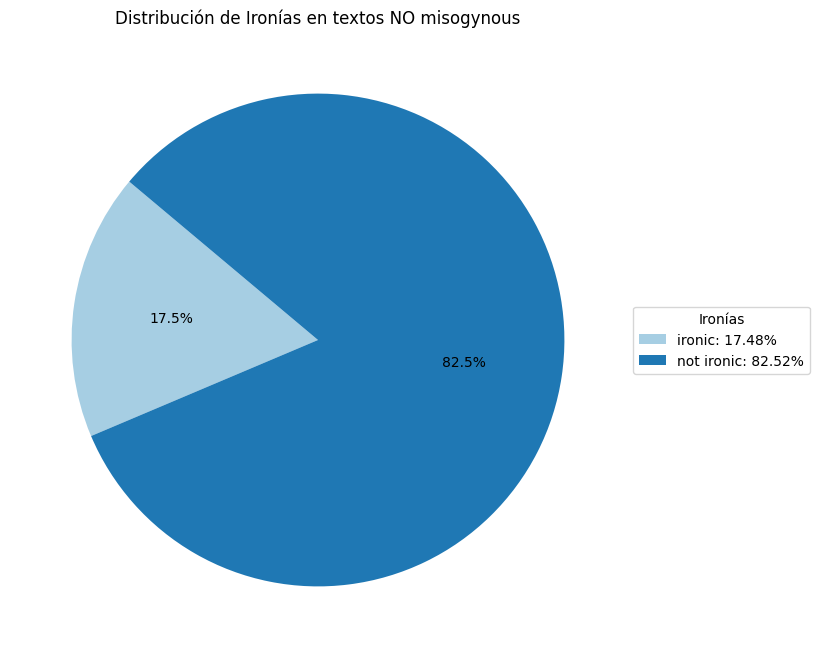

In [24]:
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(overall_irony_percentages_not_misogynous.values(), startangle=140, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
ax.set_title("Distribución de Ironías en textos NO misogynous")
legend_labels = [f"{irony}: {percentage:.2f}%" for irony, percentage in overall_irony_percentages_not_misogynous.items()]
ax.legend(wedges, legend_labels, title="Ironías", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [25]:
print("\nEjemplos de cada tipo de sentimiento en textos NO misogynous:")
for sent_type, example in examples_per_irony_not_misogynous.items():
    print(f"{sent_type}: {example}\n")


Ejemplos de cada tipo de sentimiento en textos NO misogynous:
ironic: ['@jlalarcon84 uf eso conllevaría a fregar sarten y tapadera y no se yo si me merece la pena por 2 trozos de pizza ?', 'Yo a mi jefe: yo vuelvo al restaurante pero no a fregar platos. Disney: toma, 7 meses pa fregar que se ve que no te hemos insistido suficiente con el contrato anterior que rechazaste.', '@Hammonyorkdista Estoy yendo a fregar para hacerle sitio al príncipe del infierno a las hordas del terror', 'A fregar los cacharros Fav y me pasas el fairy', '*Vengo de Getxo a todo correr con el coche, me pongo a fregar, voy al baño, hago recados de aita, me preparo* Esku: tía me vienes a buscar que aún no he acabado?? Pero bueno chiquillaaaaaaa @esku_eh siempre la mihma cosaaa jajaja', 'Me trae buenas vibras mis playlist antiguas? alguien que me ayude a fregar y perrear? Lo odio ? http://t.co/', 'Por dios quiero mil, seguro sale una casa la porqueria esta,, a fregar con Zorro nomas :c http://t.co/', '@madeinmarti

-----------------------------------------------

### Comparación entre todos los tweets, tweets misogynous y no misogynous

-----------------------------------------------


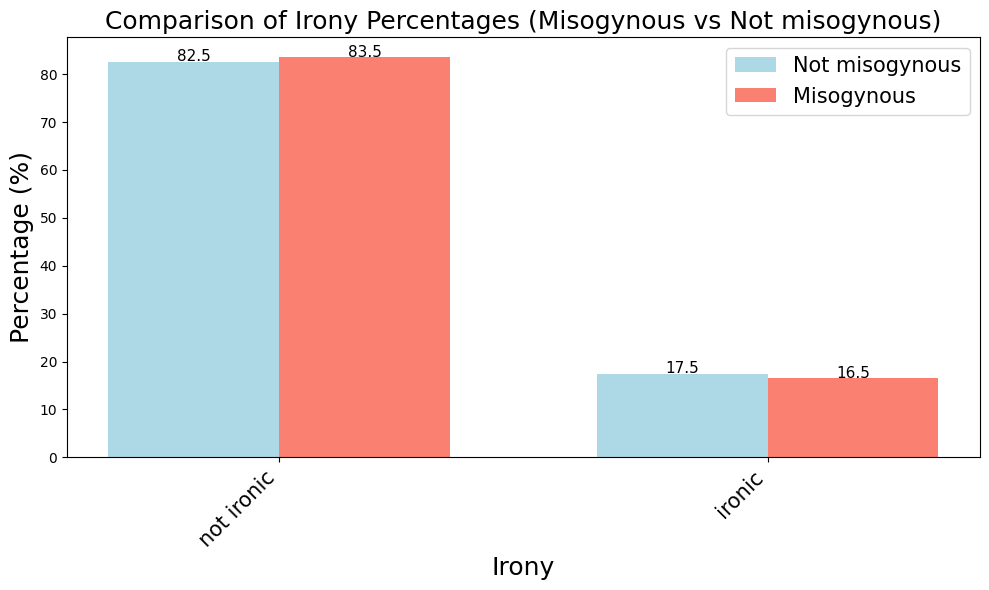

In [26]:
all_ironys = list(set(overall_irony_percentages_not_misogynous.keys()).union(set(overall_irony_percentages_misogynous.keys())))

not_misogynous_percentages = [overall_irony_percentages_not_misogynous.get(sent, 0) for sent in all_ironys]
misogynous_percentages = [overall_irony_percentages_misogynous.get(sent, 0) for sent in all_ironys]

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(all_ironys))
bar1 = ax.bar(index - bar_width/2, not_misogynous_percentages, bar_width, label='Not misogynous', color='lightblue')
bar2 = ax.bar(index + bar_width/2, misogynous_percentages, bar_width, label='Misogynous', color='salmon')
for i, v in enumerate(not_misogynous_percentages):
  ax.text(index[i] - bar_width/2, v + 0.15, f'{v:.1f}', ha='center', fontsize=11, color='black')
for i, v in enumerate(misogynous_percentages):
  ax.text(index[i] + bar_width/2, v + 0.15, f'{v:.1f}', ha='center', fontsize=11, color='black')

ax.set_xlabel('Irony', fontsize=18)
ax.set_ylabel('Percentage (%)', fontsize=18)
ax.set_title('Comparison of Irony Percentages (Misogynous vs Not misogynous)', fontsize=18)
ax.set_xticks(index)
ax.set_xticklabels(all_ironys, rotation=45, ha='right', fontsize=15)
ax.legend(fontsize=15)

plt.tight_layout()
plt.show()